# Microsoft Malware Detection
## EDA and *ML* in progress

![](https://zeroproject.org/wp-content/uploads/2018/05/Microsoft.png)

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbuYMzpgoRh2tLUj_EVV0z7gtIKwfJfZ7G-DP5dscAvSqcgSR_OQ)

The malware industry continues to be a well-organized, well-funded market dedicated to evading traditional security measures. Once a computer is infected by malware, criminals can hurt consumers and enterprises in many ways.With more than one billion enterprise and consumer customers, Microsoft takes this problem very seriously and is deeply invested in improving security. As one part of their overall strategy for doing so, Microsoft is challenging the data science community to develop techniques to predict if a machine will soon be hit with malware. As with their previous, Malware Challenge (2015), Microsoft is providing Kagglers with an unprecedented malware dataset to encourage open-source progress on effective techniques for predicting malware occurrences.

### Goals
The goal of this competition is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine. The telemetry data containing these properties and the machine infections was generated by combining heartbeat and threat reports collected by Microsoft's endpoint protection solution, Windows Defender. Each row in this dataset corresponds to a machine, uniquely identified by a MachineIdentifier. HasDetections is the ground truth and indicates that Malware was detected on the machine. Using the information and labels in train.csv, you must predict the value for HasDetections for each machine in test.csv.

### Metric
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed label.

#### Initial thanks and inspirations for this kernel - sources:
- https://www.kaggle.com/theoviel/load-the-totality-of-the-data
- https://www.kaggle.com/artgor/is-this-malware-eda-fe-and-lgb-updated

## Table of Contents
1. [Importing the Dataset](#importing_the_dataset)
2. [Inspecting the Dataset](#inspecting)
3. [Exploratory Data Analysis](#EDA)
4. [Machine Learning Modeling](#ML)

## ToDo: 
- add more comments
- Conclusion for Univariate, Bivariate and Multivariate plots
- Dive into Feature Engineering
- Experiments with NA_rate threshold, eta, number of estimators and xgboost parameters in general to improve auc

### Summary of Versions:
Until Version 22 I was playing around with EDA and trying to visualize as information as possible, unfortuately due to the enormous train set size which is almost 8GB I was working mainly with samples and trying to find ways to visualize as much information as I can. From version 22 and later versions of this Kernel, I was experimenting with Baseline XGboost and trying to find the optimal parameters via tuning. Feature Engineering still missing due to the fact that I dive into so much to tuning and trying to improve the classifier's performance and lost focus on other subjects but I will come back to that later. Tuning causes Kaggle to terminate my kernels due to timeout limitations. From Version #61 and so on I work with XGBoost classifers with optimal parameters found from my previous kernels. After the end of the competition and with the reveal of the private dataset, I am starting to suspect that my final tuned models are a bit overfitted and have to generalize.

#### Version History:
- Version 22, with 90% na_rate threshold, 10% train_sample / Public score: ** 0.656 **
- Version 23, with 90% na_rate threshold, 15% train_sample / Public score: ** 0.654 **
- Version 24, with 80% na_rate threshold, 15% train_sample / Public score: ** 0.655 **
- Version 25, with 80% na_rate threshold, 10% train_sample with better xgboost params / Public score: ** 0.661 **
- Version 26, with 80% na_rate threshold, 10% train_sample with better xgboost params / Public score: ** 0.661 **
- Version 27, with 70% na_rate threshold, 10% train_sample with better xgboost params eta: 0.1, 1000 estimators / Public score: ** 0.669 **
- Version 28, with 70% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 1000 estimators / Public score: ** 0.674 **
- Version 29, with 70% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 2000 estimators / Public score: ** 0.669 **
- Version 30, with 60% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 1000 estimators / Public score: ** 0.670 **
- Version 31, with 60% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 2000 estimators / Public score: ** 0.672 **
- Version 32, with 50% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 1000 estimators / Public score: ** 0.666 **
- Version 33-34, with 70% na_rate threshold, 10% train_sample with better xgboost params eta: 0.1, 1000 estimators / Public score: ** 0.674 **
- Version 35-36-37, with 70% na_rate threshold, 10% Introducing Feature Engineering, with train_sample and with better xgboost params eta: 0.1, 1000 estimators / score: ** 0.659 ** 
- Version 38, with 70% na_rate threshold, 10% train_sample and with better xgboost params eta: 0.1, 1000 estimators and tuning / score: ** 0.671 **
- Version 39-40, with 70% na_rate threshold, 10% train_sample and with better xgboost params eta: 0.1, 1000 estimators and tuning / score: ** 0.670 **
- Version 41, with 70% na_rate threshold, 10% train_sample and with better xgboost params eta: 0.05, 2000 estimators and tuning / score: ** 0.673 ** 
- Version 42-43-44, with 70% na_rate threshold, 10% train_sample and with better xgboost tuning / score: ** 0.677 **
- Version 45, with 90% na_rate and unbalanced_features threshold, 12.5% train_sample and with better xgboost tuning / score: ** 0.664 IT HAS AN ERROR **
- Version 46-47-48, with 90% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuning / score: ** TBA IT HAS AN ERROR **
- Version 49, with 90% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA, IT HAS AN ERROR **
- Version 50, (Like Version 49) with 90% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA, IT HAS AN ERROR  **
- Version 51, with 70% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA, IT HAS AN ERROR  **
- Version 52, with 70% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuning / score: ** TBA, IT HAS AN ERROR **
- Version 53, with 90% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** 0.673  **
- Version 54, with 90% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuning / score: ** TBA,  running longer than 9h  **
- Version 55, with 70% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 56, with 70% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 57, with 70% na_rate and 90% unbalanced_features threshold, 15% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 58, with 70% na_rate and 90% unbalanced_features threshold, 18.5% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 59, with 70% na_rate and 90% unbalanced_features threshold, 20% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 60, with 70% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA  **
- Version 61, with 70% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuned / score: ** TBA  **
- Version 62, with 70% na_rate and 90% unbalanced_features threshold, 15% train_sample and with xgboost tuned / score: ** TBA  **
- Version 63, with 70% na_rate and 90% unbalanced_features threshold, 17.5% train_sample and with xgboost tuned / score: ** TBA, Exit with code -1  **
- Version 64, with 70% na_rate and 90% unbalanced_features threshold, 20% train_sample and with xgboost tuned / score: ** TBA, Exit with code -1  **
- Version 65, with 70% na_rate and 90% unbalanced_features threshold, 22.5% train_sample and with xgboost tuned / score: ** TBA, Exit with code -1  **
- Version 66-67-68, with 70% na_rate and 90% unbalanced_features threshold, 25% train_sample and with xgboost tuned / score: ** TBA, Exit with code -1  **
- Version 69, with 70% na_rate and 90% unbalanced_features threshold, 27.5% train_sample and with xgboost tuned / score: ** 0.674  **
- Version 70, with 70% na_rate and 90% unbalanced_features threshold, 30% train_sample and with xgboost tuned / score: ** 0.675  **
- Version 71-72-73, with 70% na_rate and 90% unbalanced_features threshold, 25% train_sample and with xgboost tuned and reduced reg_alpha and lambda / score: ** TBA  **
- Version 74-75, with 70% na_rate and 90% unbalanced_features threshold, 27.5% train_sample and with xgboost tuned and reduced reg_alpha and lambda / score: ** TBA  **
- Version 76, with 70% na_rate and 90% unbalanced_features threshold, 30% train_sample and with xgboost tuned and reduced reg_alpha and lambda / score: ** TBA  **
- Version 77, with 70% na_rate and 90% unbalanced_features threshold, 32.5% train_sample and with xgboost tuned and reduced reg_alpha and lambda / score: ** 0.672  **
- Version 78-79, Returning after the end of the competition to polish the Kernel, with 90% na_rate and 90% unbalanced_features threshold, 15% train_sample and with xgboost tuned / score: ** TBA  **


### Version Summary:
Until Version 22 I was playing around with EDA and trying to visualize as information as possible, unfortuately due to the enormous train set size which is almost 8GB I was working mainly with samples and trying to find ways to visualize as much information as I can. From version 22 and later versions of this Kernel, I was experimenting with Baseline XGboost and trying to find the optimal parameters via tuning. Feature Engineering still missing due to the fact that I dive into so much to tuning and trying to improve the classifier's performance and lost focus on other subjects but I will come back to that later. Tuning causes Kaggle to terminate my kernels due to timeout limitations. From Version #61 and so on I work with XGBoost classifers with optimal parameters found from my previous kernels. Moreover, I am starting to believe that the 2 thresholds, na_rate and unbalanced_feature_rate_threshold must be both set to 0.9.

### Thoughts about Feature Engineering:
In order to know if a newly introduced feature may affect positevely or negatively the dataset I have to cross validate both with and without an xgboost model and measure its performance.


## My train of thought is the following:
The following Kernel Will perform:
- Importing the dataset
- EDA
- Feature Engineering
- Machine Learning Modeling

There is another Kernel for parameter tuning and another of blending CV predictions.
1. [XGBoost Tuning](https://www.kaggle.com/praxitelisk/microsoft-malware-detection-xgboost-tuning)
2. [XGBoost Blending CV Predictions](https://www.kaggle.com/praxitelisk/microsoft-malware-detection-xgboost-blends)

The order for Machine Learning predictions is as depicted from the flowchart:
1. Use this kernel for EDA, Feature Engineering and Baseline Modeling
2. Then tune the baseline model
3. Finally Blend Predictions from Cross Validations.

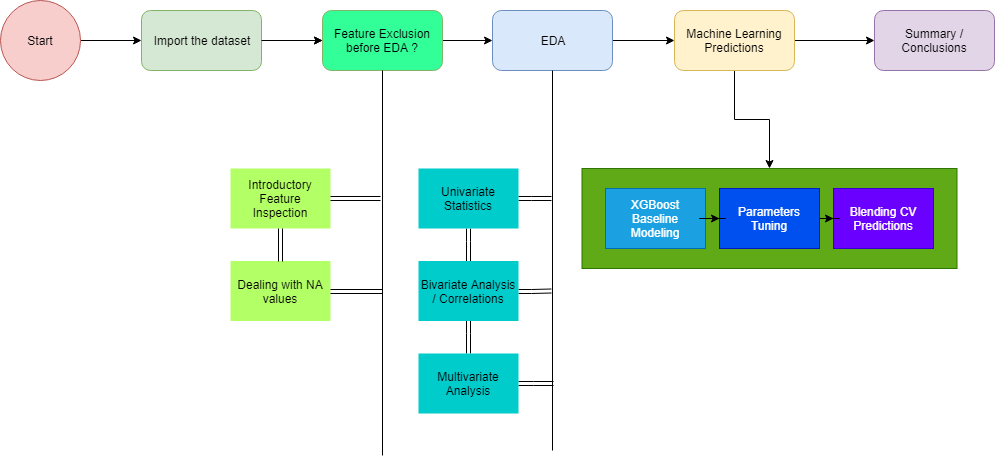

### *Due to memory limitations both EDA and Machine Learning will be performed with a representative sample from the whole train set. Approximately 15% from the train set will be used for EDA and 15% sample from the whole train set will be used from ML modeling.*

<a id="importing_the_dataset"></a>
## Importing the Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

plt.style.use('fivethirtyeight')

import time


# due to Kaggle memory limitations and the enormous dataset size, a sample from the whole
# trainset will be used for ML modeling
train_sample_fraction = None


# another global variable that must be defined is the NA values rate / theshold to ommit columns with
# NA values that pass this rate
na_rate_threshold = 0.9

# if we want to avoid using a fraction of the train dataset then using the following variable will suffice
train_sample_num = 1500000

# theshold to remove columns with unbalanced features to their values 
unbalanced_feature_rate_threshold = 0.9

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'train.csv', 'test.csv']


The data is quite big here, and all of it cannot be loaded at once with a simple read_csv call.
A solution is to specify types, to gain memory (for example switching from float64 to float32)

In [2]:
# I am grateful for the help of author of this kernel for the main idea to load the dataset and save memory space!!
# https://www.kaggle.com/theoviel/load-the-totality-of-the-data

dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
# to be deleted this cell
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_and_binary_columns = [c for c,v in dtypes.items() if v in numerics]


In [7]:
%%time
train = pd.read_csv('../input/train.csv', dtype=dtypes,nrows=80000)

CPU times: user 1.66 s, sys: 85.1 ms, total: 1.74 s
Wall time: 2.13 s


In [8]:
# Special thanks to https://www.kaggle.com/artgor/is-this-malware-eda-fe-and-lgb-updated
#train = reduce_mem_usage(train)

<a id="inspecting"></a>
## Introductory Inspection for the train set and its features

In [9]:
# train.info()
train.shape

(80000, 83)

We can see that we have already a mix of numerical and categorical features.

In [10]:
train.describe()

IsBeta      ...        HasDetections
count  80000.0      ...         80000.000000
mean       0.0      ...             0.499775
std        0.0      ...             0.500003
min        0.0      ...             0.000000
25%        0.0      ...             0.000000
50%        0.0      ...             0.000000
75%        0.0      ...             1.000000
max        0.0      ...             1.000000

[8 rows x 53 columns]

We have a wide variety of data. most of them appear to have NaN values, we have to thoroughly inspect them.

We have many features and lots of them have NA values, an idea is to ditch features that have many NA values bacause they do not provide any information that may be useful for the analysis.

In [11]:
# special thanks to https://www.kaggle.com/artgor/is-this-malware-eda-fe-and-lgb-updated

stats = []
for col in train.columns:
    stats.append((col, train[col].dtype, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100))
    
stats_df = pd.DataFrame(stats, columns=['Feature', "type", 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category'])

stats_df.sort_values('Percentage of missing values', ascending=False)

Feature                     ...                      Percentage of values in the biggest category
28                                            PuaMode                     ...                                                          99.97125
41                              Census_ProcessorClass                     ...                                                          99.58125
8                           DefaultBrowsersIdentifier                     ...                                                          95.07500
68                         Census_IsFlightingInternal                     ...                                                          83.21875
52                         Census_InternalBatteryType                     ...                                                          71.27375
71                              Census_ThresholdOptIn                     ...                                                          63.79625
75                            Census_IsWIMBootEnabled                     ...                                                          63.71125
31                                        SmartScreen                     ...                                                          48.27000
15                             OrganizationIdentifier                     ...                                                          47.21750
29                                              SMode                     ...                                                          93.99250
14                                     CityIdentifier                     ...                                                           3.61625
80                                       Wdft_IsGamer                     ...                                                          69.41625
81                              Wdft_RegionIdentifier                     ...                                                          20.19750
53              Census_InternalBatteryNumberOfCharges                     ...                                                          56.44500
72              Census_FirmwareManufacturerIdentifier                     ...                                                          30.53625
73                   Census_FirmwareVersionIdentifier                     ...                                                           1.85750
69                           Census_IsFlightsDisabled                     ...                                                          98.19250
37                          Census_OEMModelIdentifier                     ...                                                           3.40625
36                           Census_OEMNameIdentifier                     ...                                                          14.31375
32                                           Firewall                     ...                                                          96.71000
46                            Census_TotalPhysicalRAM                     ...                                                          45.98500
79            Census_IsAlwaysOnAlwaysConnectedCapable                     ...                                                          93.40625
62                 Census_OSInstallLanguageIdentifier                     ...                                                          35.65125
30                                    IeVerIdentifier                     ...                                                          43.58000
42                    Census_PrimaryDiskTotalCapacity                     ...                                                          31.53375
44                   Census_SystemVolumeTotalCapacity                     ...                                                           0.61250
48  Census_InternalPrimaryDiagonalDisplaySizeInInches                     ...                                                          34.09250
49  Census_Int

### Remove columns with high * **NA** * rate threshold and high * **one category** * values only
removing colums with NA rate more than * ** 70%** * threshold and * ** 90%  ** * features with one category only.

In [12]:
good_cols = list(train.columns)

for col in train.columns:
    
    # remove columns with high NA rate
    na_rate = train[col].isnull().sum() / train.shape[0]
    
    # remove columns with high Unbalanced values rate
    unbalanced_rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    
    if na_rate > na_rate_threshold:
        good_cols.remove(col)
    elif unbalanced_rate > unbalanced_feature_rate_threshold:
        good_cols.remove(col)

In [13]:
good_cols

['MachineIdentifier',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSVersion

In [14]:
print("train data set reduced size in memory:", train.memory_usage().sum() / (1000000000))

train data set reduced size in memory: 0.015574584


In [15]:
train = train[good_cols]

### Delete some variables to free memory space.

In [16]:
del stats_df

### Call garbage collector

In [17]:
import gc

gc.collect()

229150

<a id="EDA"></a>
## Exploratory Data Analysis

![](http://blog.k2analytics.co.in/wp-content/uploads/2016/12/Exploratory_Data_Analysis.png)

### Let's print out and take a look at the header frame

In [18]:
train.head()

MachineIdentifier      ...      HasDetections
0  0000028988387b115f69f31a3bf04f09      ...                  0
1  000007535c3f730efa9ea0b7ef1bd645      ...                  0
2  000007905a28d863f6d0d597892cd692      ...                  0
3  00000b11598a75ea8ba1beea8459149f      ...                  1
4  000014a5f00daa18e76b81417eeb99fc      ...                  1

[5 rows x 57 columns]

### Train Set dimensions

In [19]:
train.shape

(80000, 57)

### Target

In [20]:
train['HasDetections'].value_counts()

0    40018
1    39982
Name: HasDetections, dtype: int64

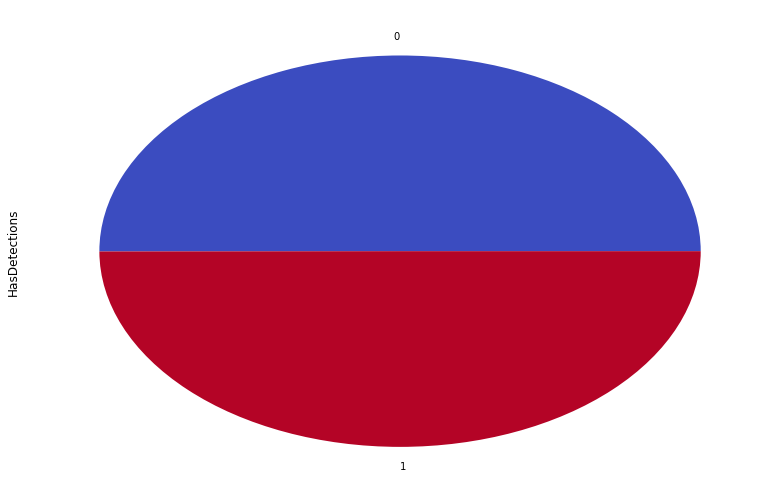

In [21]:
train['HasDetections'].value_counts().plot(kind="pie", figsize=(12,9), colormap="coolwarm")

#### The target is balanced, which is nice.

### Seperate the categorical and the numerical columns in the Train Set
MachineIdentifier is a unique ID and does not play any role to the analysis.

In [22]:
categorical_columns = list(train.loc[:, train.dtypes =="category"].columns)
numerical_and_binary_columns = list(train.loc[:, train.dtypes !="category"].columns)
numerical_columns = numerical_and_binary_columns

categorical_columns.remove("MachineIdentifier")

binary_columns = []
for col in (numerical_and_binary_columns):
    if train[col].nunique() == 2:
        binary_columns.append(col)
        numerical_columns.remove(col)

### The Majority of types of features

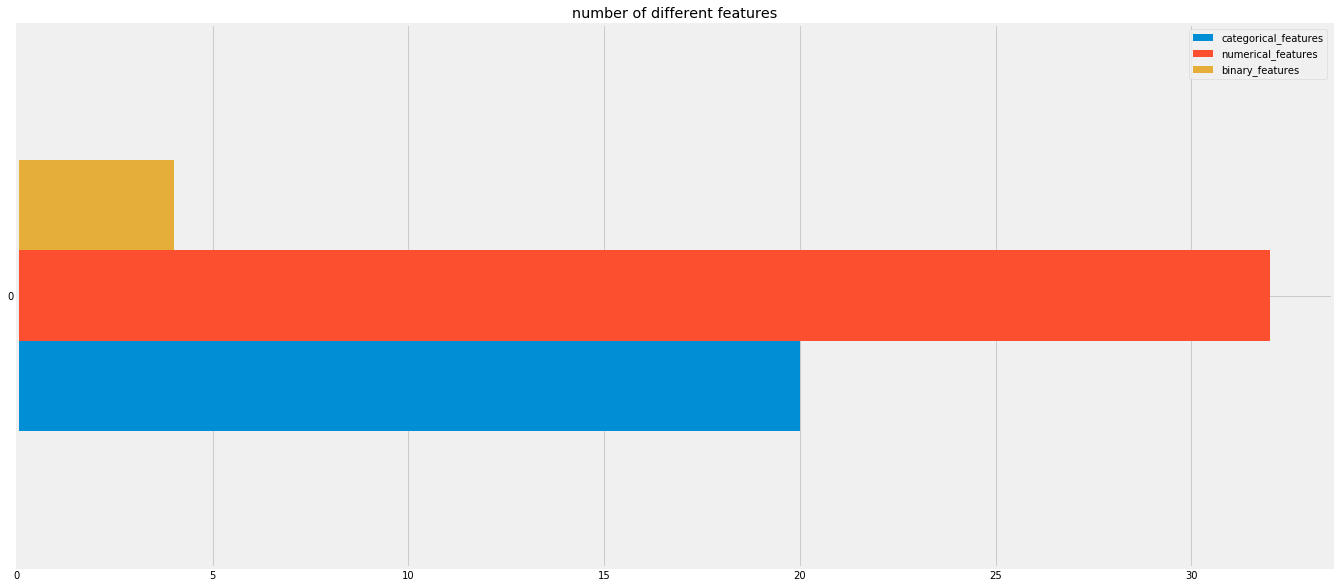

In [23]:
#print(len(categorical_columns))
#print(len(numerical_columns))
#print(len(binary_columns))

categories_list = []
categories_list.append(len(categorical_columns))
categories_list.append(len(numerical_columns))
categories_list.append(len(binary_columns))

categories_df = pd.DataFrame(categories_list, 
                             index=["categorical_features", "numerical_features", "binary_features"])

categories_df = categories_df.transpose().plot(kind="barh", figsize=(21, 10), title="number of different features")

### * Due to memory limitations, a small sample between 10% to 13% from the whole trainset will be used for Univariate, Bivariate and Multivariate plots *

In [27]:
if train_sample_fraction is not None:
    train_sample = train.sample(frac=15000, random_state=42)
elif train_sample_num is not None:
    train_sample = train.sample(n=15000, random_state=42)
else:
    train_sample = train.sample(n=15000, random_state=42)

gc.collect()

160

In [28]:
train_sample_num

1500000

### Univariate Analysis - Barplots for the categorical features
#### Inspecting each one of the categorical features from the train set and illustrating the top most occured categories per categorical feature against the *HasDetections* target variable. Moreover trying to fit a logistic regression model between the target variable and the inspected feature to identify if the feature is a good predictor.

In [29]:
def categorical_univariate_and_bivariate_stats(feature):
    
    if feature in train_sample.columns:
    
        print("Top 10 most occurred categories for the categorical feature", feature)
        print(train_sample[feature].value_counts().head(10))

        f, axes = plt.subplots(1, 2, figsize=(21, 10))

        train_sample[feature].value_counts().head(10).plot.bar(ax=axes[0], colormap="BrBG")

        train_sample.groupby(["HasDetections", feature]).count()["MachineIdentifier"].unstack(0).sort_values(by=1, axis=0, ascending=False).head(10).plot.bar(ax=axes[1], colormap="coolwarm")
        
        f.suptitle("Categorical feature: "+" Univariate and Bivariate plots against the target variable")
        
    else:
        print("This feature has been removed from dataset due to high NaN rate or highly unbalanced values")
        
        
def logistic_fit(feature):
    
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import r2_score

    if feature in train_sample.columns:
        
        from sklearn.linear_model import LogisticRegression
        
        f, axes = plt.subplots(1, 2, figsize=(21, 10))

        # test if there is a logistic relationship between the feature1 and the target.
        print()
        print("Fitting a logistic regression model for the feature", feature,"against the target variable")
        
               
        mask = ~train_sample[feature].isnull() & ~train_sample["HasDetections"].isnull()

        logmodel = LogisticRegression(C=1e5, solver='lbfgs')
        
        if feature in categorical_columns:        
            logmodel.fit(train_sample[feature][mask].cat.codes.values.reshape(-1,1), train_sample["HasDetections"][mask])
            predictions = logmodel.predict(train_sample[feature][mask].cat.codes.values.reshape(-1,1))
        else:
            logmodel.fit(train_sample[feature][mask].values.reshape(-1,1), train_sample["HasDetections"][mask])
            predictions = logmodel.predict(train_sample[feature][mask].values.reshape(-1,1))

        from sklearn.metrics import classification_report
        print(classification_report(train_sample["HasDetections"][mask], predictions))
        print("")
        print("accuracy score:", accuracy_score(train_sample["HasDetections"][mask], predictions))
        print("F1 score:", accuracy_score(train_sample["HasDetections"][mask], predictions))
        #print("R^2 score:", r2_score(train_sample["HasDetections"][mask], predictions))

        import scikitplot as skplt
        skplt.metrics.plot_confusion_matrix(train_sample["HasDetections"][mask], predictions, normalize=False,
                                            title = "Confusion matrix for the feature: "+feature+" against the target variable after fitting a logistic regression model",
                                           figsize=(10,8), text_fontsize='medium', cmap="BrBG", ax = axes[0])
        
        
        # import statsmodels.api as sm
        # print()
        # est = sm.Logit(train_sample["HasDetections"][mask], train_sample[feature][mask].cat.codes.values.reshape(-1,1))
        # result1=est.fit()
        # print(result1.summary())
        if feature in categorical_columns:
            axes[1] = plt.scatter(train_sample[feature][mask].cat.codes.values.reshape(-1,1), predictions)
            axes[1] = plt.scatter(train_sample[feature][mask].cat.codes.values.reshape(-1,1), logmodel.predict_proba(train_sample[feature][mask].cat.codes.values.reshape(-1,1))[:,1])
            plt.xlabel(feature)
            plt.ylabel("HasDetections Probability")
            plt.title("Probability of Detecting a Malware vs the "+ feature)
            plt.show()
        else:
            axes[1] = plt.scatter(train_sample[feature][mask].values.reshape(-1,1), predictions)
            axes[1] = plt.scatter(train_sample[feature][mask].values.reshape(-1,1), logmodel.predict_proba(train_sample[feature][mask].values.reshape(-1,1))[:,1])
            plt.xlabel(feature)
            plt.ylabel("HasDetections Probability")
            plt.title("Probability of Detecting a Malware vs the "+ feature)
            plt.show()
        
    else:
        print("This feature has been removed from dataset due to high NaN rate or highly unbalanced values")



In [30]:
categorical_univariate_and_bivariate_stats(feature="ProductName")
logistic_fit(feature="ProductName")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 most occurred categories for the categorical feature EngineVersion
1.1.15200.1    6568
1.1.15100.1    6157
1.1.15000.2     406
1.1.14901.4     335
1.1.14600.4     257
1.1.14800.3     242
1.1.15300.6     204
1.1.14104.0     147
1.1.15300.5     117
1.1.13504.0     103
Name: EngineVersion, dtype: int64

Fitting a logistic regression model for the feature EngineVersion against the target variable
              precision    recall  f1-score   support

           0       0.63      0.16      0.26      7547
           1       0.52      0.90      0.66      7453

   micro avg       0.53      0.53      0.53     15000
   macro avg       0.58      0.53      0.46     15000
weighted avg       0.58      0.53      0.46     15000


accuracy score: 0.532
F1 score: 0.532


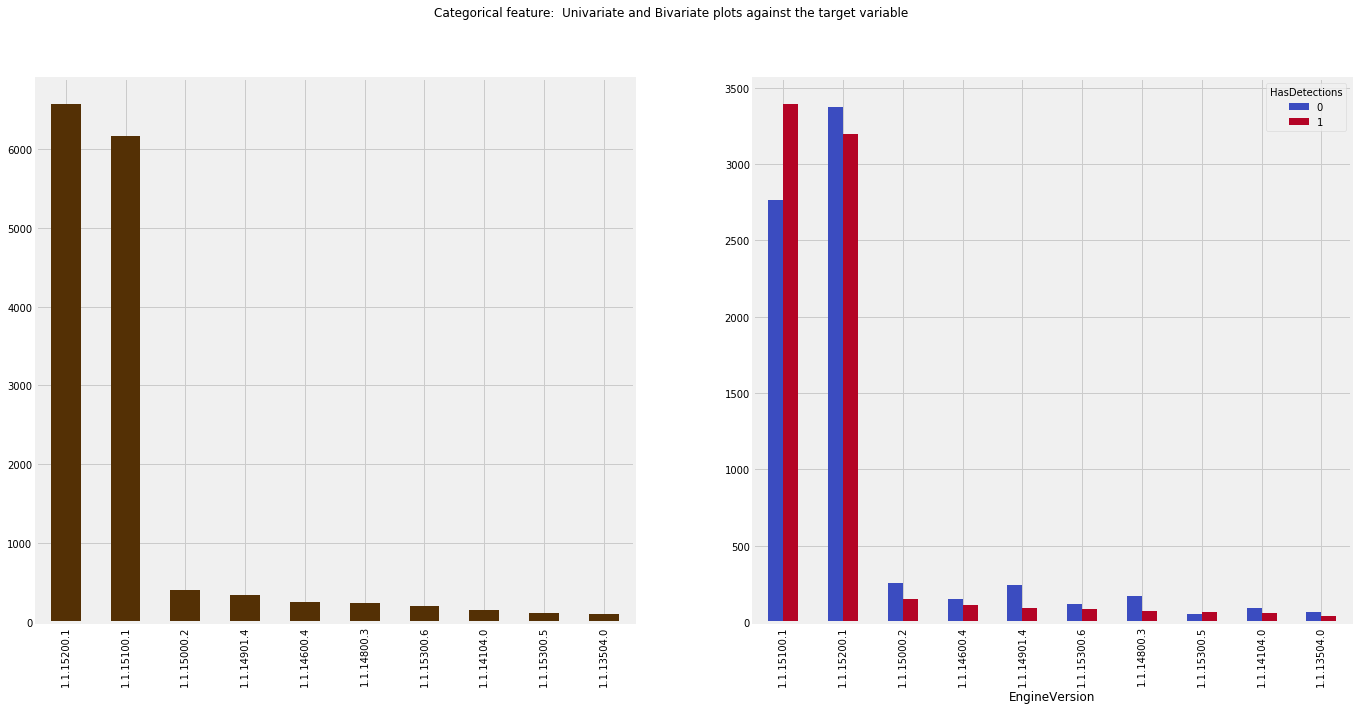

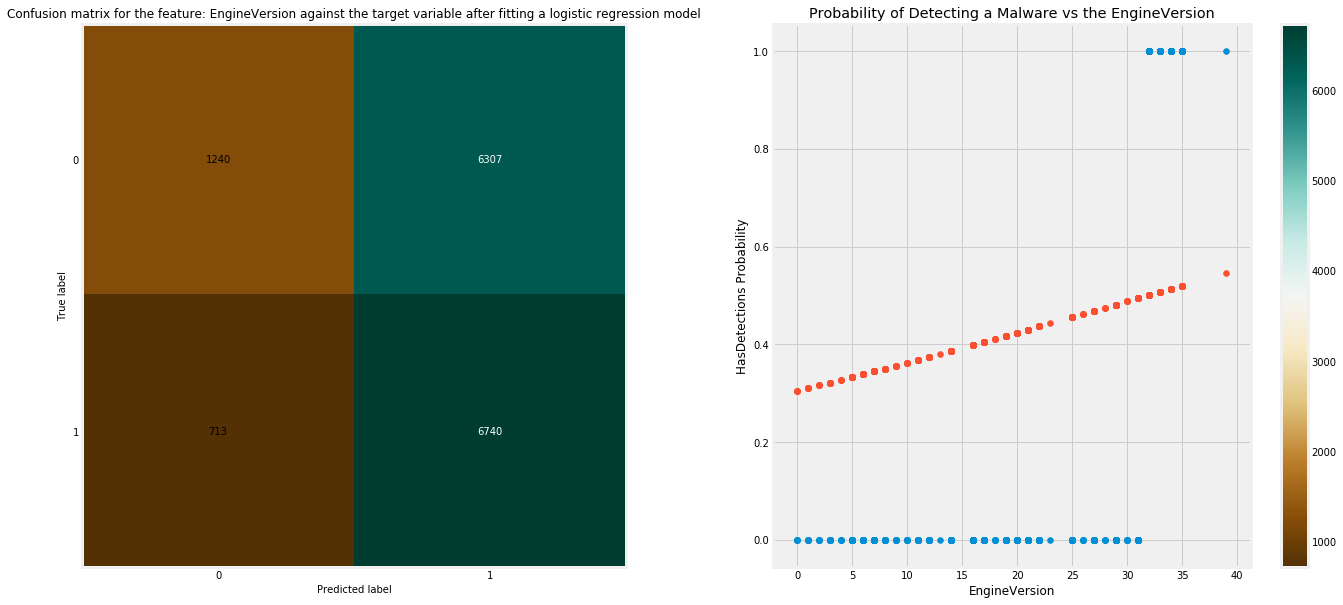

In [31]:
categorical_univariate_and_bivariate_stats(feature="EngineVersion")
logistic_fit(feature="EngineVersion")

We can see that 2 engine versions, "1.1.15200.1" and "1.1.15100.1" is at high frequencies than the rest engine versions. However the version "1.1.15100.1" has more Malware Detections than the rest of the categoeris. Just out of curiosity, fitting a logistic regression for binary classification for this feature against the target variable, It detects the infected systems with precision. However the model is very weak due to its low accuracy and high recall scores, but it can at least predict the infected systems with great precision.

Top 10 most occurred categories for the categorical feature AppVersion
4.18.1807.18075     8817
4.18.1806.18062     1368
4.12.16299.15        635
4.10.209.0           439
4.13.17134.1         427
4.16.17656.18052     413
4.13.17134.228       371
4.8.10240.17443      324
4.14.17639.18041     317
4.9.10586.1106       308
Name: AppVersion, dtype: int64

Fitting a logistic regression model for the feature AppVersion against the target variable
              precision    recall  f1-score   support

           0       0.50      0.84      0.63      7547
           1       0.50      0.16      0.25      7453

   micro avg       0.50      0.50      0.50     15000
   macro avg       0.50      0.50      0.44     15000
weighted avg       0.50      0.50      0.44     15000


accuracy score: 0.5028666666666667
F1 score: 0.5028666666666667


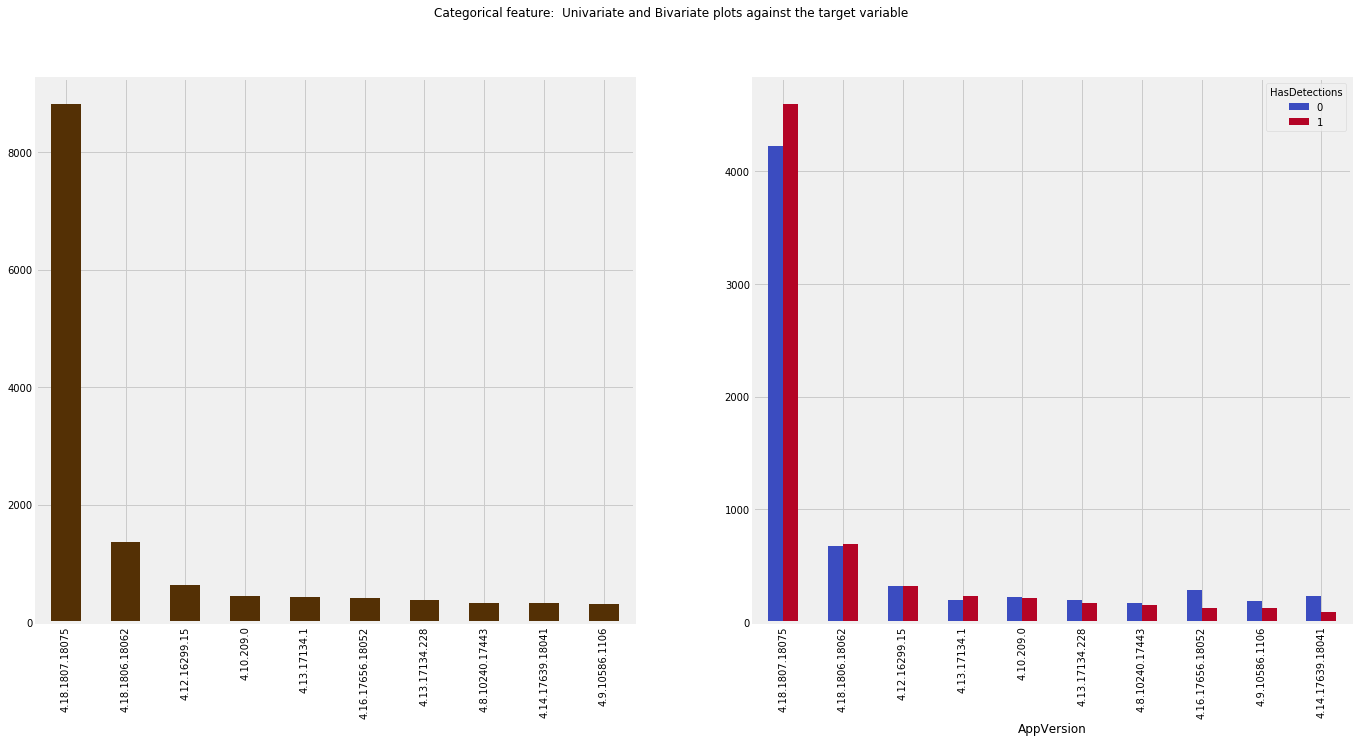

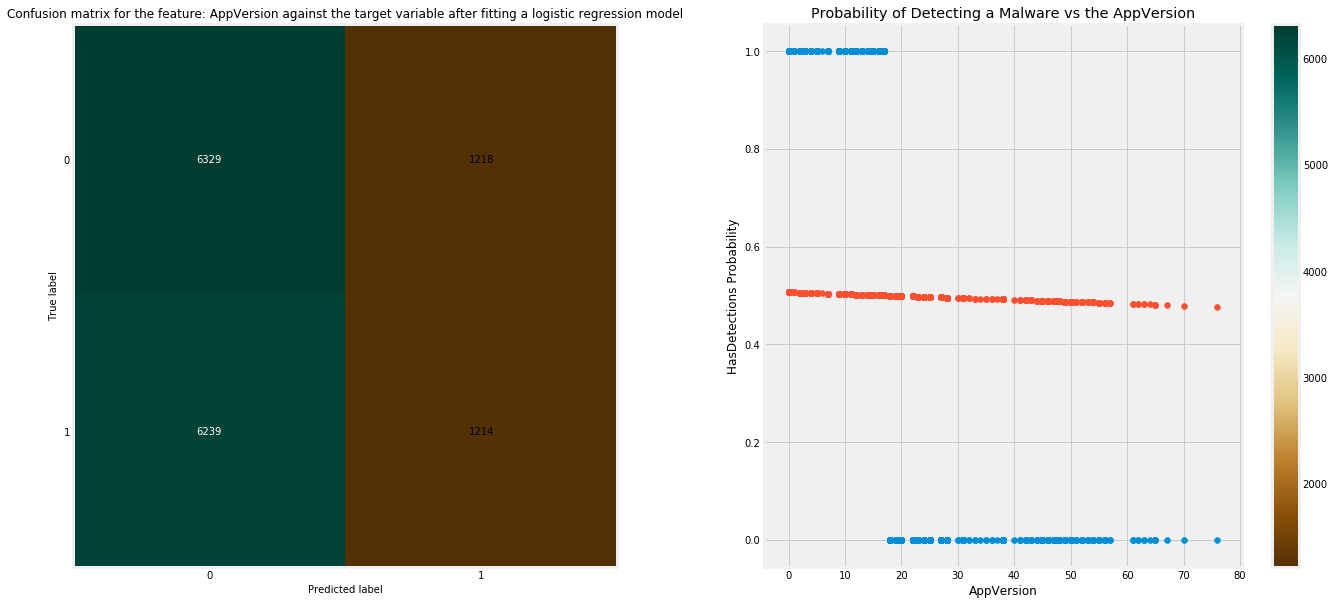

In [32]:
categorical_univariate_and_bivariate_stats(feature="AppVersion")
logistic_fit(feature="AppVersion")

Top 10 most occurred categories for the categorical feature AvSigVersion
1.273.1420.0    178
1.263.48.0      160
1.275.1140.0    155
1.275.727.0     154
1.273.1826.0    154
1.273.371.0     144
1.251.42.0      119
1.275.1244.0    112
1.273.810.0     107
1.273.1749.0    104
Name: AvSigVersion, dtype: int64

Fitting a logistic regression model for the feature AvSigVersion against the target variable
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7547
           1       1.00      0.00      0.00      7453

   micro avg       0.50      0.50      0.50     15000
   macro avg       0.75      0.50      0.34     15000
weighted avg       0.75      0.50      0.34     15000


accuracy score: 0.5032666666666666
F1 score: 0.5032666666666666


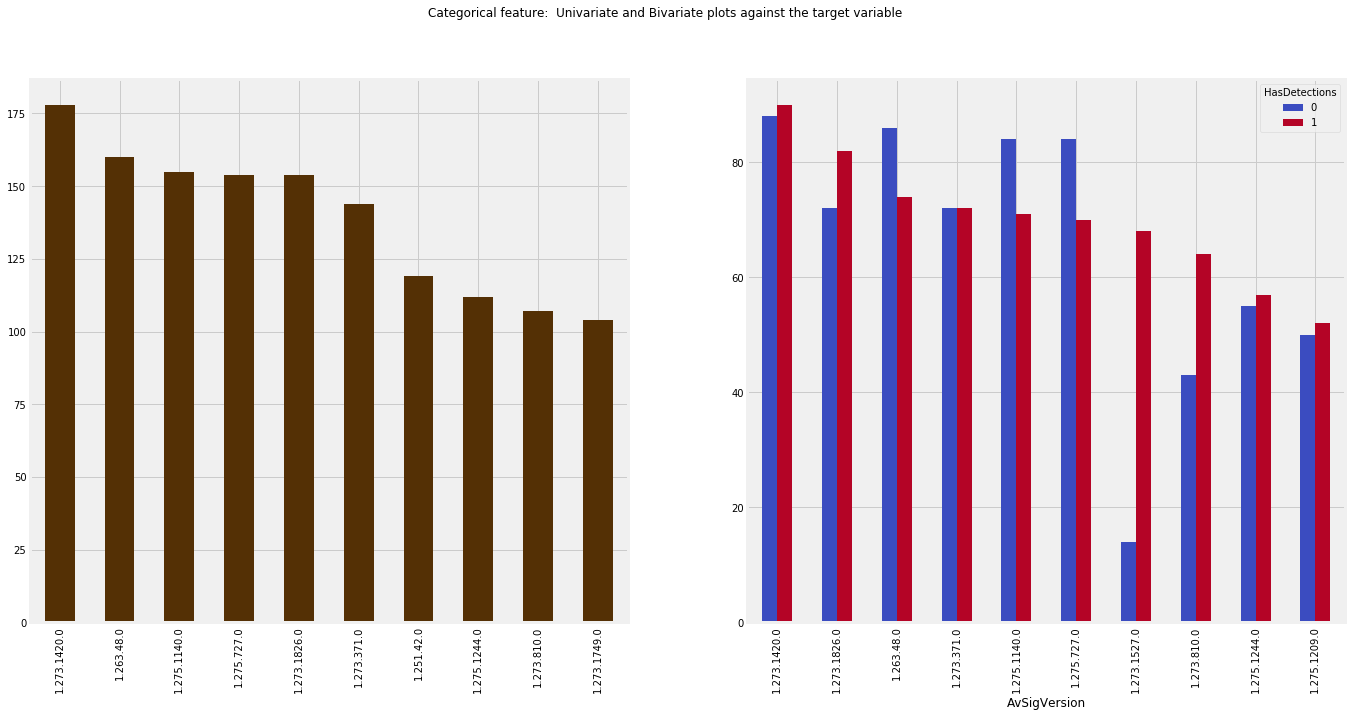

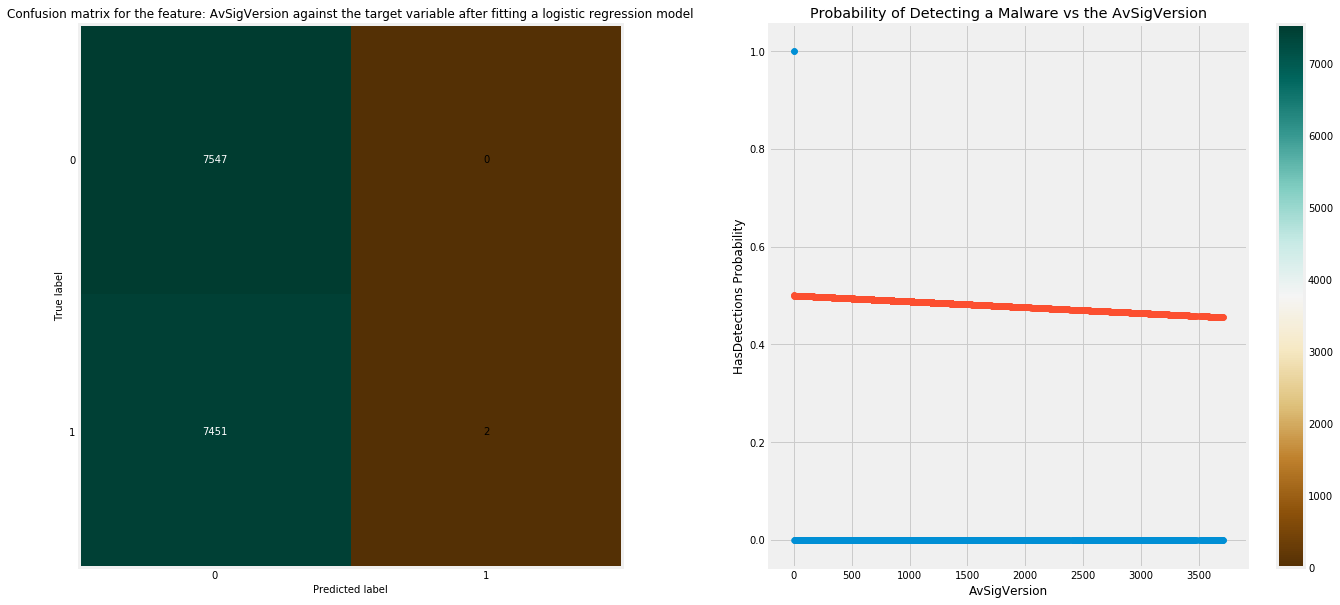

In [33]:
categorical_univariate_and_bivariate_stats(feature="AvSigVersion")
logistic_fit(feature="AvSigVersion")

In [34]:
categorical_univariate_and_bivariate_stats(feature="Platform")
logistic_fit(feature="Platform")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [35]:
categorical_univariate_and_bivariate_stats(feature="Processor")
logistic_fit(feature="Processor")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [36]:
categorical_univariate_and_bivariate_stats(feature="OsVer")
logistic_fit(feature="OsVer")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 most occurred categories for the categorical feature OsPlatformSubRelease
rs4           6686
rs3           4259
rs2           1308
rs1           1179
th2            647
th1            422
windows8.1     305
windows7       156
prers5          38
Name: OsPlatformSubRelease, dtype: int64

Fitting a logistic regression model for the feature OsPlatformSubRelease against the target variable
              precision    recall  f1-score   support

           0       0.52      0.47      0.49      7547
           1       0.51      0.57      0.54      7453

   micro avg       0.52      0.52      0.52     15000
   macro avg       0.52      0.52      0.52     15000
weighted avg       0.52      0.52      0.52     15000


accuracy score: 0.5171333333333333
F1 score: 0.5171333333333333


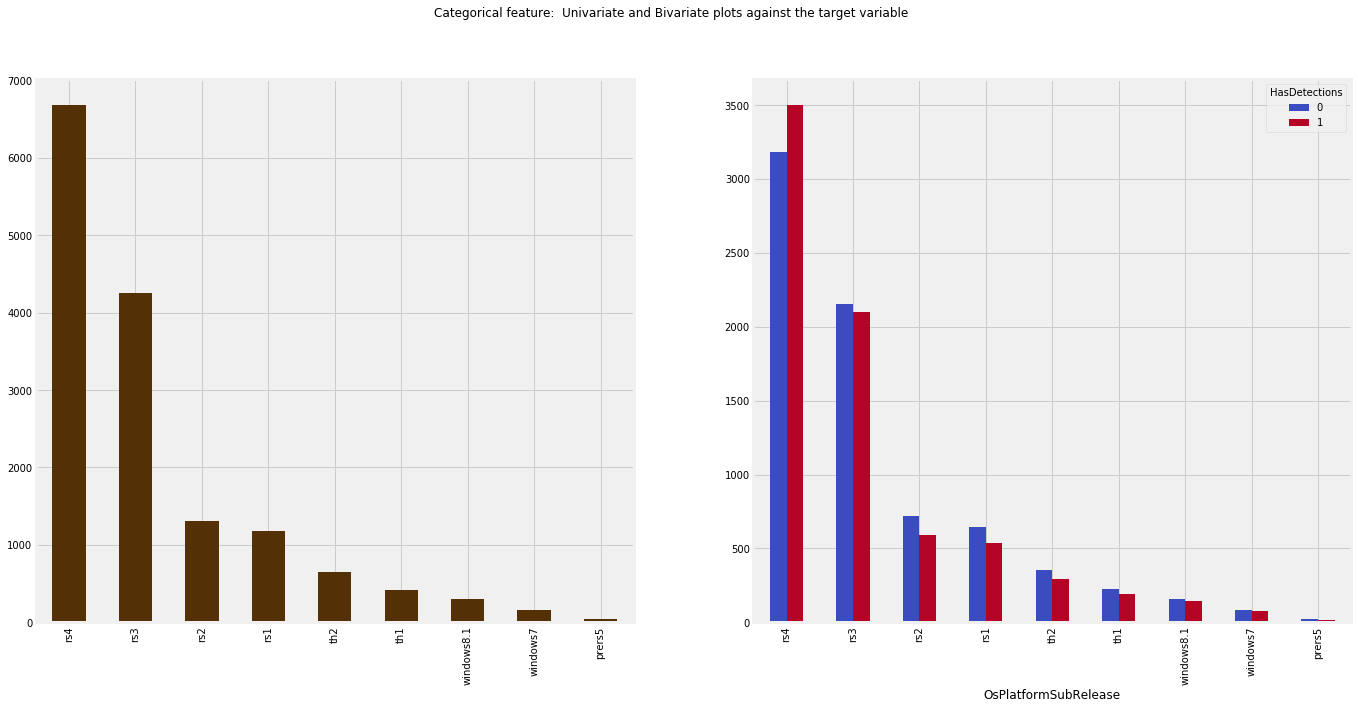

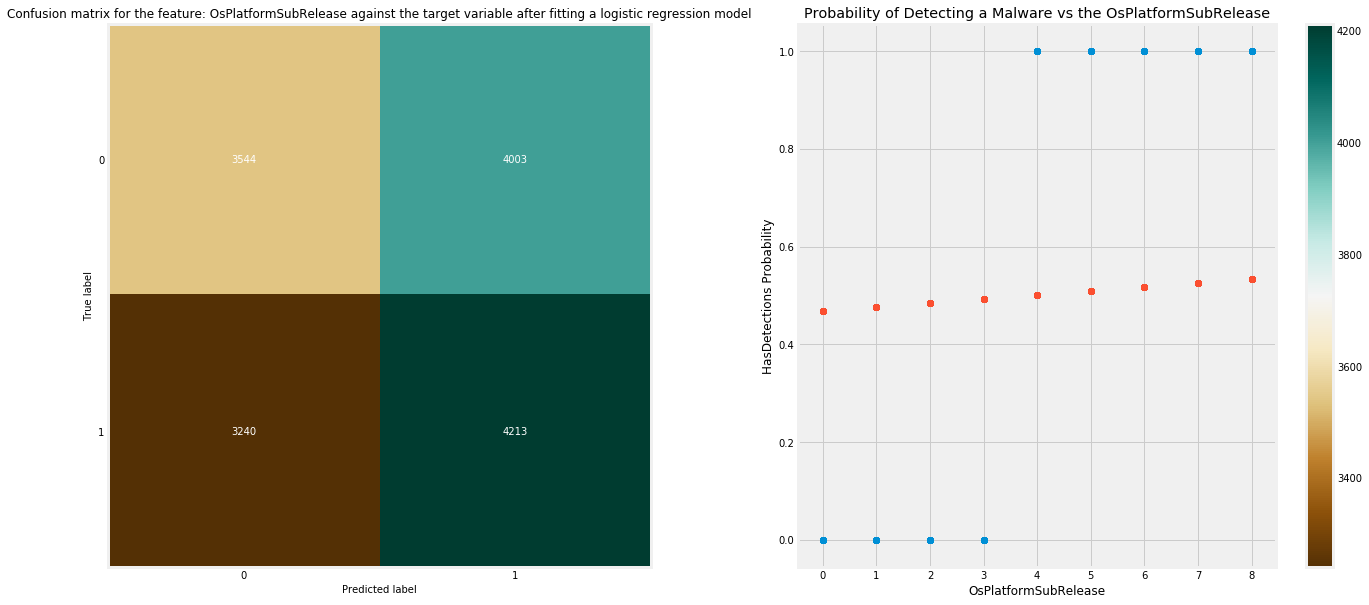

In [37]:
categorical_univariate_and_bivariate_stats(feature="OsPlatformSubRelease")
logistic_fit(feature="OsPlatformSubRelease")

Top 10 most occurred categories for the categorical feature OsBuildLab
17134.1.amd64fre.rs4_release.180410-1804                 6275
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908    2159
16299.15.amd64fre.rs3_release.170928-1534                1608
15063.0.amd64fre.rs2_release.170317-1834                 1200
17134.1.x86fre.rs4_release.180410-1804                    411
16299.15.x86fre.rs3_release.170928-1534                   388
14393.2189.amd64fre.rs1_release.180329-1711               323
10240.17443.amd64fre.th1.170602-2340                      274
10586.1176.amd64fre.th2_release_sec.170913-1848           222
15063.0.x86fre.rs2_release.170317-1834                    108
Name: OsBuildLab, dtype: int64

Fitting a logistic regression model for the feature OsBuildLab against the target variable
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      7547
           1       0.52      0.50      0.51      7453

   micro avg       0.5

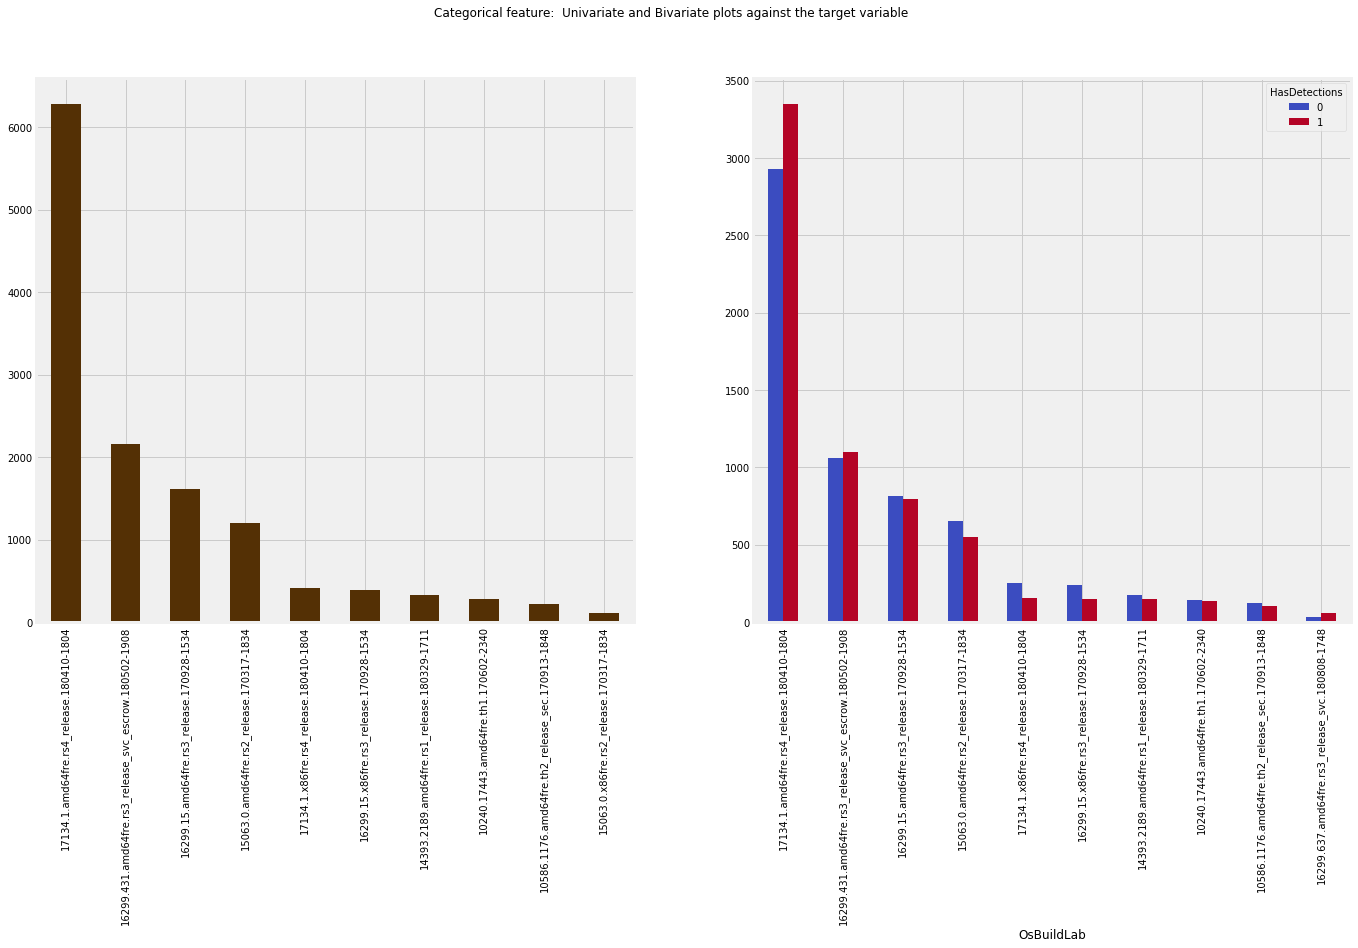

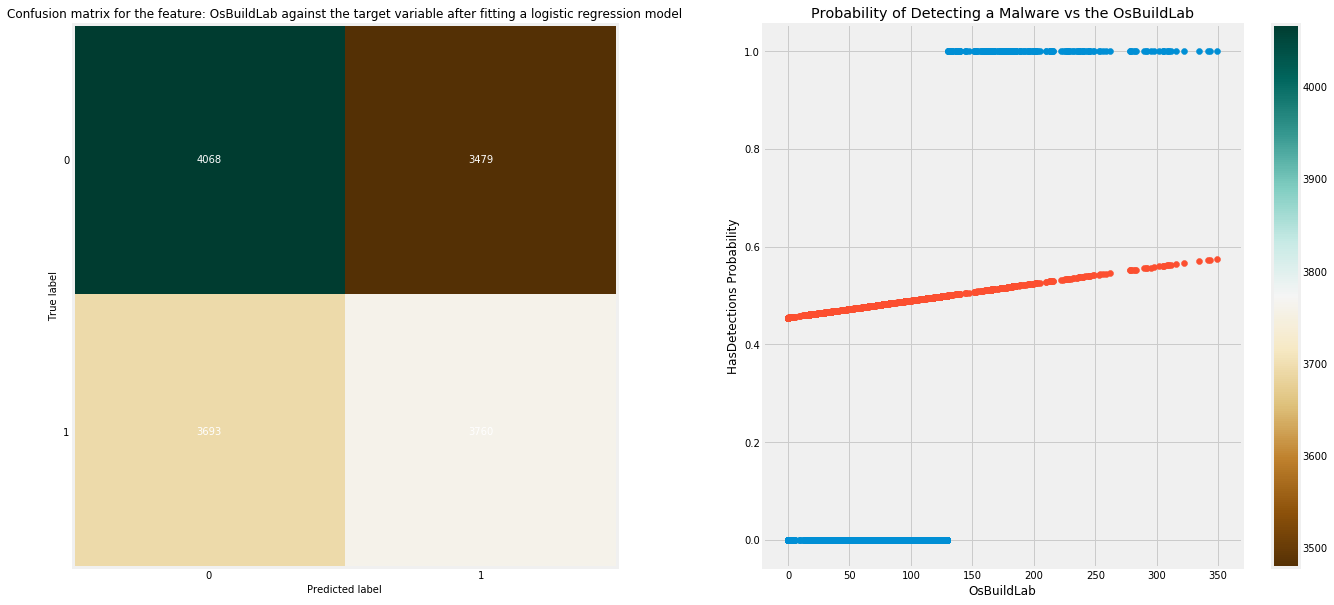

In [38]:
categorical_univariate_and_bivariate_stats(feature="OsBuildLab")
logistic_fit(feature="OsBuildLab")

Top 10 most occurred categories for the categorical feature SmartScreen
RequireAdmin    7228
ExistsNotSet    1794
Off              289
Warn             211
Prompt            45
Block             35
off                2
On                 2
&#x02;             0
on                 0
Name: SmartScreen, dtype: int64

Fitting a logistic regression model for the feature SmartScreen against the target variable
              precision    recall  f1-score   support

           0       0.57      0.88      0.69      4761
           1       0.74      0.33      0.46      4845

   micro avg       0.61      0.61      0.61      9606
   macro avg       0.66      0.61      0.57      9606
weighted avg       0.66      0.61      0.57      9606


accuracy score: 0.6058713304184884
F1 score: 0.6058713304184884


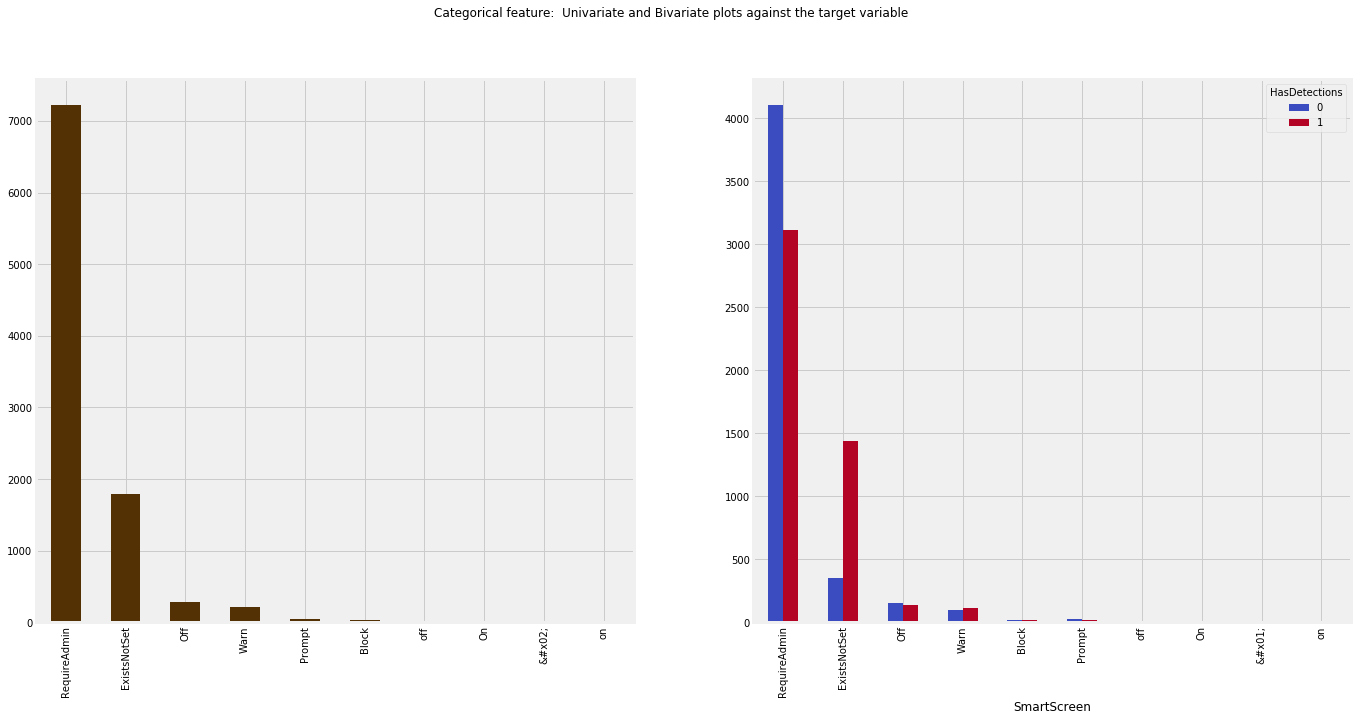

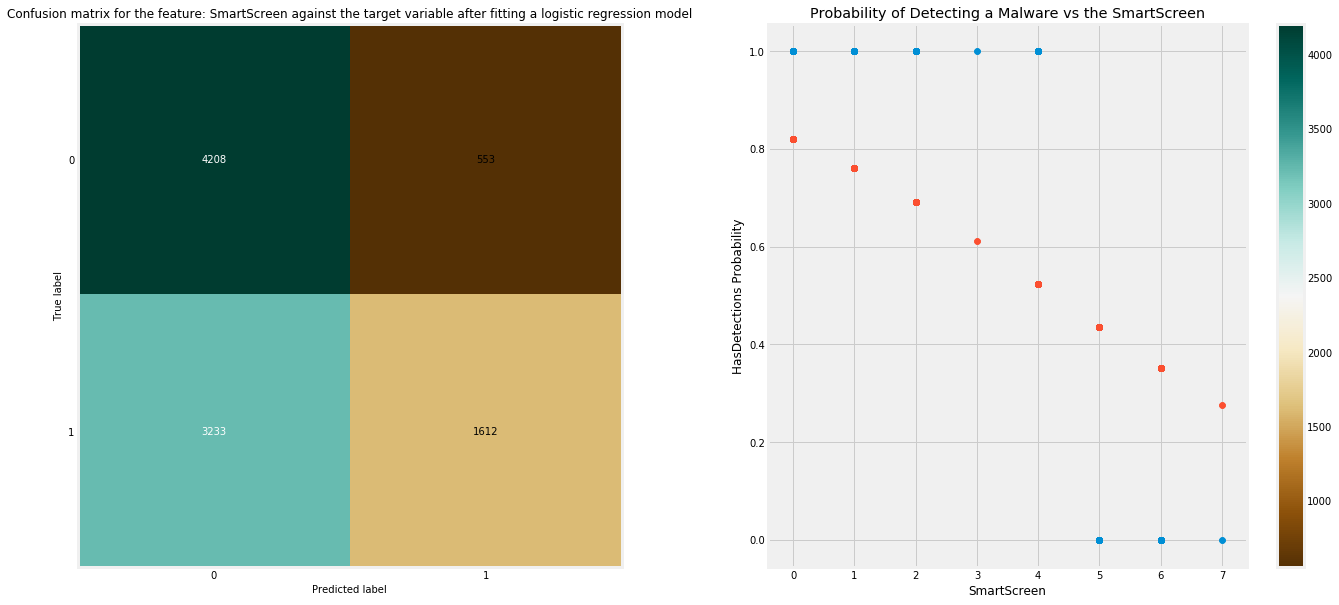

In [39]:
categorical_univariate_and_bivariate_stats(feature="SmartScreen")
logistic_fit(feature="SmartScreen")

Top 10 most occurred categories for the categorical feature Census_MDC2FormFactor
Notebook        9571
Desktop         3280
Convertible      700
Detachable       519
AllInOne         511
PCOther          238
LargeTablet      111
SmallTablet       53
SmallServer       12
MediumServer       5
Name: Census_MDC2FormFactor, dtype: int64

Fitting a logistic regression model for the feature Census_MDC2FormFactor against the target variable
              precision    recall  f1-score   support

           0       0.51      0.67      0.58      7547
           1       0.50      0.34      0.41      7453

   micro avg       0.51      0.51      0.51     15000
   macro avg       0.51      0.51      0.49     15000
weighted avg       0.51      0.51      0.49     15000


accuracy score: 0.5060666666666667
F1 score: 0.5060666666666667


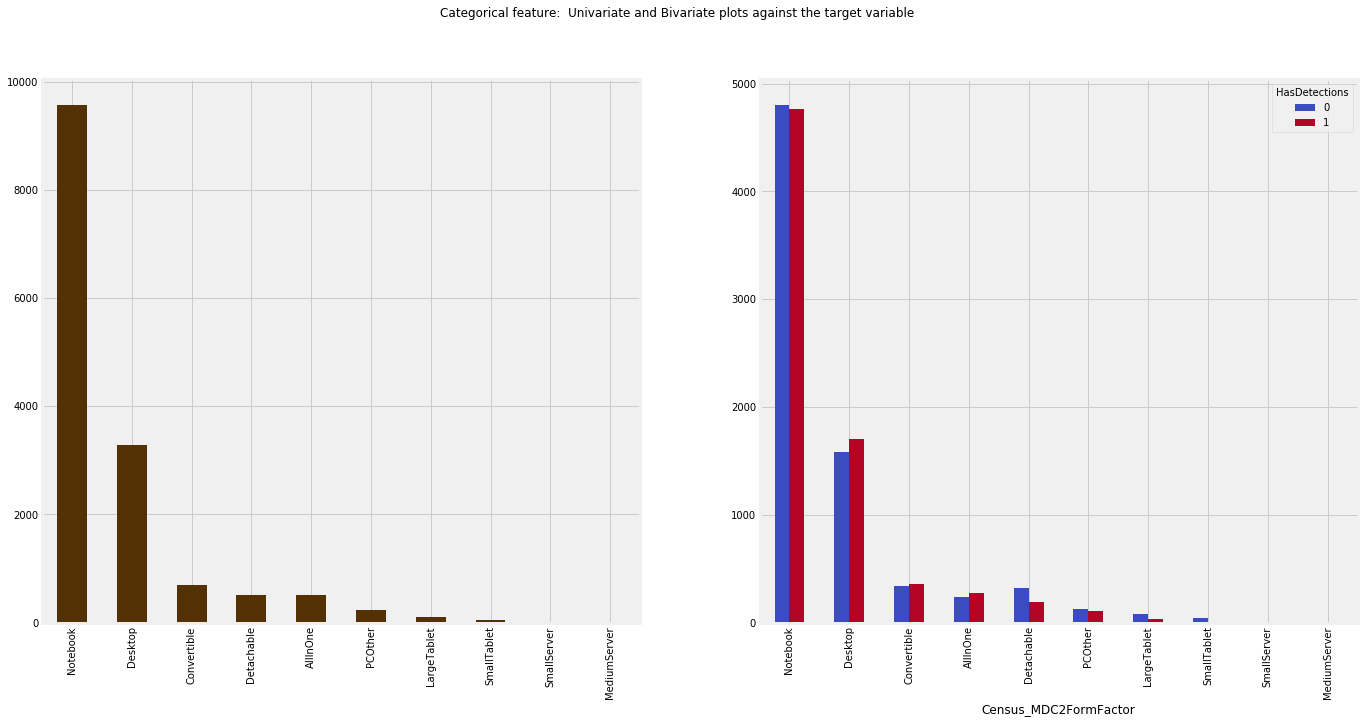

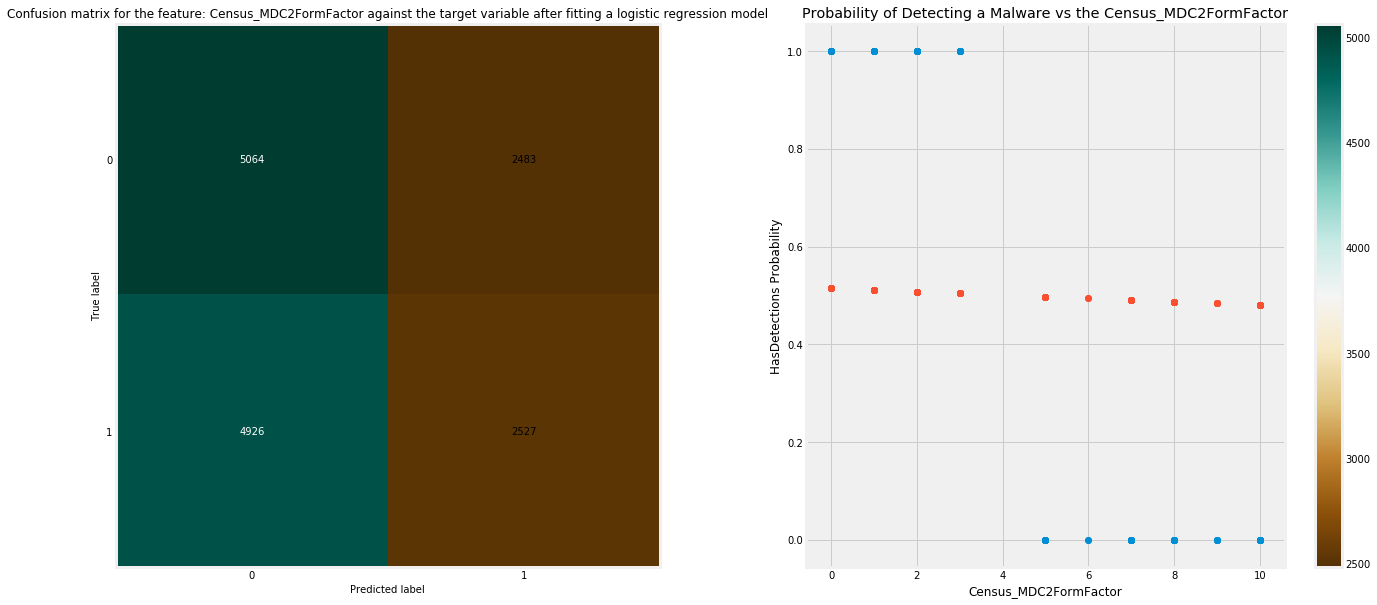

In [40]:
categorical_univariate_and_bivariate_stats(feature="Census_MDC2FormFactor")
logistic_fit(feature="Census_MDC2FormFactor")

Top 10 most occurred categories for the categorical feature Census_ChassisTypeName
Notebook       8764
Desktop        3180
Laptop         1181
Portable        606
AllinOne        363
Convertible     147
MiniTower       127
UNKNOWN         127
Other           109
Detachable       87
Name: Census_ChassisTypeName, dtype: int64

Fitting a logistic regression model for the feature Census_ChassisTypeName against the target variable
              precision    recall  f1-score   support

           0       0.51      0.67      0.58      7547
           1       0.51      0.35      0.42      7453

   micro avg       0.51      0.51      0.51     15000
   macro avg       0.51      0.51      0.50     15000
weighted avg       0.51      0.51      0.50     15000


accuracy score: 0.5100666666666667
F1 score: 0.5100666666666667


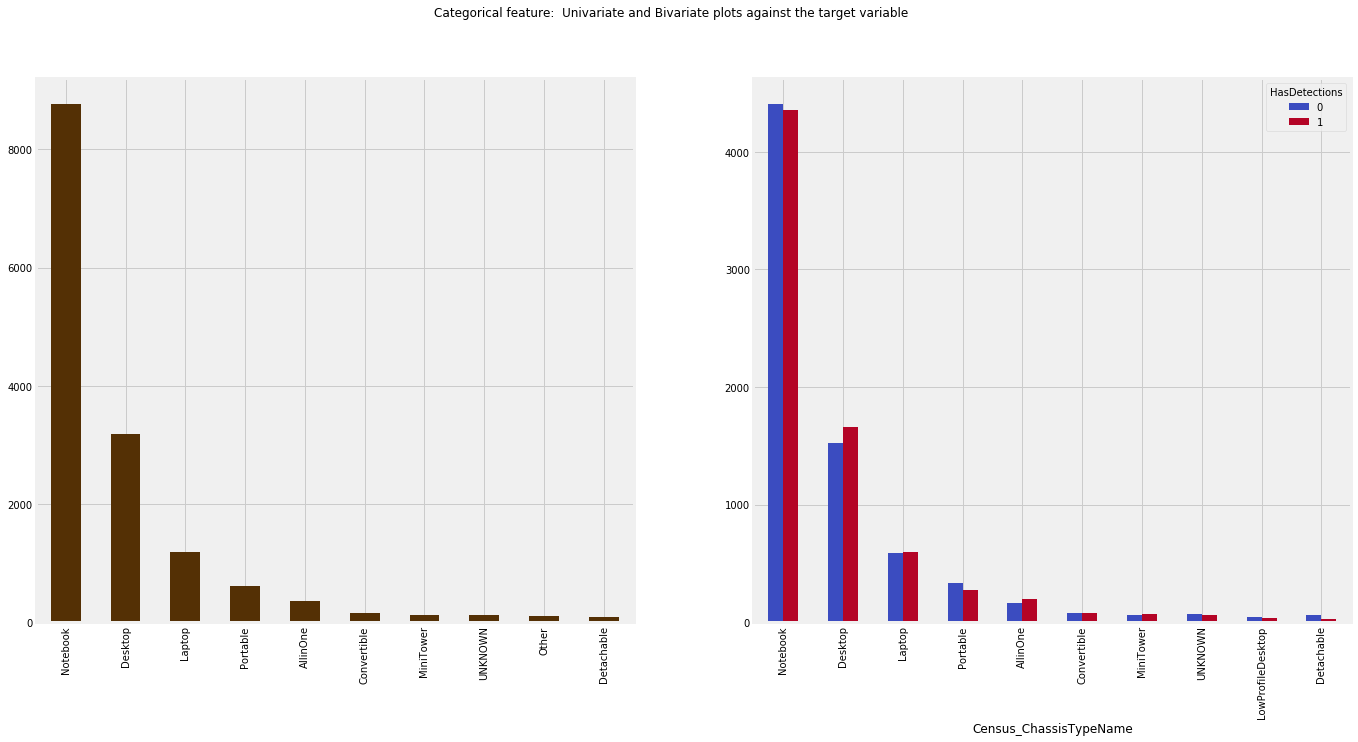

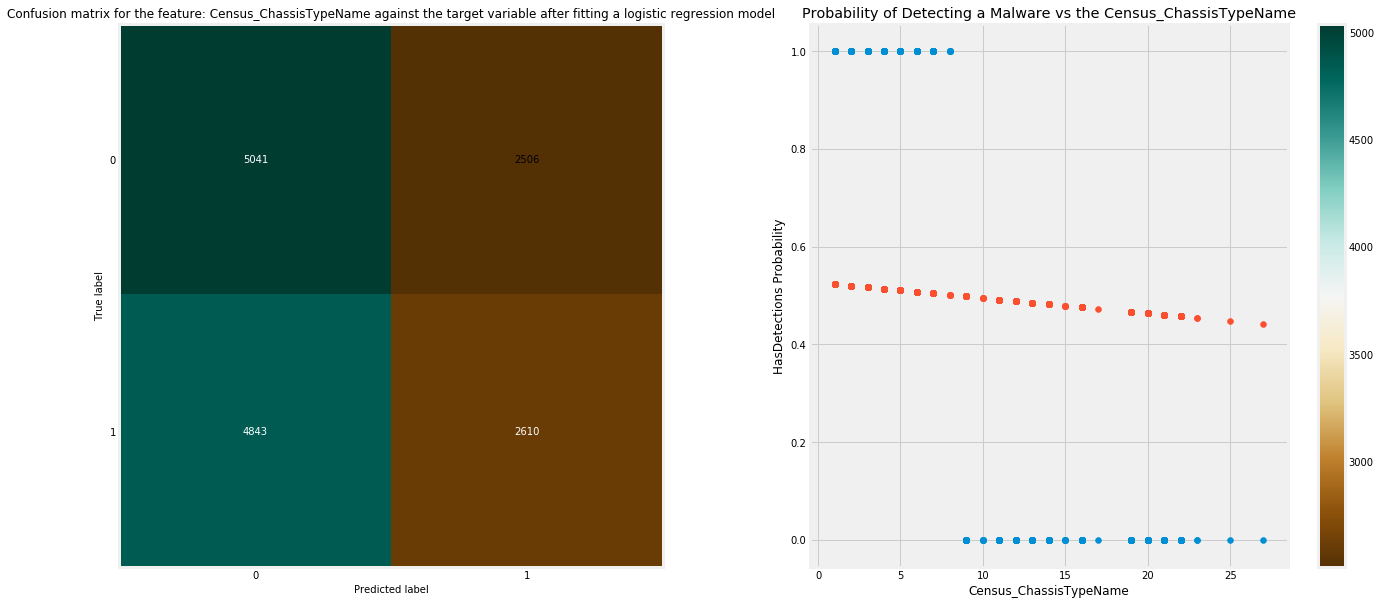

In [41]:
categorical_univariate_and_bivariate_stats(feature="Census_ChassisTypeName")
logistic_fit(feature="Census_ChassisTypeName")

Top 10 most occurred categories for the categorical feature Census_PowerPlatformRoleName
Mobile               10372
Desktop               3482
Slate                  854
Workstation            178
SOHOServer              56
UNKNOWN                 41
EnterpriseServer        12
AppliancePC              5
PerformanceServer        0
Name: Census_PowerPlatformRoleName, dtype: int64

Fitting a logistic regression model for the feature Census_PowerPlatformRoleName against the target variable
              precision    recall  f1-score   support

           0       0.51      0.78      0.62      7547
           1       0.52      0.25      0.33      7453

   micro avg       0.51      0.51      0.51     15000
   macro avg       0.52      0.51      0.48     15000
weighted avg       0.52      0.51      0.48     15000


accuracy score: 0.5136
F1 score: 0.5136


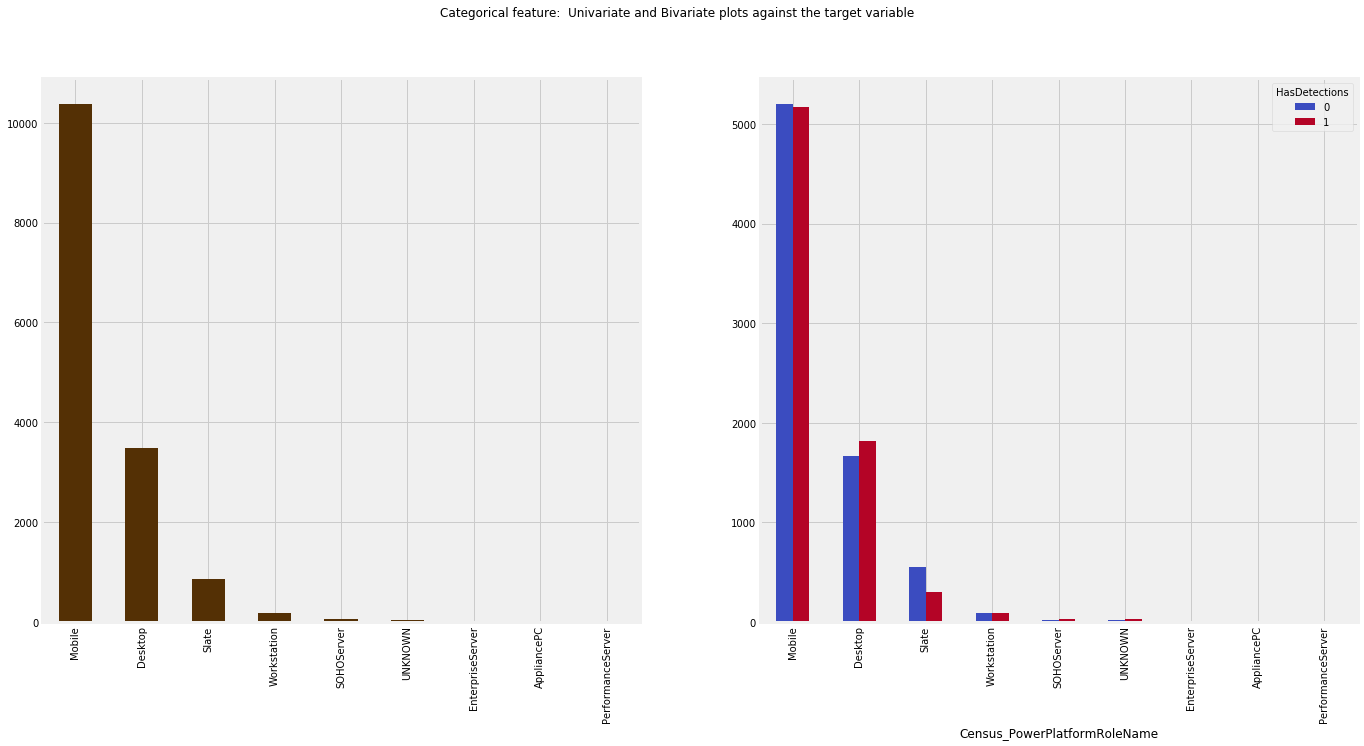

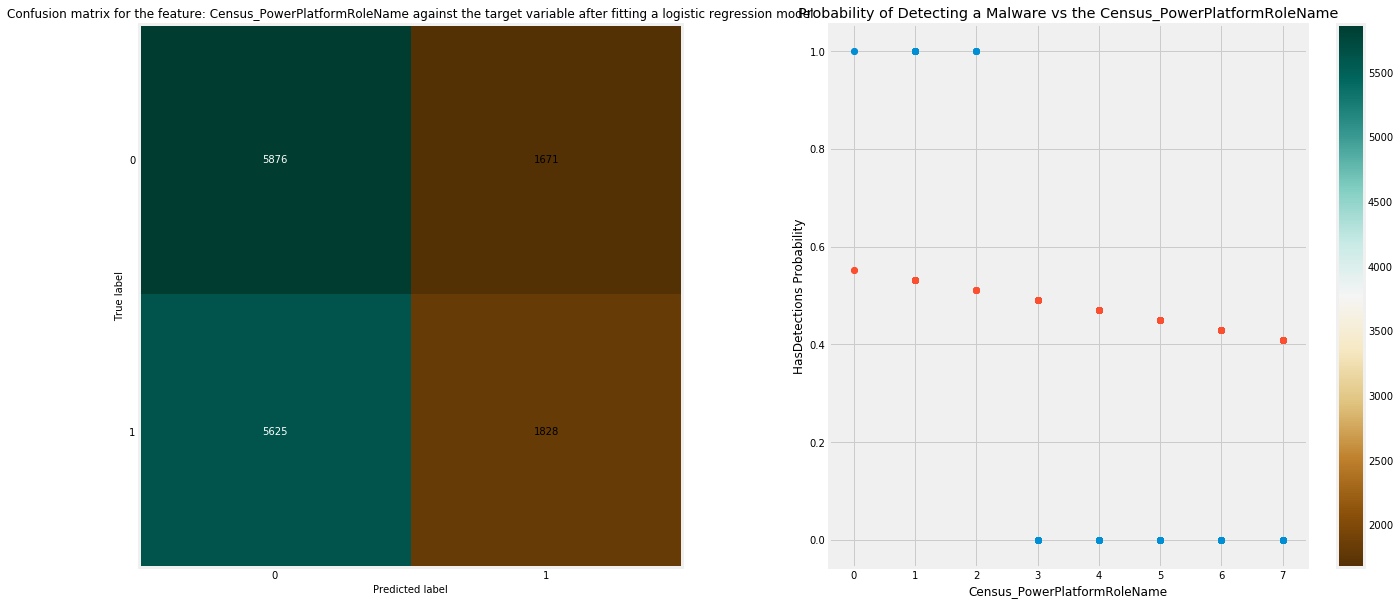

In [42]:
categorical_univariate_and_bivariate_stats(feature="Census_PowerPlatformRoleName")
logistic_fit(feature="Census_PowerPlatformRoleName")

Top 10 most occurred categories for the categorical feature Census_InternalBatteryType
lion    3451
li-i     437
#        267
lip      114
liio      52
li        15
li p      10
nimh       7
pbac       6
real       5
Name: Census_InternalBatteryType, dtype: int64

Fitting a logistic regression model for the feature Census_InternalBatteryType against the target variable
              precision    recall  f1-score   support

           0       0.53      0.94      0.67      2275
           1       0.55      0.08      0.13      2096

   micro avg       0.53      0.53      0.53      4371
   macro avg       0.54      0.51      0.40      4371
weighted avg       0.54      0.53      0.42      4371


accuracy score: 0.5266529398307024
F1 score: 0.5266529398307024


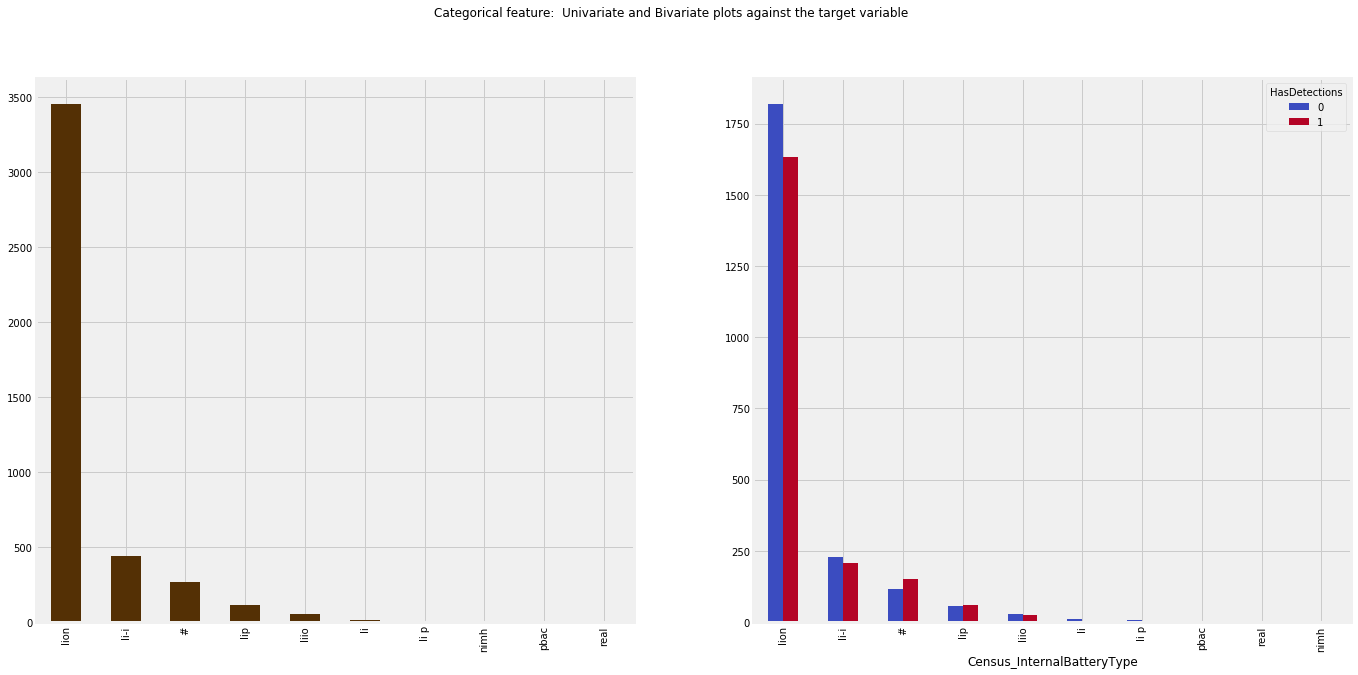

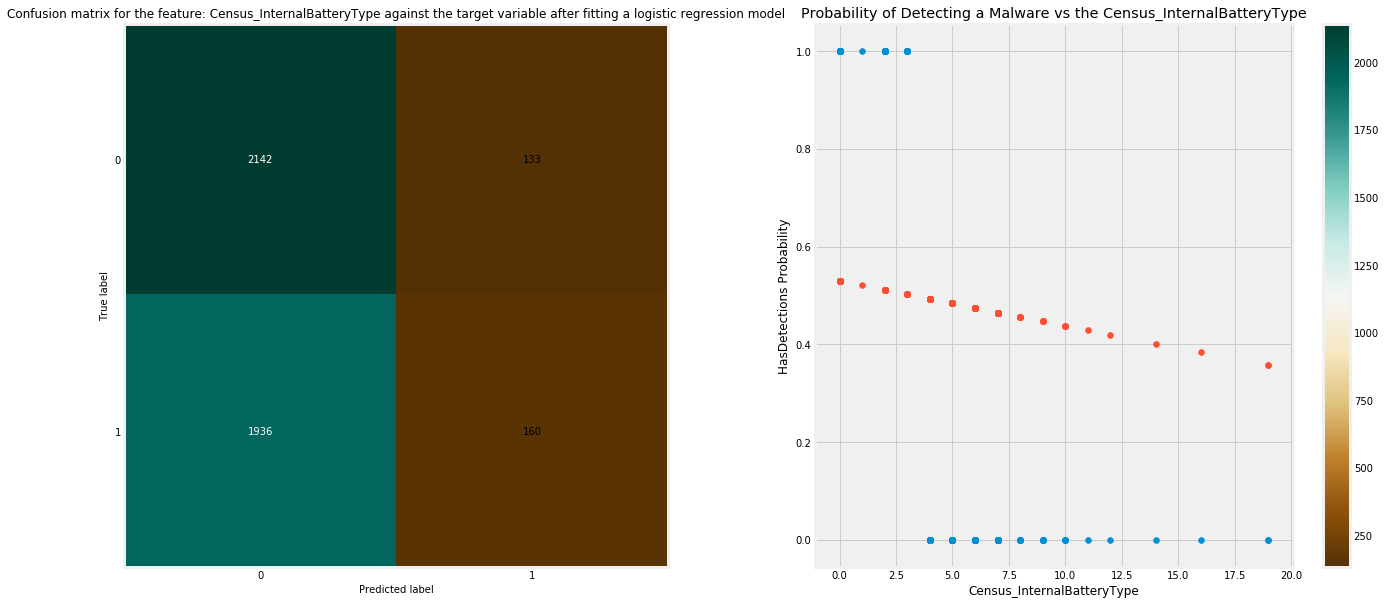

In [43]:
categorical_univariate_and_bivariate_stats(feature="Census_InternalBatteryType")
logistic_fit(feature="Census_InternalBatteryType")

Top 10 most occurred categories for the categorical feature Census_OSVersion
10.0.17134.228     2429
10.0.17134.165     1548
10.0.16299.431      929
10.0.17134.285      809
10.0.16299.547      581
10.0.17134.112      572
10.0.16299.371      540
10.0.17134.191      411
10.0.14393.2189     380
10.0.16299.611      364
Name: Census_OSVersion, dtype: int64

Fitting a logistic regression model for the feature Census_OSVersion against the target variable
              precision    recall  f1-score   support

           0       0.54      0.36      0.43      7547
           1       0.52      0.69      0.59      7453

   micro avg       0.52      0.52      0.52     15000
   macro avg       0.53      0.53      0.51     15000
weighted avg       0.53      0.52      0.51     15000


accuracy score: 0.5243333333333333
F1 score: 0.5243333333333333


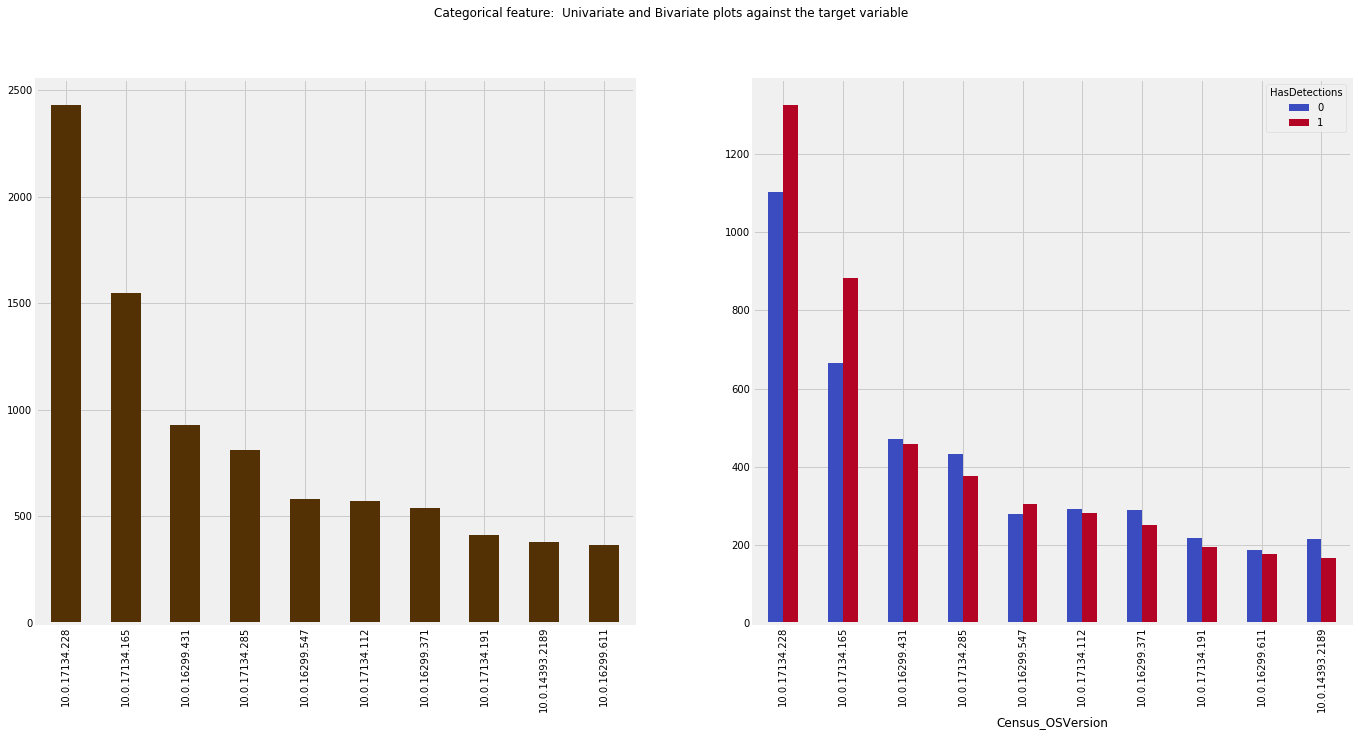

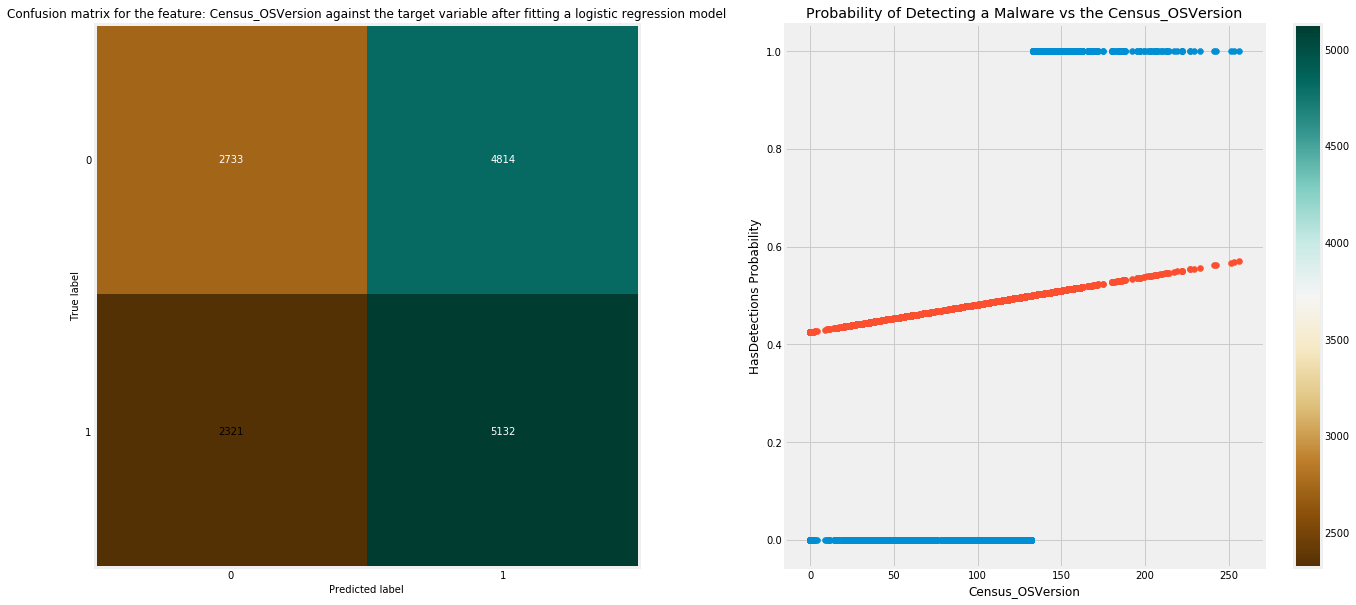

In [44]:
categorical_univariate_and_bivariate_stats(feature="Census_OSVersion")
logistic_fit(feature="Census_OSVersion")

In [45]:
categorical_univariate_and_bivariate_stats(feature="Census_OSArchitecture")
logistic_fit(feature="Census_OSArchitecture")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 most occurred categories for the categorical feature Census_OSBranch
rs4_release               6854
rs3_release               2082
rs3_release_svc_escrow    2046
rs2_release               1345
rs1_release               1265
th2_release                506
th2_release_sec            429
th1_st1                    315
th1                        108
rs5_release                 32
Name: Census_OSBranch, dtype: int64

Fitting a logistic regression model for the feature Census_OSBranch against the target variable
              precision    recall  f1-score   support

           0       0.52      0.47      0.50      7547
           1       0.51      0.57      0.54      7453

   micro avg       0.52      0.52      0.52     15000
   macro avg       0.52      0.52      0.52     15000
weighted avg       0.52      0.52      0.52     15000


accuracy score: 0.519
F1 score: 0.519


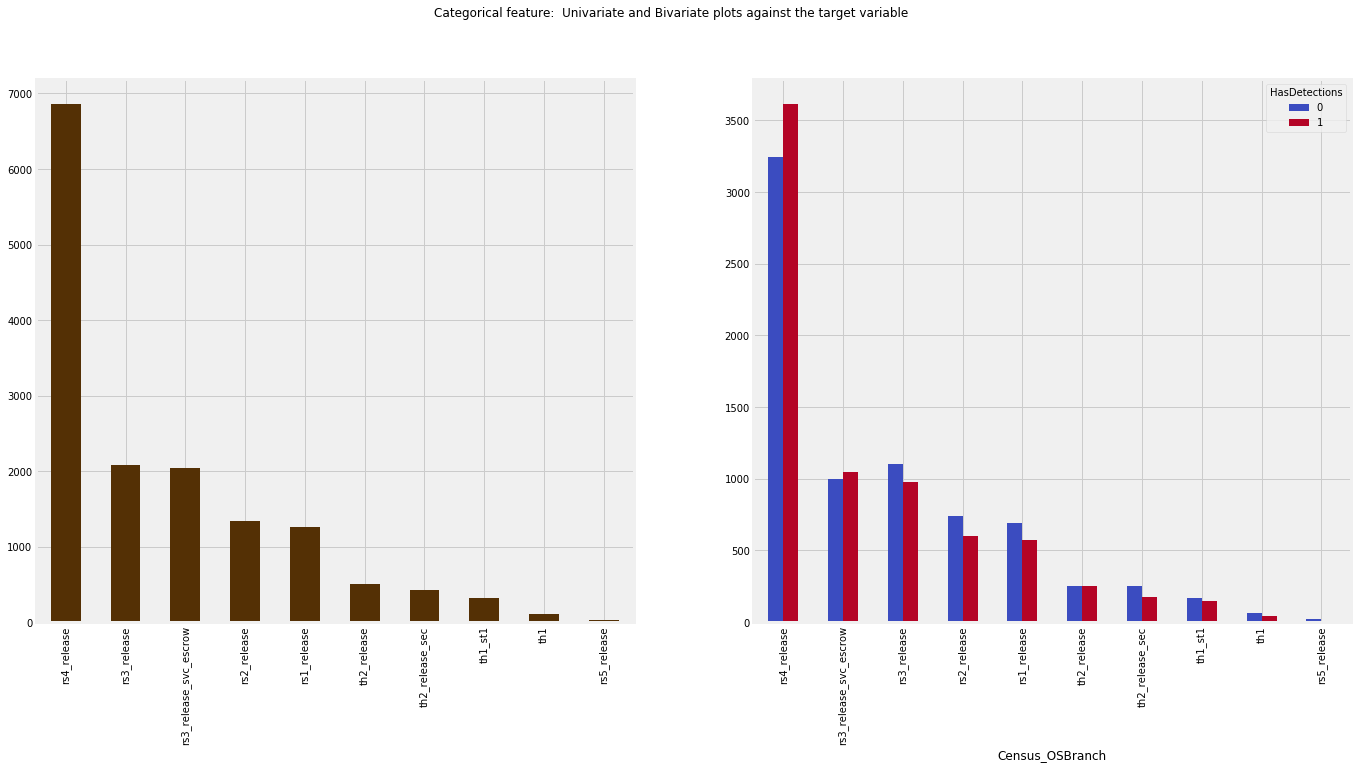

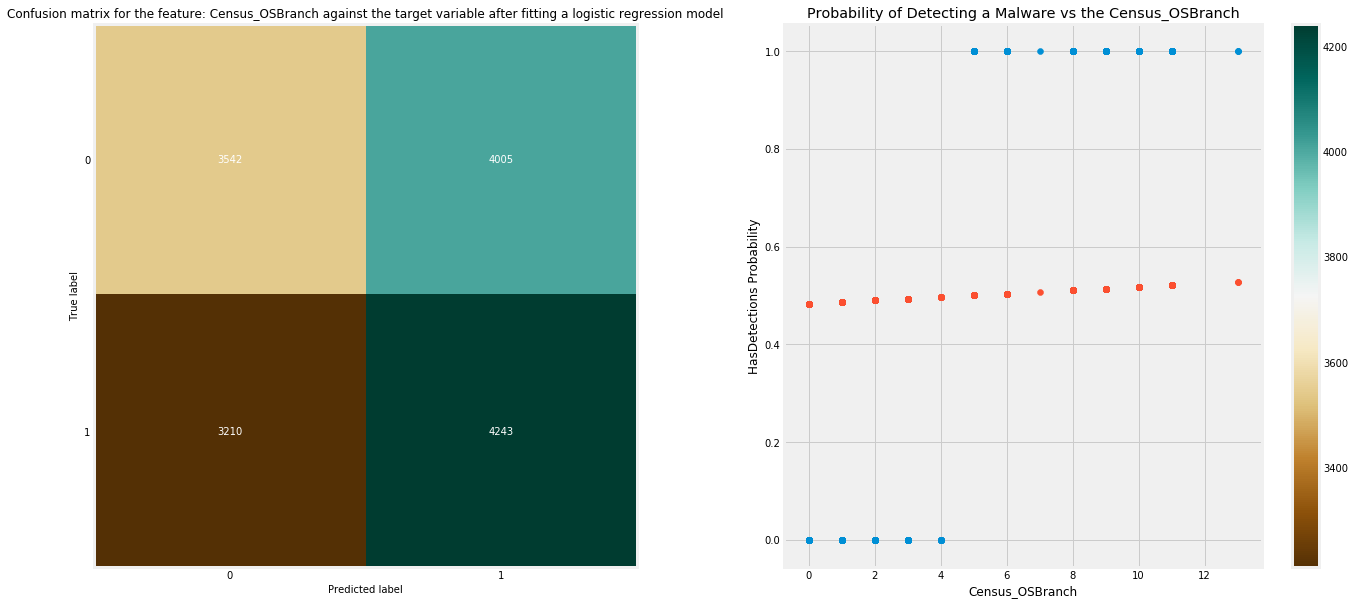

In [46]:
categorical_univariate_and_bivariate_stats(feature="Census_OSBranch")
logistic_fit(feature="Census_OSBranch")

Top 10 most occurred categories for the categorical feature Census_OSEdition
Core                     5857
Professional             5276
CoreSingleLanguage       3233
CoreCountrySpecific       278
ProfessionalEducation      98
Education                  66
Enterprise                 59
ProfessionalN              56
EnterpriseS                36
ServerStandard             15
Name: Census_OSEdition, dtype: int64

Fitting a logistic regression model for the feature Census_OSEdition against the target variable
              precision    recall  f1-score   support

           0       0.51      0.64      0.57      7547
           1       0.51      0.38      0.44      7453

   micro avg       0.51      0.51      0.51     15000
   macro avg       0.51      0.51      0.50     15000
weighted avg       0.51      0.51      0.50     15000


accuracy score: 0.5131333333333333
F1 score: 0.5131333333333333


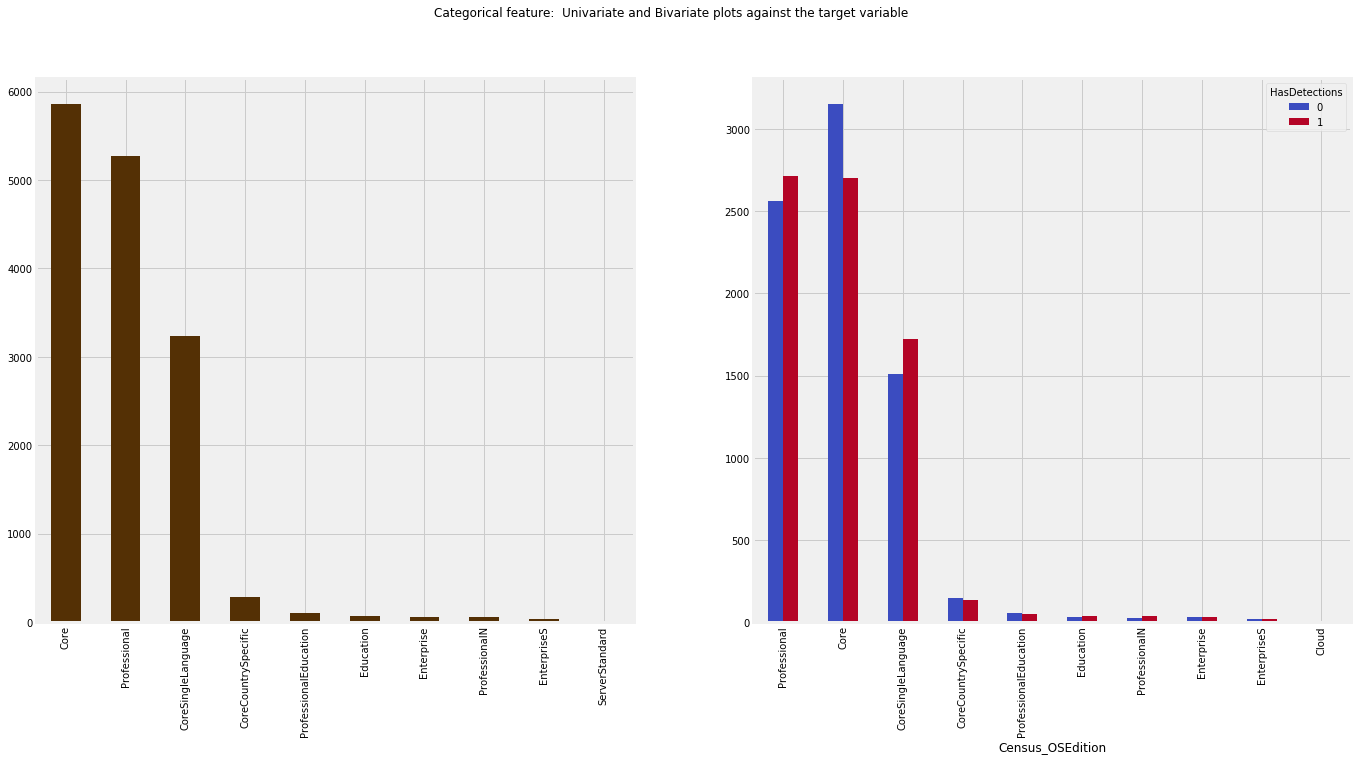

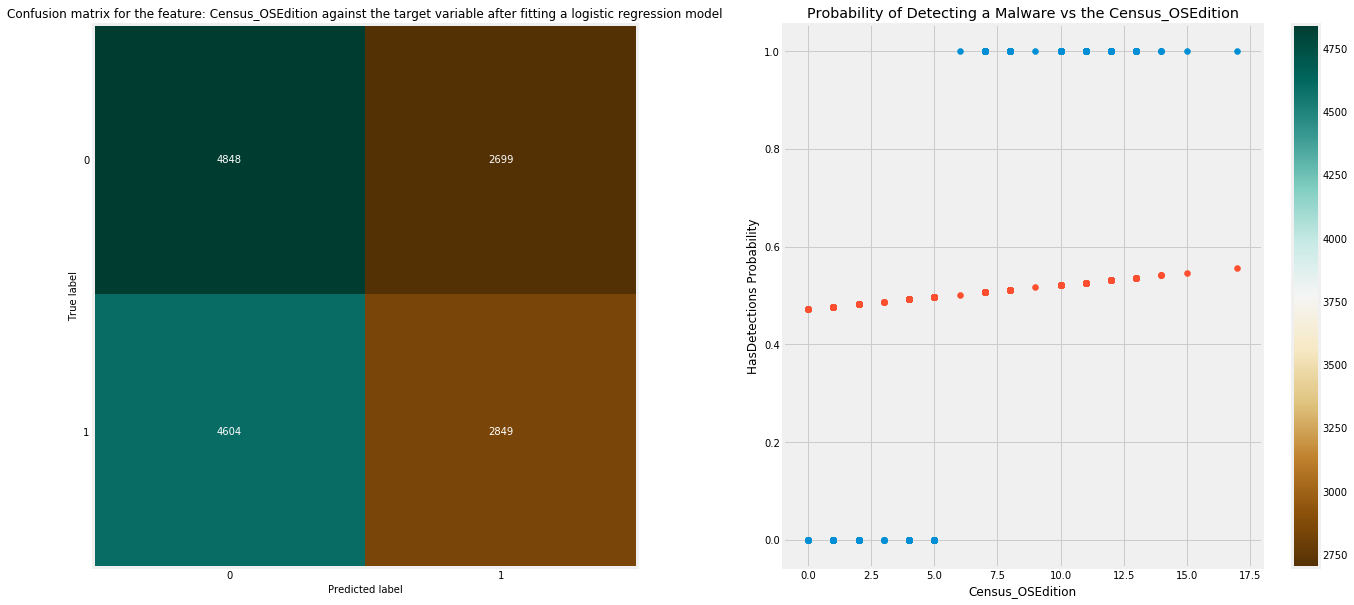

In [47]:
categorical_univariate_and_bivariate_stats(feature="Census_OSEdition")
logistic_fit(feature="Census_OSEdition")

Top 10 most occurred categories for the categorical feature Census_OSSkuName
CORE                    5856
PROFESSIONAL            5375
CORE_SINGLELANGUAGE     3233
CORE_COUNTRYSPECIFIC     278
EDUCATION                 66
ENTERPRISE                59
PROFESSIONAL_N            56
ENTERPRISE_S              36
STANDARD_SERVER           15
CLOUD                     11
Name: Census_OSSkuName, dtype: int64

Fitting a logistic regression model for the feature Census_OSSkuName against the target variable
              precision    recall  f1-score   support

           0       0.51      0.64      0.57      7547
           1       0.51      0.38      0.44      7453

   micro avg       0.51      0.51      0.51     15000
   macro avg       0.51      0.51      0.50     15000
weighted avg       0.51      0.51      0.50     15000


accuracy score: 0.5130666666666667
F1 score: 0.5130666666666667


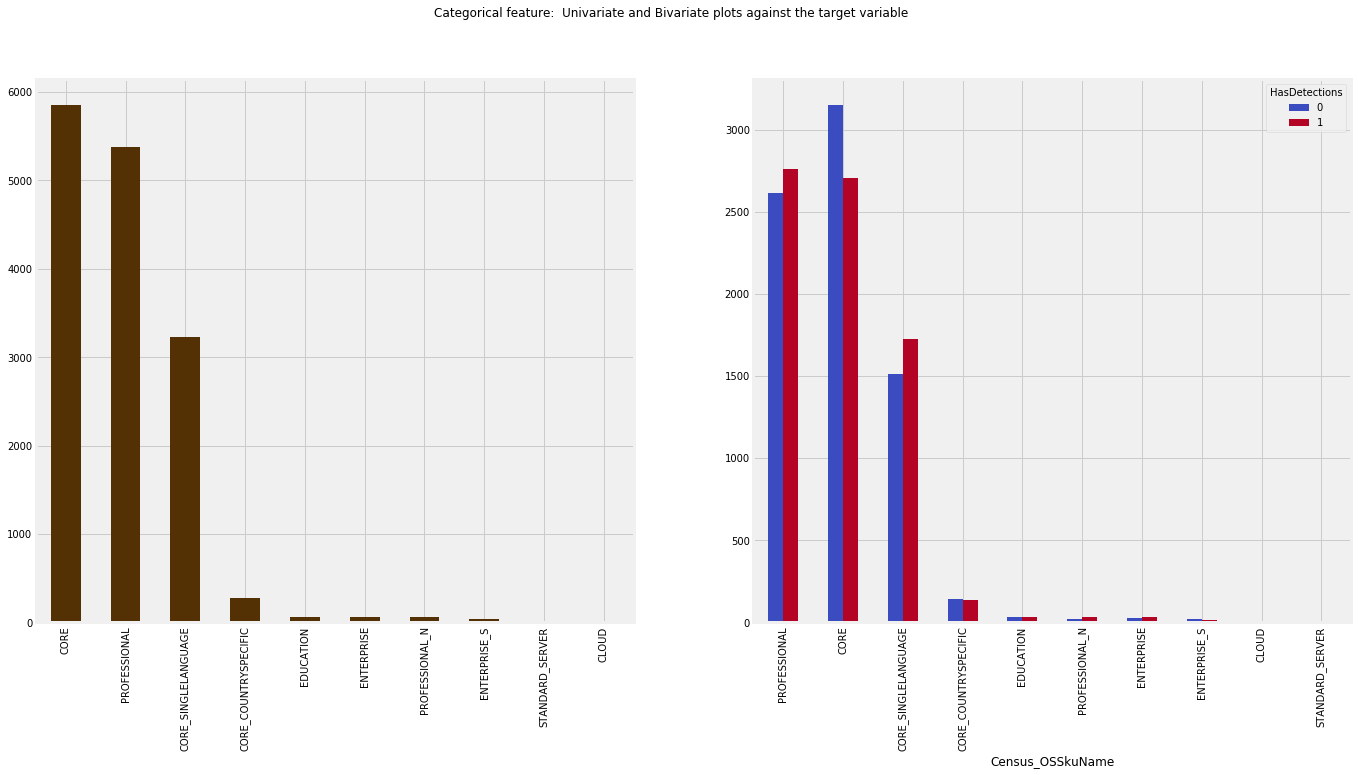

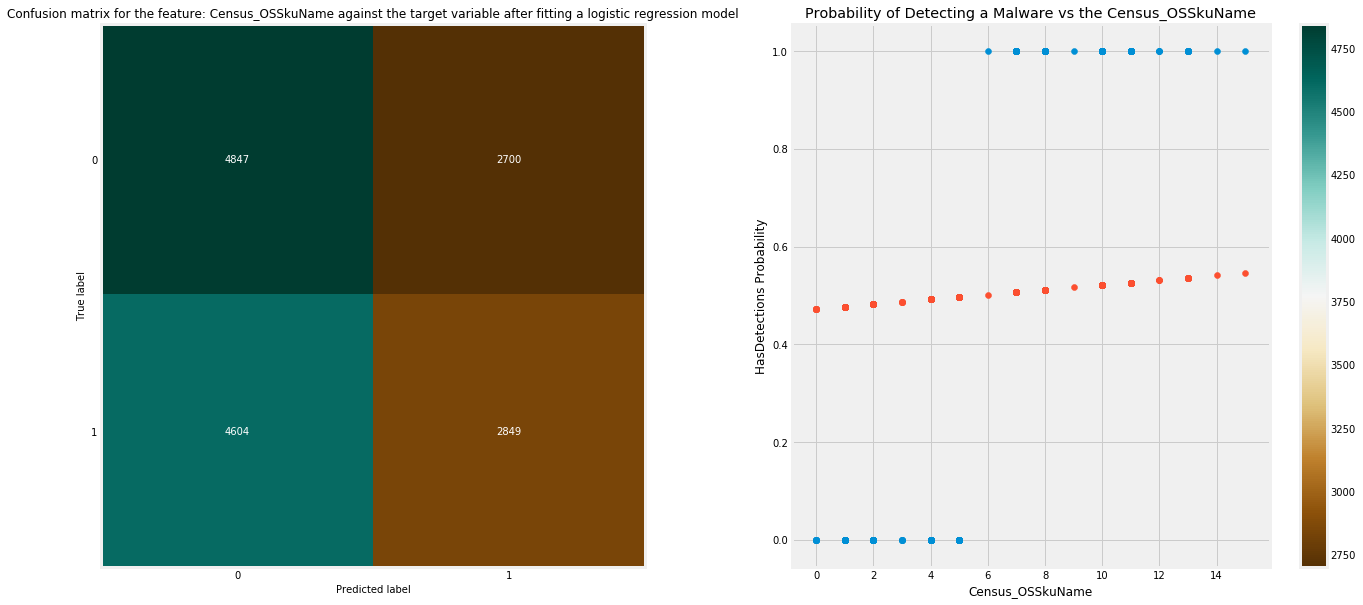

In [48]:
categorical_univariate_and_bivariate_stats(feature="Census_OSSkuName")
logistic_fit(feature="Census_OSSkuName")

Top 10 most occurred categories for the categorical feature Census_OSInstallTypeName
UUPUpgrade        4504
IBSClean          2731
Update            2643
Upgrade           2059
Other             1377
Reset             1124
Refresh            344
Clean              122
CleanPCRefresh      96
Name: Census_OSInstallTypeName, dtype: int64

Fitting a logistic regression model for the feature Census_OSInstallTypeName against the target variable
              precision    recall  f1-score   support

           0       0.50      0.71      0.59      7547
           1       0.50      0.29      0.36      7453

   micro avg       0.50      0.50      0.50     15000
   macro avg       0.50      0.50      0.48     15000
weighted avg       0.50      0.50      0.48     15000


accuracy score: 0.5004666666666666
F1 score: 0.5004666666666666


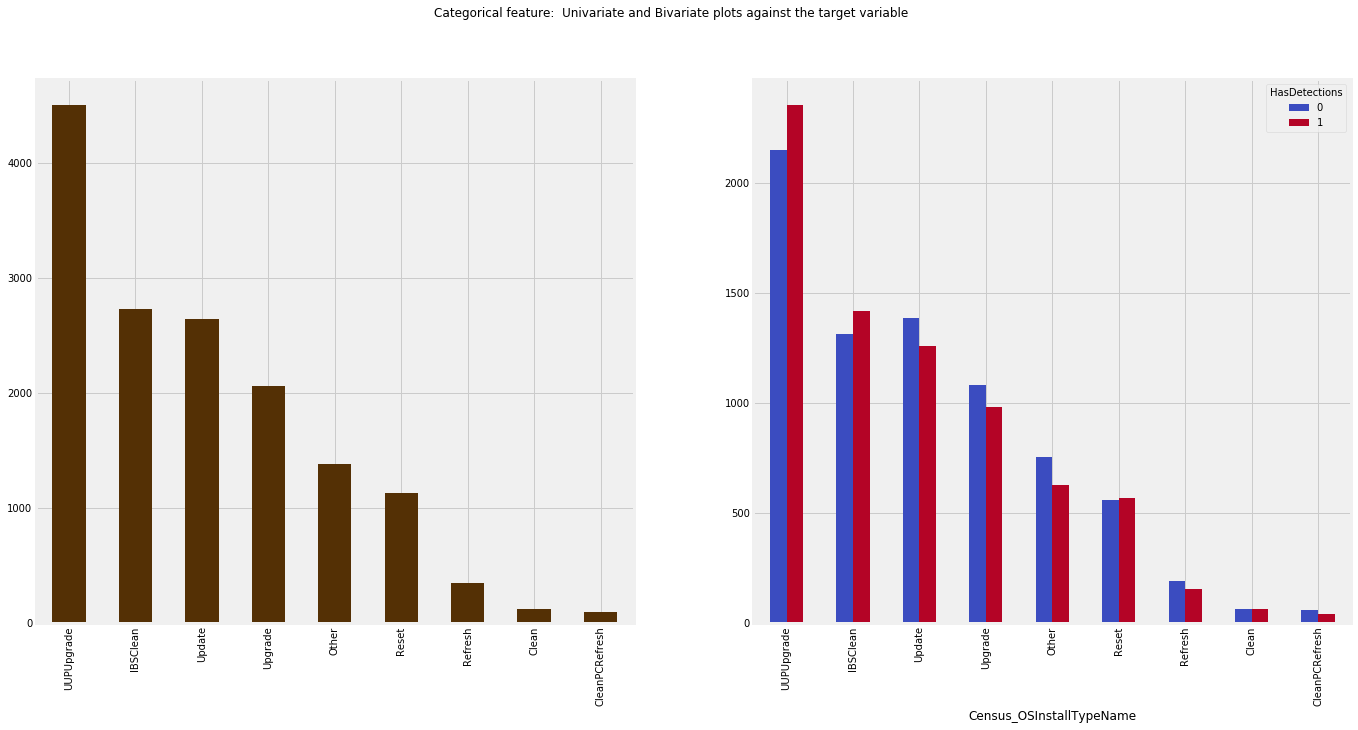

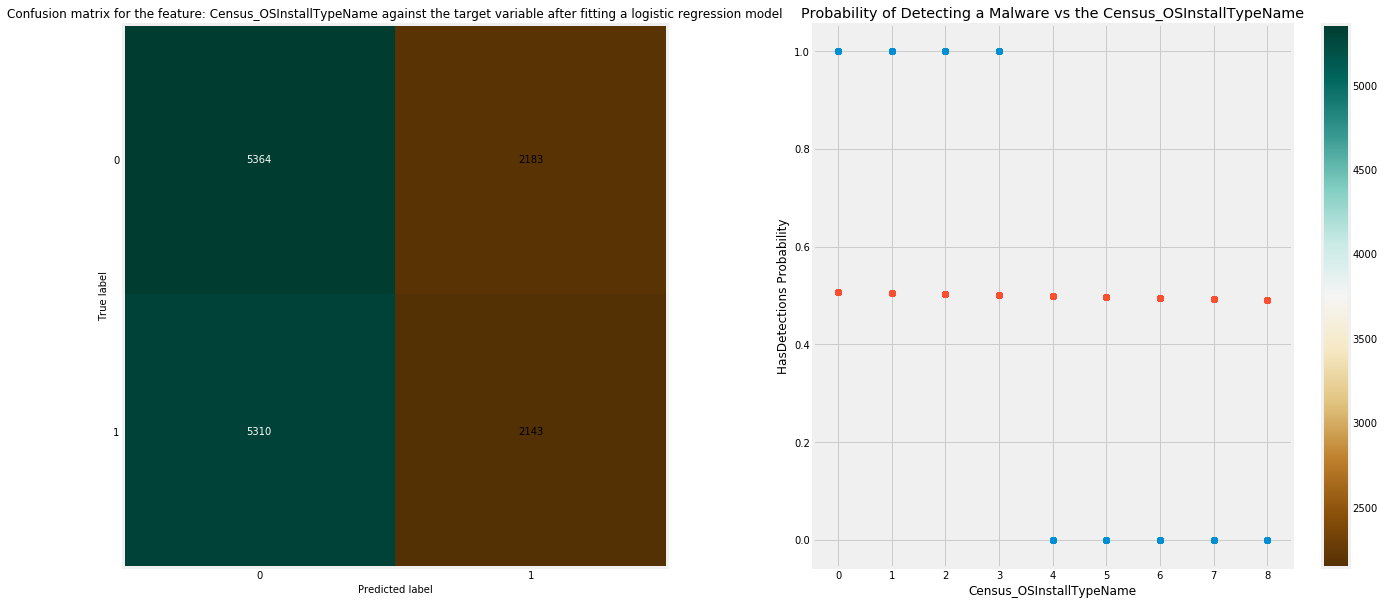

In [49]:
categorical_univariate_and_bivariate_stats(feature="Census_OSInstallTypeName")
logistic_fit(feature="Census_OSInstallTypeName")

Top 10 most occurred categories for the categorical feature Census_OSWUAutoUpdateOptionsName
FullAuto                                 6691
UNKNOWN                                  4187
Notify                                   3415
AutoInstallAndRebootAtMaintenanceTime     644
Off                                        42
DownloadNotify                             21
Name: Census_OSWUAutoUpdateOptionsName, dtype: int64

Fitting a logistic regression model for the feature Census_OSWUAutoUpdateOptionsName against the target variable
              precision    recall  f1-score   support

           0       0.52      0.53      0.52      7547
           1       0.51      0.51      0.51      7453

   micro avg       0.52      0.52      0.52     15000
   macro avg       0.52      0.52      0.52     15000
weighted avg       0.52      0.52      0.52     15000


accuracy score: 0.5159333333333334
F1 score: 0.5159333333333334


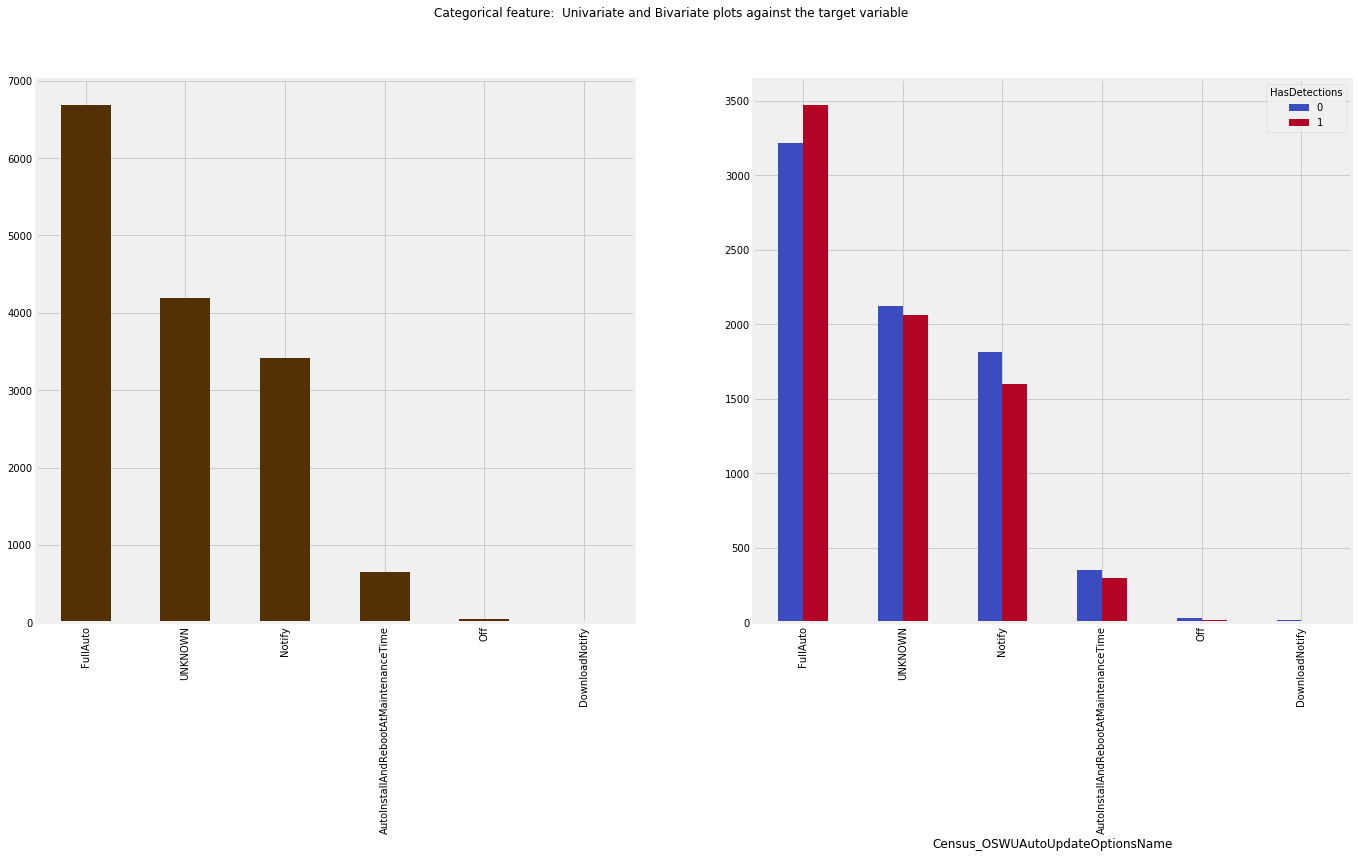

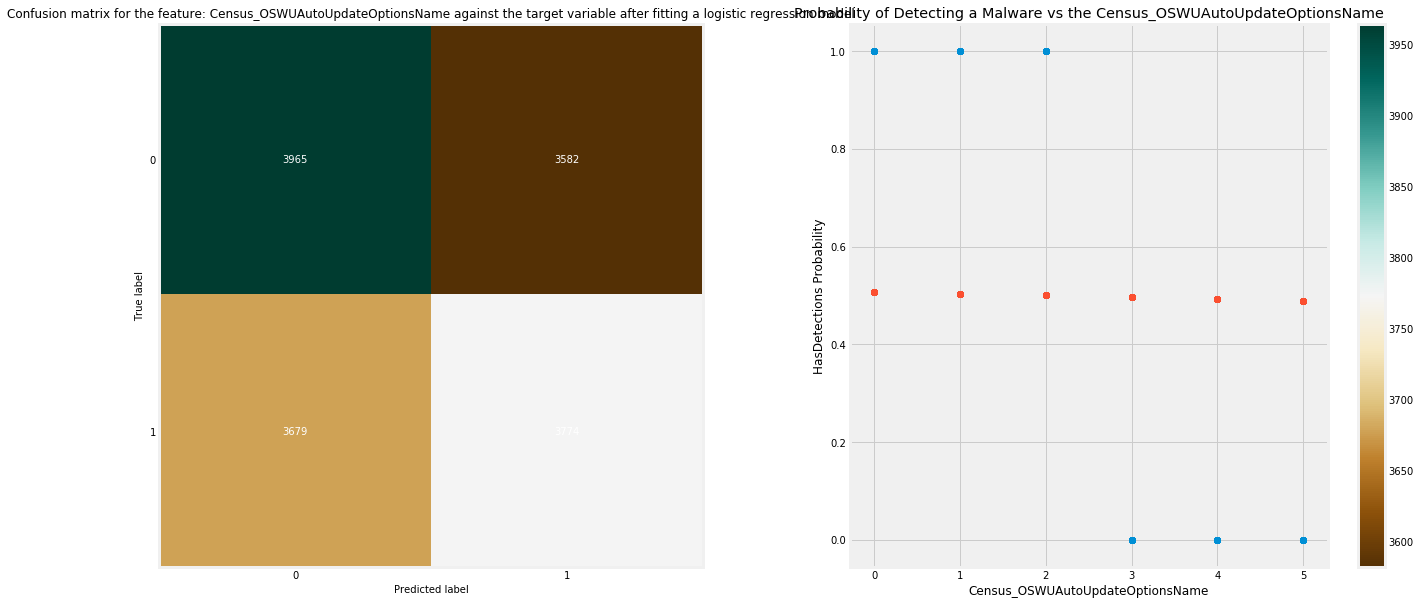

In [50]:
categorical_univariate_and_bivariate_stats(feature="Census_OSWUAutoUpdateOptionsName")
logistic_fit(feature="Census_OSWUAutoUpdateOptionsName")

Top 10 most occurred categories for the categorical feature Census_GenuineStateName
IS_GENUINE         13223
INVALID_LICENSE     1357
OFFLINE              399
UNKNOWN               21
Name: Census_GenuineStateName, dtype: int64

Fitting a logistic regression model for the feature Census_GenuineStateName against the target variable
              precision    recall  f1-score   support

           0       0.50      0.98      0.67      7547
           1       0.56      0.03      0.06      7453

   micro avg       0.51      0.51      0.51     15000
   macro avg       0.53      0.50      0.36     15000
weighted avg       0.53      0.51      0.36     15000


accuracy score: 0.5064666666666666
F1 score: 0.5064666666666666


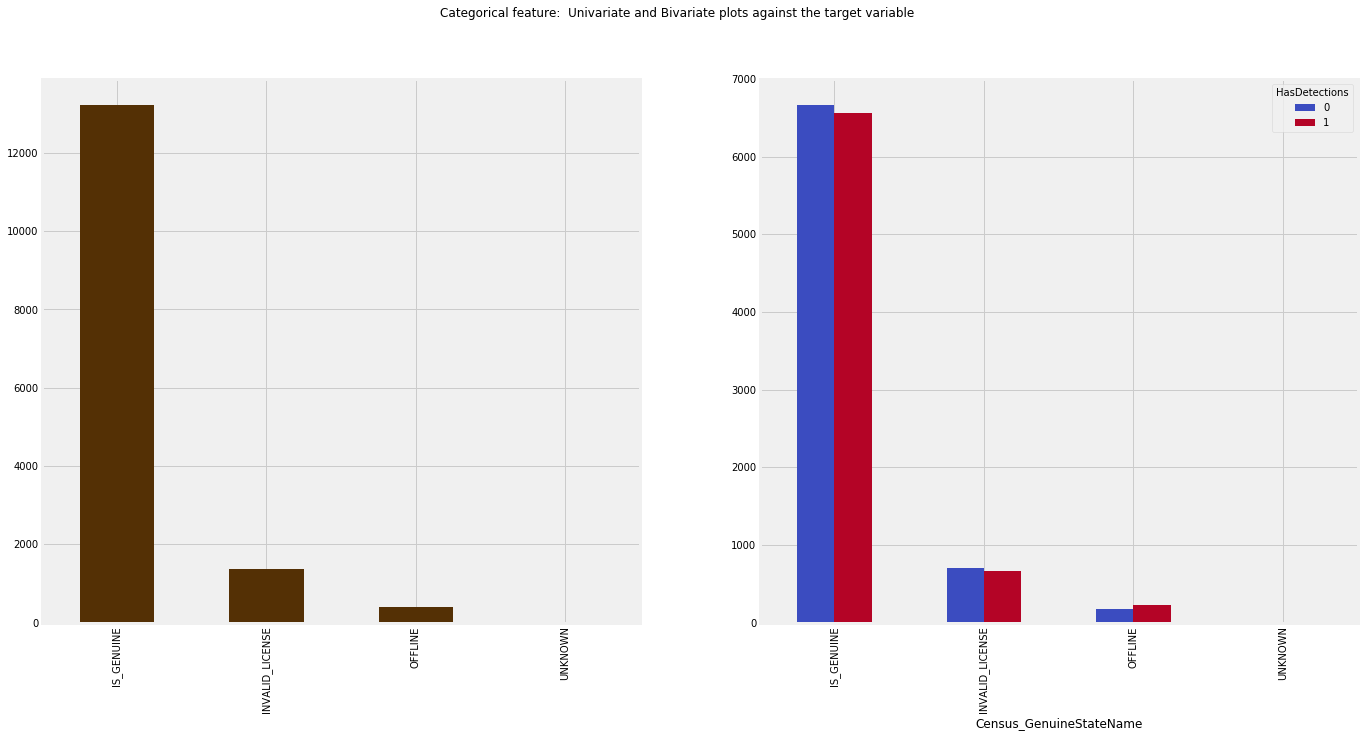

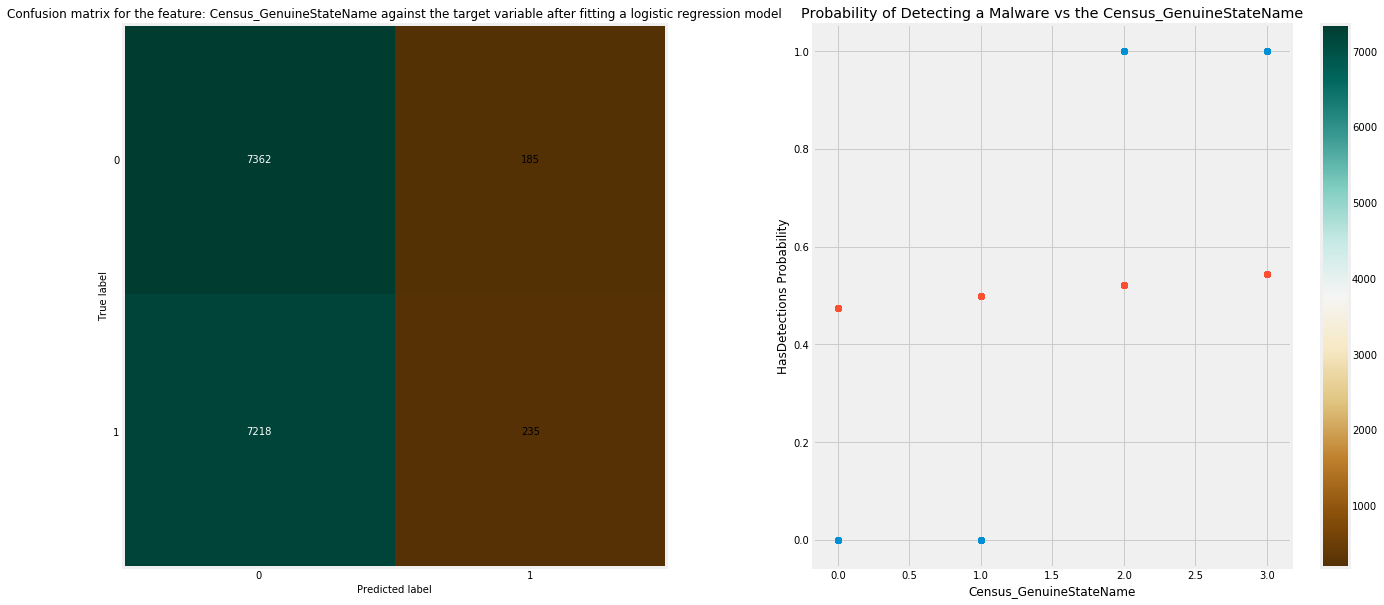

In [51]:
categorical_univariate_and_bivariate_stats(feature="Census_GenuineStateName")
logistic_fit(feature="Census_GenuineStateName")

Top 10 most occurred categories for the categorical feature Census_ActivationChannel
Retail            7884
OEM:DM            5797
Volume:GVLK        757
OEM:NONSLP         540
Volume:MAK          17
Retail:TB:Eval       5
Name: Census_ActivationChannel, dtype: int64

Fitting a logistic regression model for the feature Census_ActivationChannel against the target variable
              precision    recall  f1-score   support

           0       0.50      0.42      0.46      7547
           1       0.50      0.58      0.53      7453

   micro avg       0.50      0.50      0.50     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.50      0.50      0.50     15000


accuracy score: 0.5001333333333333
F1 score: 0.5001333333333333


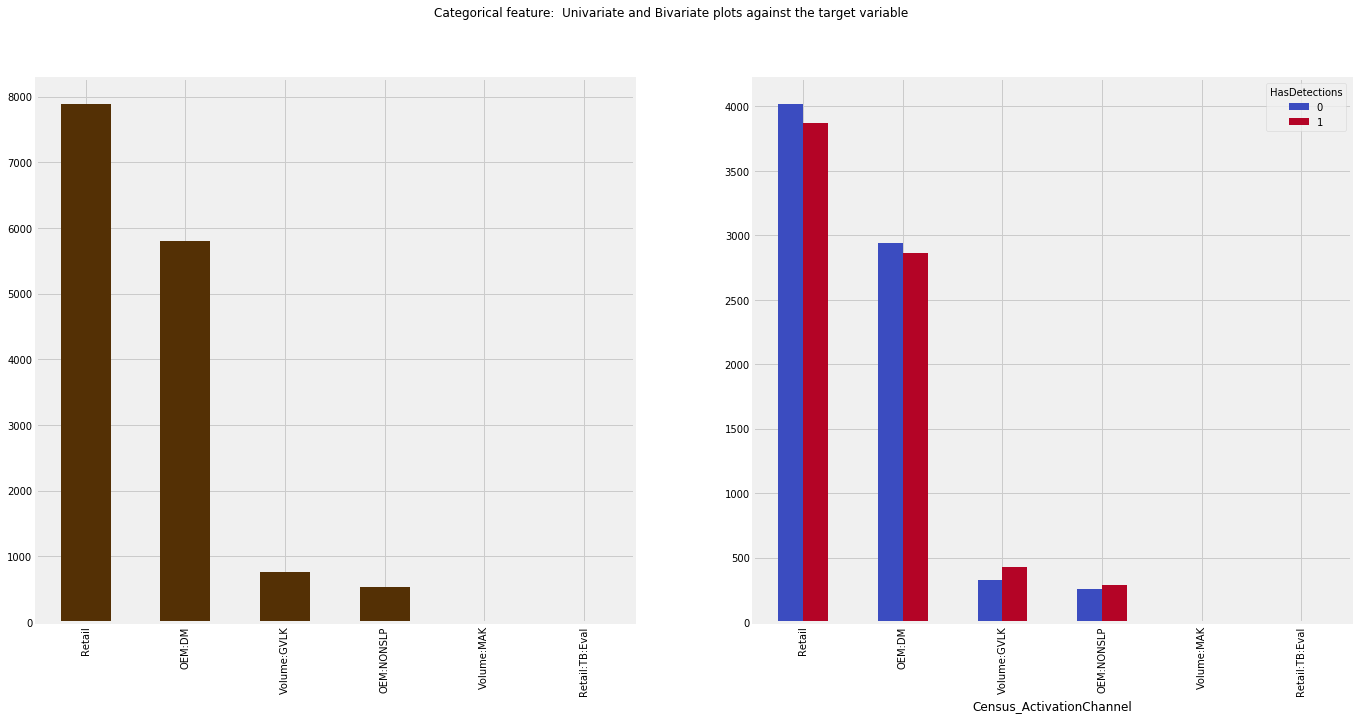

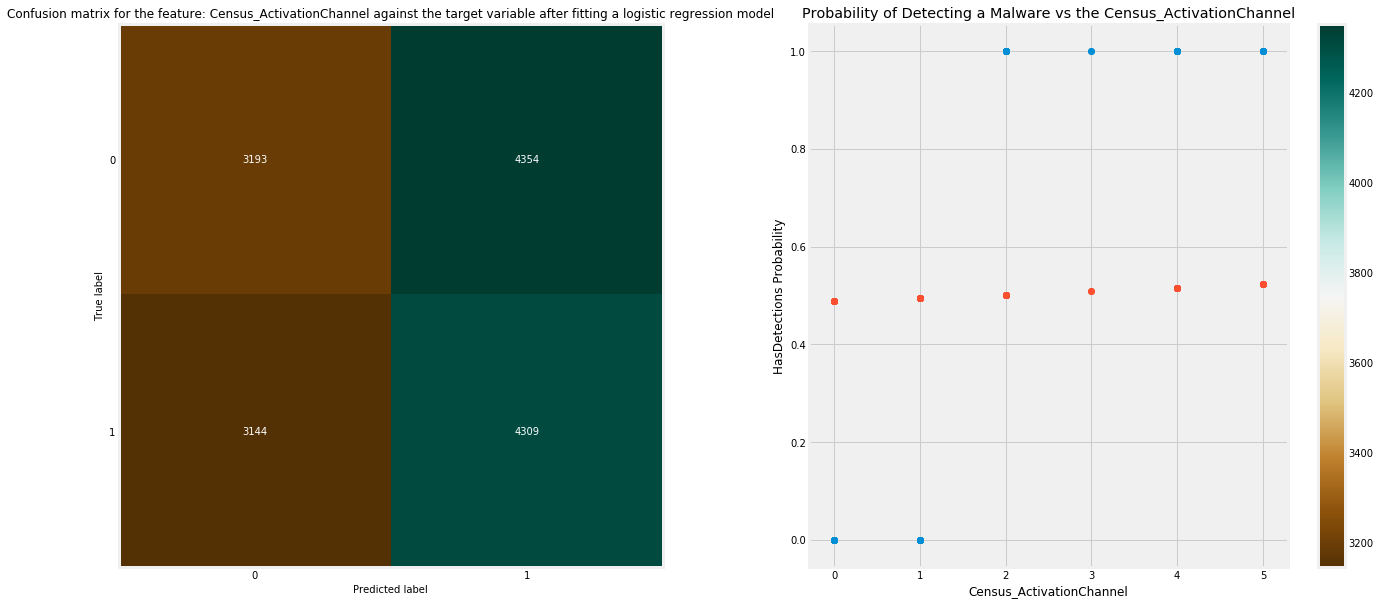

In [52]:
categorical_univariate_and_bivariate_stats(feature="Census_ActivationChannel")
logistic_fit(feature="Census_ActivationChannel")

In [53]:
categorical_univariate_and_bivariate_stats(feature="Census_FlightRing")
logistic_fit(feature="Census_FlightRing")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [54]:
gc.collect()

42206

### Numerical Columns Univariate and Bivariate Plots against the taget variable

#### Inspecting each one of the numerical features from the train set and illustrating the top most occured values against the *HasDetections* target variable. Moreover trying to fit a logistic regression model between the target variable and the inspected feature to identify if the feature is a good predictor.

In [55]:
numerical_and_binary_columns

['AVProductStatesIdentifier',
 'AVProductsInstalled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_IsFlightingInternal',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_IsWIMBootEnabled',
 'Wdft_IsGamer',
 'Wdft_RegionIdentifier']

In [56]:
def numerical_univariate_and_bivariate_plot(feature, num_of_bins = 40):
    
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    
    if feature in train_sample.columns:
    
        print("Top 10 Values counts for the numerical feature", feature)
        print(train_sample[feature].value_counts().head(10))
        print("Min value", train_sample[feature].min())
        print("Max value", train_sample[feature].max())
        print("NaN values", train_sample[feature].isnull().sum())
        print("Number of unique values", train_sample[feature].nunique())

        if train[feature].nunique() > 2:
            print("Mean value", train_sample[feature].mean())
            print("Variance value", train_sample[feature].var())

        # for binary features
        if train[feature].nunique() <= 2:

            f, axes = plt.subplots(1, 2, figsize=(21, 10))

            sns.countplot(x=feature, data=train_sample, ax=axes[0])
            sns.countplot(x=feature, hue = "HasDetections", data=train_sample, ax=axes[1], palette=['b','r'])
            
            f.suptitle("Numerical feature: "+feature+" Univariate and Bivariate plots against the target variable")

        # for numeric features
        else:

            f, axes = plt.subplots(1, 3, figsize=(21, 10))

            sns.distplot(train_sample[feature].dropna(), rug=False, kde=False, ax=axes[0], bins = num_of_bins)

            sns.violinplot(x="HasDetections", y = feature, hue="HasDetections", data=train_sample, ax=axes[1], palette=['b','r'])

            if feature == "LocaleEnglishNameIdentifier":
                sns.distplot(train_sample[train_sample["HasDetections"] == 0][feature].dropna().astype("int16"), rug=False, kde=False, color="b", ax=axes[2], bins = num_of_bins)
                sns.distplot(train_sample[train_sample["HasDetections"] == 1][feature].dropna().astype("int16"), rug=False, kde=False, color="r", ax=axes[2], bins = num_of_bins)
            else:
                sns.distplot(train_sample[train_sample["HasDetections"] == 0][feature].dropna(), rug=False, kde=False, color="b", ax=axes[2], bins = num_of_bins)
                sns.distplot(train_sample[train_sample["HasDetections"] == 1][feature].dropna(), rug=False, kde=False, color="r", ax=axes[2], bins = num_of_bins)
            
                f.suptitle("Numerical feature: "+feature+" Univariate and Bivariate plots against the target variable")
    else:
        print("This feature has been removed from dataset due to high NaN rate or highly unbalanced values")




In [57]:
numerical_univariate_and_bivariate_plot(feature = "IsBeta")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [58]:
numerical_univariate_and_bivariate_plot(feature="RtpStateBitfield")
logistic_fit("RtpStateBitfield")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [59]:
numerical_univariate_and_bivariate_plot(feature="IsSxsPassiveMode")
logistic_fit("IsSxsPassiveMode")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature AVProductStatesIdentifier
53447.0    9842
7945.0      748
47238.0     537
62773.0     444
41571.0     178
46413.0     176
23657.0     175
49480.0     172
29199.0     124
51954.0     119
Name: AVProductStatesIdentifier, dtype: int64
Min value 39.0
Max value 70359.0
NaN values 56
Number of unique values 651
Mean value 47971.7265625
Variance value 192704608.0

Fitting a logistic regression model for the feature AVProductStatesIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7514
           1       0.50      1.00      0.66      7430

   micro avg       0.50      0.50      0.50     14944
   macro avg       0.25      0.50      0.33     14944
weighted avg       0.25      0.50      0.33     14944


accuracy score: 0.4971895074946467
F1 score: 0.4971895074946467


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


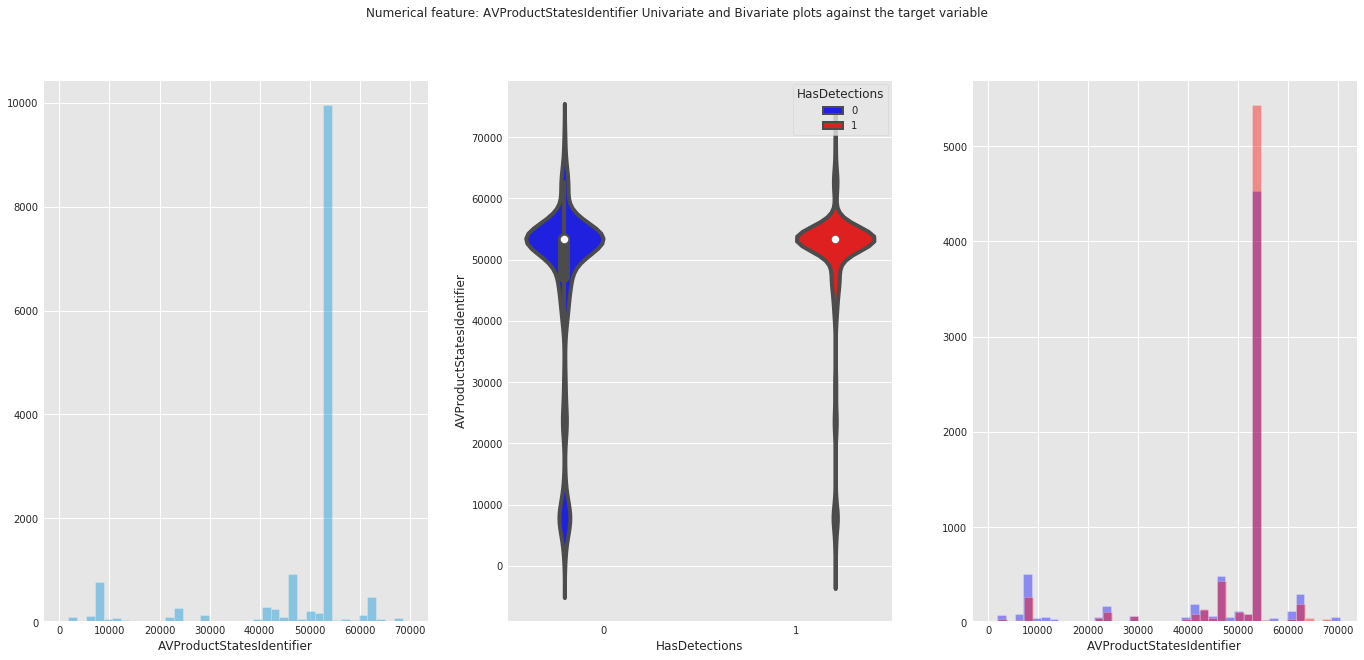

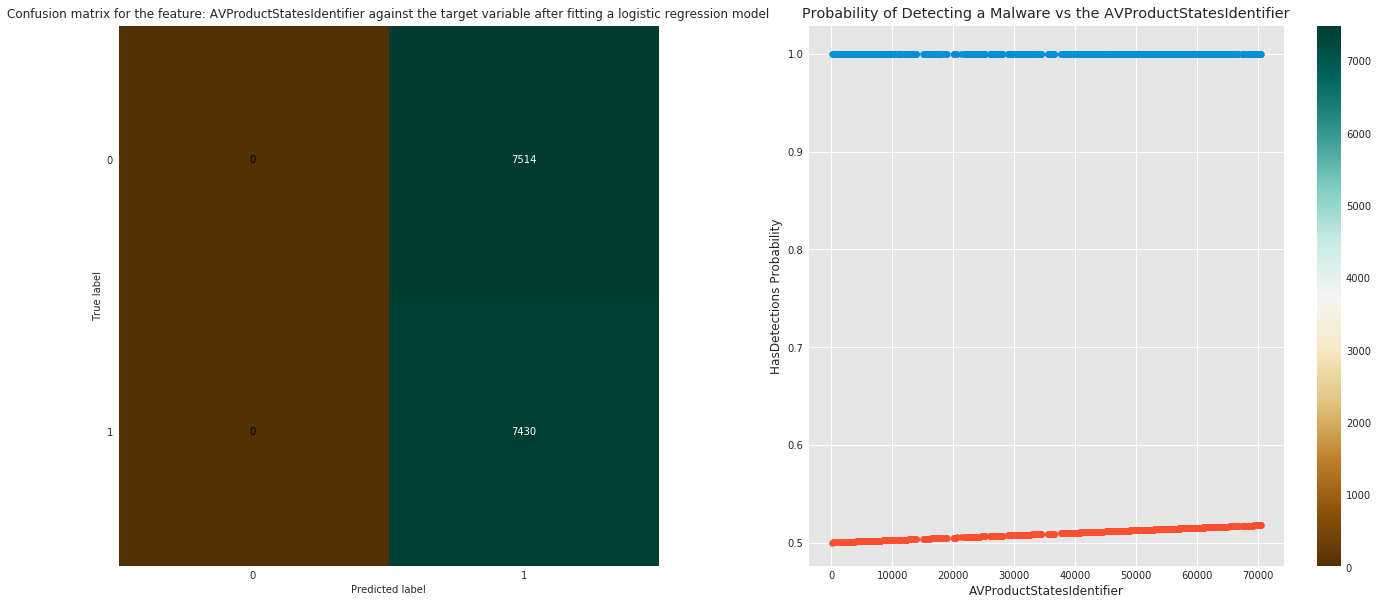

In [60]:
numerical_univariate_and_bivariate_plot(feature="AVProductStatesIdentifier")
logistic_fit("AVProductStatesIdentifier")

Top 10 Values counts for the numerical feature AVProductsInstalled
1.0    10482
2.0     4103
3.0      347
4.0       12
Name: AVProductsInstalled, dtype: int64
Min value 1.0
Max value 4.0
NaN values 56
Number of unique values 4
Mean value 1.323
Variance value 0.27

Fitting a logistic regression model for the feature AVProductsInstalled against the target variable
              precision    recall  f1-score   support

           0       0.61      0.36      0.45      7514
           1       0.54      0.76      0.63      7430

   micro avg       0.56      0.56      0.56     14944
   macro avg       0.57      0.56      0.54     14944
weighted avg       0.57      0.56      0.54     14944


accuracy score: 0.5612955032119914
F1 score: 0.5612955032119914


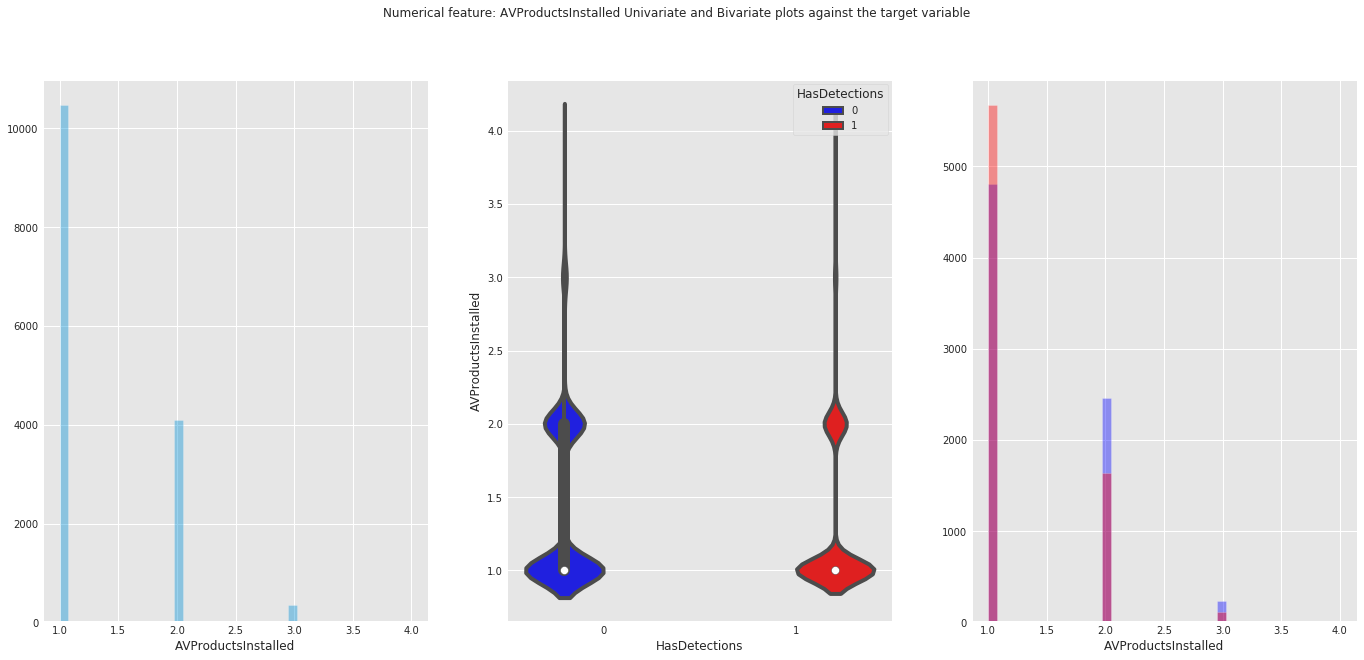

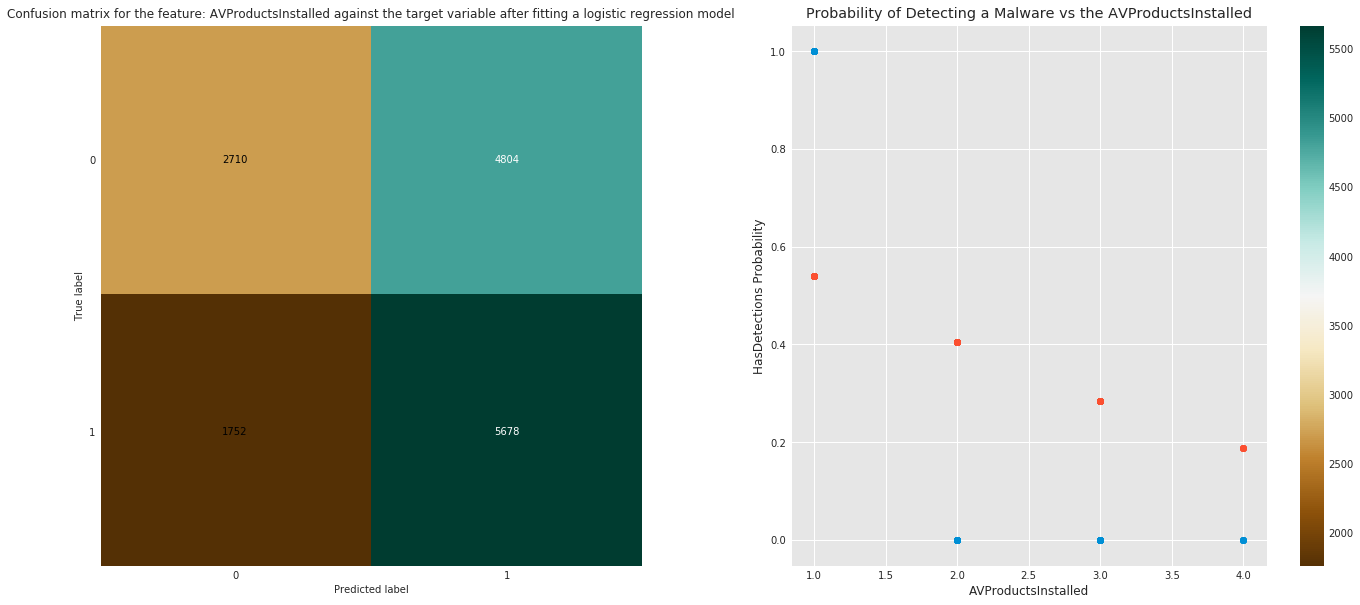

In [61]:
numerical_univariate_and_bivariate_plot(feature="AVProductsInstalled")
logistic_fit("AVProductsInstalled")

In [62]:
numerical_univariate_and_bivariate_plot("HasTpm")
logistic_fit("HasTpm")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature CountryIdentifier
43     683
141    577
29     573
93     467
171    458
60     396
207    373
201    368
66     362
89     345
Name: CountryIdentifier, dtype: int64
Min value 1
Max value 222
NaN values 0
Number of unique values 207
Mean value 108.93206666666667
Variance value 3926.9968515189903

Fitting a logistic regression model for the feature CountryIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7547
           1       0.00      0.00      0.00      7453

   micro avg       0.50      0.50      0.50     15000
   macro avg       0.25      0.50      0.33     15000
weighted avg       0.25      0.50      0.34     15000


accuracy score: 0.5031333333333333
F1 score: 0.5031333333333333


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


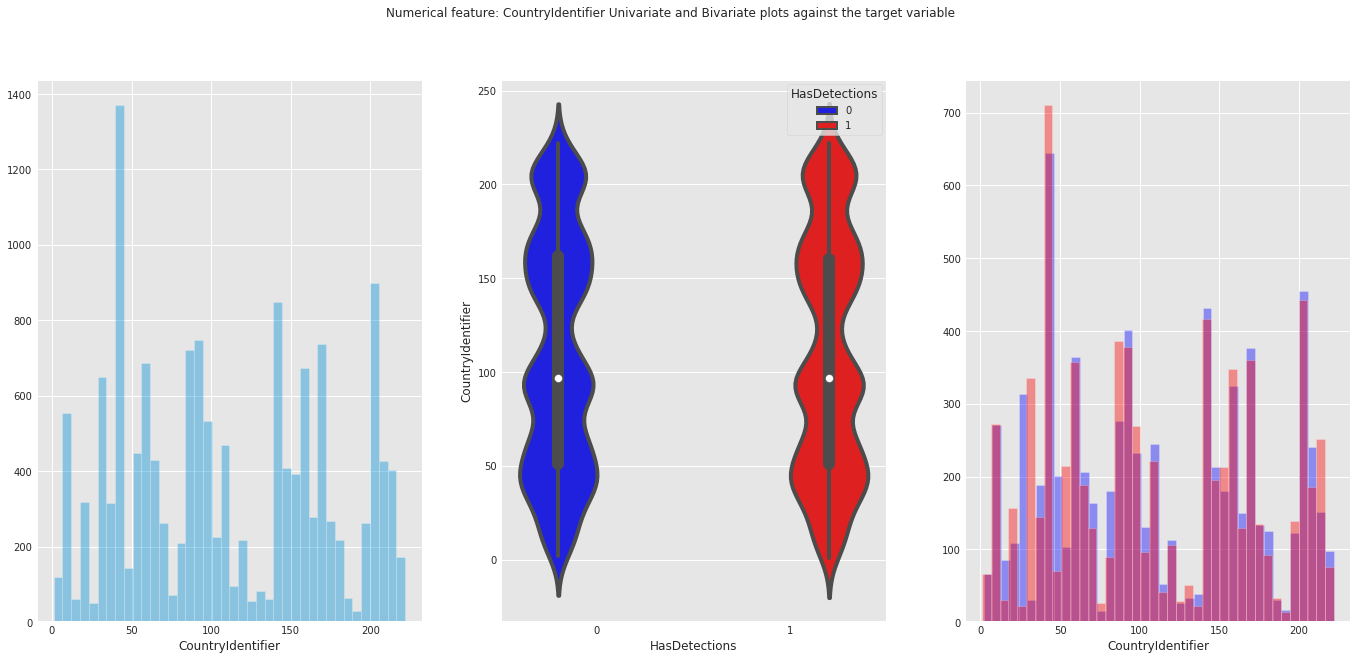

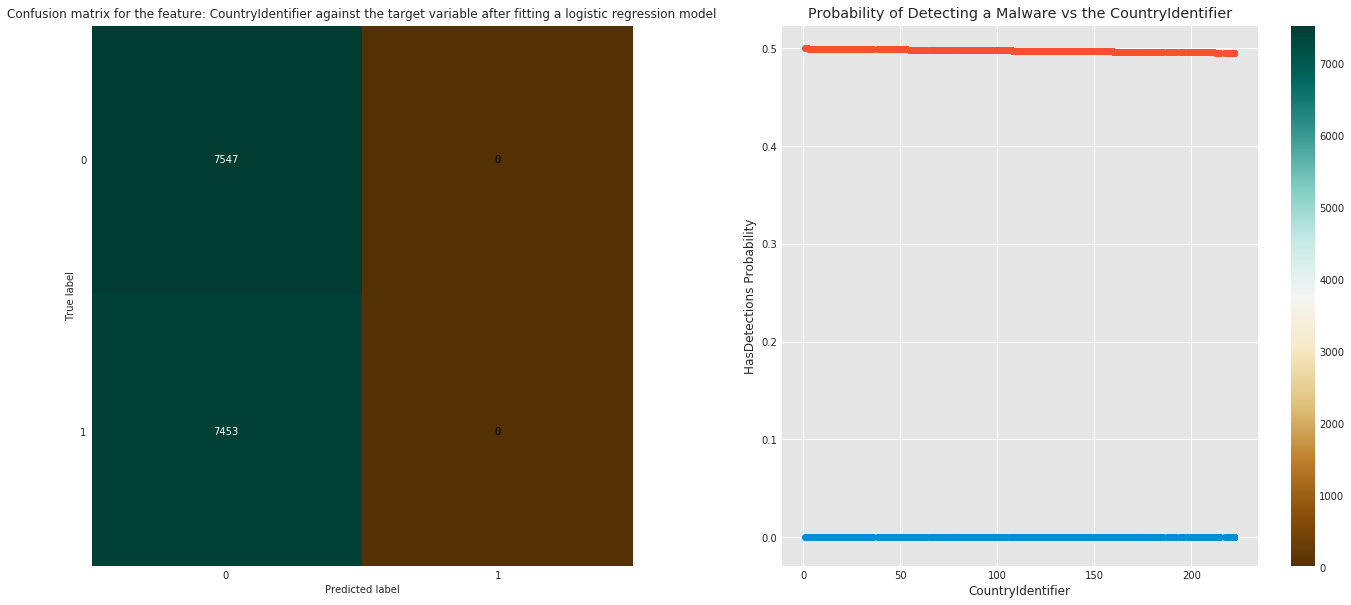

In [63]:
numerical_univariate_and_bivariate_plot("CountryIdentifier")
logistic_fit("CountryIdentifier")

Top 10 Values counts for the numerical feature CityIdentifier
130775.0    160
82373.0     153
10222.0     131
16668.0     130
58607.0     118
61668.0     114
92213.0     112
143782.0    112
66953.0     107
66202.0     101
Name: CityIdentifier, dtype: int64
Min value 41.0
Max value 167933.0
NaN values 542
Number of unique values 4821
Mean value 81034.6171875
Variance value 2389088000.0

Fitting a logistic regression model for the feature CityIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7267
           1       0.00      0.00      0.00      7191

   micro avg       0.50      0.50      0.50     14458
   macro avg       0.25      0.50      0.33     14458
weighted avg       0.25      0.50      0.34     14458


accuracy score: 0.5026283026698022
F1 score: 0.5026283026698022


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


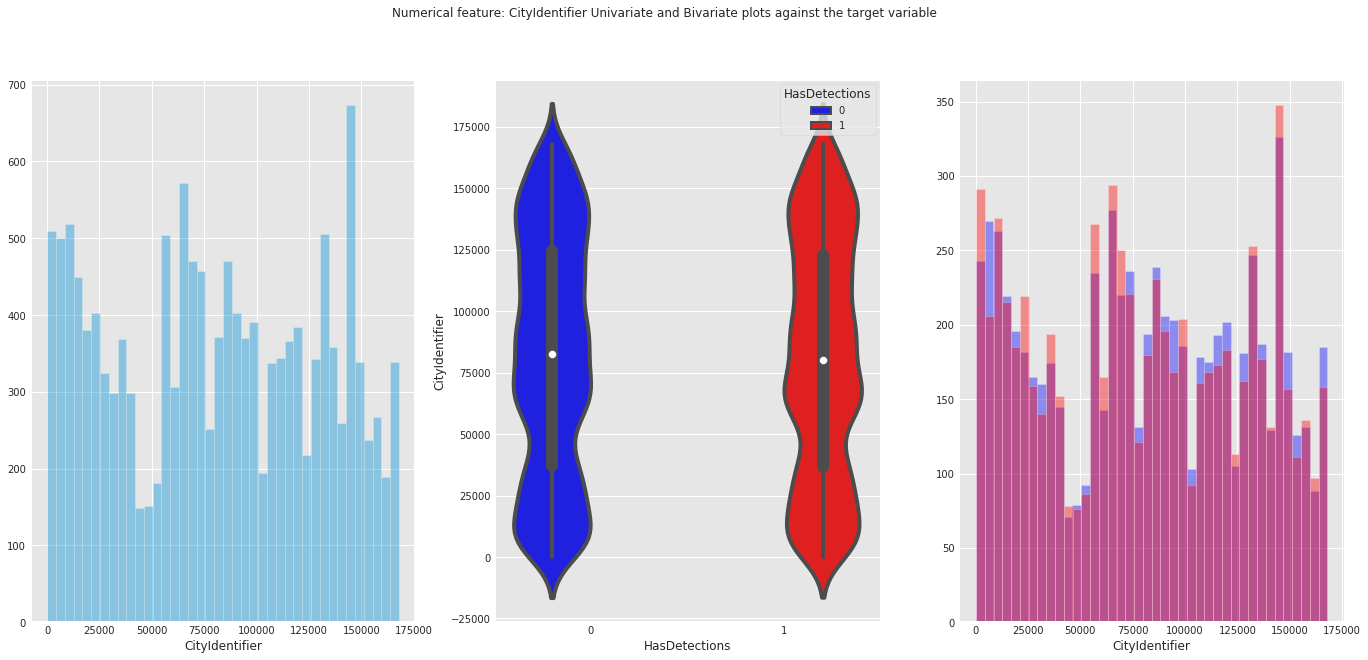

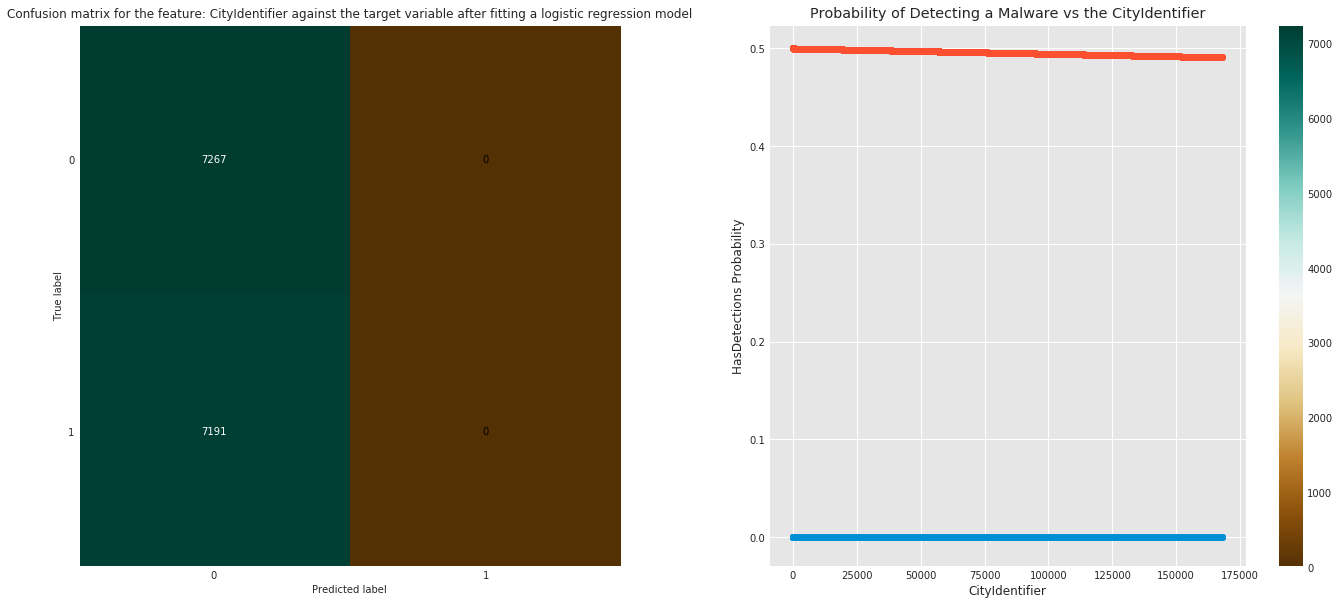

In [64]:
numerical_univariate_and_bivariate_plot("CityIdentifier")
logistic_fit("CityIdentifier")

Top 10 Values counts for the numerical feature OrganizationIdentifier
27.0    7071
18.0    2944
48.0     122
50.0      80
11.0      31
37.0      24
49.0      24
46.0      22
14.0       8
36.0       7
Name: OrganizationIdentifier, dtype: int64
Min value 2.0
Max value 52.0
NaN values 4629
Number of unique values 26
Mean value inf
Variance value 32.16

Fitting a logistic regression model for the feature OrganizationIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.98      0.67      5229
           1       0.57      0.03      0.06      5142

   micro avg       0.51      0.51      0.51     10371
   macro avg       0.54      0.50      0.36     10371
weighted avg       0.54      0.51      0.37     10371


accuracy score: 0.5080512968855463
F1 score: 0.5080512968855463


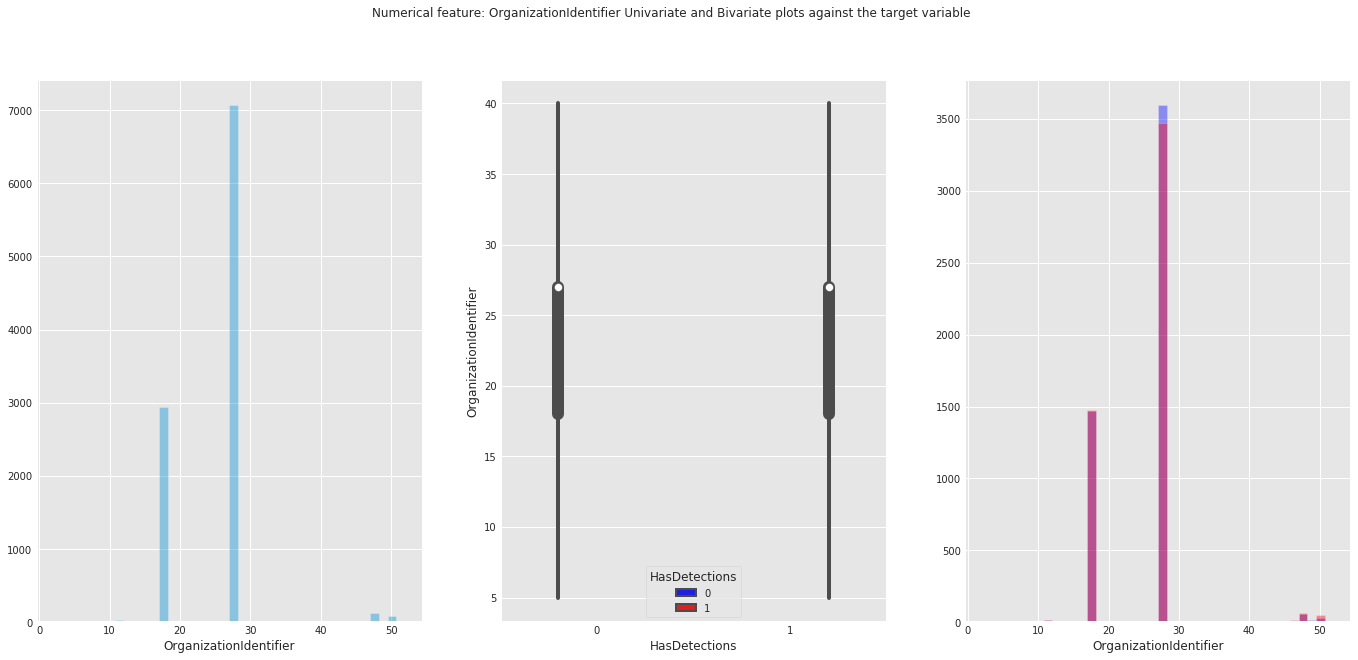

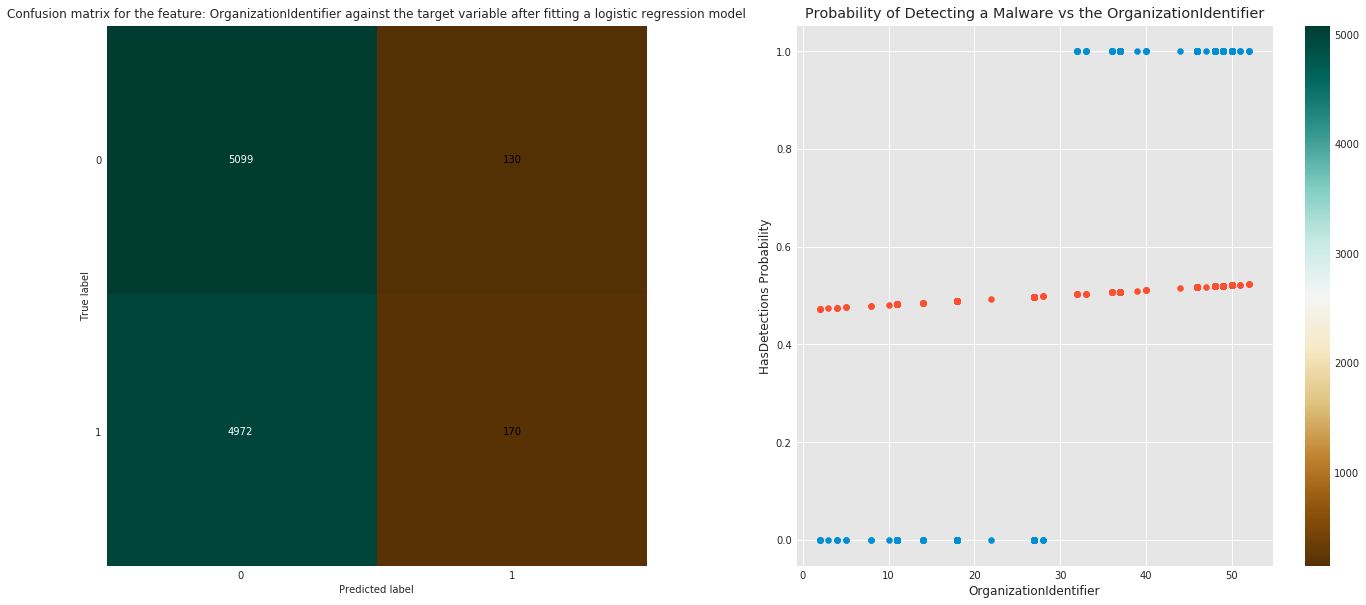

In [65]:
numerical_univariate_and_bivariate_plot("OrganizationIdentifier")
logistic_fit("OrganizationIdentifier")

Top 10 Values counts for the numerical feature GeoNameIdentifier
277.0    2600
211.0     731
53.0      697
89.0      650
167.0     604
240.0     588
35.0      572
276.0     497
267.0     354
126.0     335
Name: GeoNameIdentifier, dtype: int64
Min value 1.0
Max value 295.0
NaN values 1
Number of unique values 185
Mean value inf
Variance value 7896.0

Fitting a logistic regression model for the feature GeoNameIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7546
           1       0.00      0.00      0.00      7453

   micro avg       0.50      0.50      0.50     14999
   macro avg       0.25      0.50      0.33     14999
weighted avg       0.25      0.50      0.34     14999


accuracy score: 0.5031002066804454
F1 score: 0.5031002066804454


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


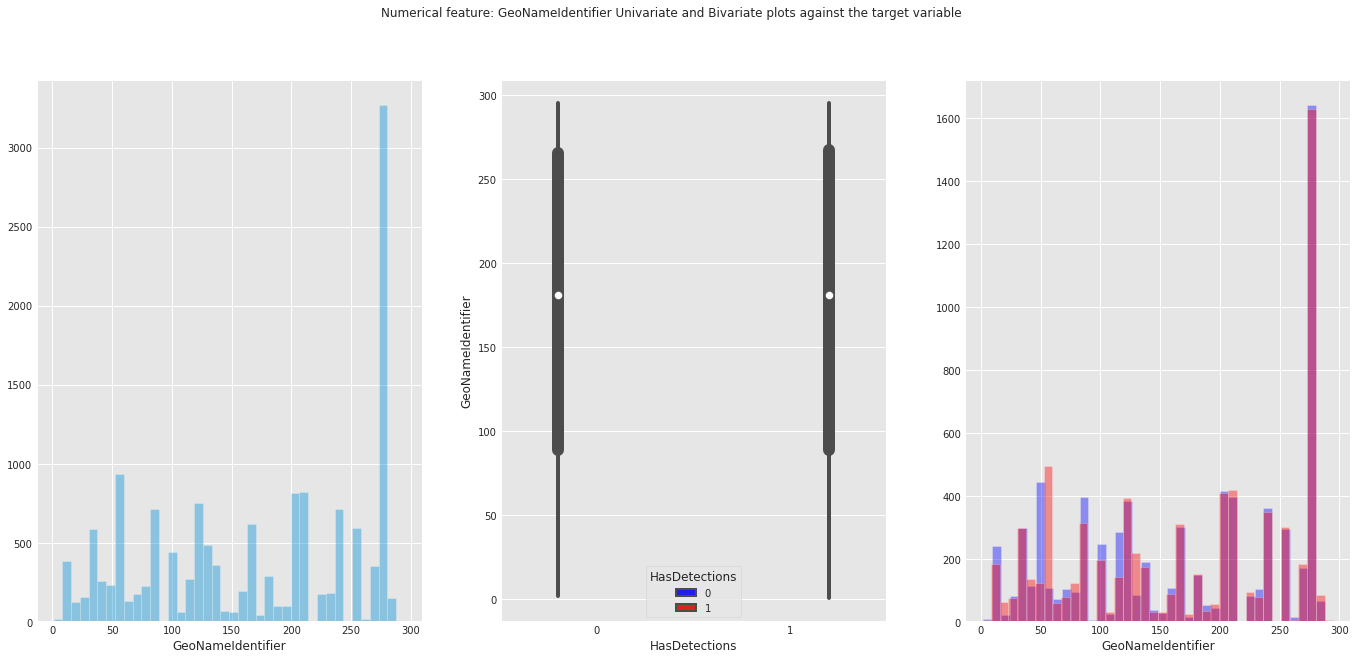

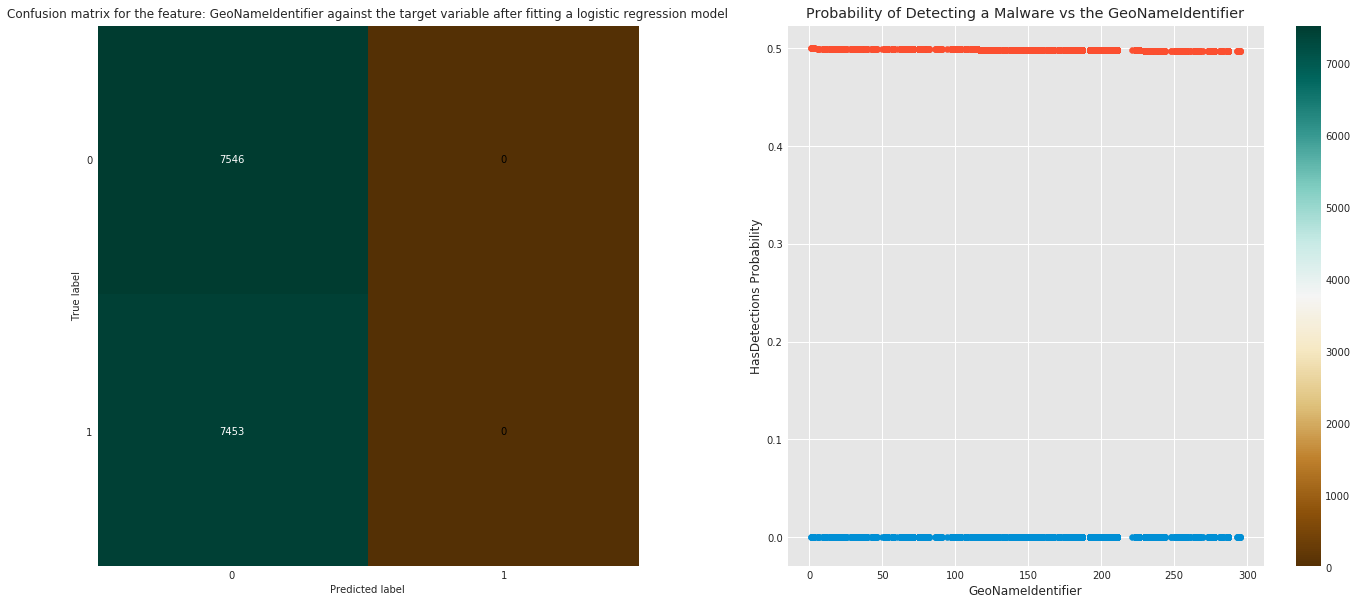

In [66]:
numerical_univariate_and_bivariate_plot("GeoNameIdentifier")
logistic_fit("GeoNameIdentifier")

Top 10 Values counts for the numerical feature LocaleEnglishNameIdentifier
 75     3540
-74      784
 42      700
 74      677
 88      671
-29      584
-23      579
-85      569
-5       347
 124     333
Name: LocaleEnglishNameIdentifier, dtype: int64
Min value -127
Max value 126
NaN values 0
Number of unique values 136
Mean value 27.577466666666666
Variance value 4317.75304911883

Fitting a logistic regression model for the feature LocaleEnglishNameIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.65      0.57      7547
           1       0.50      0.36      0.42      7453

   micro avg       0.51      0.51      0.51     15000
   macro avg       0.51      0.50      0.50     15000
weighted avg       0.51      0.51      0.50     15000


accuracy score: 0.5056
F1 score: 0.5056


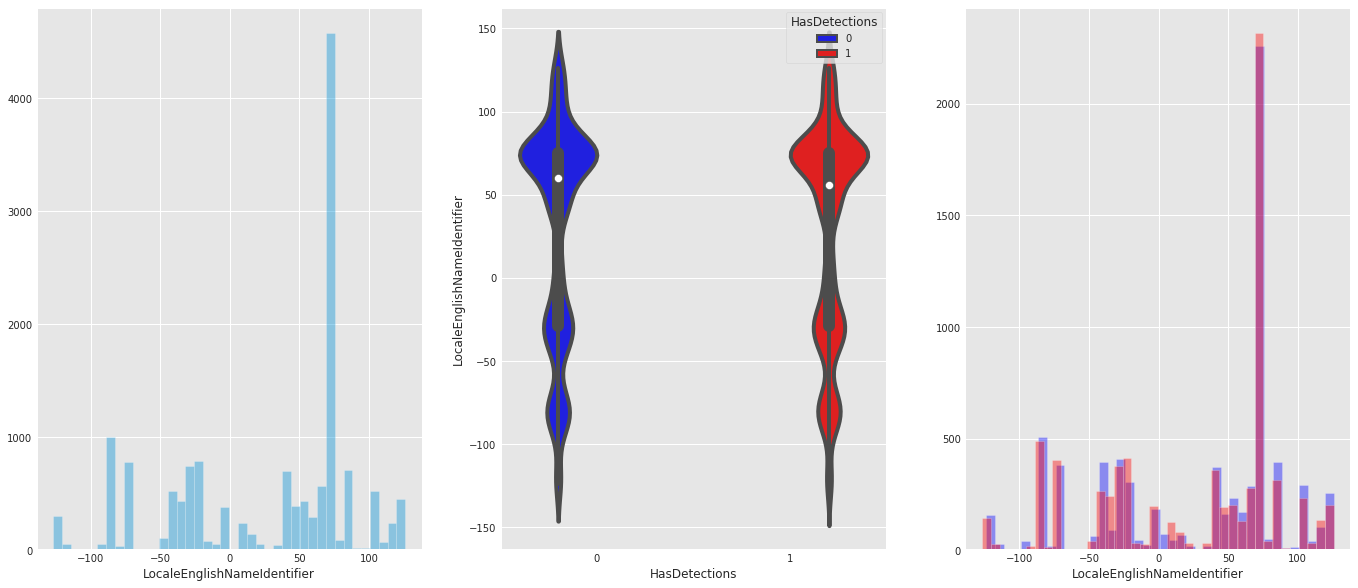

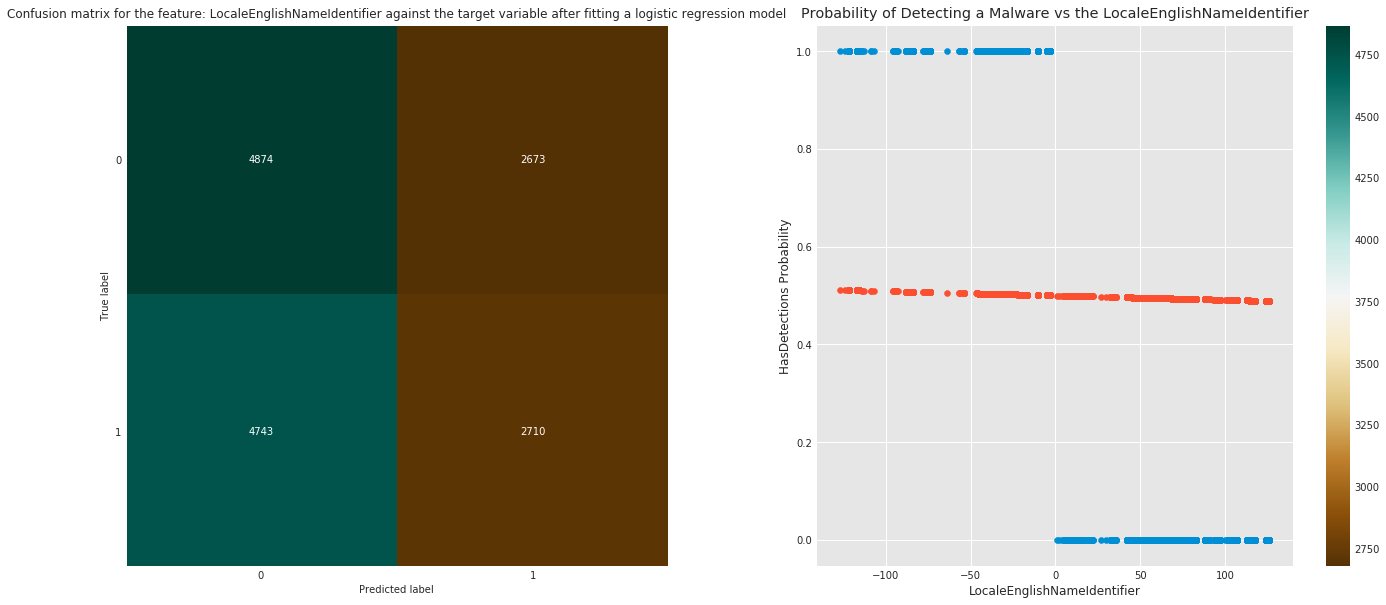

In [67]:
numerical_univariate_and_bivariate_plot("LocaleEnglishNameIdentifier")
logistic_fit("LocaleEnglishNameIdentifier")

Top 10 Values counts for the numerical feature OsBuild
17134    6686
16299    4259
15063    1308
14393    1179
10586     647
10240     422
9600      305
7601      153
17738       7
17741       6
Name: OsBuild, dtype: int64
Min value 7600
Max value 18204
NaN values 0
Number of unique values 24
Mean value 15773.710066666667
Variance value 4599159.315693041

Fitting a logistic regression model for the feature OsBuild against the target variable
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7547
           1       0.00      0.00      0.00      7453

   micro avg       0.50      0.50      0.50     15000
   macro avg       0.25      0.50      0.33     15000
weighted avg       0.25      0.50      0.34     15000


accuracy score: 0.5031333333333333
F1 score: 0.5031333333333333


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


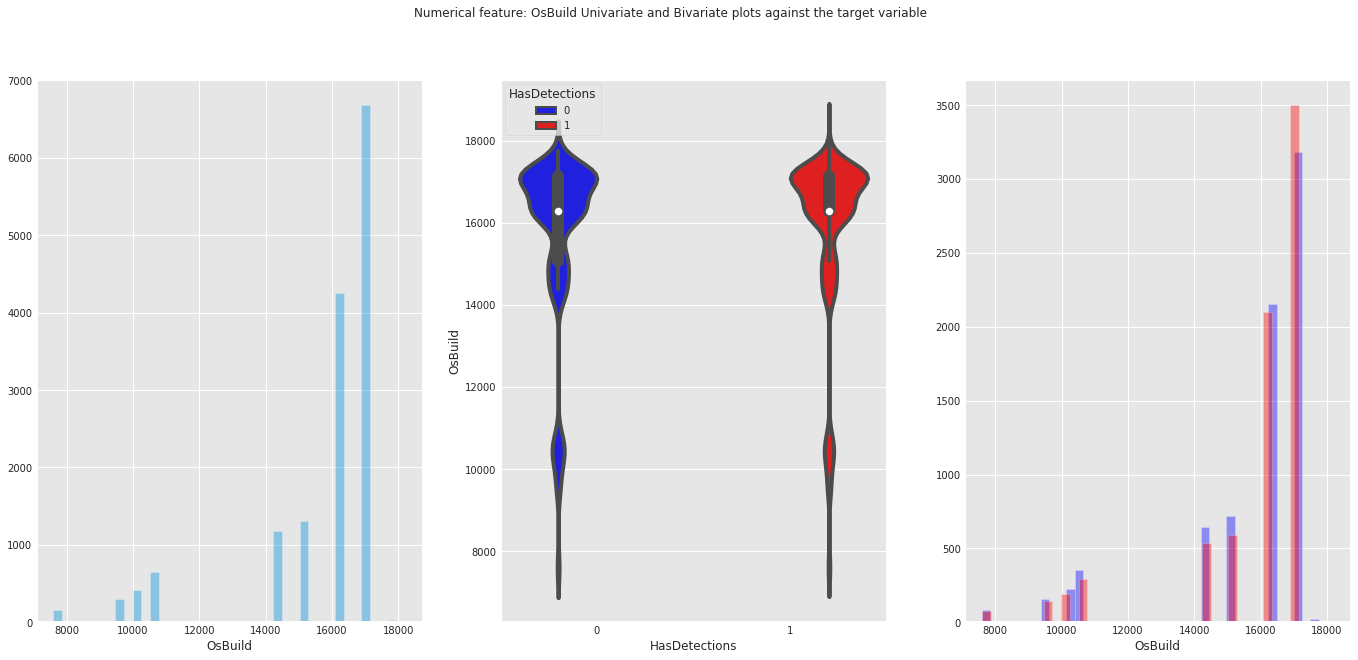

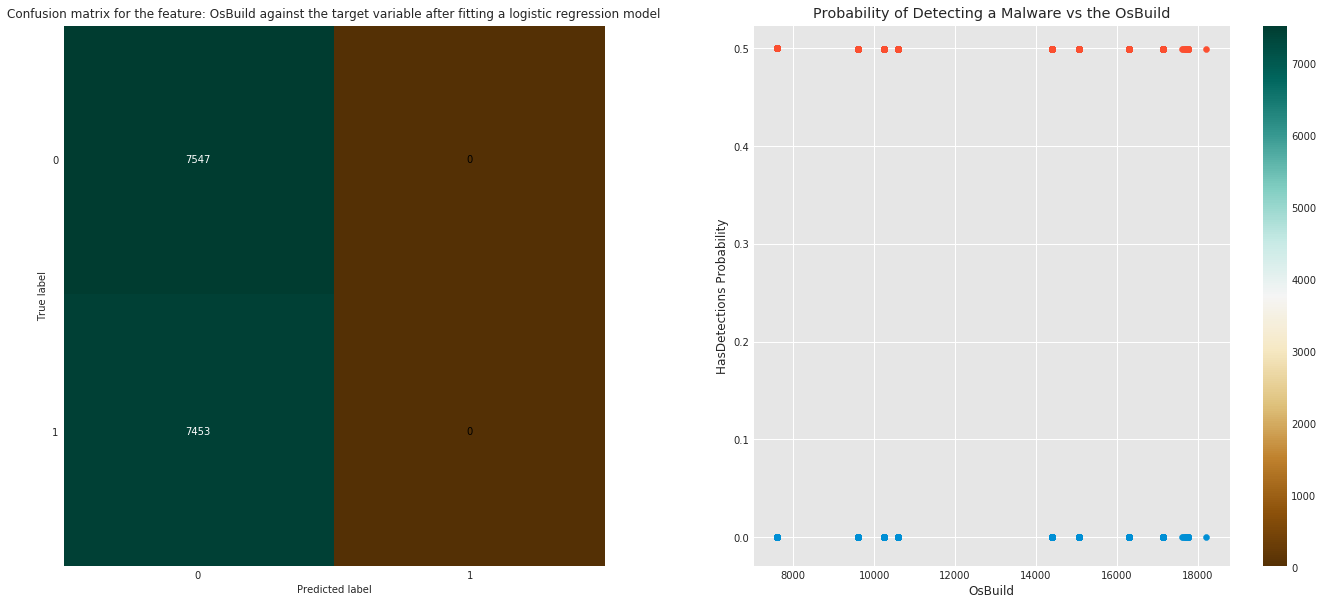

In [68]:
numerical_univariate_and_bivariate_plot("OsBuild")
logistic_fit("OsBuild")

Top 10 Values counts for the numerical feature OsSuite
768    9329
256    5650
272      19
305       1
400       1
Name: OsSuite, dtype: int64
Min value 256
Max value 768
NaN values 0
Number of unique values 5
Mean value 574.463
Variance value 61623.384323288206

Fitting a logistic regression model for the feature OsSuite against the target variable
              precision    recall  f1-score   support

           0       0.51      0.63      0.57      7547
           1       0.51      0.39      0.44      7453

   micro avg       0.51      0.51      0.51     15000
   macro avg       0.51      0.51      0.51     15000
weighted avg       0.51      0.51      0.51     15000


accuracy score: 0.5136
F1 score: 0.5136


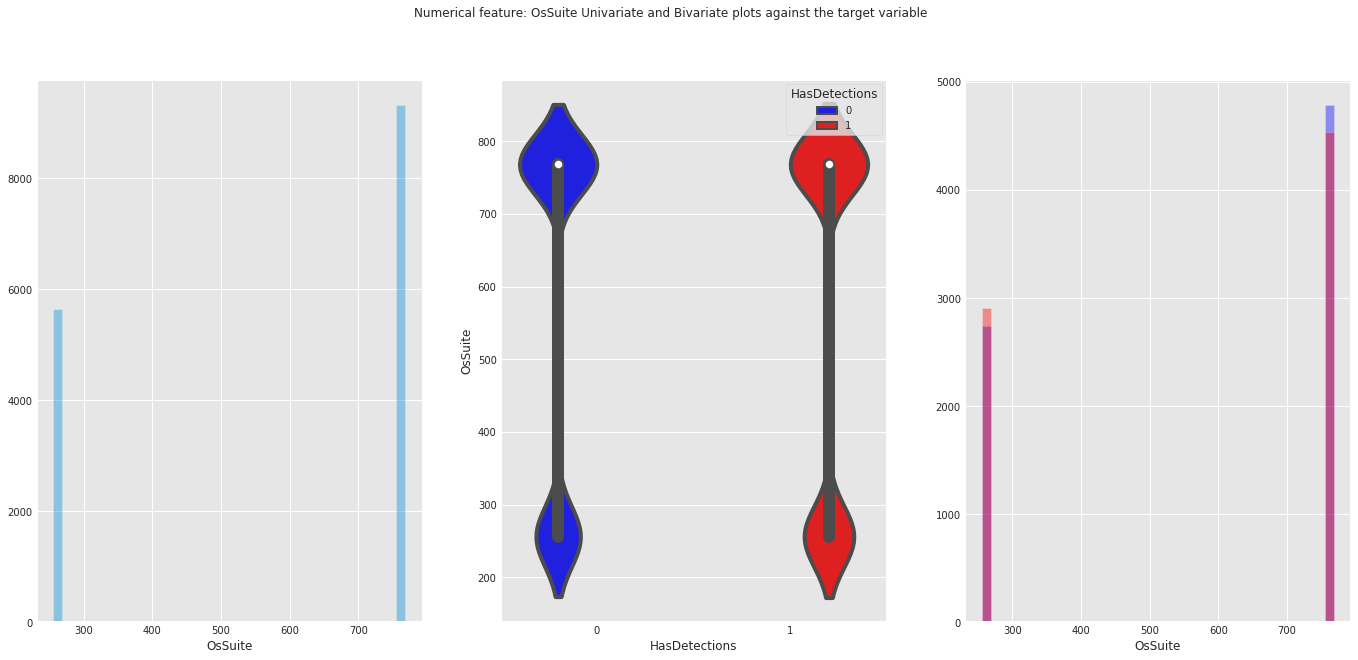

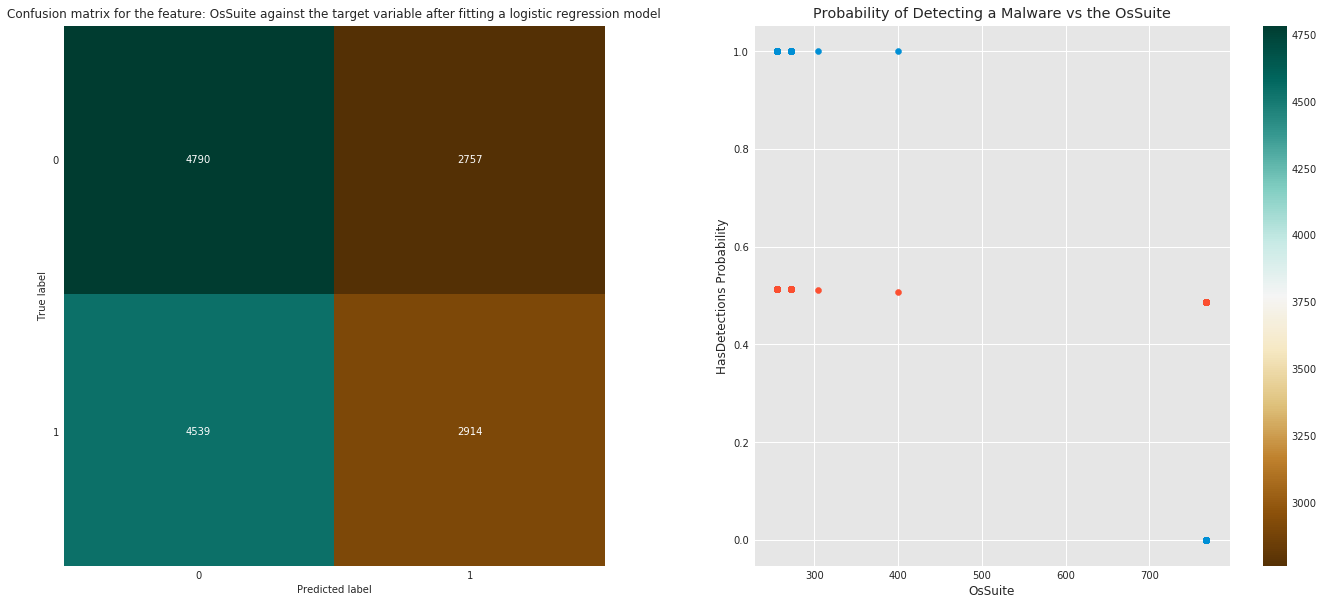

In [69]:
numerical_univariate_and_bivariate_plot("OsSuite")
logistic_fit("OsSuite")

In [70]:
numerical_univariate_and_bivariate_plot("IsProtected")
logistic_fit("IsProtected")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [71]:
numerical_univariate_and_bivariate_plot("AutoSampleOptIn")
logistic_fit("AutoSampleOptIn")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [72]:
numerical_univariate_and_bivariate_plot("SMode")
logistic_fit("SMode")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature IeVerIdentifier
137.0    6626
117.0    3044
111.0     814
108.0     811
98.0      588
135.0     341
53.0      324
74.0      309
94.0      285
105.0     269
Name: IeVerIdentifier, dtype: int64
Min value 41.0
Max value 384.0
NaN values 106
Number of unique values 94
Mean value inf
Variance value inf

Fitting a logistic regression model for the feature IeVerIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      0.97      0.66      7500
           1       0.47      0.03      0.06      7394

   micro avg       0.50      0.50      0.50     14894
   macro avg       0.49      0.50      0.36     14894
weighted avg       0.49      0.50      0.36     14894


accuracy score: 0.501879951658386
F1 score: 0.501879951658386


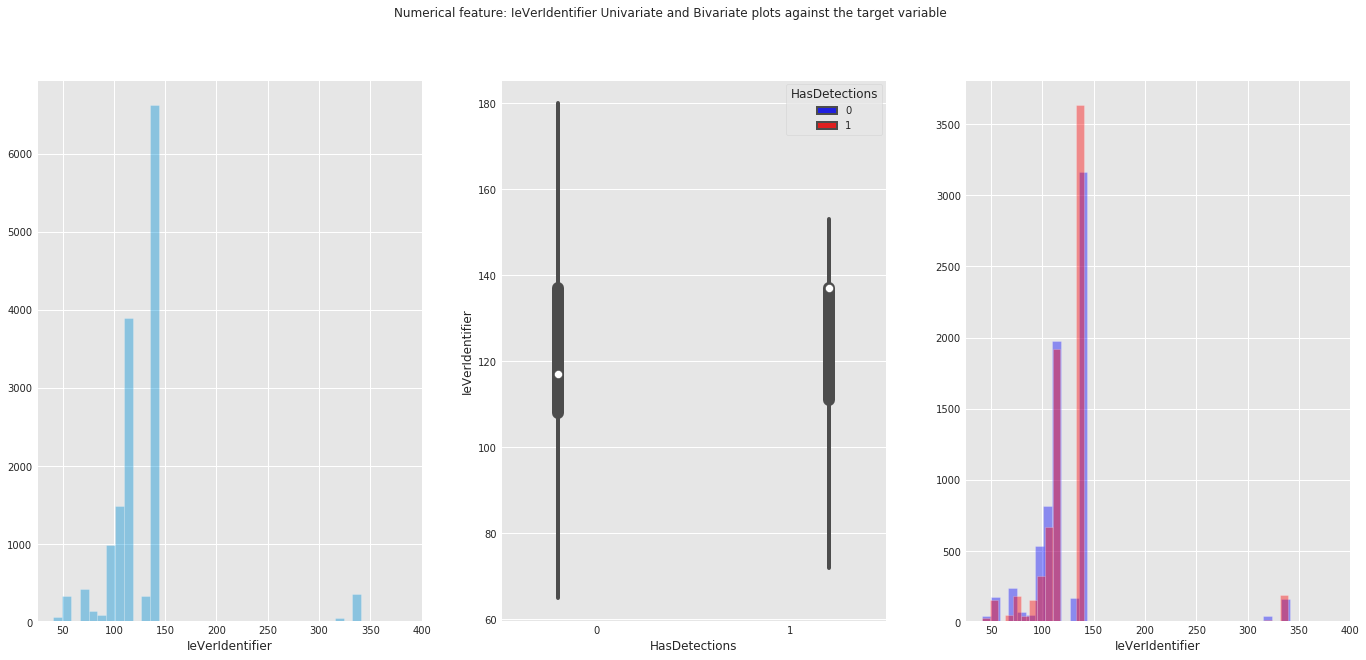

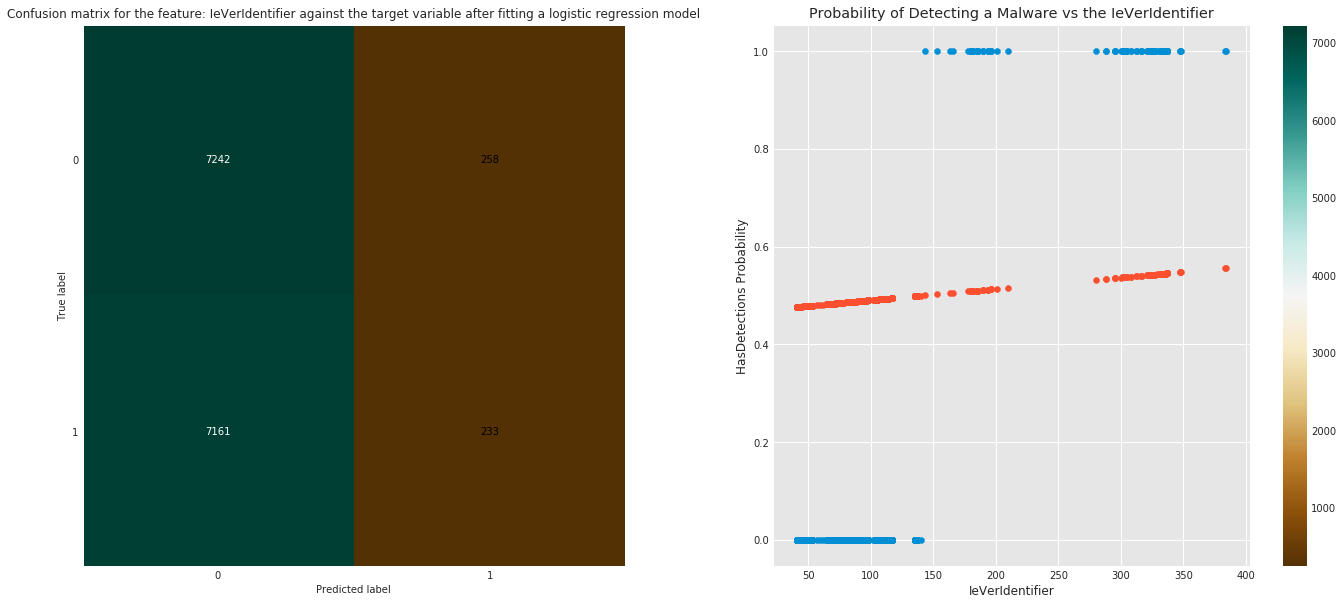

In [73]:
numerical_univariate_and_bivariate_plot("IeVerIdentifier")
logistic_fit("IeVerIdentifier")

In [74]:
numerical_univariate_and_bivariate_plot("Firewall")
logistic_fit("Firewall")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [75]:
numerical_univariate_and_bivariate_plot("UacLuaenable")
logistic_fit("UacLuaenable")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature Census_OEMNameIdentifier
2668.0    2135
2102.0    1746
1443.0    1602
585.0     1499
2206.0    1455
525.0     1433
4588.0     560
4728.0     531
1980.0     499
4144.0     353
Name: Census_OEMNameIdentifier, dtype: int64
Min value 176.0
Max value 6064.0
NaN values 173
Number of unique values 314
Mean value inf
Variance value inf

Fitting a logistic regression model for the feature Census_OEMNameIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.65      0.57      7454
           1       0.51      0.37      0.43      7373

   micro avg       0.51      0.51      0.51     14827
   macro avg       0.51      0.51      0.50     14827
weighted avg       0.51      0.51      0.50     14827


accuracy score: 0.5108248465637013
F1 score: 0.5108248465637013


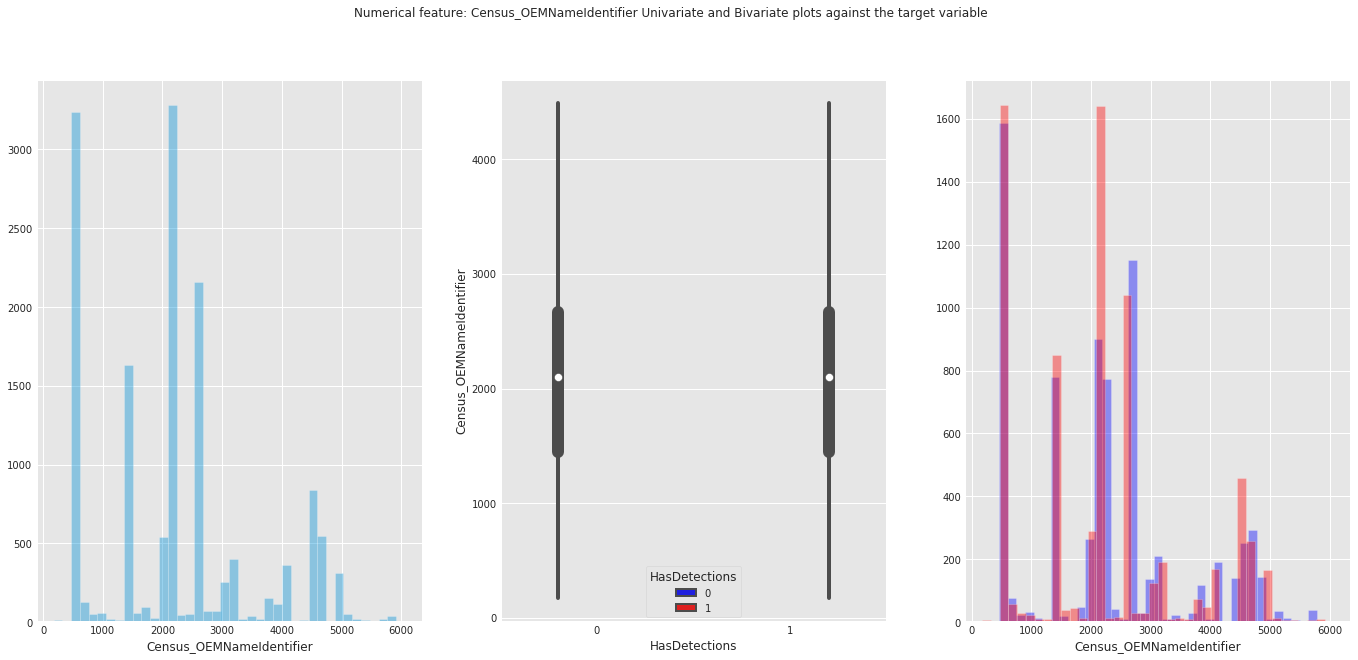

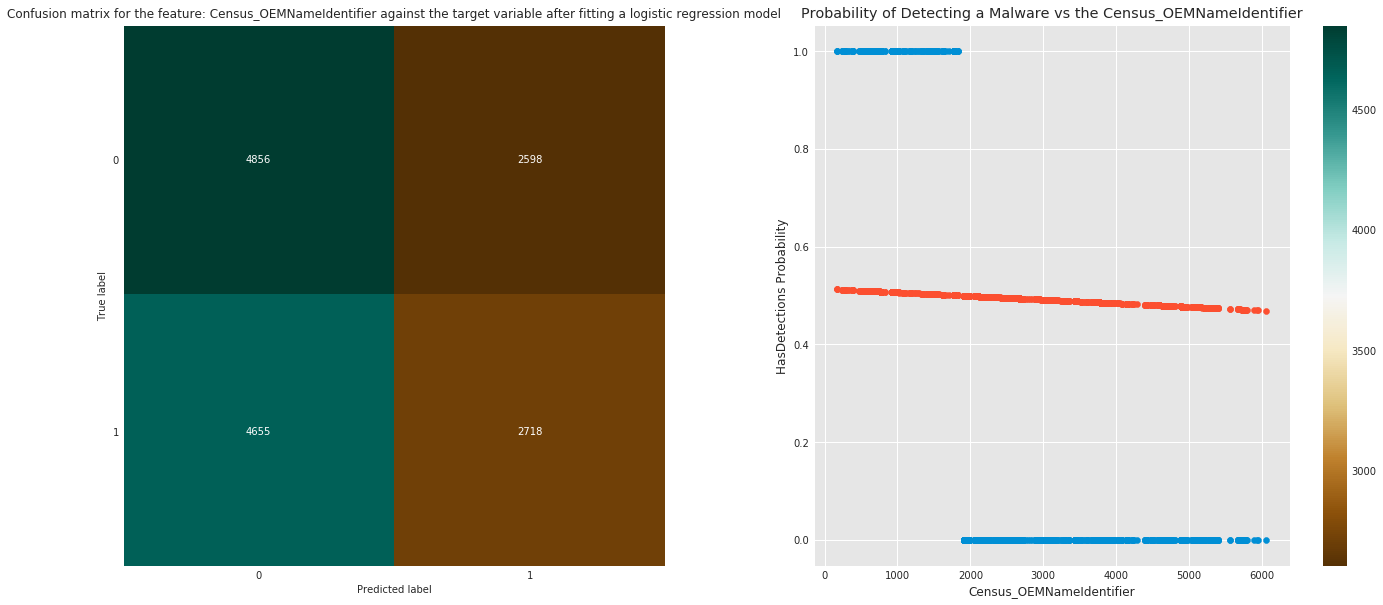

In [76]:
numerical_univariate_and_bivariate_plot("Census_OEMNameIdentifier")
logistic_fit("Census_OEMNameIdentifier")

Top 10 Values counts for the numerical feature Census_OEMModelIdentifier
313586.0    546
242491.0    450
317708.0    214
317701.0    199
188345.0    129
241876.0    128
228975.0    123
245824.0    110
244755.0     78
313507.0     76
Name: Census_OEMModelIdentifier, dtype: int64
Min value 156.0
Max value 345307.0
NaN values 190
Number of unique values 5182
Mean value 239732.0625
Variance value 5193734656.0

Fitting a logistic regression model for the feature Census_OEMModelIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7443
           1       0.00      0.00      0.00      7367

   micro avg       0.50      0.50      0.50     14810
   macro avg       0.25      0.50      0.33     14810
weighted avg       0.25      0.50      0.34     14810


accuracy score: 0.5025658338960162
F1 score: 0.5025658338960162


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


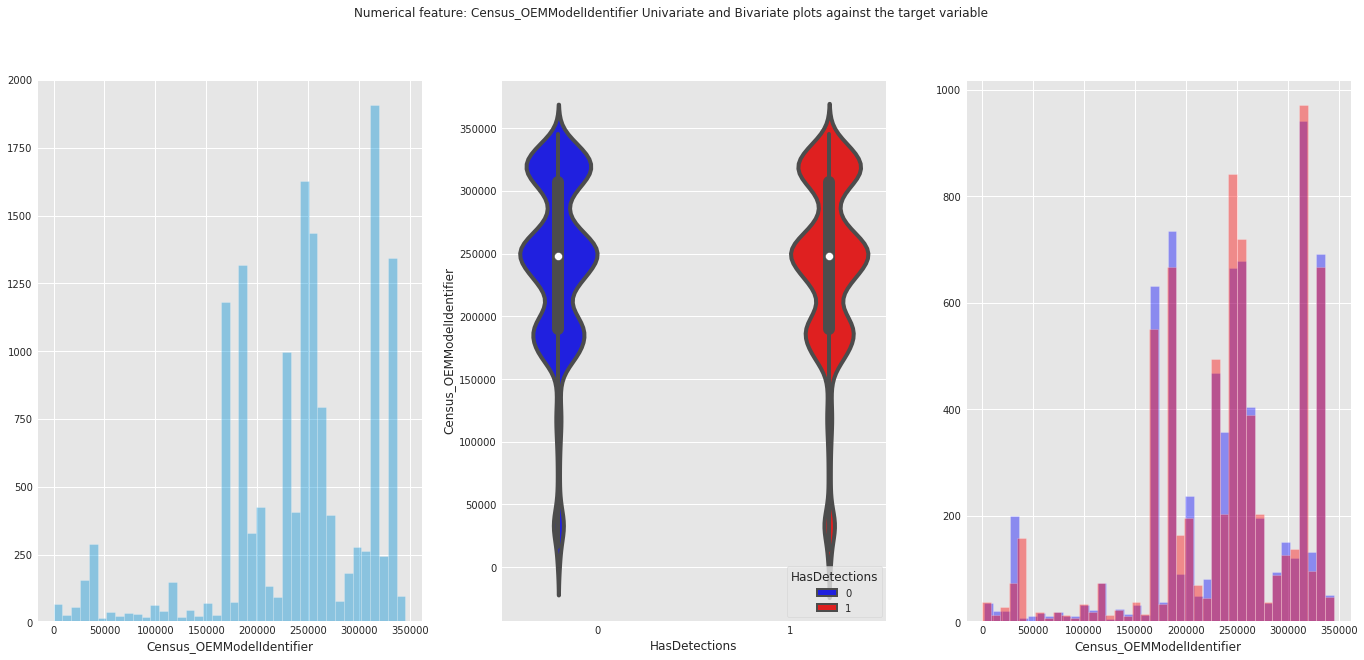

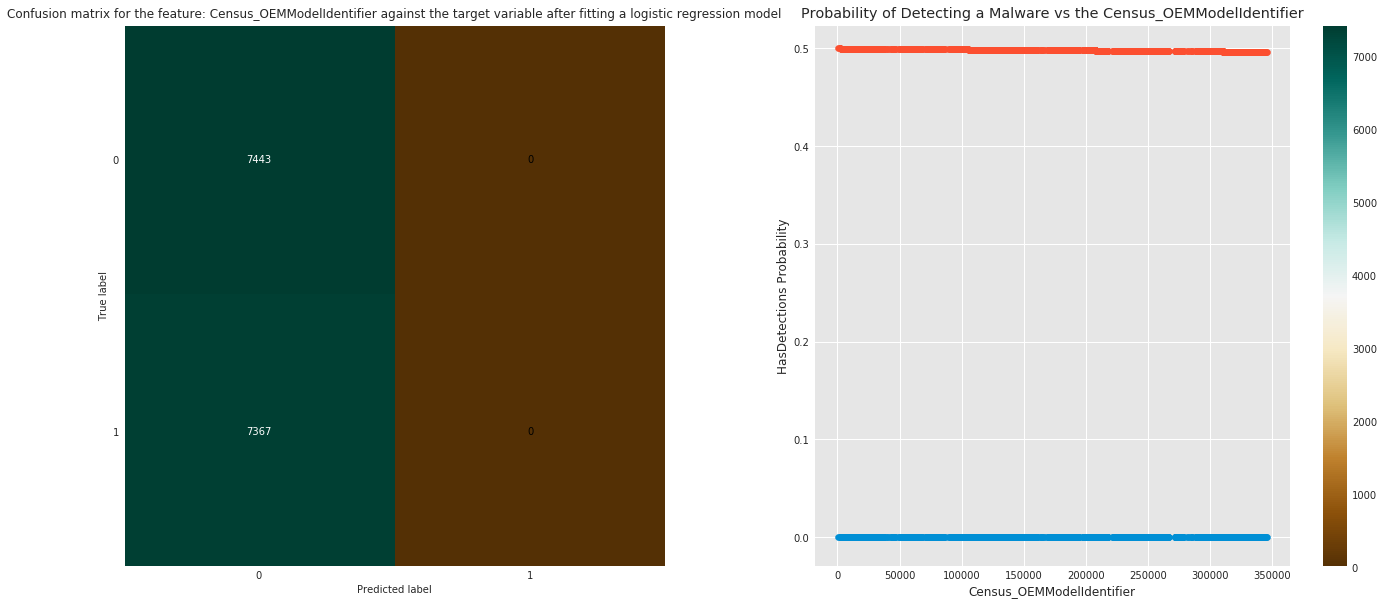

In [77]:
numerical_univariate_and_bivariate_plot("Census_OEMModelIdentifier")
logistic_fit("Census_OEMModelIdentifier")

Top 10 Values counts for the numerical feature Census_ProcessorCoreCount
4.0     9124
2.0     3799
8.0     1509
12.0     179
6.0      130
1.0      112
16.0      29
3.0       19
24.0       6
20.0       3
Name: Census_ProcessorCoreCount, dtype: int64
Min value 1.0
Max value 40.0
NaN values 84
Number of unique values 13
Mean value 4.027
Variance value 4.332

Fitting a logistic regression model for the feature Census_ProcessorCoreCount against the target variable
              precision    recall  f1-score   support

           0       0.51      0.89      0.65      7511
           1       0.56      0.14      0.23      7405

   micro avg       0.52      0.52      0.52     14916
   macro avg       0.54      0.52      0.44     14916
weighted avg       0.54      0.52      0.44     14916


accuracy score: 0.5187047465808527
F1 score: 0.5187047465808527


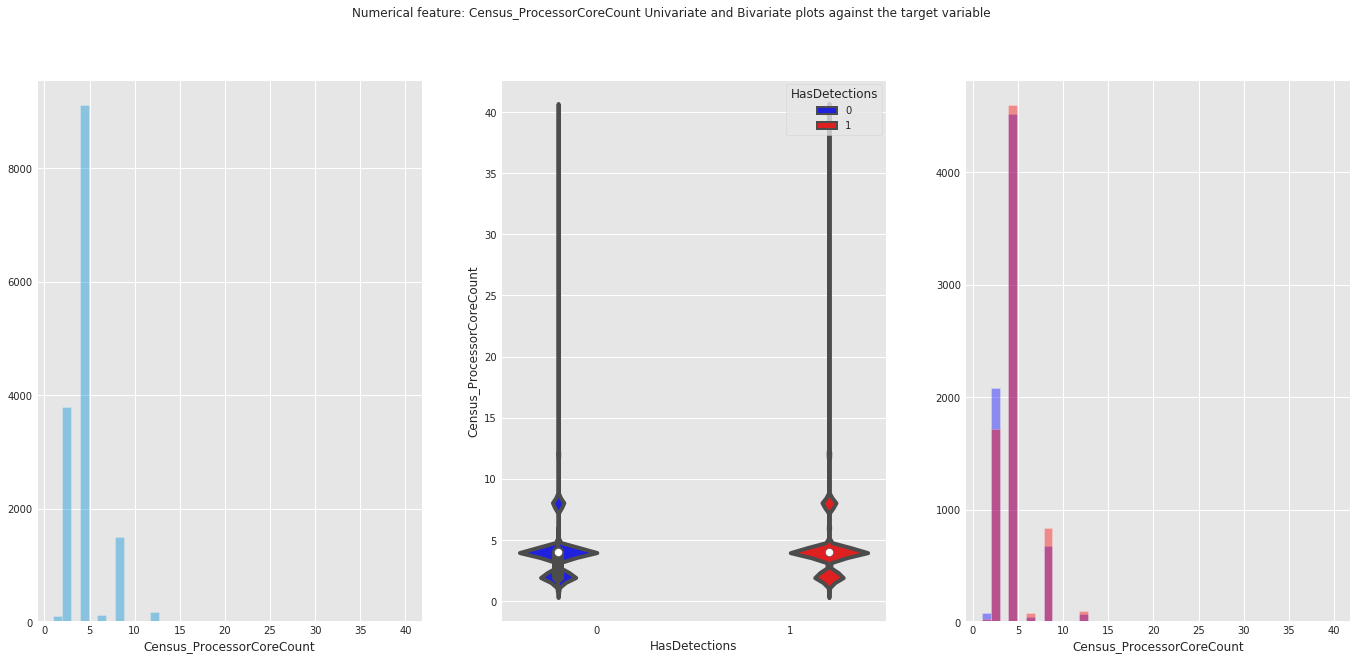

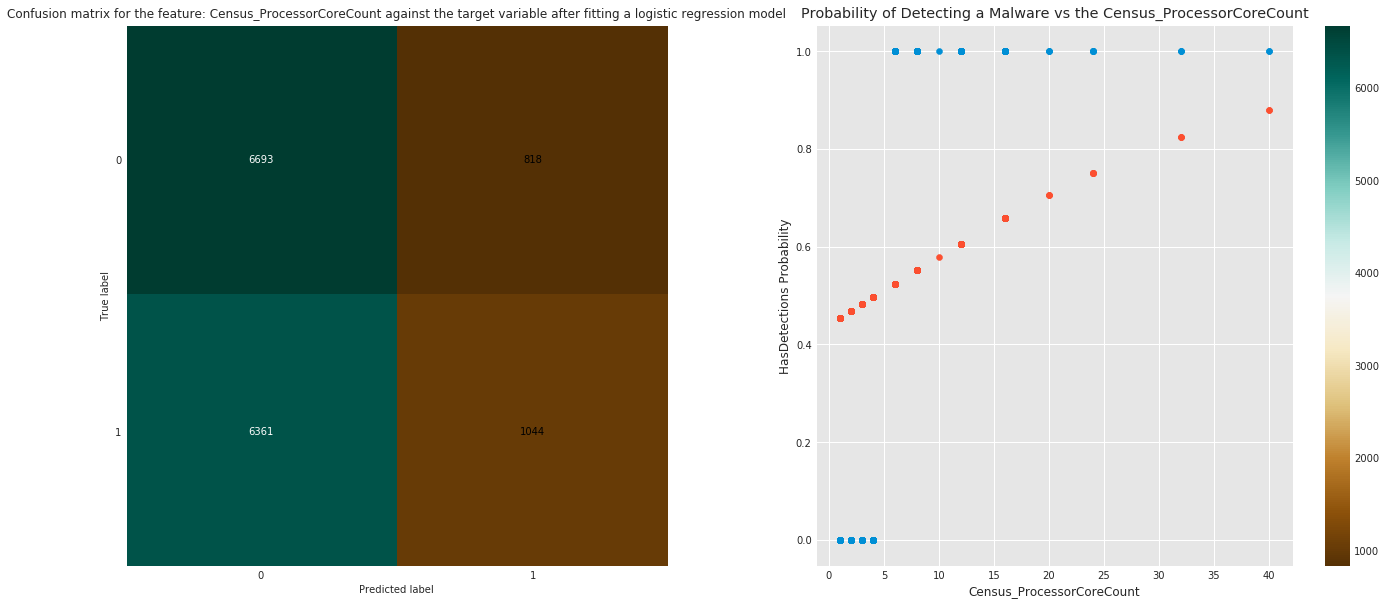

In [78]:
numerical_univariate_and_bivariate_plot("Census_ProcessorCoreCount")
logistic_fit("Census_ProcessorCoreCount")

Top 10 Values counts for the numerical feature Census_ProcessorManufacturerIdentifier
5.0    13186
1.0     1730
Name: Census_ProcessorManufacturerIdentifier, dtype: int64
Min value 1.0
Max value 5.0
NaN values 84
Number of unique values 2
Mean value inf
Variance value 1.641

Fitting a logistic regression model for the feature Census_ProcessorManufacturerIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7511
           1       0.00      0.00      0.00      7405

   micro avg       0.50      0.50      0.50     14916
   macro avg       0.25      0.50      0.33     14916
weighted avg       0.25      0.50      0.34     14916


accuracy score: 0.5035532314293376
F1 score: 0.5035532314293376


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


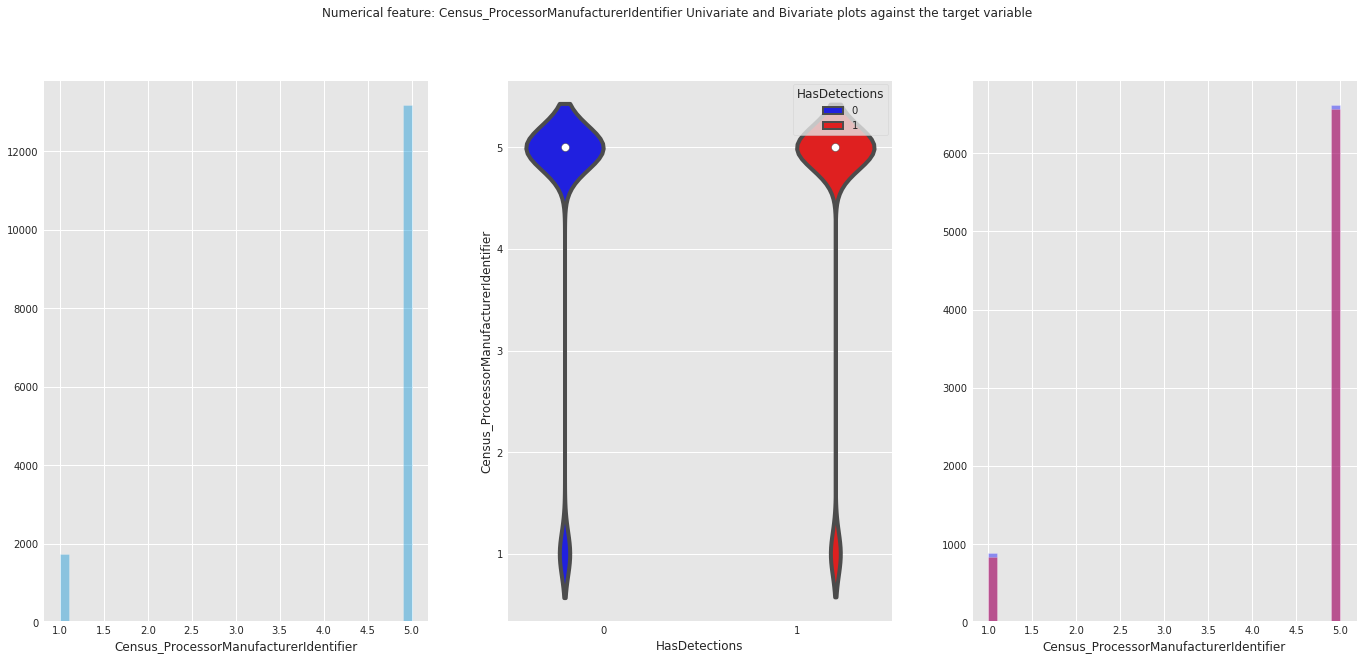

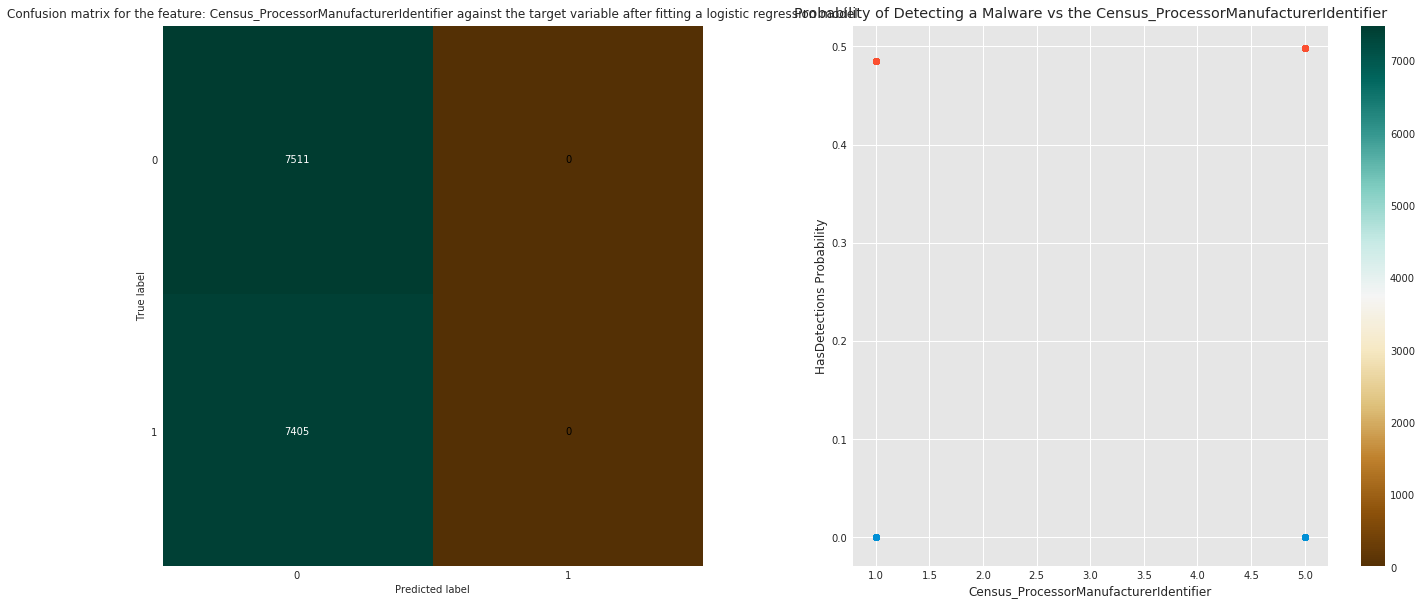

In [79]:
numerical_univariate_and_bivariate_plot("Census_ProcessorManufacturerIdentifier")
logistic_fit("Census_ProcessorManufacturerIdentifier")

Top 10 Values counts for the numerical feature Census_ProcessorModelIdentifier
2696.0    490
1998.0    485
2660.0    318
2382.0    303
1992.0    275
2372.0    271
2640.0    255
1916.0    220
2524.0    220
2736.0    218
Name: Census_ProcessorModelIdentifier, dtype: int64
Min value 19.0
Max value 4410.0
NaN values 84
Number of unique values 885
Mean value inf
Variance value inf

Fitting a logistic regression model for the feature Census_ProcessorModelIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.52      0.59      0.55      7511
           1       0.52      0.46      0.49      7405

   micro avg       0.52      0.52      0.52     14916
   macro avg       0.52      0.52      0.52     14916
weighted avg       0.52      0.52      0.52     14916


accuracy score: 0.5226602306248324
F1 score: 0.5226602306248324


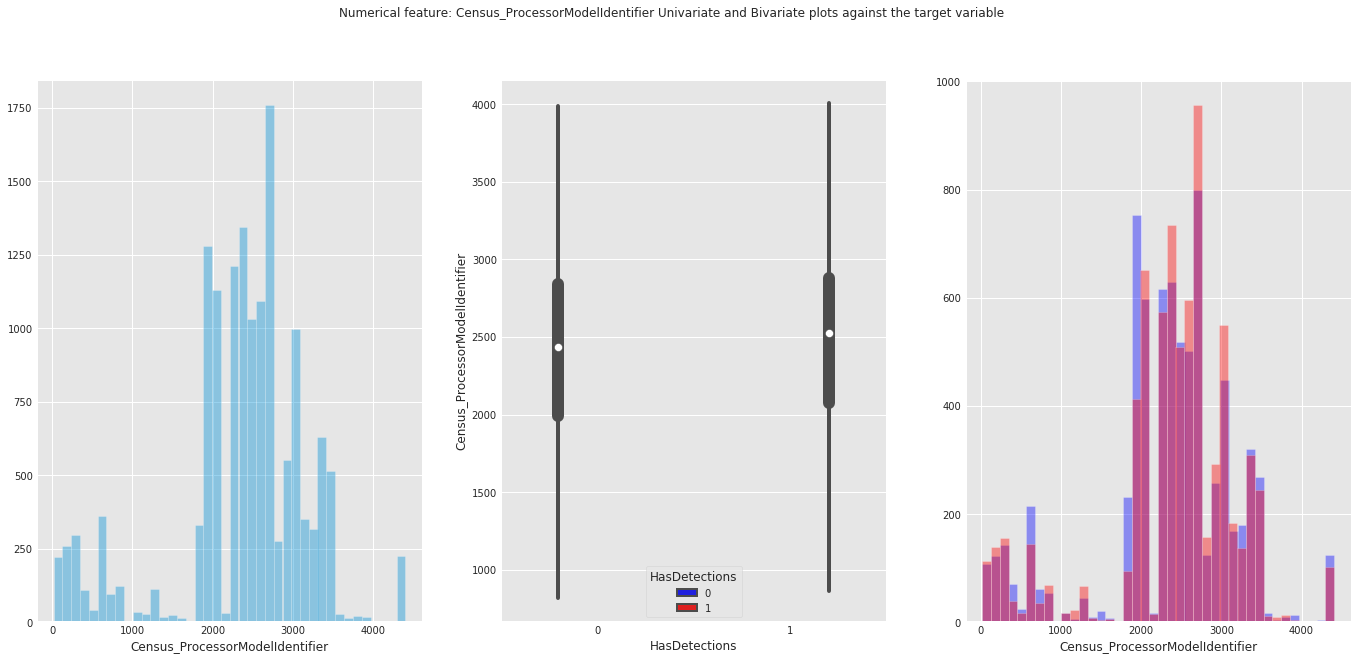

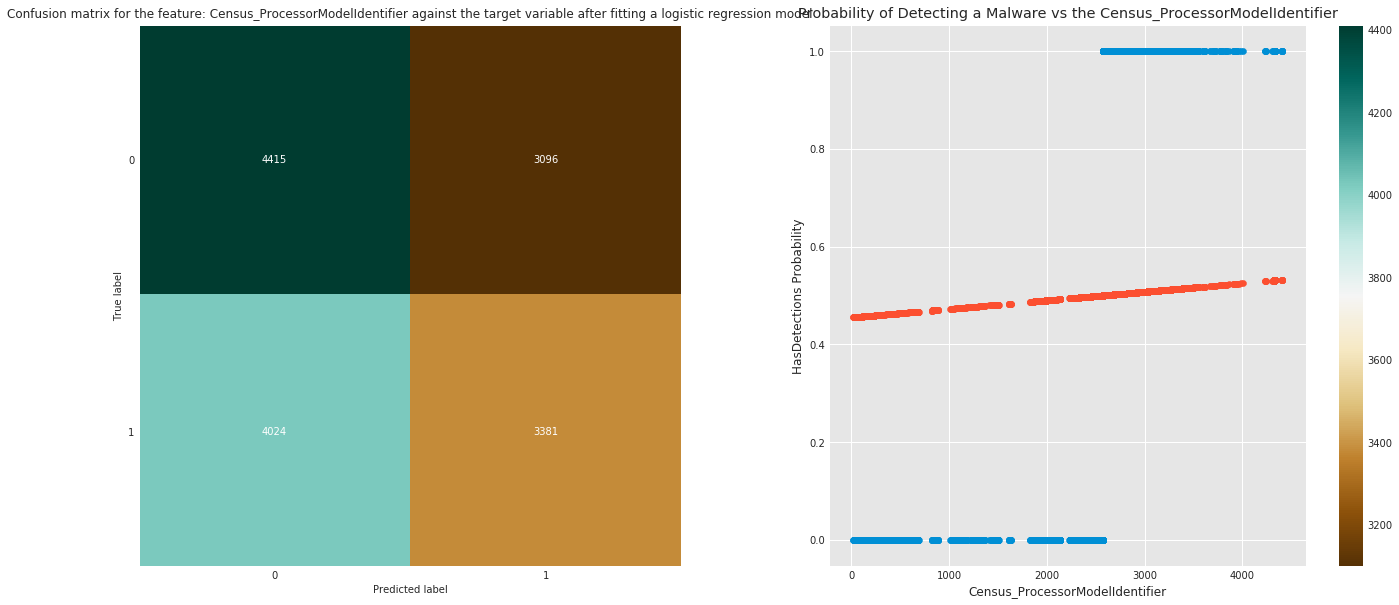

In [80]:
numerical_univariate_and_bivariate_plot("Census_ProcessorModelIdentifier")
logistic_fit("Census_ProcessorModelIdentifier")

Top 10 Values counts for the numerical feature Census_PrimaryDiskTotalCapacity
476940.0    4782
953869.0    3615
122104.0     811
244198.0     802
305245.0     778
29820.0      517
238475.0     478
715404.0     440
114473.0     437
228936.0     307
Name: Census_PrimaryDiskTotalCapacity, dtype: int64
Min value 14800.0
Max value 3815447.0
NaN values 96
Number of unique values 183
Mean value 511377.9375
Variance value 124990251008.0

Fitting a logistic regression model for the feature Census_PrimaryDiskTotalCapacity against the target variable
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7503
           1       0.50      1.00      0.66      7401

   micro avg       0.50      0.50      0.50     14904
   macro avg       0.25      0.50      0.33     14904
weighted avg       0.25      0.50      0.33     14904


accuracy score: 0.4965780998389694
F1 score: 0.4965780998389694


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


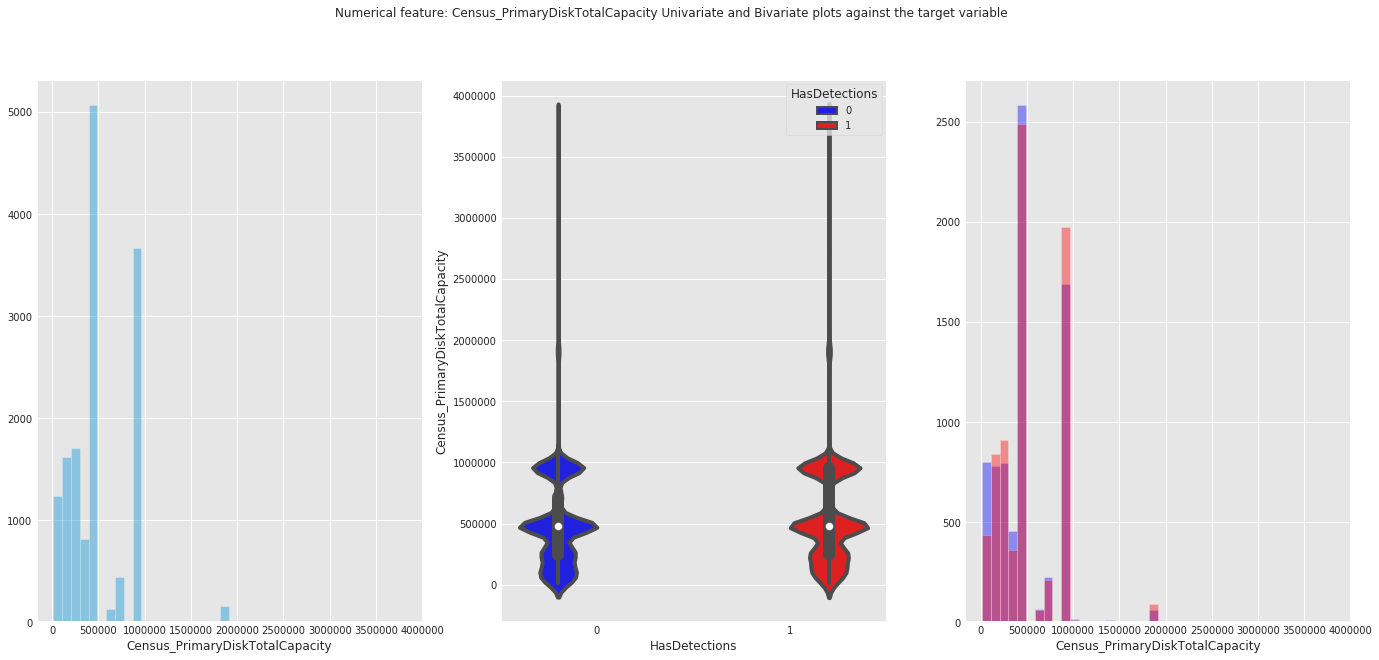

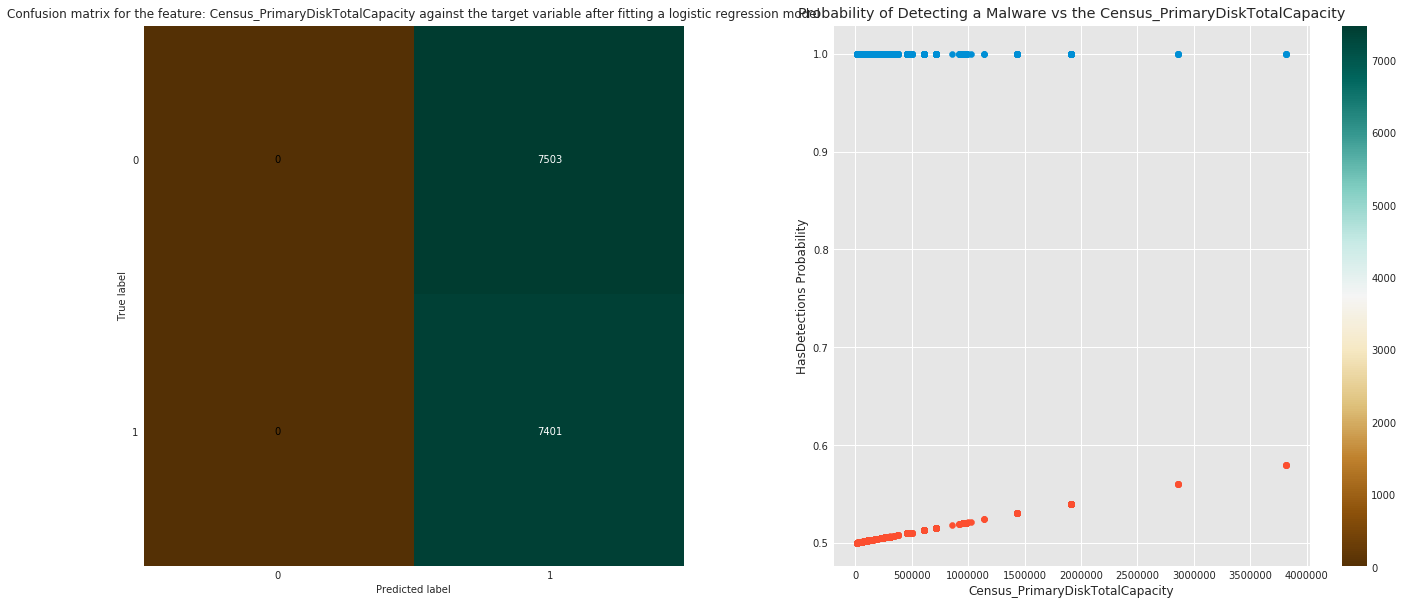

In [81]:
numerical_univariate_and_bivariate_plot("Census_PrimaryDiskTotalCapacity")
logistic_fit("Census_PrimaryDiskTotalCapacity")

Top 10 Values counts for the numerical feature Census_SystemVolumeTotalCapacity
926992.0    78
102400.0    71
953253.0    69
28558.0     68
475799.0    65
28542.0     64
952728.0    63
476389.0    62
476438.0    61
476324.0    58
Name: Census_SystemVolumeTotalCapacity, dtype: int64
Min value 11626.0
Max value 3814880.0
NaN values 96
Number of unique values 9434
Mean value 378467.4375
Variance value 105052749824.0

Fitting a logistic regression model for the feature Census_SystemVolumeTotalCapacity against the target variable
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7503
           1       0.50      1.00      0.66      7401

   micro avg       0.50      0.50      0.50     14904
   macro avg       0.25      0.50      0.33     14904
weighted avg       0.25      0.50      0.33     14904


accuracy score: 0.4965780998389694
F1 score: 0.4965780998389694


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


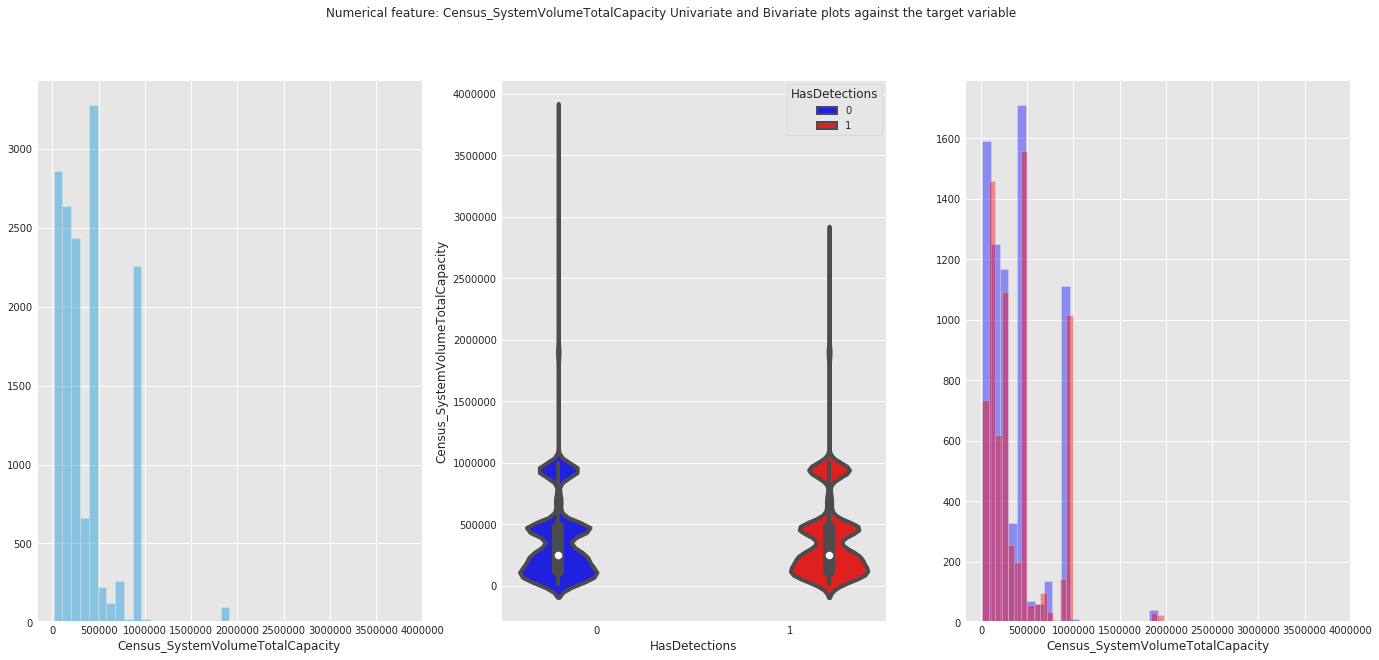

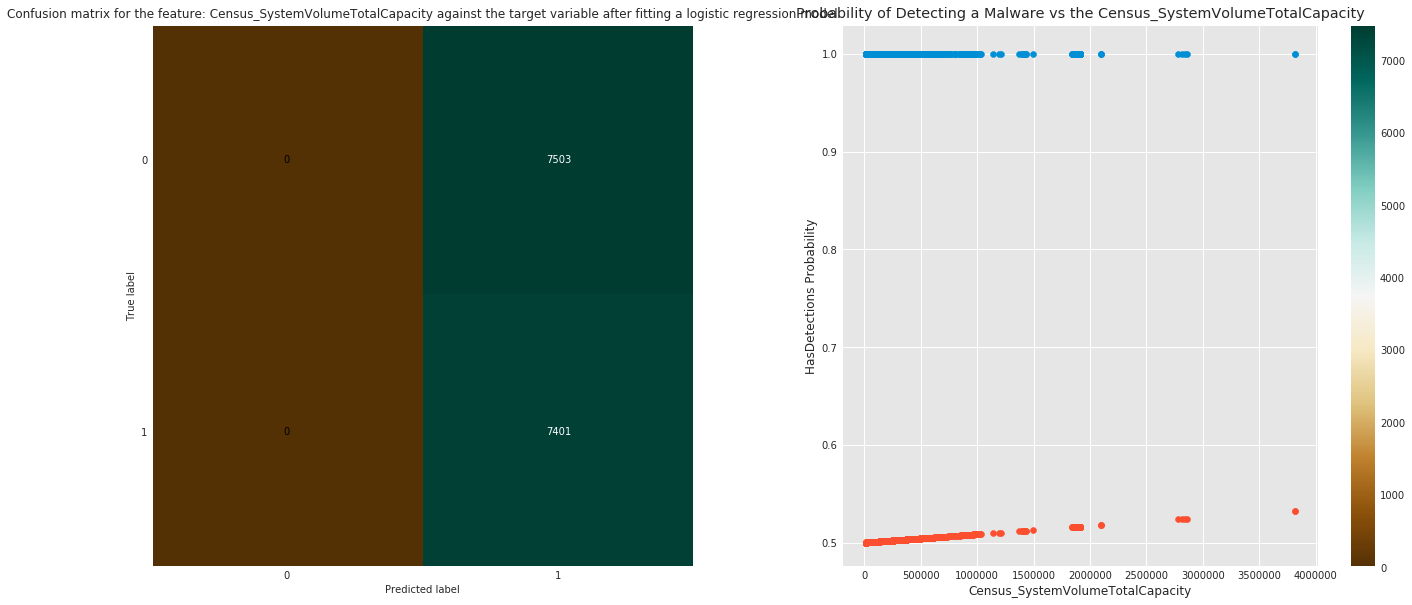

In [82]:
numerical_univariate_and_bivariate_plot("Census_SystemVolumeTotalCapacity")
logistic_fit("Census_SystemVolumeTotalCapacity")

In [83]:
numerical_univariate_and_bivariate_plot("Census_HasOpticalDiskDrive")
logistic_fit("Census_HasOpticalDiskDrive")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature Census_TotalPhysicalRAM
4096.0     6908
8192.0     3701
2048.0     1766
16384.0     943
6144.0      677
12288.0     284
3072.0      228
1024.0      110
32768.0     107
10240.0      23
Name: Census_TotalPhysicalRAM, dtype: int64
Min value 1014.0
Max value 524288.0
NaN values 137
Number of unique values 53
Mean value 6210.2822265625
Variance value 40561632.0

Fitting a logistic regression model for the feature Census_TotalPhysicalRAM against the target variable
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7474
           1       0.50      1.00      0.66      7389

   micro avg       0.50      0.50      0.50     14863
   macro avg       0.25      0.50      0.33     14863
weighted avg       0.25      0.50      0.33     14863


accuracy score: 0.49714055035995425
F1 score: 0.49714055035995425


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


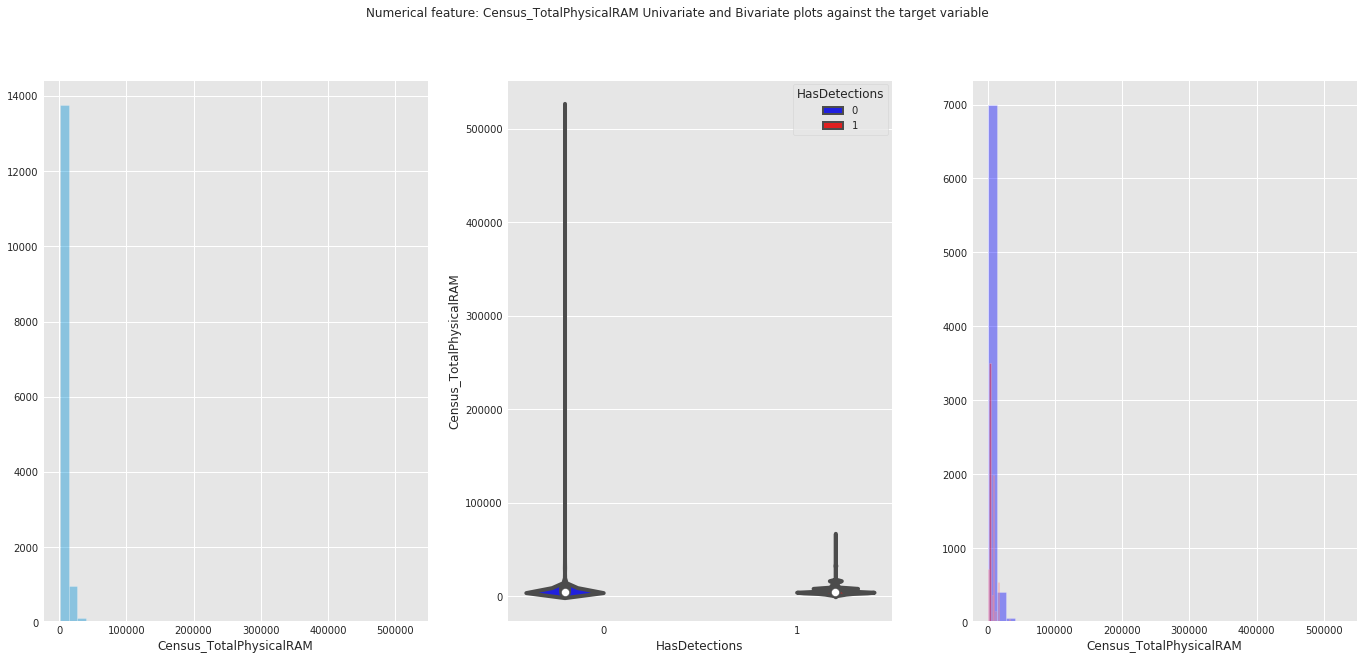

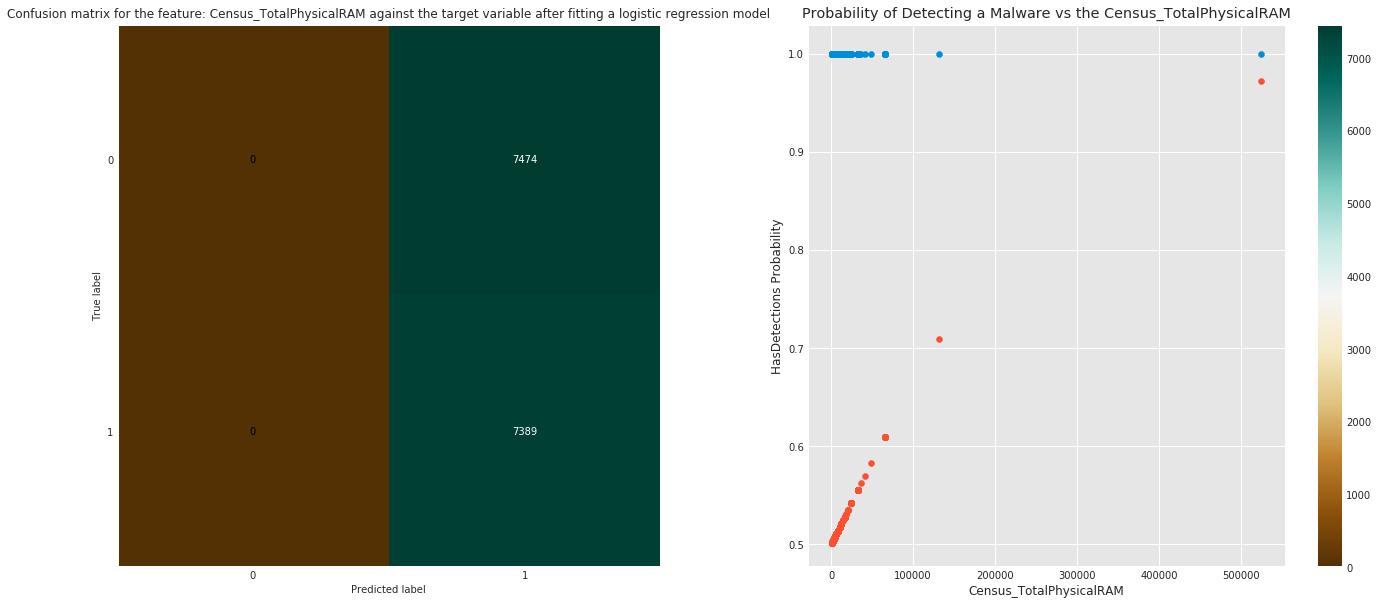

In [84]:
numerical_univariate_and_bivariate_plot("Census_TotalPhysicalRAM")
logistic_fit("Census_TotalPhysicalRAM")

Top 10 Values counts for the numerical feature Census_InternalPrimaryDiagonalDisplaySizeInInches
15.500000    5074
13.898438    1612
14.000000     898
11.601562     540
21.500000     464
13.296875     414
13.203125     373
18.500000     362
23.000000     331
15.601562     321
Name: Census_InternalPrimaryDiagonalDisplaySizeInInches, dtype: int64
Min value 5.5
Max value 98.2
NaN values 75
Number of unique values 227
Mean value inf
Variance value 35.4

Fitting a logistic regression model for the feature Census_InternalPrimaryDiagonalDisplaySizeInInches against the target variable
              precision    recall  f1-score   support

           0       0.51      0.79      0.62      7506
           1       0.53      0.24      0.33      7419

   micro avg       0.52      0.52      0.52     14925
   macro avg       0.52      0.52      0.48     14925
weighted avg       0.52      0.52      0.48     14925


accuracy score: 0.5168509212730318
F1 score: 0.5168509212730318


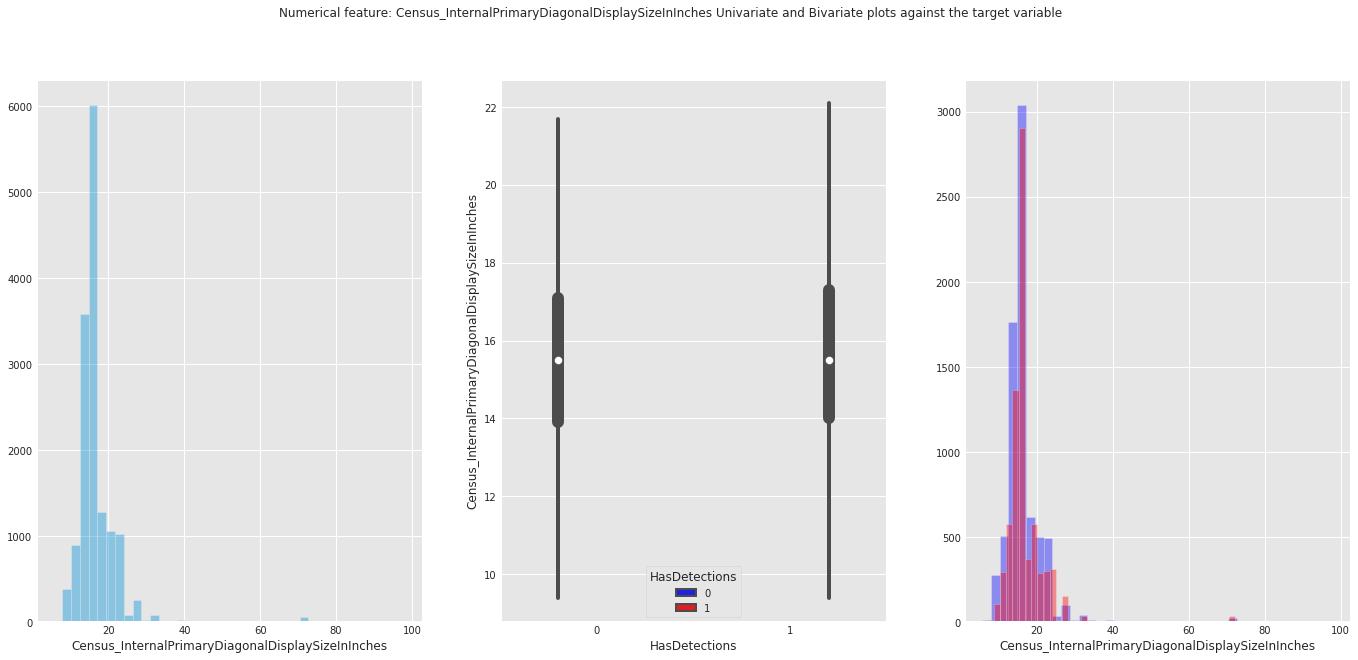

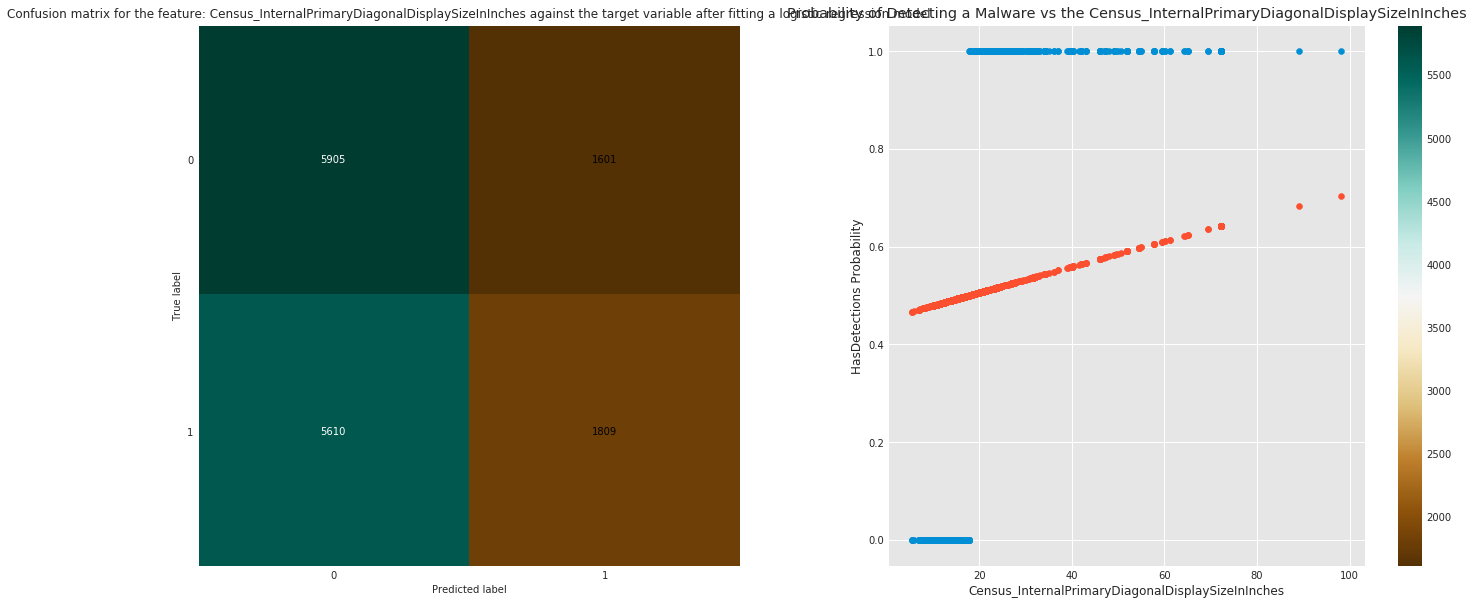

In [85]:
numerical_univariate_and_bivariate_plot("Census_InternalPrimaryDiagonalDisplaySizeInInches")
logistic_fit("Census_InternalPrimaryDiagonalDisplaySizeInInches")

Top 10 Values counts for the numerical feature Census_InternalPrimaryDisplayResolutionHorizontal
1366.0    7551
1920.0    3839
1600.0     835
1280.0     776
1024.0     625
1440.0     278
1360.0     196
1680.0     178
2560.0     126
2736.0     113
Name: Census_InternalPrimaryDisplayResolutionHorizontal, dtype: int64
Min value 640.0
Max value 5120.0
NaN values 75
Number of unique values 64
Mean value inf
Variance value inf

Fitting a logistic regression model for the feature Census_InternalPrimaryDisplayResolutionHorizontal against the target variable
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7506
           1       0.50      1.00      0.66      7419

   micro avg       0.50      0.50      0.50     14925
   macro avg       0.25      0.50      0.33     14925
weighted avg       0.25      0.50      0.33     14925


accuracy score: 0.4970854271356784
F1 score: 0.4970854271356784


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


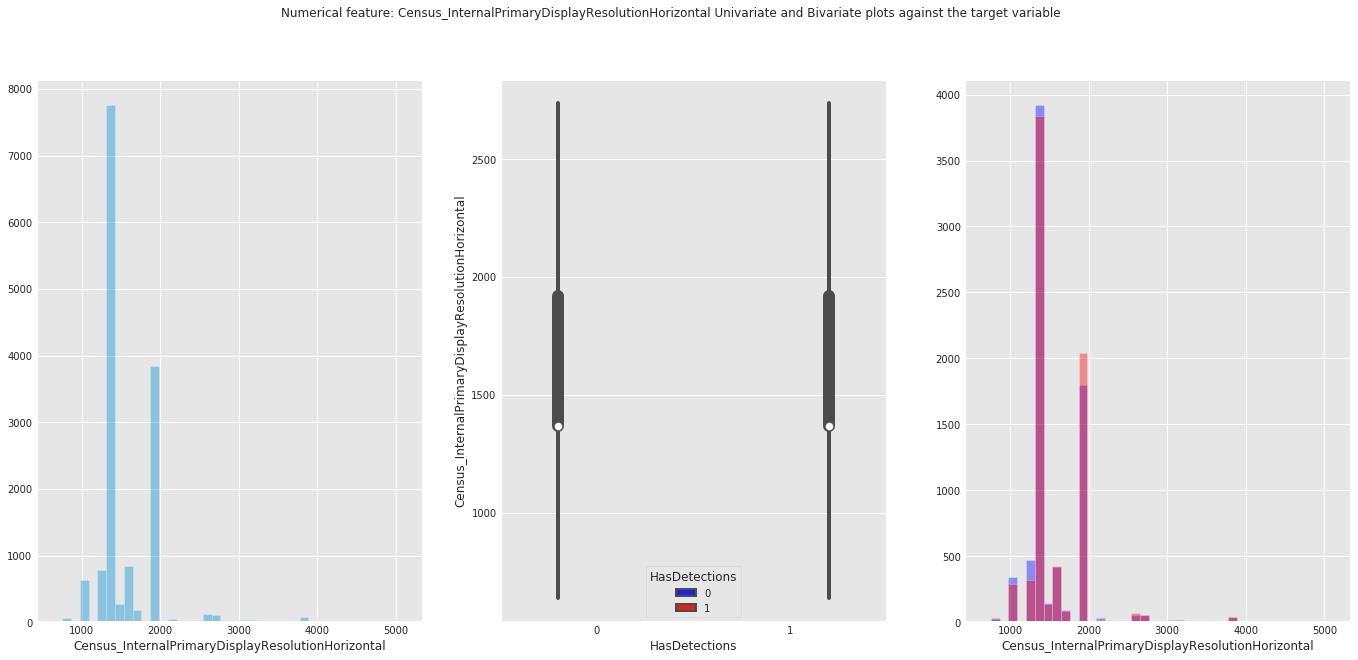

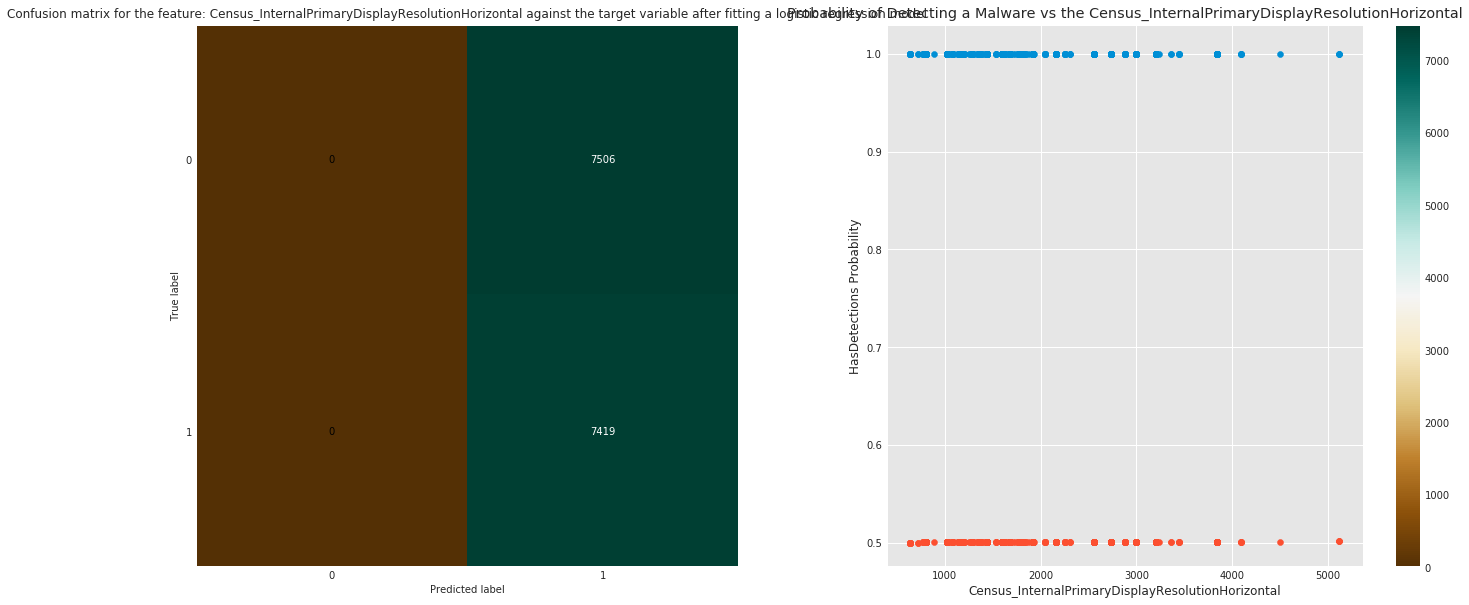

In [86]:
numerical_univariate_and_bivariate_plot("Census_InternalPrimaryDisplayResolutionHorizontal")
logistic_fit("Census_InternalPrimaryDisplayResolutionHorizontal")

Top 10 Values counts for the numerical feature Census_InternalPrimaryDisplayResolutionVertical
768.0     8343
1080.0    3713
900.0     1092
800.0      403
1024.0     250
1050.0     176
1440.0     133
1200.0     128
1824.0     113
600.0      112
Name: Census_InternalPrimaryDisplayResolutionVertical, dtype: int64
Min value 400.0
Max value 3000.0
NaN values 75
Number of unique values 67
Mean value inf
Variance value inf

Fitting a logistic regression model for the feature Census_InternalPrimaryDisplayResolutionVertical against the target variable
              precision    recall  f1-score   support

           0       0.51      0.72      0.60      7506
           1       0.52      0.31      0.39      7419

   micro avg       0.52      0.52      0.52     14925
   macro avg       0.52      0.51      0.49     14925
weighted avg       0.52      0.52      0.49     14925


accuracy score: 0.5152428810720268
F1 score: 0.5152428810720268


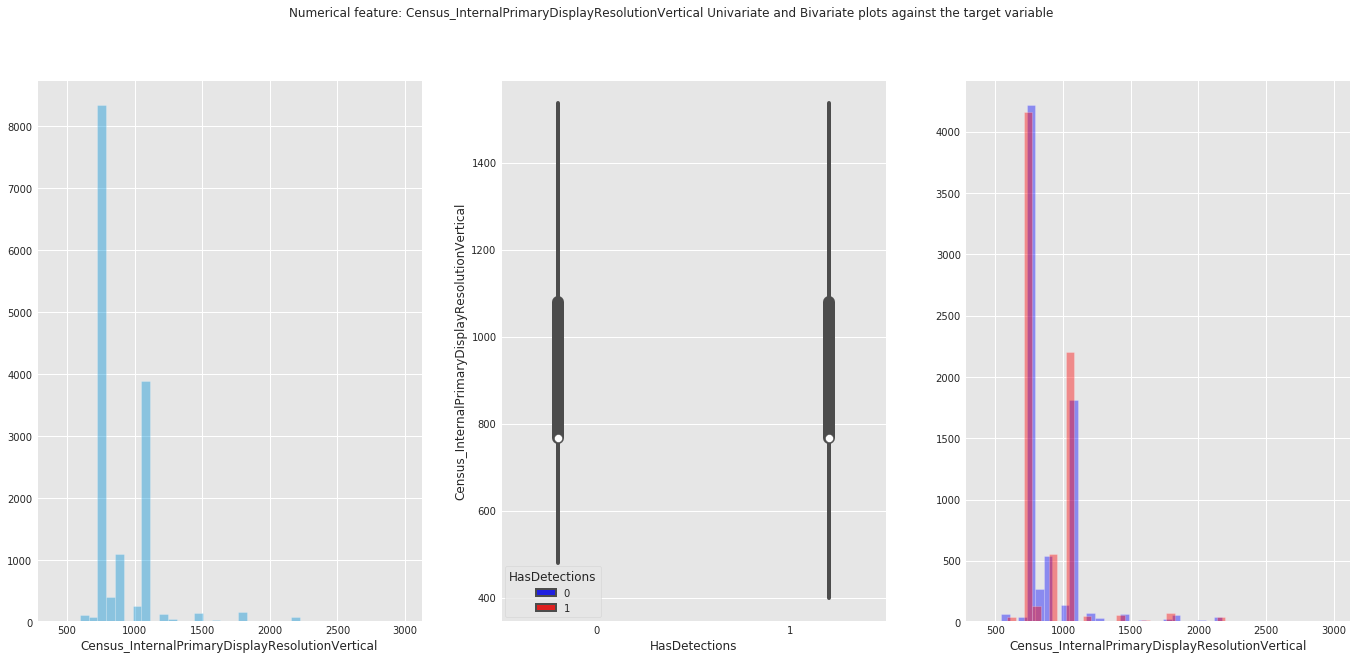

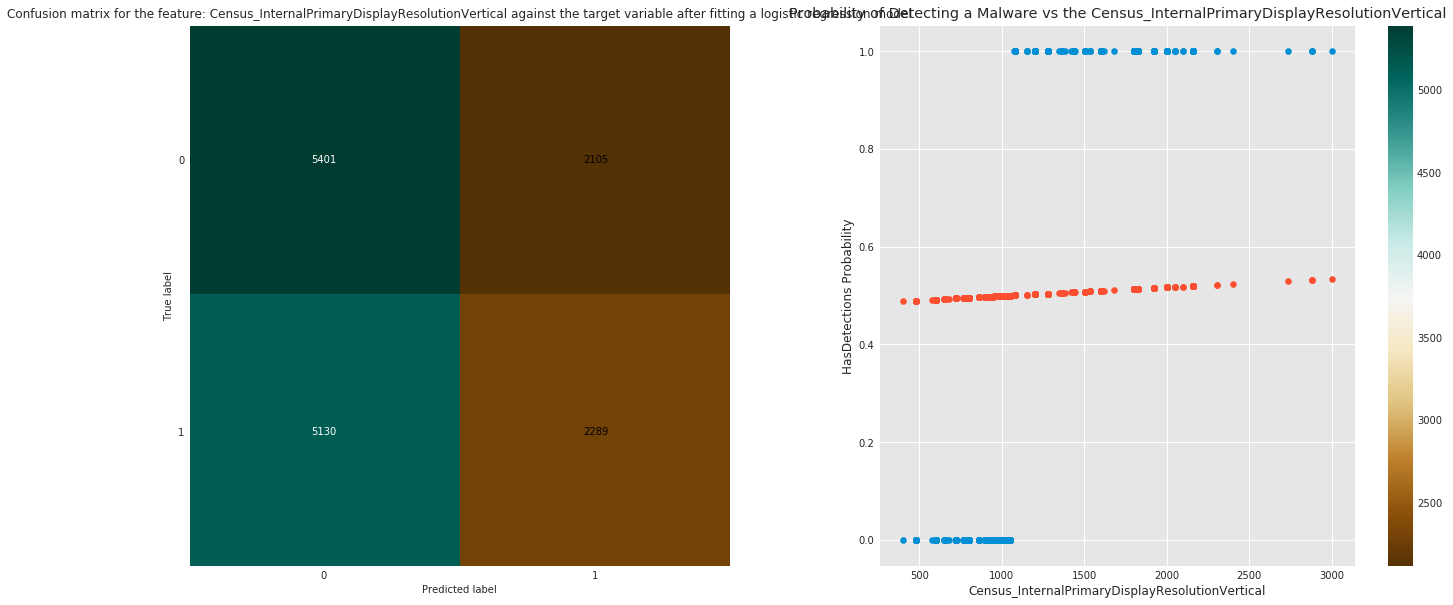

In [87]:
numerical_univariate_and_bivariate_plot("Census_InternalPrimaryDisplayResolutionVertical")
logistic_fit("Census_InternalPrimaryDisplayResolutionVertical")

Top 10 Values counts for the numerical feature Census_InternalBatteryNumberOfCharges
0.000000e+00    8417
4.294967e+09    3830
1.000000e+00     105
1.600000e+01      52
2.000000e+00      51
3.300000e+01      41
3.000000e+00      36
5.000000e+00      33
7.000000e+00      28
1.100000e+01      27
Name: Census_InternalBatteryNumberOfCharges, dtype: int64
Min value 0.0
Max value 4294967300.0
NaN values 454
Number of unique values 618
Mean value 1130876160.0
Variance value 3.578538163724878e+18

Fitting a logistic regression model for the feature Census_InternalBatteryNumberOfCharges against the target variable
              precision    recall  f1-score   support

           0       0.51      0.58      0.54      7347
           1       0.50      0.42      0.46      7199

   micro avg       0.50      0.50      0.50     14546
   macro avg       0.50      0.50      0.50     14546
weighted avg       0.50      0.50      0.50     14546


accuracy score: 0.5037811082084421
F1 score: 0.503781108208

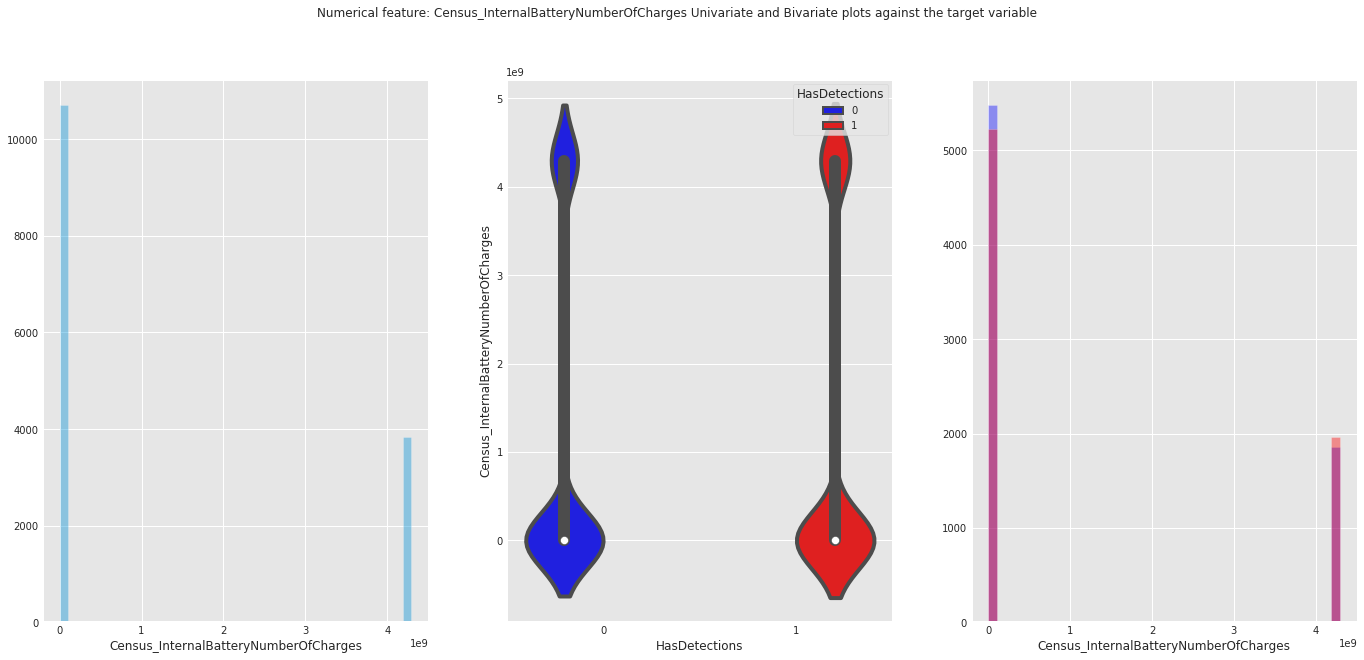

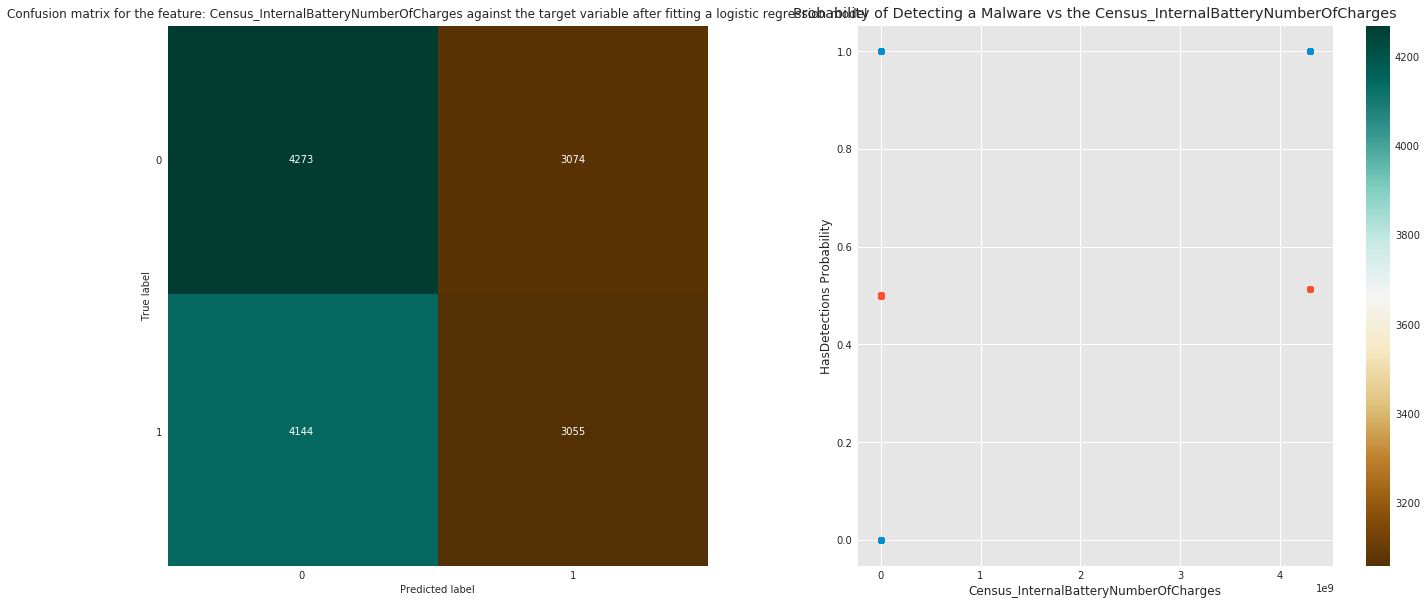

In [88]:
numerical_univariate_and_bivariate_plot("Census_InternalBatteryNumberOfCharges")
logistic_fit("Census_InternalBatteryNumberOfCharges")

Top 10 Values counts for the numerical feature Census_OSBuildNumber
17134    6854
16299    4142
15063    1345
14393    1265
10586     935
10240     423
17738       7
17741       6
17744       4
17755       4
Name: Census_OSBuildNumber, dtype: int64
Min value 10240
Max value 18242
NaN values 0
Number of unique values 20
Mean value 15885.485866666666
Variance value 3665997.520968313

Fitting a logistic regression model for the feature Census_OSBuildNumber against the target variable
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7547
           1       0.00      0.00      0.00      7453

   micro avg       0.50      0.50      0.50     15000
   macro avg       0.25      0.50      0.33     15000
weighted avg       0.25      0.50      0.34     15000


accuracy score: 0.5031333333333333
F1 score: 0.5031333333333333


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


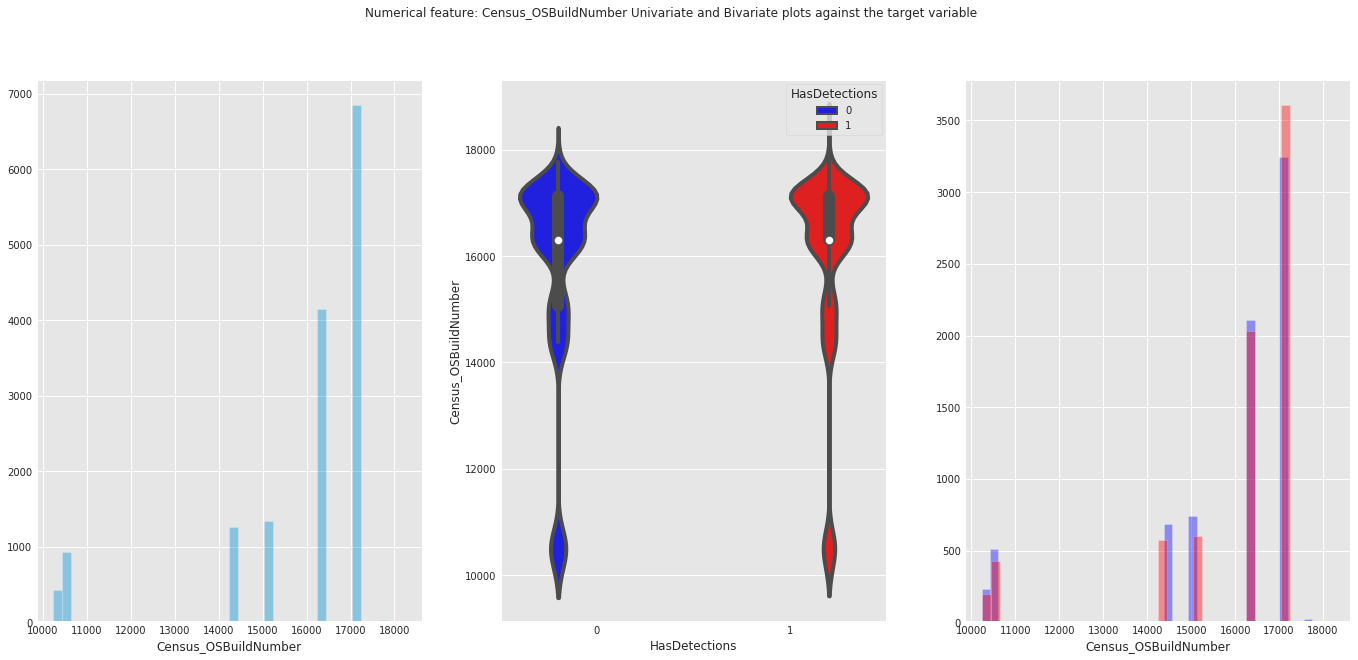

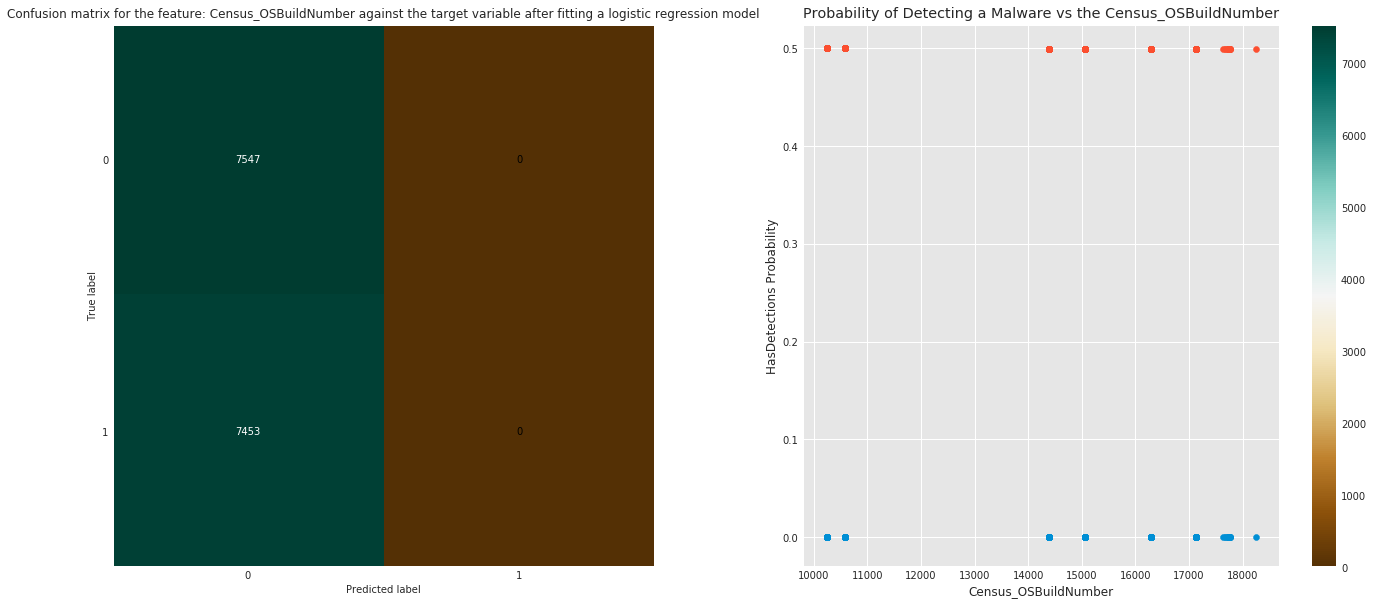

In [89]:
numerical_univariate_and_bivariate_plot("Census_OSBuildNumber")
logistic_fit("Census_OSBuildNumber")

Top 10 Values counts for the numerical feature Census_OSBuildRevision
228     2429
165     1548
431      929
285      809
547      581
112      572
371      540
191      411
2189     380
611      364
Name: Census_OSBuildRevision, dtype: int64
Min value 0
Max value 17976
NaN values 0
Number of unique values 176
Mean value 930.3974666666667
Variance value 8012682.45338449

Fitting a logistic regression model for the feature Census_OSBuildRevision against the target variable
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7547
           1       0.00      0.00      0.00      7453

   micro avg       0.50      0.50      0.50     15000
   macro avg       0.25      0.50      0.33     15000
weighted avg       0.25      0.50      0.34     15000


accuracy score: 0.5031333333333333
F1 score: 0.5031333333333333


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


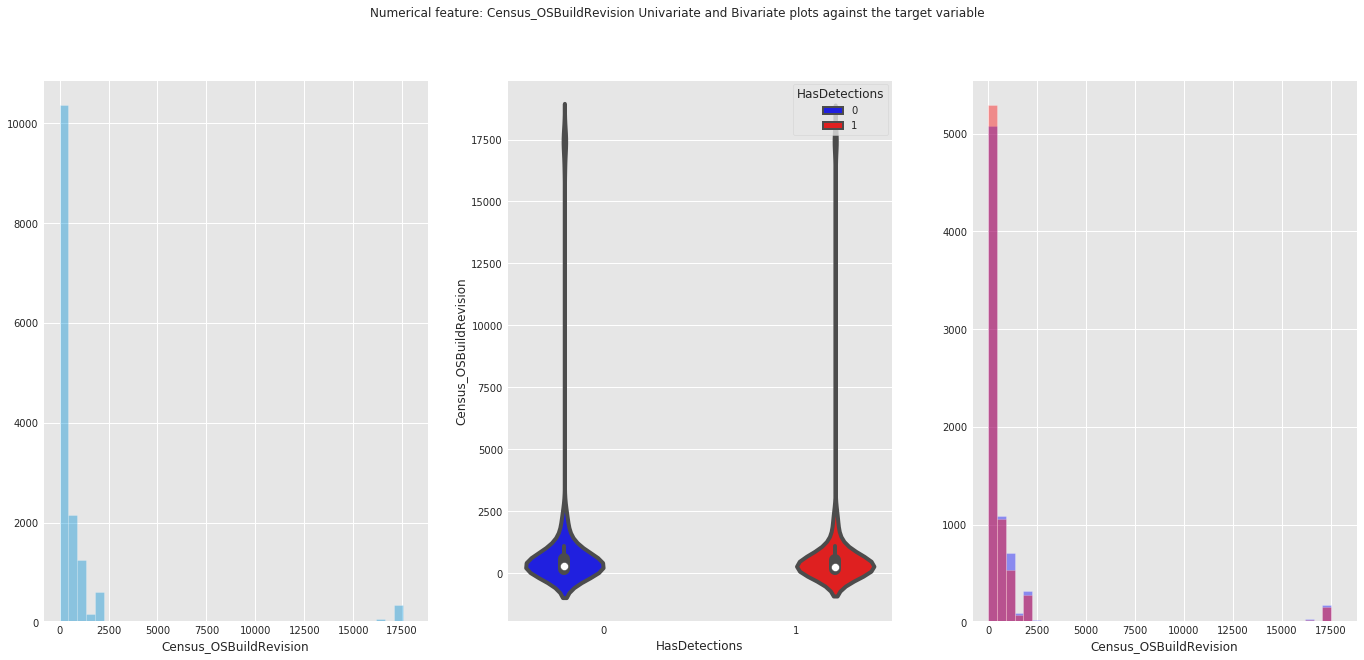

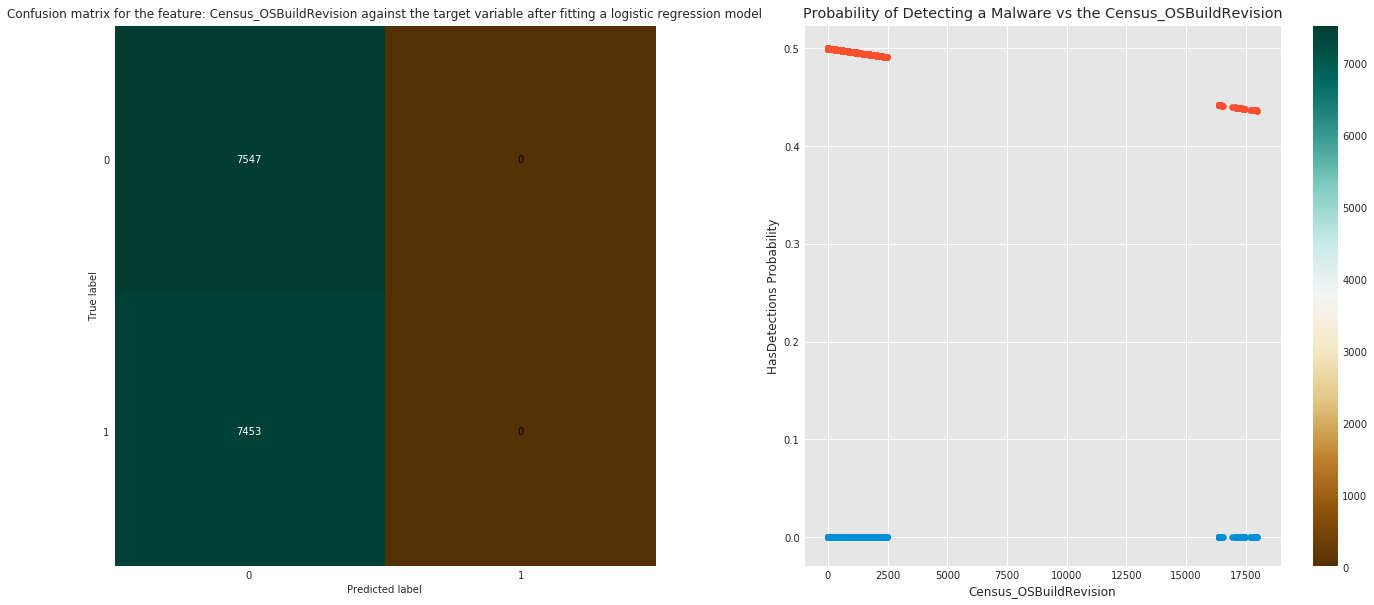

In [90]:
numerical_univariate_and_bivariate_plot("Census_OSBuildRevision")
logistic_fit("Census_OSBuildRevision")

Top 10 Values counts for the numerical feature Census_OSInstallLanguageIdentifier
8.0     5378
9.0     1730
29.0     853
7.0      826
14.0     741
37.0     686
10.0     624
26.0     559
5.0      425
35.0     334
Name: Census_OSInstallLanguageIdentifier, dtype: int64
Min value 1.0
Max value 39.0
NaN values 101
Number of unique values 39
Mean value inf
Variance value 103.44

Fitting a logistic regression model for the feature Census_OSInstallLanguageIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7492
           1       0.00      0.00      0.00      7407

   micro avg       0.50      0.50      0.50     14899
   macro avg       0.25      0.50      0.33     14899
weighted avg       0.25      0.50      0.34     14899


accuracy score: 0.5028525404389557
F1 score: 0.5028525404389557


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


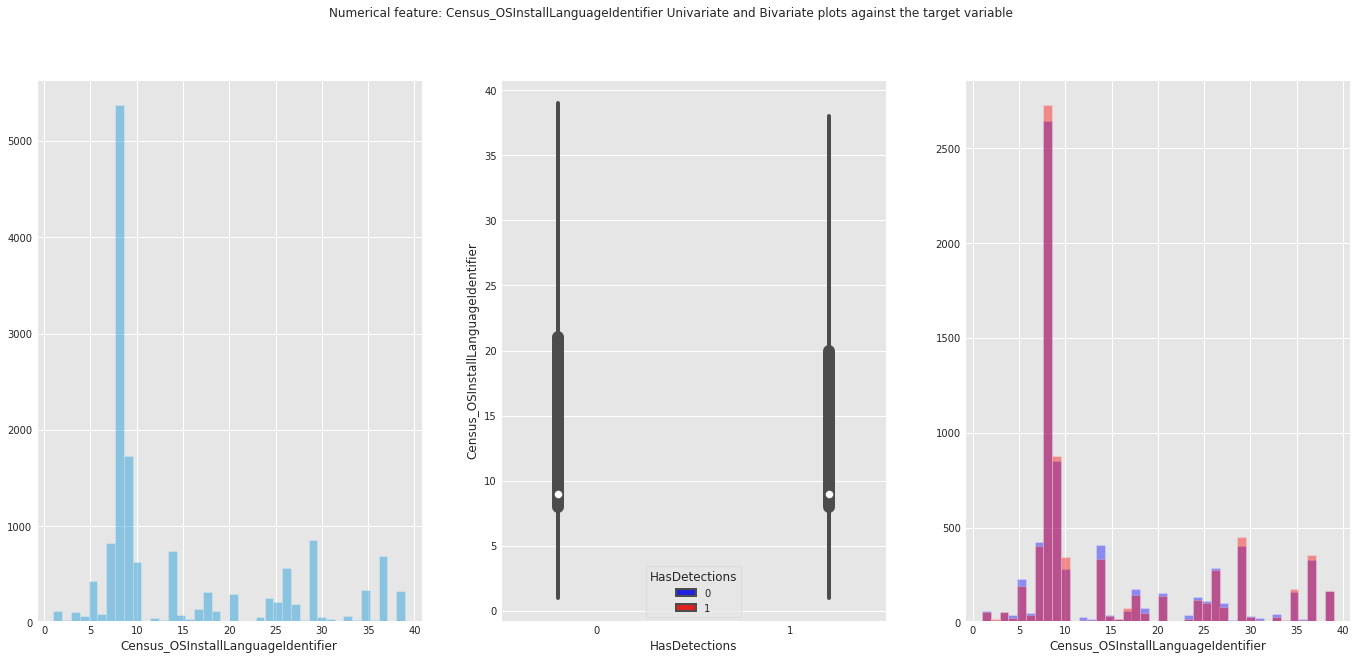

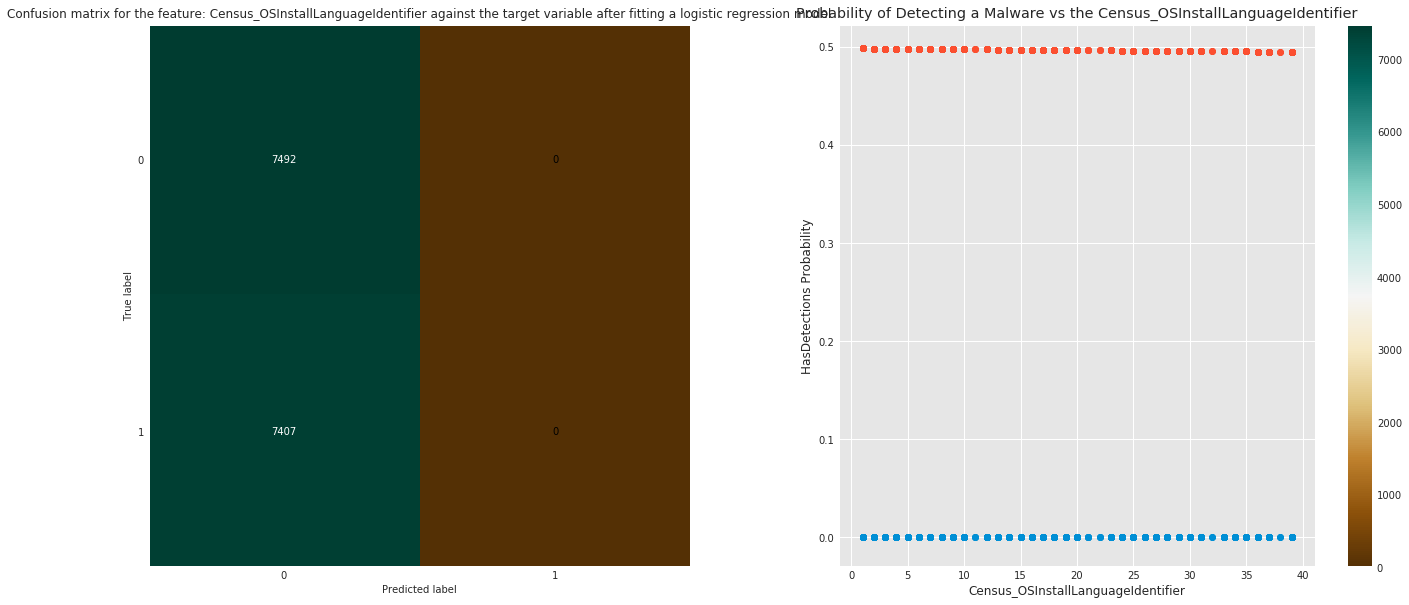

In [91]:
numerical_univariate_and_bivariate_plot("Census_OSInstallLanguageIdentifier")
logistic_fit("Census_OSInstallLanguageIdentifier")

Top 10 Values counts for the numerical feature Census_OSUILocaleIdentifier
31     5363
34     1740
125     861
30      830
49      746
158     694
35      642
119     563
26      425
148     338
Name: Census_OSUILocaleIdentifier, dtype: int64
Min value 5
Max value 161
NaN values 0
Number of unique values 48
Mean value 60.55266666666667
Variance value 2019.7048065426586

Fitting a logistic regression model for the feature Census_OSUILocaleIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7547
           1       0.00      0.00      0.00      7453

   micro avg       0.50      0.50      0.50     15000
   macro avg       0.25      0.50      0.33     15000
weighted avg       0.25      0.50      0.34     15000


accuracy score: 0.5031333333333333
F1 score: 0.5031333333333333


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


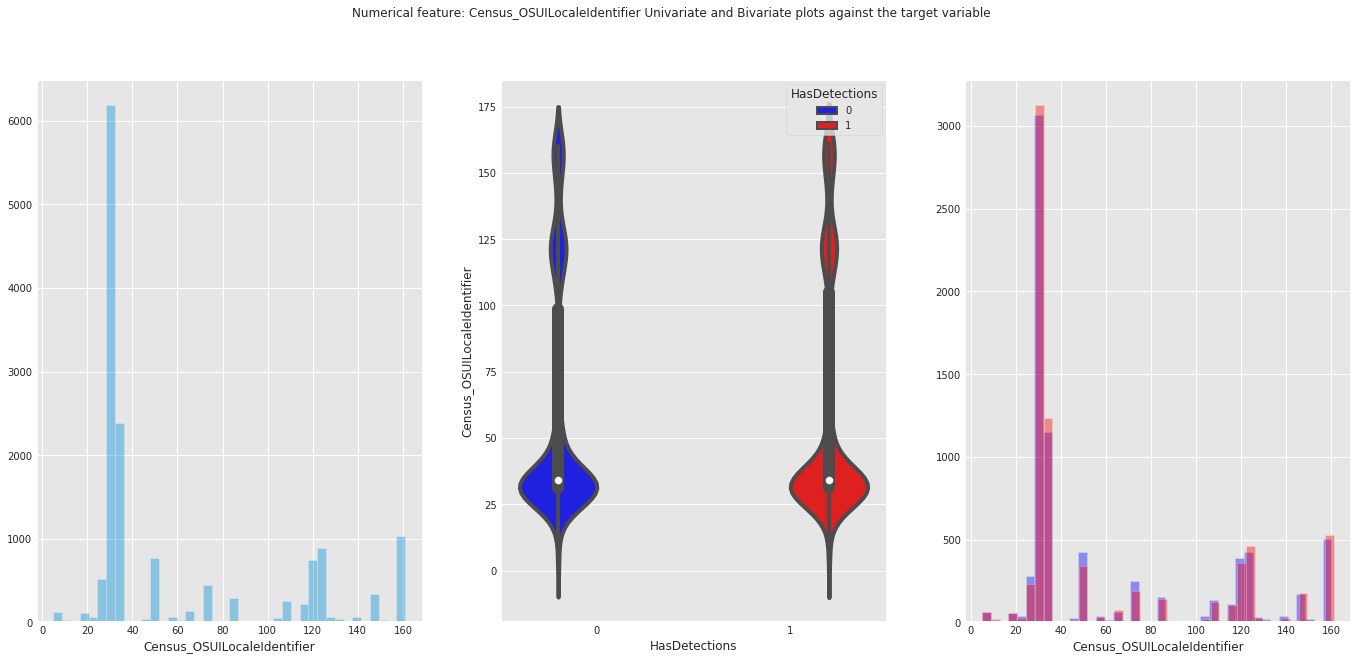

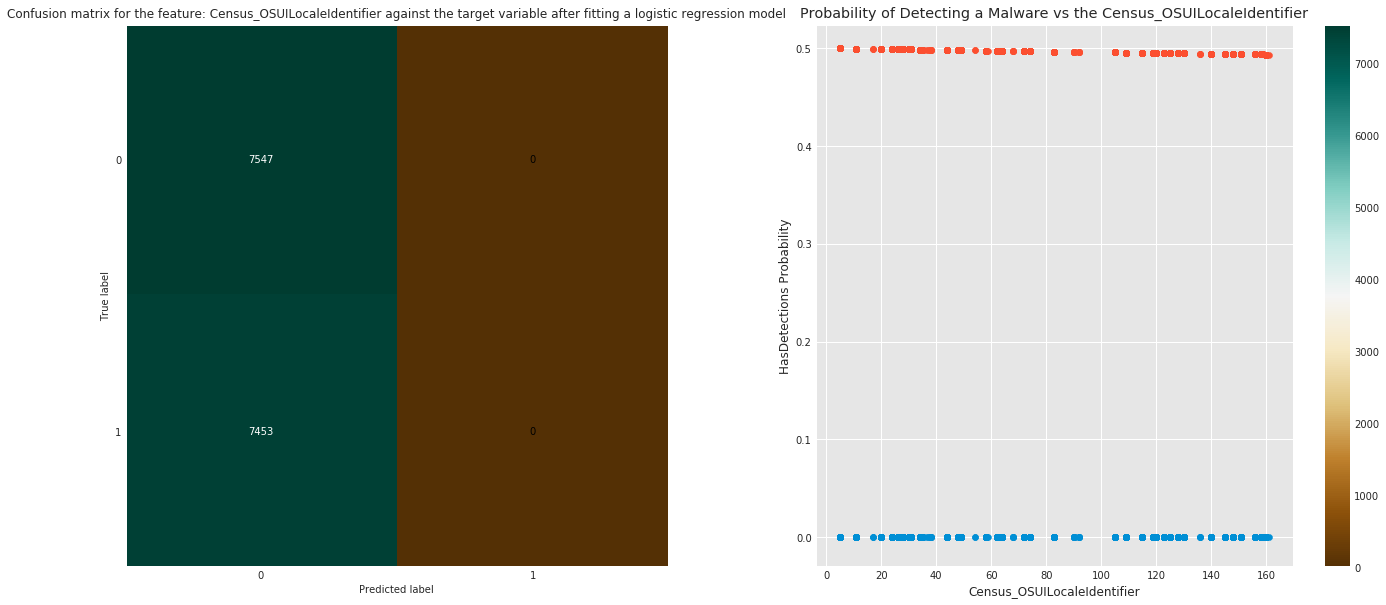

In [92]:
numerical_univariate_and_bivariate_plot("Census_OSUILocaleIdentifier")
logistic_fit("Census_OSUILocaleIdentifier")

In [93]:
numerical_univariate_and_bivariate_plot("Census_IsPortableOperatingSystem")
logistic_fit("Census_IsPortableOperatingSystem")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature Census_IsFlightingInternal
0.0    2529
Name: Census_IsFlightingInternal, dtype: int64
Min value 0.0
Max value 0.0
NaN values 12471
Number of unique values 1

Fitting a logistic regression model for the feature Census_IsFlightingInternal against the target variable
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      1307
           1       0.00      0.00      0.00      1222

   micro avg       0.52      0.52      0.52      2529
   macro avg       0.26      0.50      0.34      2529
weighted avg       0.27      0.52      0.35      2529


accuracy score: 0.516805061289047
F1 score: 0.516805061289047


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


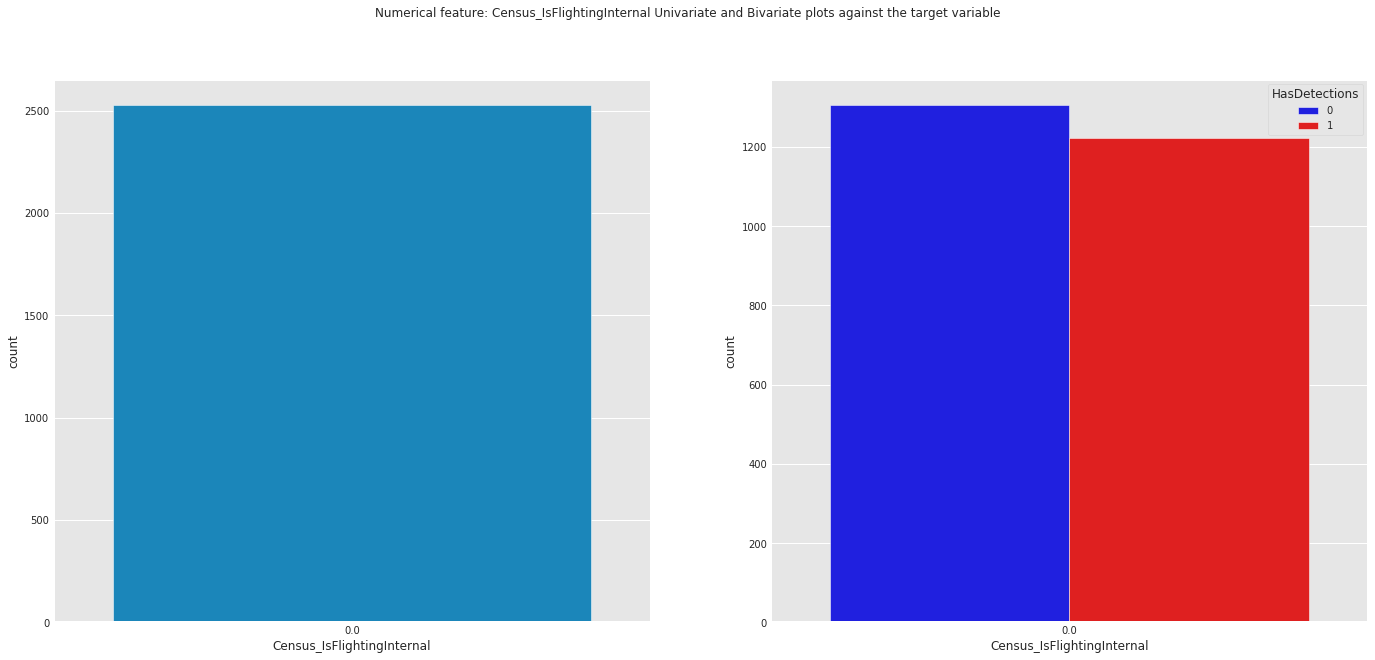

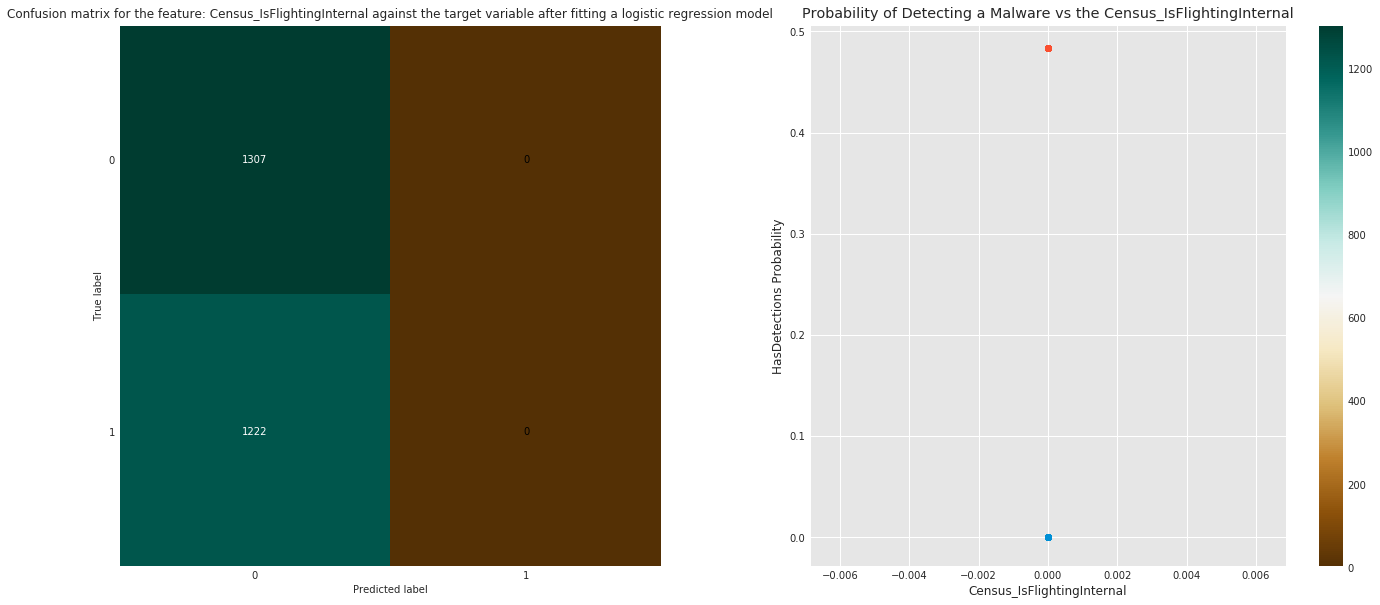

In [94]:
numerical_univariate_and_bivariate_plot("Census_IsFlightingInternal")
logistic_fit("Census_IsFlightingInternal")

In [95]:
numerical_univariate_and_bivariate_plot("Census_IsFlightsDisabled")
logistic_fit("Census_IsFlightsDisabled")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature Census_ThresholdOptIn
0.0    5485
1.0       2
Name: Census_ThresholdOptIn, dtype: int64
Min value 0.0
Max value 1.0
NaN values 9513
Number of unique values 2

Fitting a logistic regression model for the feature Census_ThresholdOptIn against the target variable
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      2833
           1       0.00      0.00      0.00      2654

   micro avg       0.52      0.52      0.52      5487
   macro avg       0.26      0.50      0.34      5487
weighted avg       0.27      0.52      0.35      5487


accuracy score: 0.516311281210133
F1 score: 0.516311281210133


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


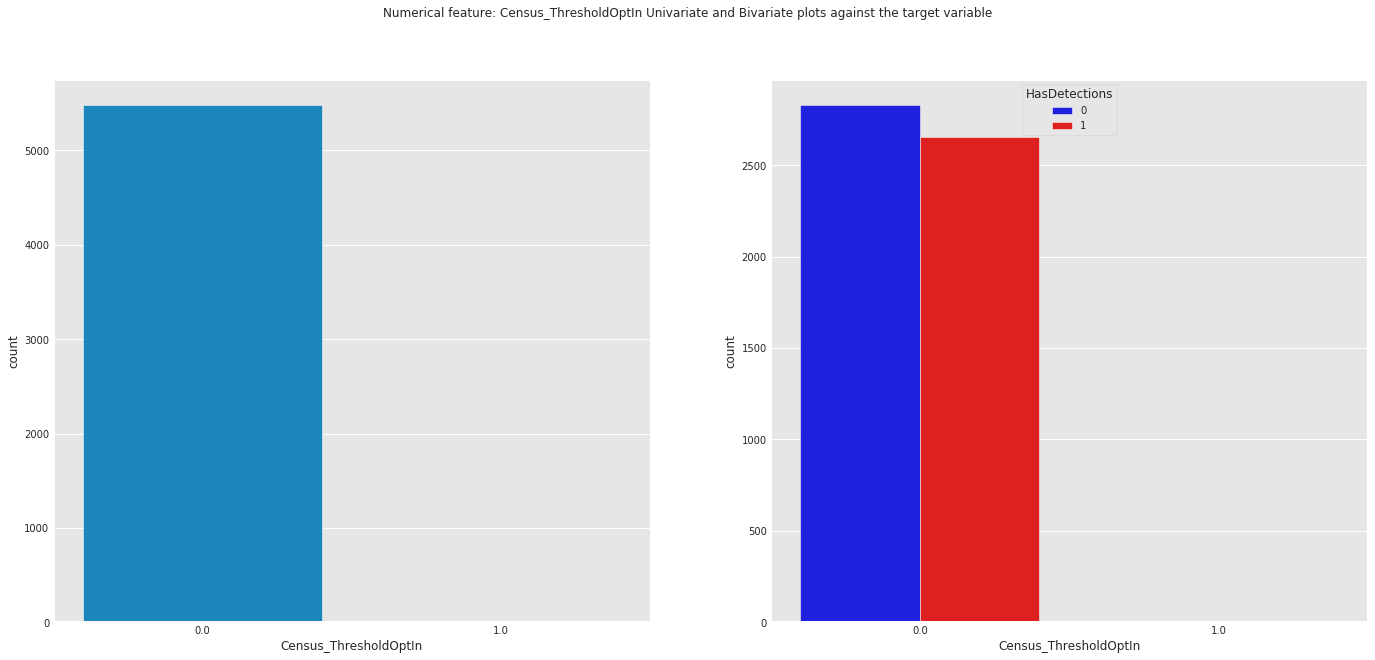

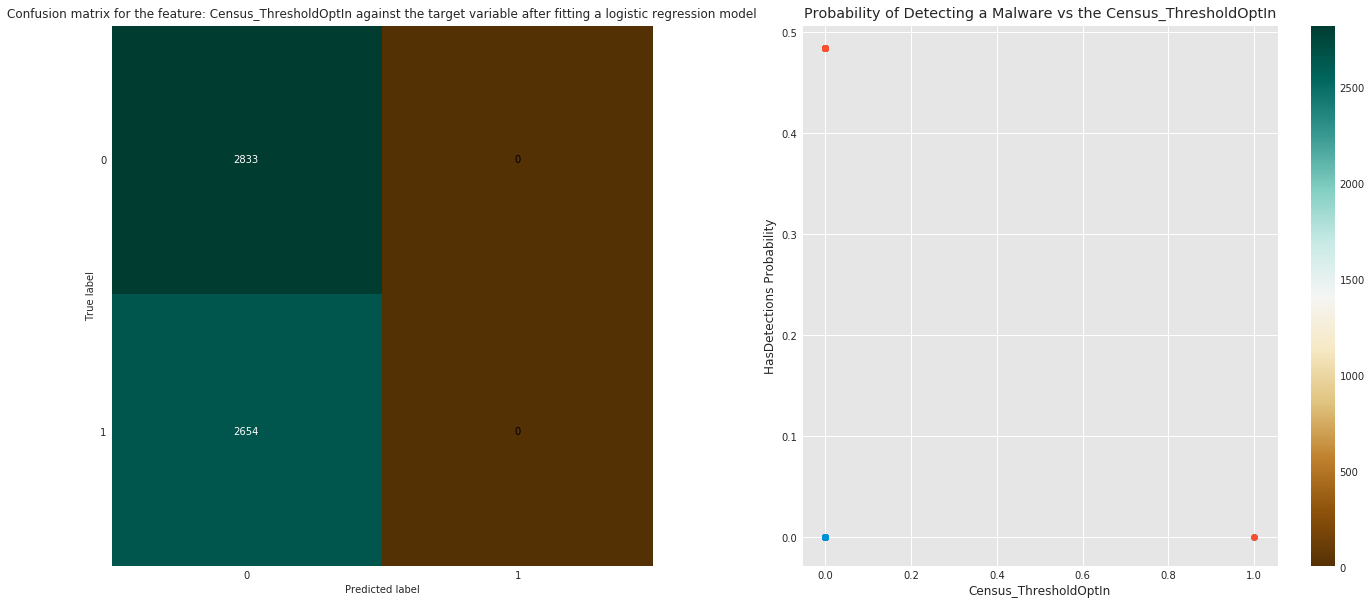

In [96]:
numerical_univariate_and_bivariate_plot("Census_ThresholdOptIn")
logistic_fit("Census_ThresholdOptIn")

Top 10 Values counts for the numerical feature Census_FirmwareManufacturerIdentifier
142.0    4590
628.0    2053
554.0    1911
355.0    1591
556.0    1363
500.0     623
93.0      309
807.0     288
513.0     241
127.0     211
Name: Census_FirmwareManufacturerIdentifier, dtype: int64
Min value 93.0
Max value 1080.0
NaN values 318
Number of unique values 85
Mean value inf
Variance value inf

Fitting a logistic regression model for the feature Census_FirmwareManufacturerIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      7372
           1       0.51      0.49      0.50      7310

   micro avg       0.51      0.51      0.51     14682
   macro avg       0.51      0.51      0.51     14682
weighted avg       0.51      0.51      0.51     14682


accuracy score: 0.5148481133360577
F1 score: 0.5148481133360577


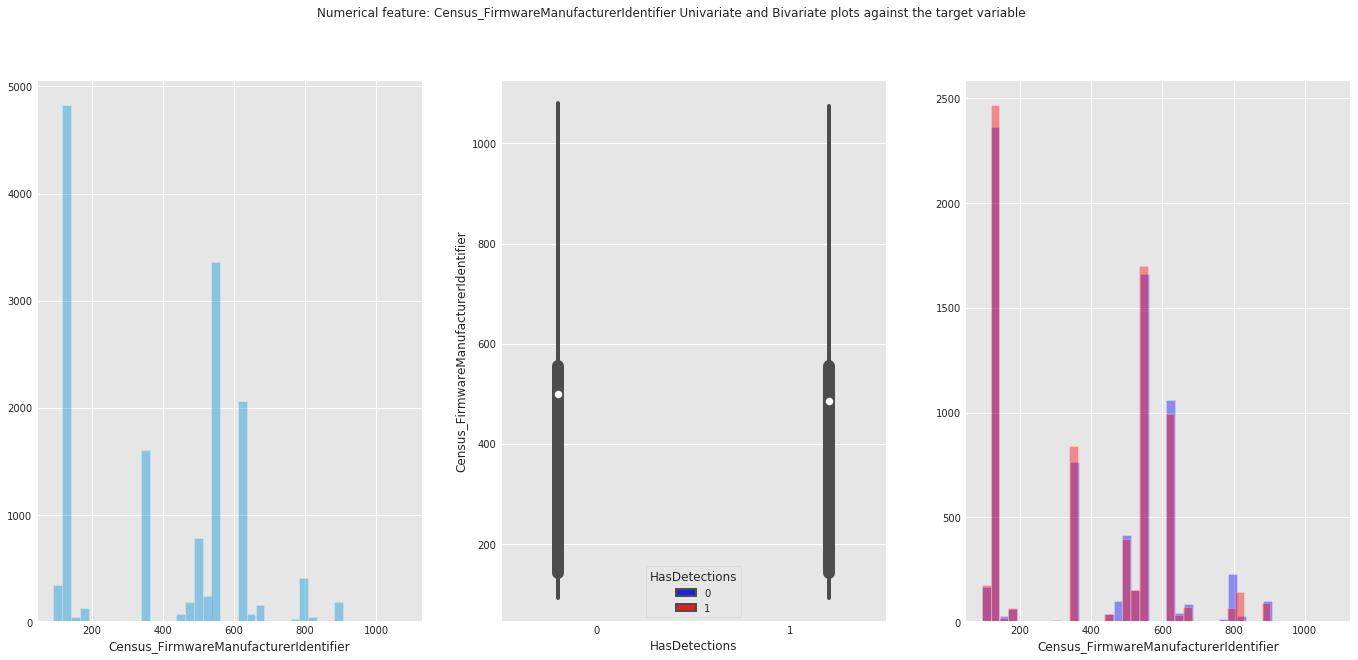

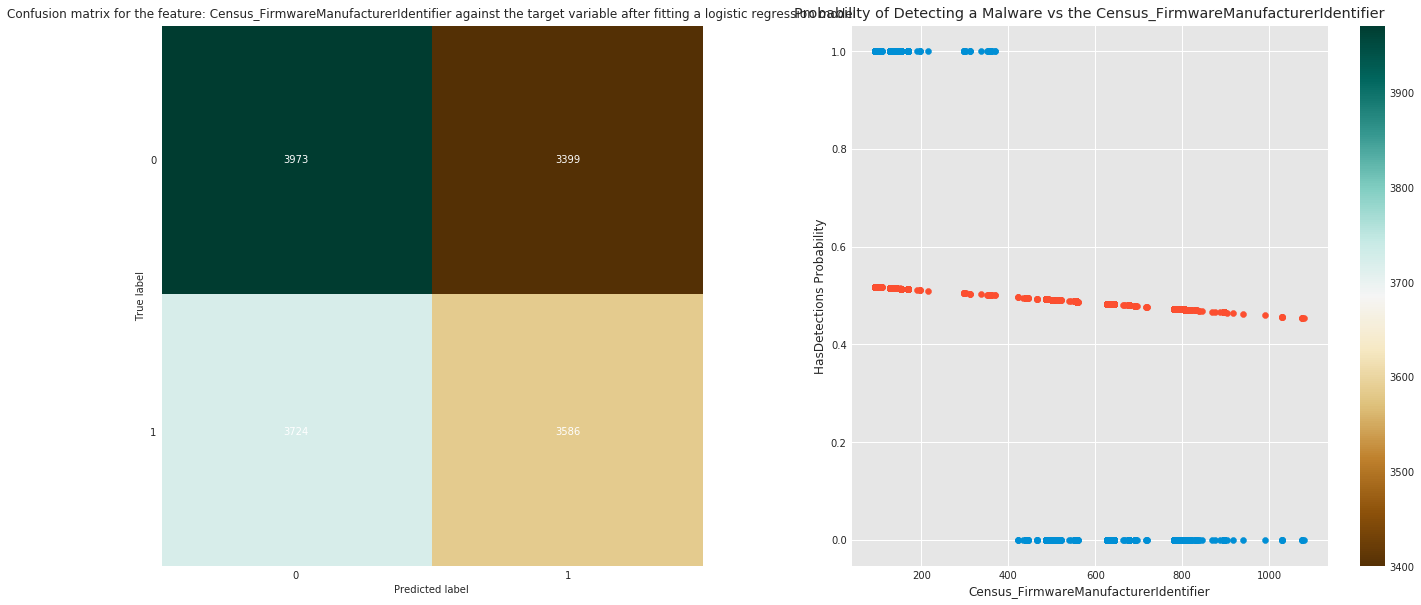

In [97]:
numerical_univariate_and_bivariate_plot("Census_FirmwareManufacturerIdentifier")
logistic_fit("Census_FirmwareManufacturerIdentifier")

Top 10 Values counts for the numerical feature Census_FirmwareManufacturerIdentifier
142.0    4590
628.0    2053
554.0    1911
355.0    1591
556.0    1363
500.0     623
93.0      309
807.0     288
513.0     241
127.0     211
Name: Census_FirmwareManufacturerIdentifier, dtype: int64
Min value 93.0
Max value 1080.0
NaN values 318
Number of unique values 85
Mean value inf
Variance value inf

Fitting a logistic regression model for the feature Census_FirmwareManufacturerIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      7372
           1       0.51      0.49      0.50      7310

   micro avg       0.51      0.51      0.51     14682
   macro avg       0.51      0.51      0.51     14682
weighted avg       0.51      0.51      0.51     14682


accuracy score: 0.5148481133360577
F1 score: 0.5148481133360577


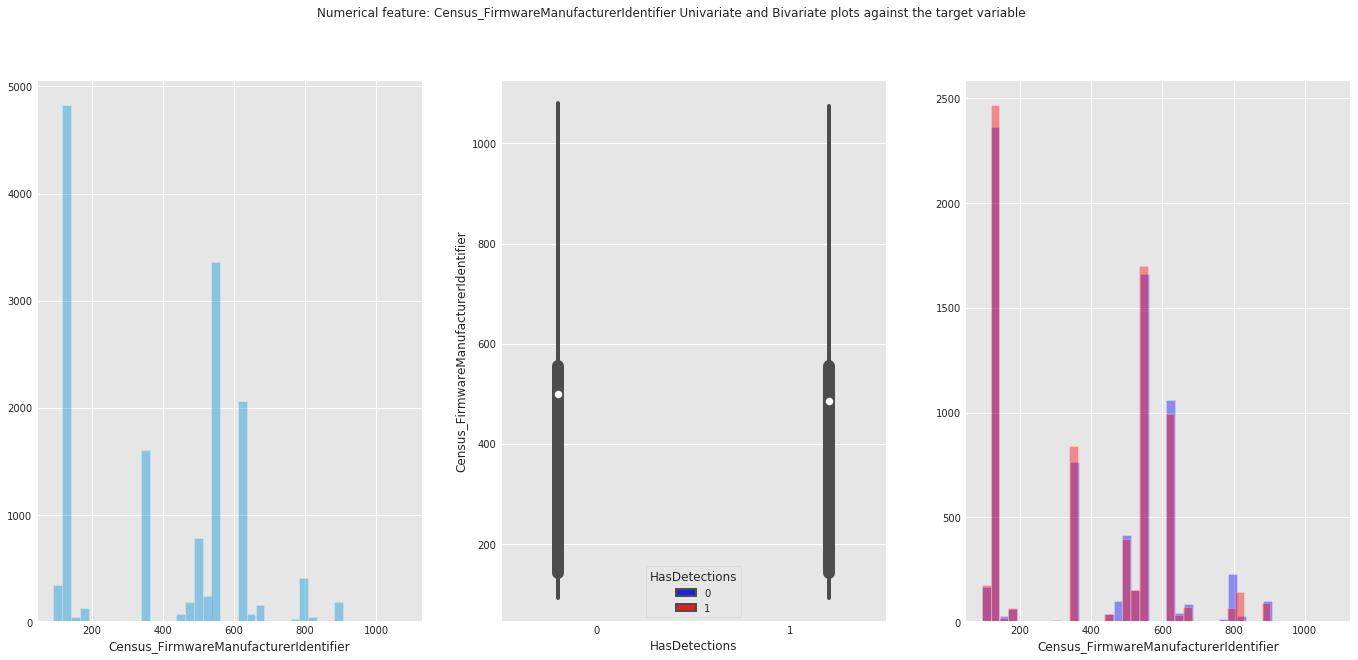

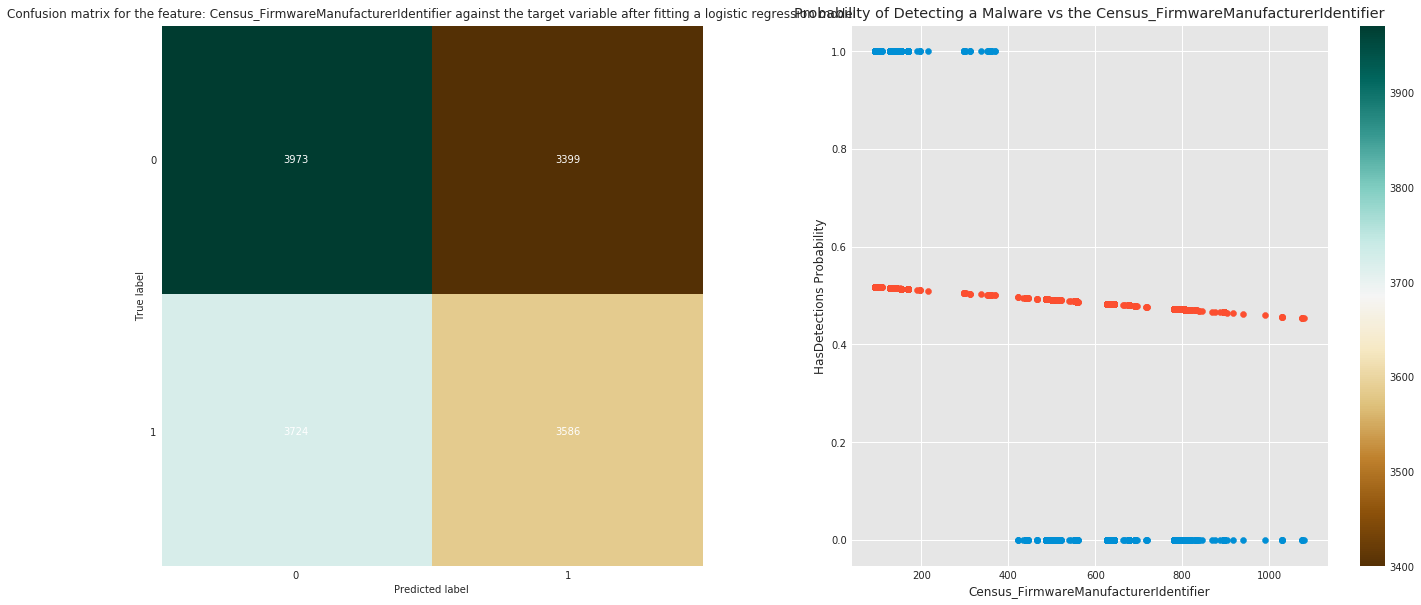

In [98]:
numerical_univariate_and_bivariate_plot("Census_FirmwareManufacturerIdentifier")
logistic_fit("Census_FirmwareManufacturerIdentifier")

Top 10 Values counts for the numerical feature Census_FirmwareVersionIdentifier
33105.0    143
33054.0    100
33115.0     96
33060.0     94
33111.0     94
11778.0     90
63175.0     86
63155.0     85
19970.0     84
63140.0     83
Name: Census_FirmwareVersionIdentifier, dtype: int64
Min value 535.0
Max value 72089.0
NaN values 278
Number of unique values 4445
Mean value 32968.5625
Variance value 451042368.0

Fitting a logistic regression model for the feature Census_FirmwareVersionIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7394
           1       0.00      0.00      0.00      7328

   micro avg       0.50      0.50      0.50     14722
   macro avg       0.25      0.50      0.33     14722
weighted avg       0.25      0.50      0.34     14722


accuracy score: 0.5022415432685776
F1 score: 0.5022415432685776


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


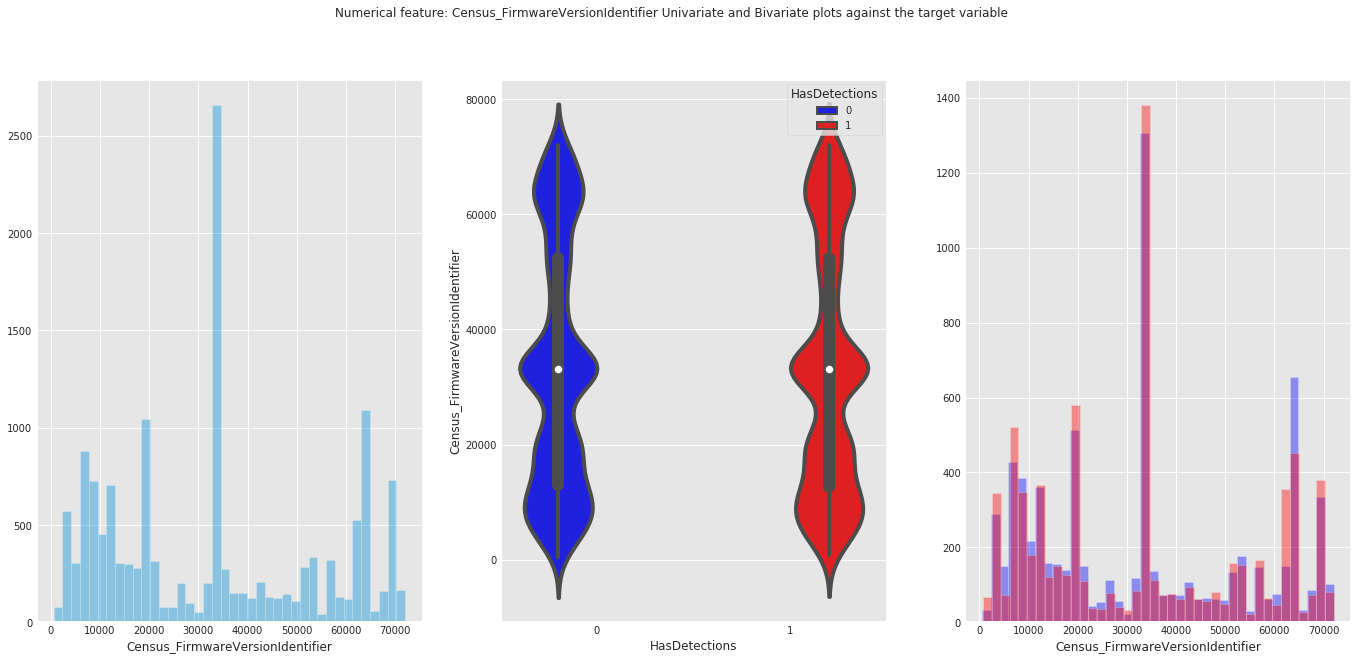

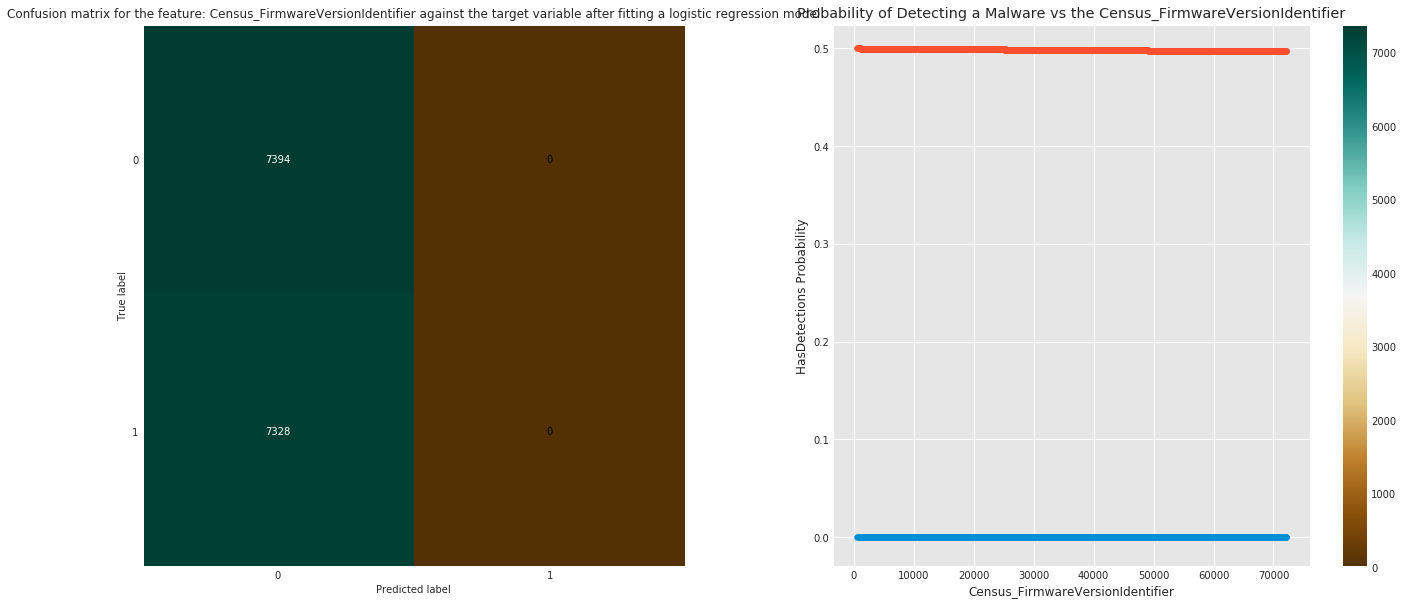

In [99]:
numerical_univariate_and_bivariate_plot("Census_FirmwareVersionIdentifier")
logistic_fit("Census_FirmwareVersionIdentifier")

Top 10 Values counts for the numerical feature Census_IsSecureBootEnabled
0    7590
1    7410
Name: Census_IsSecureBootEnabled, dtype: int64
Min value 0
Max value 1
NaN values 0
Number of unique values 2

Fitting a logistic regression model for the feature Census_IsSecureBootEnabled against the target variable
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      7547
           1       0.50      0.50      0.50      7453

   micro avg       0.50      0.50      0.50     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.50      0.50      0.50     15000


accuracy score: 0.5039333333333333
F1 score: 0.5039333333333333


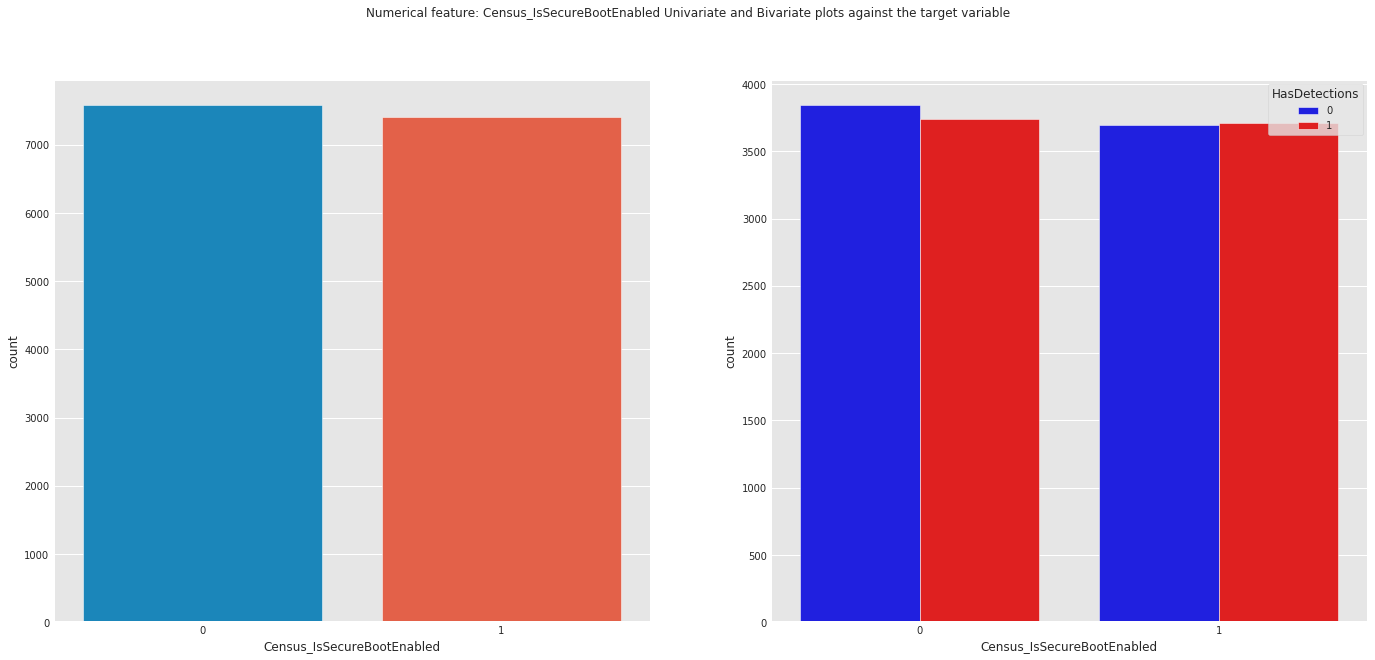

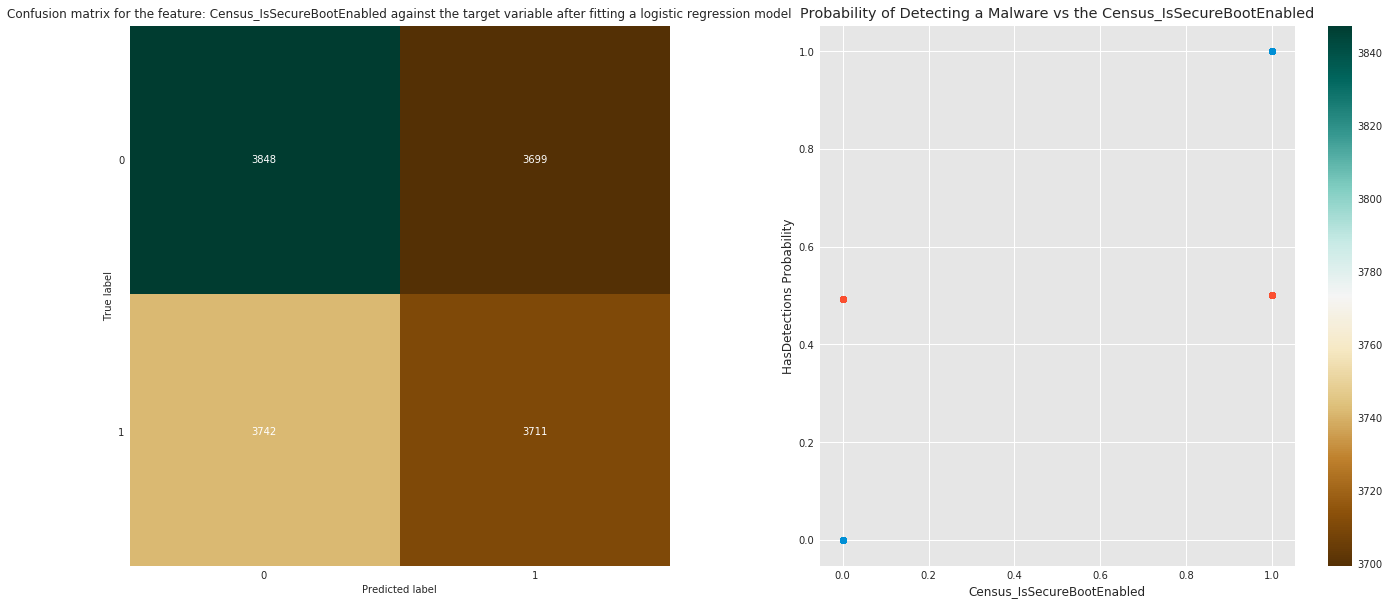

In [100]:
numerical_univariate_and_bivariate_plot("Census_IsSecureBootEnabled")
logistic_fit("Census_IsSecureBootEnabled")

Top 10 Values counts for the numerical feature Census_IsWIMBootEnabled
0.0    5498
Name: Census_IsWIMBootEnabled, dtype: int64
Min value 0.0
Max value 0.0
NaN values 9502
Number of unique values 1

Fitting a logistic regression model for the feature Census_IsWIMBootEnabled against the target variable
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      2841
           1       0.00      0.00      0.00      2657

   micro avg       0.52      0.52      0.52      5498
   macro avg       0.26      0.50      0.34      5498
weighted avg       0.27      0.52      0.35      5498


accuracy score: 0.5167333575845762
F1 score: 0.5167333575845762


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


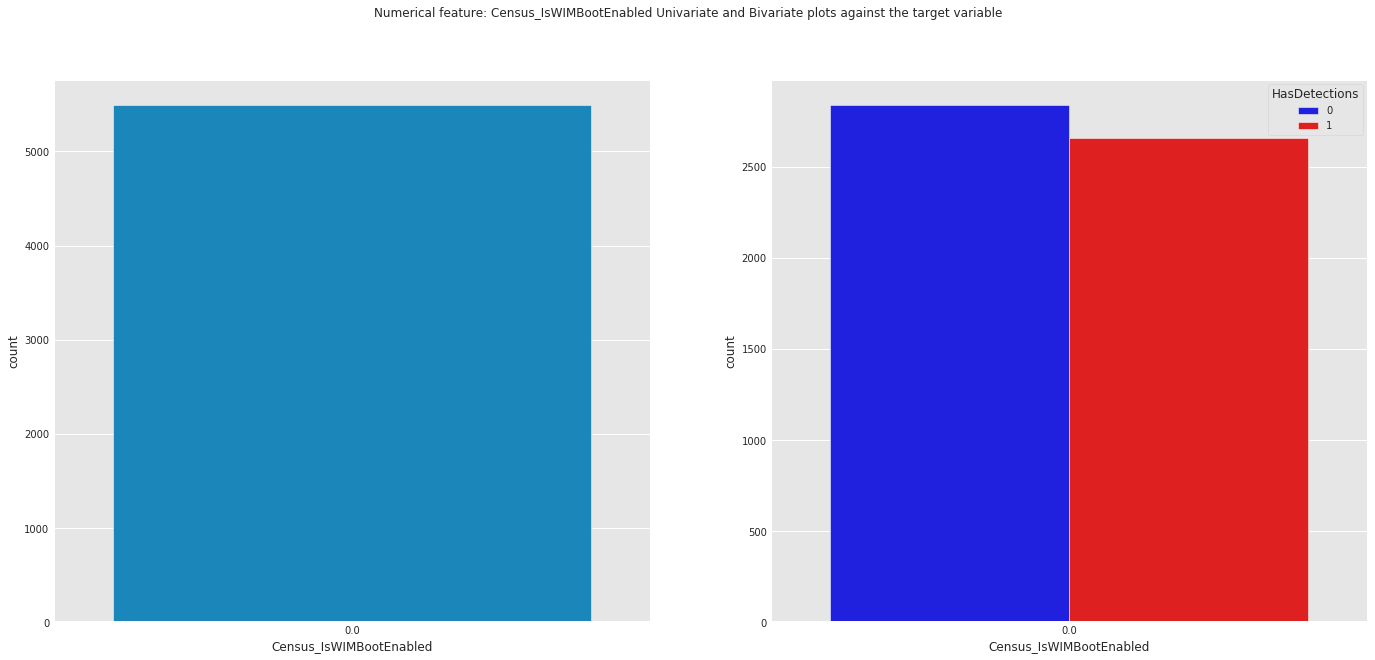

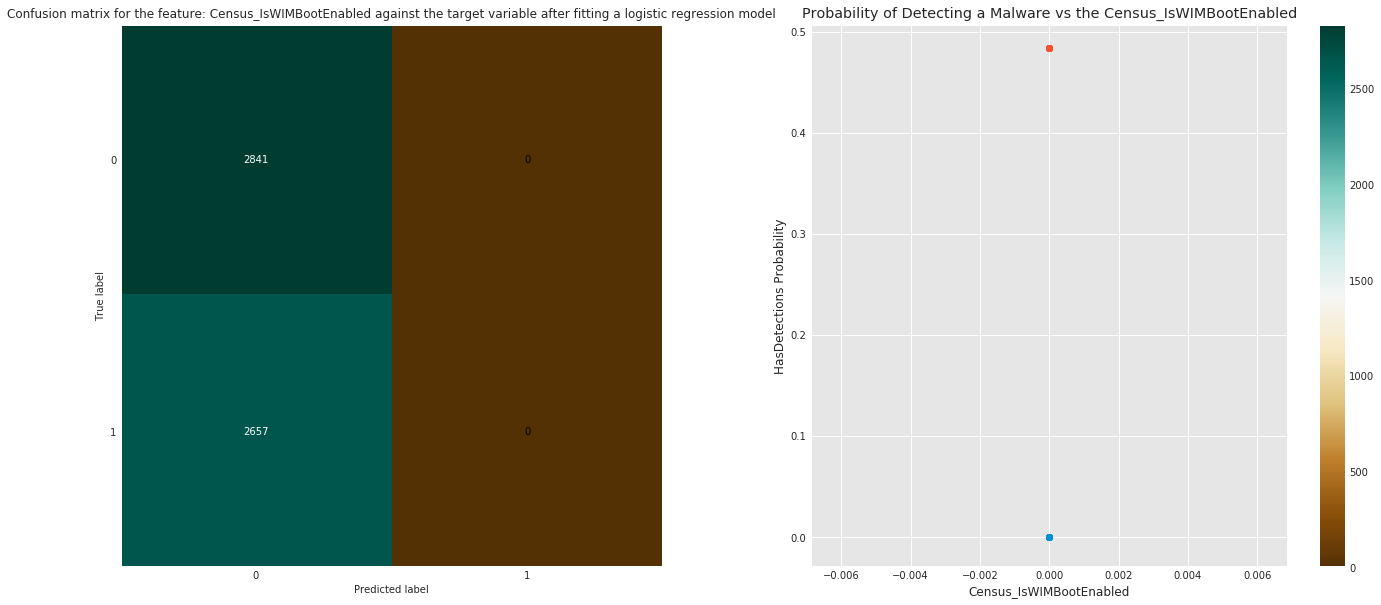

In [101]:
numerical_univariate_and_bivariate_plot("Census_IsWIMBootEnabled")
logistic_fit("Census_IsWIMBootEnabled")

In [102]:
numerical_univariate_and_bivariate_plot("Census_IsVirtualDevice")
logistic_fit("Census_IsVirtualDevice")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature Census_IsTouchEnabled
0    13026
1     1974
Name: Census_IsTouchEnabled, dtype: int64
Min value 0
Max value 1
NaN values 0
Number of unique values 2

Fitting a logistic regression model for the feature Census_IsTouchEnabled against the target variable
              precision    recall  f1-score   support

           0       0.55      0.14      0.23      7547
           1       0.50      0.88      0.64      7453

   micro avg       0.51      0.51      0.51     15000
   macro avg       0.53      0.51      0.43     15000
weighted avg       0.53      0.51      0.43     15000


accuracy score: 0.5092666666666666
F1 score: 0.5092666666666666


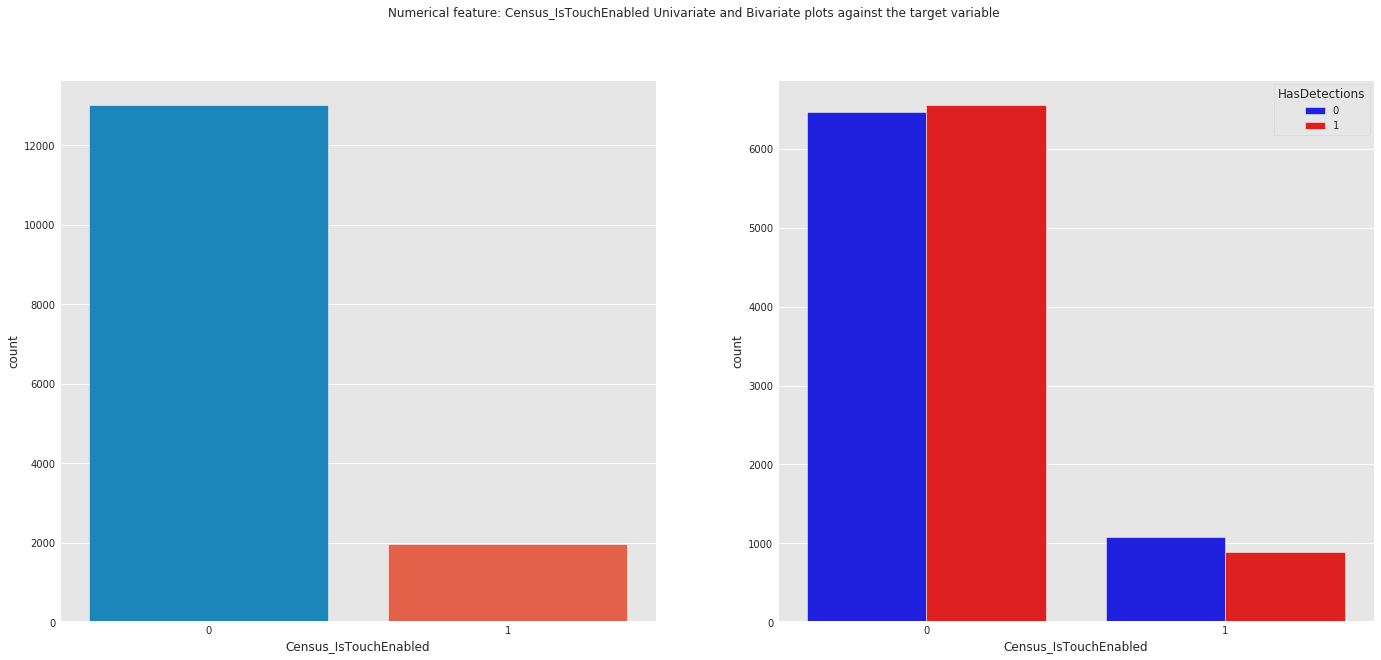

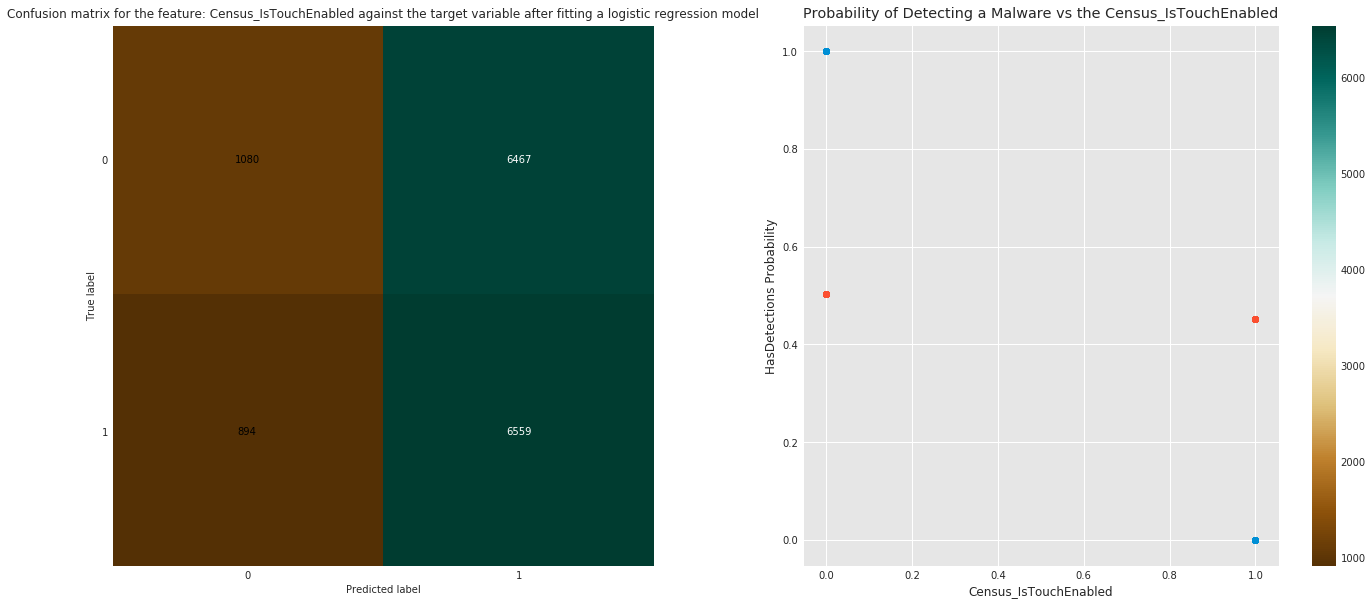

In [103]:
numerical_univariate_and_bivariate_plot("Census_IsTouchEnabled")
logistic_fit("Census_IsTouchEnabled")

In [104]:
numerical_univariate_and_bivariate_plot("Census_IsPenCapable")
logistic_fit("Census_IsPenCapable")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [105]:
numerical_univariate_and_bivariate_plot("Census_IsAlwaysOnAlwaysConnectedCapable")
logistic_fit("Census_IsAlwaysOnAlwaysConnectedCapable")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature Wdft_IsGamer
0.0    10383
1.0     4092
Name: Wdft_IsGamer, dtype: int64
Min value 0.0
Max value 1.0
NaN values 525
Number of unique values 2

Fitting a logistic regression model for the feature Wdft_IsGamer against the target variable
              precision    recall  f1-score   support

           0       0.52      0.73      0.61      7298
           1       0.53      0.30      0.38      7177

   micro avg       0.52      0.52      0.52     14475
   macro avg       0.52      0.52      0.49     14475
weighted avg       0.52      0.52      0.50     14475


accuracy score: 0.5191018998272884
F1 score: 0.5191018998272884


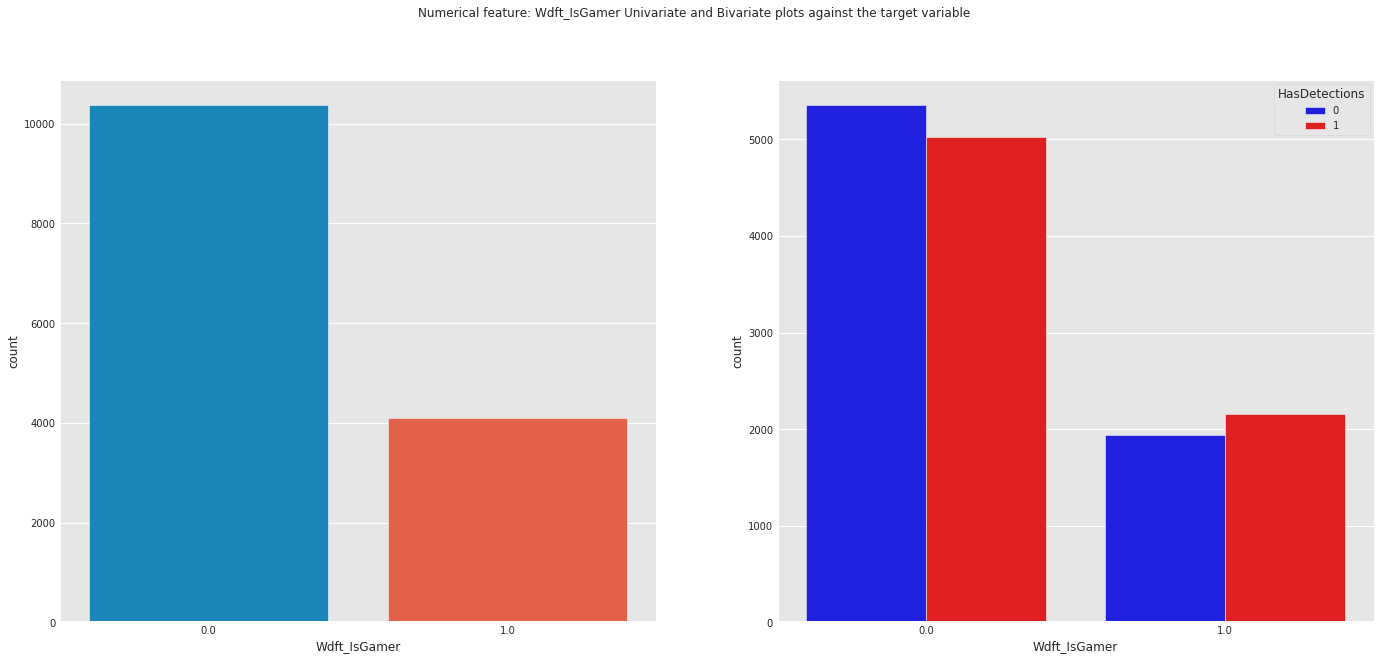

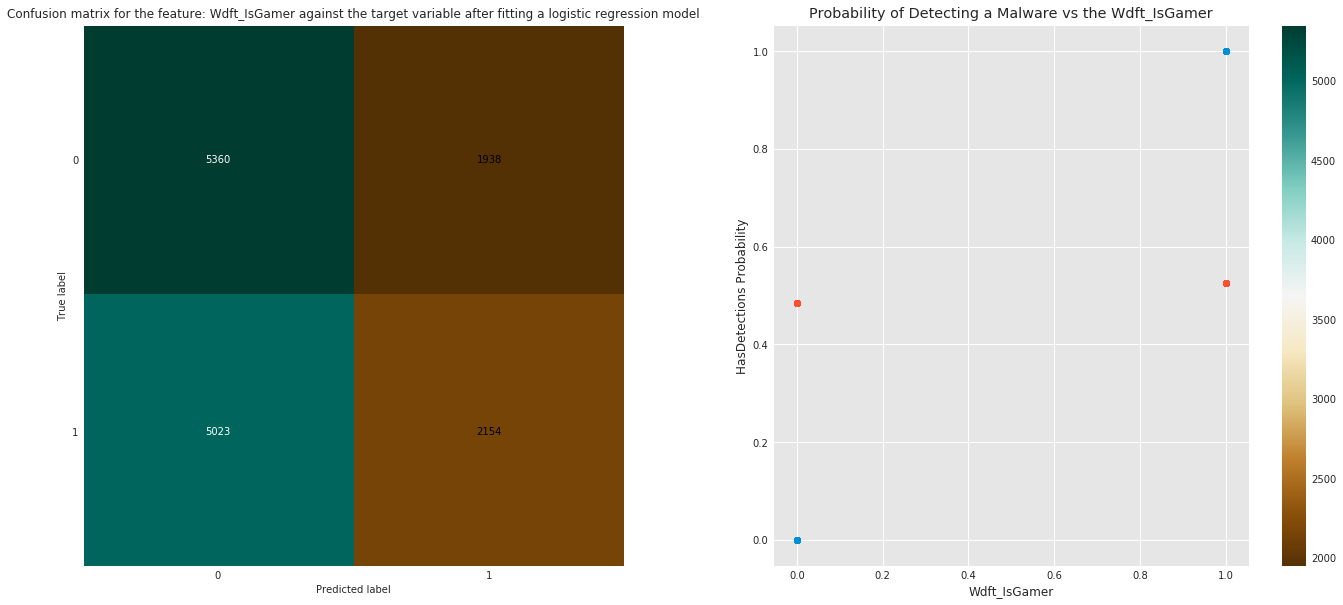

In [106]:
numerical_univariate_and_bivariate_plot("Wdft_IsGamer")
logistic_fit("Wdft_IsGamer")

Top 10 Values counts for the numerical feature Wdft_RegionIdentifier
10.0    2997
11.0    2252
3.0     2162
1.0     2106
15.0    1749
7.0     1008
8.0      452
13.0     394
5.0      362
6.0      259
Name: Wdft_RegionIdentifier, dtype: int64
Min value 1.0
Max value 15.0
NaN values 525
Number of unique values 15
Mean value inf
Variance value 20.94

Fitting a logistic regression model for the feature Wdft_RegionIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.66      0.57      7298
           1       0.50      0.35      0.41      7177

   micro avg       0.50      0.50      0.50     14475
   macro avg       0.50      0.50      0.49     14475
weighted avg       0.50      0.50      0.49     14475


accuracy score: 0.5030051813471502
F1 score: 0.5030051813471502


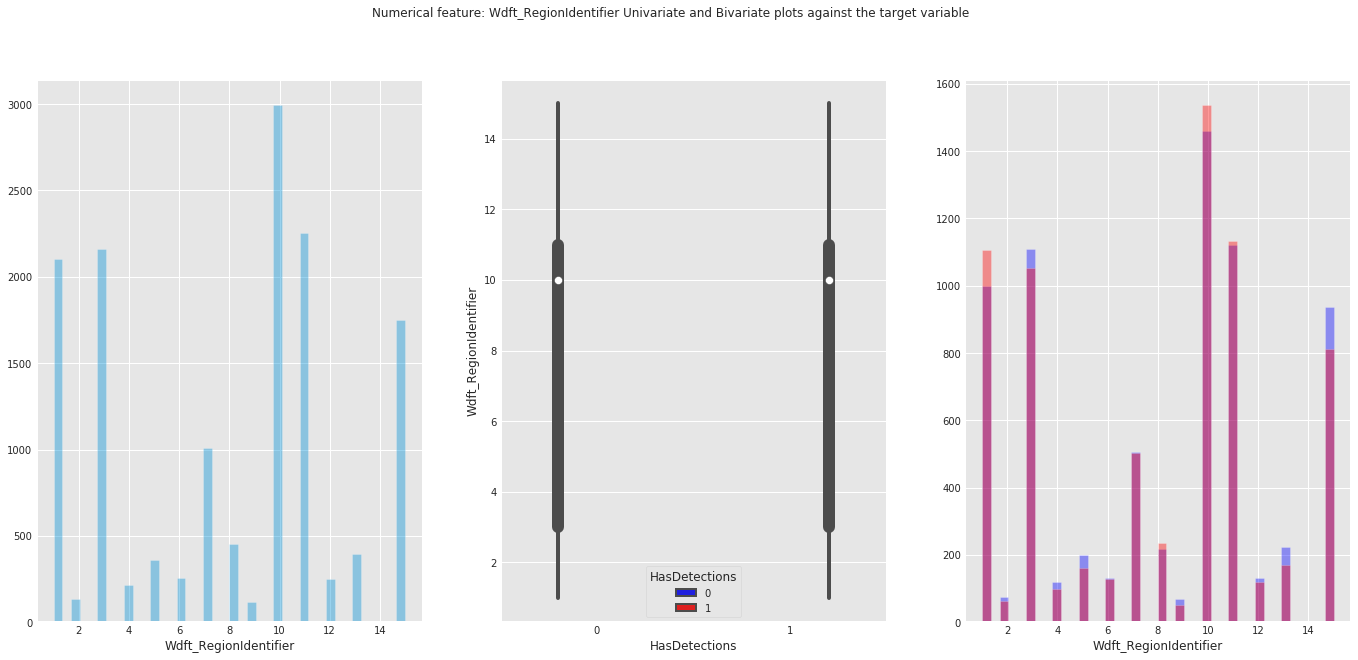

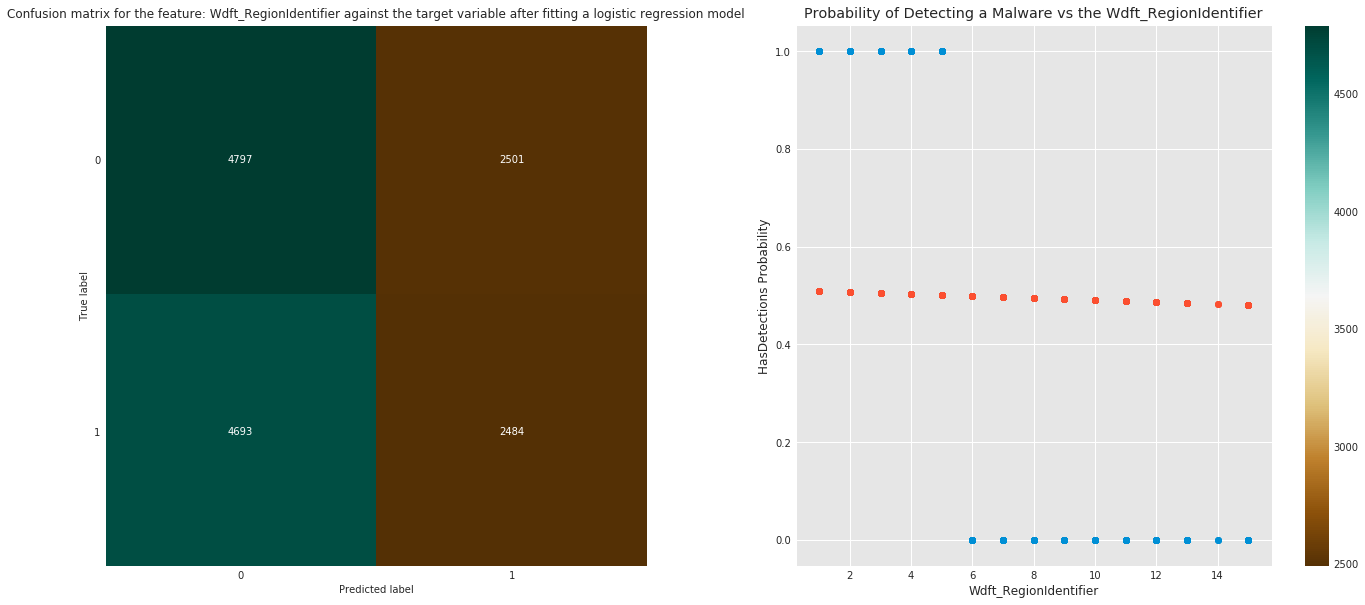

In [107]:
numerical_univariate_and_bivariate_plot("Wdft_RegionIdentifier")
logistic_fit("Wdft_RegionIdentifier")

In [108]:
gc.collect()

18051

### Correlations in Numerical Features
Trying to find corellations between numerical features

elapsed time: 0.7788145542144775 seconds


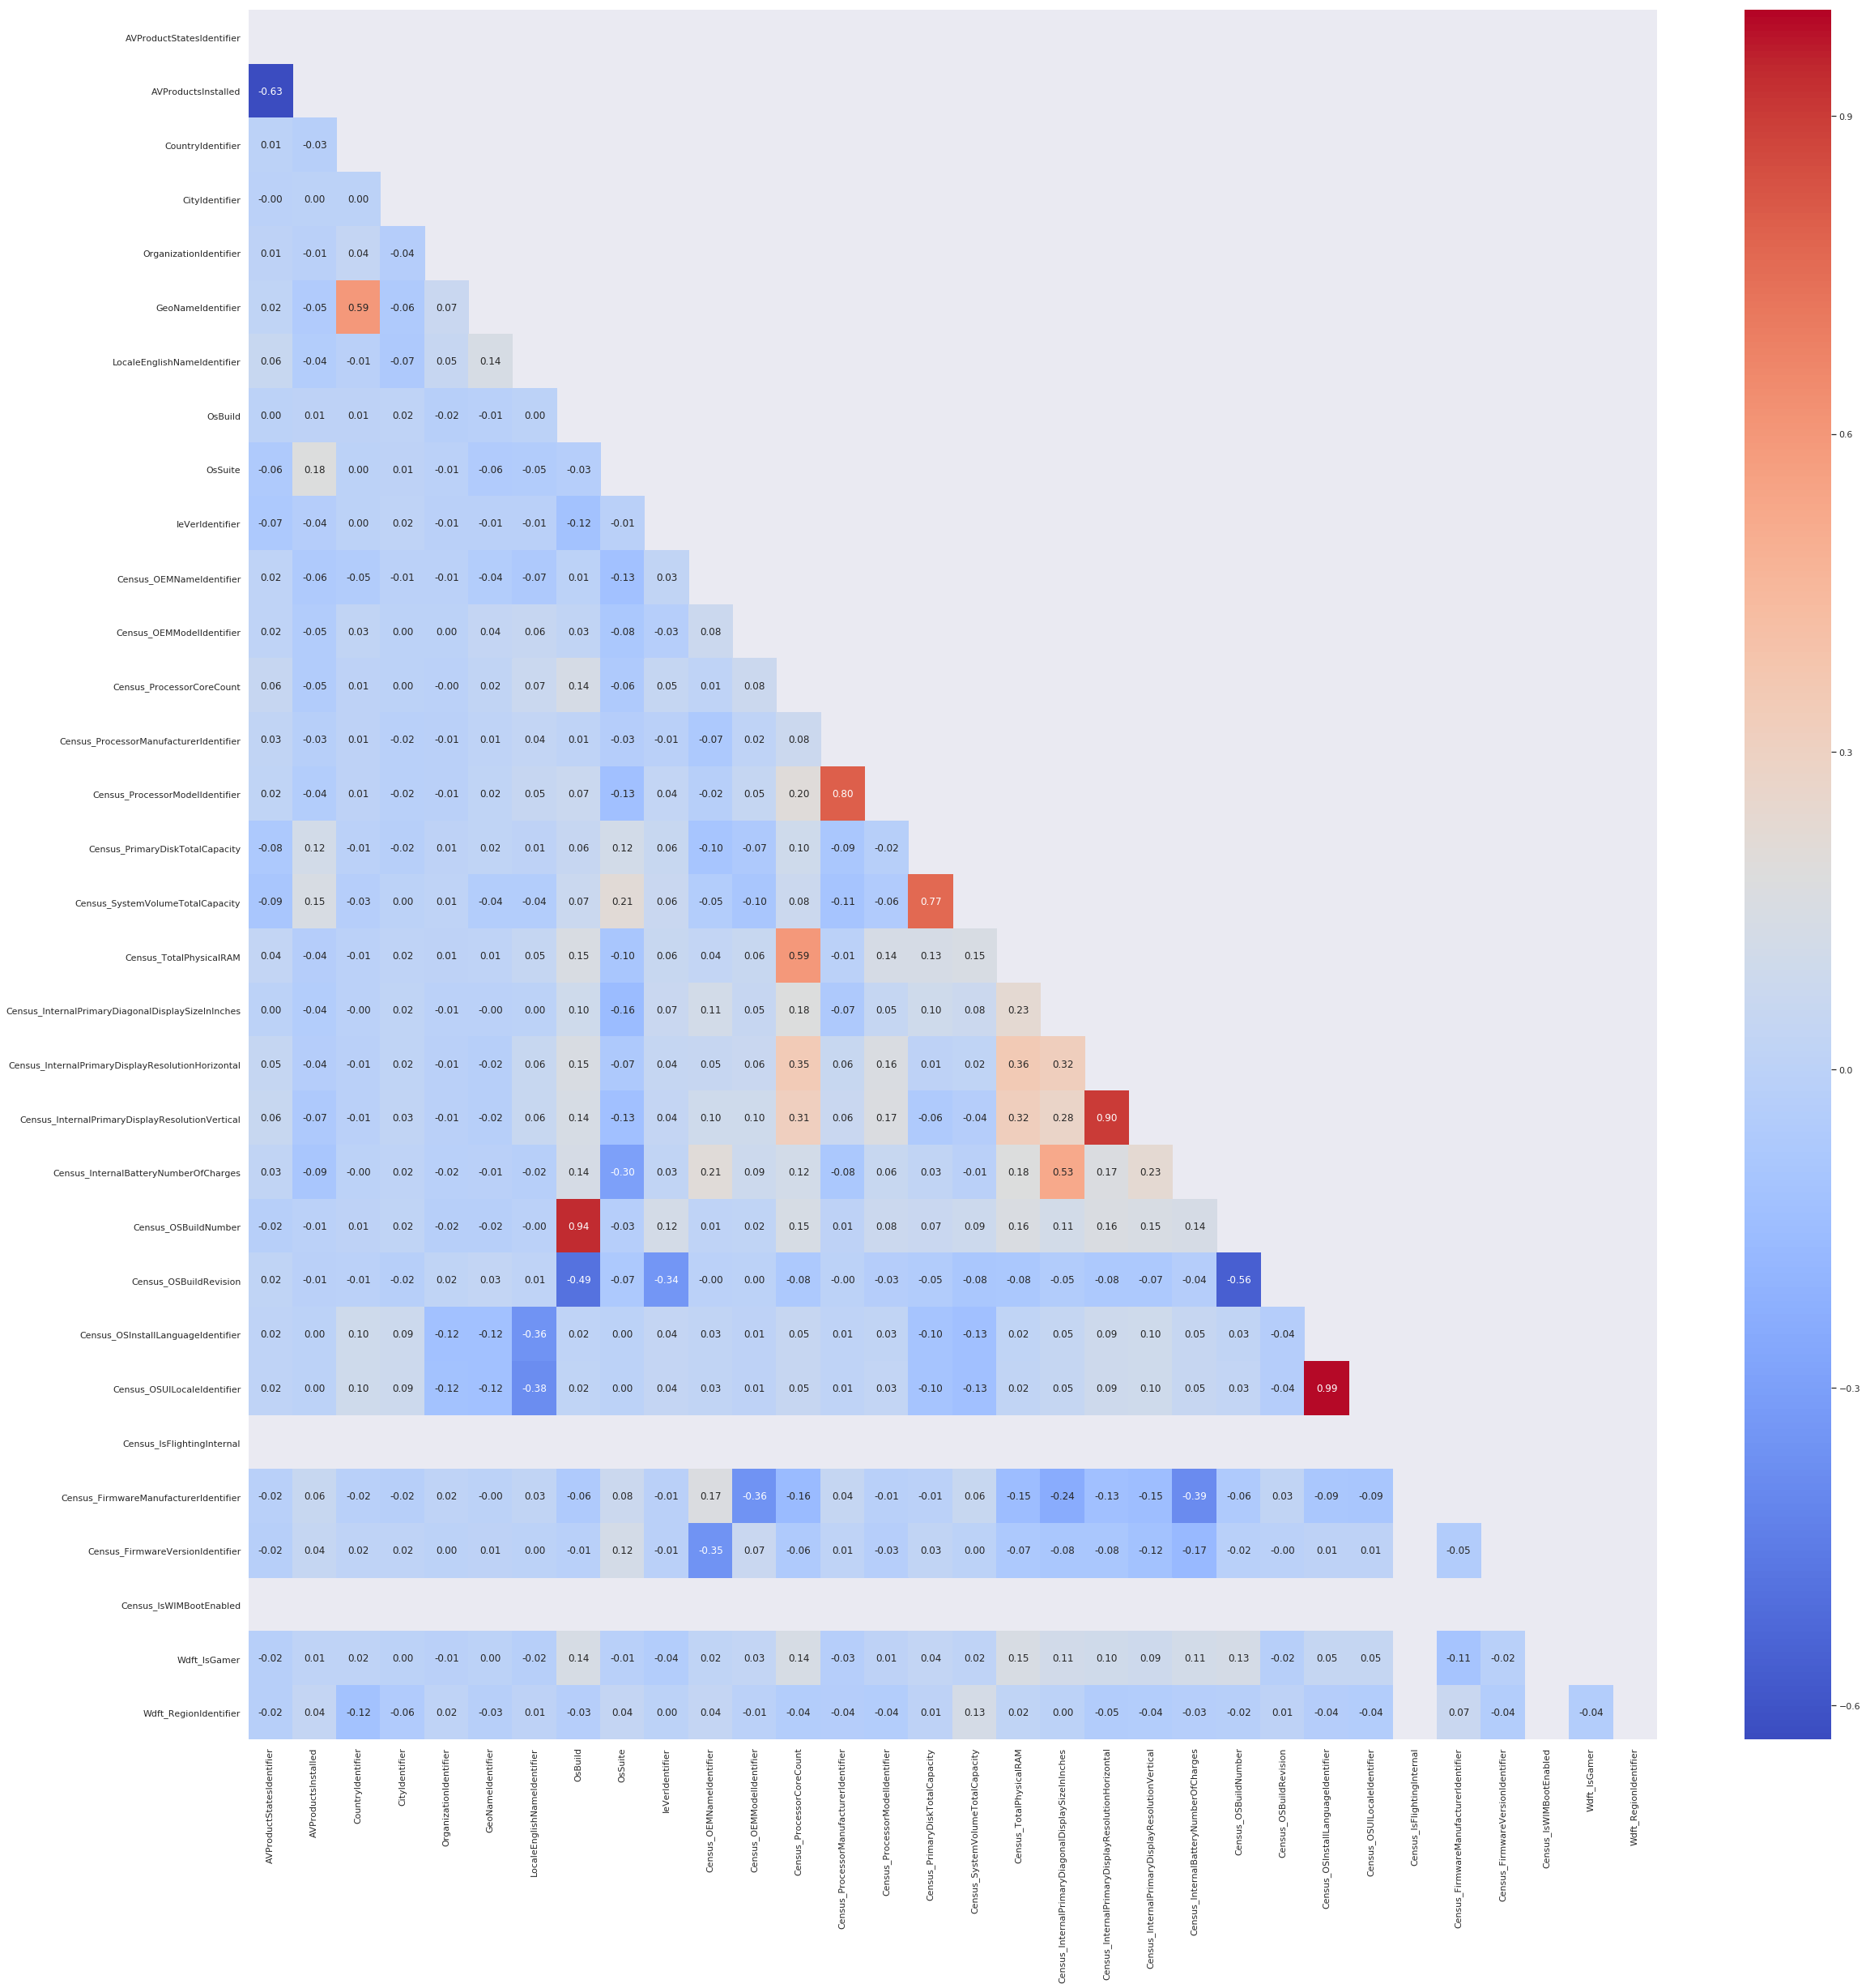

In [109]:
start_time = time.time()

sns.set(rc={'figure.figsize':(34.7,39.27)})

# Compute the correlation matrix
corr = train[numerical_and_binary_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')

print("elapsed time:", time.time() - start_time, "seconds")

Data correlation is the way in which one set of data may correspond to another set. In ML, think of how your features correspond with your output.

### Most correlated features

In [110]:
s = corr.unstack().drop_duplicates()
so = s.sort_values(kind="quicksort")

print("Top most highly megative correlated features:")
print(so[(so<-0.4)])
print()

print("Top most highly positive correlated features:")
print(so[(so<1) & (so>0.5)].sort_values(ascending=False))

Top most highly megative correlated features:
AVProductStatesIdentifier  AVProductsInstalled      -0.632069
Census_OSBuildNumber       Census_OSBuildRevision   -0.560934
OsBuild                    Census_OSBuildRevision   -0.489433
dtype: float64

Top most highly positive correlated features:
Census_OSInstallLanguageIdentifier                 Census_OSUILocaleIdentifier                        0.987821
OsBuild                                            Census_OSBuildNumber                               0.937971
Census_InternalPrimaryDisplayResolutionHorizontal  Census_InternalPrimaryDisplayResolutionVertical    0.903087
Census_ProcessorManufacturerIdentifier             Census_ProcessorModelIdentifier                    0.799772
Census_PrimaryDiskTotalCapacity                    Census_SystemVolumeTotalCapacity                   0.765934
CountryIdentifier                                  GeoNameIdentifier                                  0.594666
Census_ProcessorCoreCount               

### Delete Variables

In [111]:
del corr
del mask
del s
del so
gc.collect()

21416

### Multivariate - Trivariate Analysis between highly correlated features and against the target variable; "HasDetections".
#### Inspecting the relationship between highly correlated features. Moreover trying to fit a logistic regression model between the target variable and the inspected features to identify if the features are good predictors.

In [112]:
%%time
def multivariate_plot(feature1, feature2):
    
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    
    # check if one of the two features exists in train_sample columns
    if (feature1 not in train_sample.columns) | (feature2 not in train_sample.columns):
        if (feature1 not in train_sample.columns):
            print(feature1, "has been removed due to high NA rate or highly unbalanced values")
        elif (feature2 not in train_sample.columns):
            print(feature2, "has been removed due to high NA rate or higlhy unbalanced values")
        print()
            
    else:
        
        f, axes = plt.subplots(1, 2, figsize=(21, 10))
        
        # Due to overflow error I have to convert some columns into a bigger data type
        if (feature1 == "LocaleEnglishNameIdentifier") & (feature2 == "Census_OSUILocaleIdentifier"):
            g1 = sns.scatterplot(x=train_sample["LocaleEnglishNameIdentifier"].astype('int16'), y=train_sample["Census_OSUILocaleIdentifier"], hue = train_sample["HasDetections"], ax = axes[0])
            #g1 = sns.jointplot(x=train_sample["LocaleEnglishNameIdentifier"].astype('int16'), y=train_sample["Census_OSUILocaleIdentifier"], height=9, data = train)
            
            plt.title('Scatterplot Between: '+feature1+" and "+feature2, y=1.3, fontsize = 9)
            
        elif (feature1 == "LocaleEnglishNameIdentifier") & (feature2 == "Census_OSInstallLanguageIdentifier"):
            g1 = sns.scatterplot(x=train_sample["LocaleEnglishNameIdentifier"].astype('float16'), y=train_sample["Census_OSInstallLanguageIdentifier"], hue = train_sample["HasDetections"], ax = axes[0])
            #g1 = sns.jointplot(x=train_sample["LocaleEnglishNameIdentifier"].astype('float16'), y=train_sample["Census_OSInstallLanguageIdentifier"], height=9, data = train)
            
            plt.title('Scatterplot Between: '+feature1+" and "+feature2, y=1.3, fontsize = 9)
        else:    
            g1 = sns.scatterplot(x=train_sample[feature1], y=train_sample[feature2], hue = train_sample["HasDetections"], ax = axes[0])
            
            axes[0].set_title('Scatterplot Between: '+feature1+" and "+feature2)

        #g2 = sns.lmplot(x=feature1, y=feature2, hue="HasDetections", n_boot=1, data = train_sample, height=9, markers=["o", "x"], palette=["b", "r"])
        #g2 = sns.jointplot(x=feature1, y=feature2, data = train_sample, hue = "HasDetections", height=9)
        #g2 = sns.scatterplot(x=feature1, y=feature2, data = train_sample, hue = "HasDetections")
        
        #plt.title('Scatterplot Between: '+feature1+" and "+feature2+" against the target variable: 'HasDetections'", y=1.1, fontsize = 16)
        
        
        # fitting a logistic regression model with the 2 features
        
        # test if there is a logistic relationship between the feature1 and the target.
        
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import precision_score
        from sklearn.metrics import recall_score
        from sklearn.metrics import f1_score
        from sklearn.metrics import r2_score
        
        from sklearn.linear_model import LogisticRegression
        
        print()
        print("Fitting a logistic regression model for the features", feature1,"and",feature2,"against the target variable")
        
        mask = ~train_sample[feature1].isnull() & ~train_sample[feature2].isnull() & ~train_sample["HasDetections"].isnull()

        logmodel = LogisticRegression()
        
        logmodel.fit(train_sample[[feature1, feature2]][mask].values, train_sample["HasDetections"][mask])
        predictions = logmodel.predict(train_sample[[feature1, feature2]][mask].values)

        from sklearn.metrics import classification_report
        print(classification_report(train_sample["HasDetections"][mask], predictions))
        print("")
        print("accuracy score:", accuracy_score(train_sample["HasDetections"][mask], predictions))
        print("F1 score:", accuracy_score(train_sample["HasDetections"][mask], predictions))
        #print("R^2 score:", r2_score(train_sample["HasDetections"][mask], predictions))
        
        
        g2 = sns.scatterplot(x=train_sample[feature1][mask].values, y=train_sample[feature2][mask].values, hue = predictions, ax=axes[1])
        axes[1].set_title('Logistic Predictions Between: '+feature1+" and "+feature2)

        import scikitplot as skplt
        skplt.metrics.plot_confusion_matrix(train_sample["HasDetections"][mask], predictions, normalize=False,
                                            title = "Confusion matrix for two features: "+feature1+" and "+feature2+" against the target variable after fitting a logistic regression model",
                                           figsize=(10,8), text_fontsize='large', cmap="BrBG")
        

        #### my mistake, how can I fit a linear model for binary classification, I have to use here logistic regression as before :D
        
        # old code in comments
        '''
        ### test if a linear model will fit the 2 correlated feature against the target variable
        # my thanks to: https://www.datasciencecentral.com/profiles/blogs/linear-regression-in-python-use-of-numpy-scipy-and-statsmodels
        # this link helped me a lot https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
        
        
        # test if there is a linear relationship between the feature1 and the target.
        from scipy import stats
        mask = ~np.isnan(train_sample[feature1]) & ~np.isnan(train_sample["HasDetections"])
        slope, intercept, r_value, p_value, std_err = stats.linregress(train_sample[feature1][mask], train_sample["HasDetections"][mask])

        sign='+'
        if slope<0:
            sign = ''
        
        lm_1 = "linear regression function #1: y = "+str(np.round(intercept,5))+" "+sign +" "+str(np.round(slope,5))+" * "+feature1
        lm_1 = lm_1+"\n"+" p-value: "+str(p_value)+"\n"+" R^2: "+str(r_value)
        #print(lm_1)
        #print(feature1, "p-value",p_value)
        #print("R^2:", r_value)

        #print()

        # test if there is a linear relationship between the feature2 and the target.
        mask = ~np.isnan(train_sample[feature2]) & ~np.isnan(train_sample["HasDetections"])
        slope, intercept, r_value, p_value, std_err = stats.linregress(train_sample[feature2][mask], train_sample["HasDetections"][mask])

        sign='+'
        if slope<0:
            sign=''
        
        lm_2 = "linear regression function #2: y = "+str(np.round(intercept,5))+" "+sign +" "+str(np.round(slope,5))+" * "+feature2
        lm_2 = lm_2+"\n"+" p-value: "+str(p_value)+"\n"+" R^2: "+str(r_value)
        #print(lm_2)
        #print(feature2, "p-value",p_value)
        #print("R^2:", 100* r_value)
        
        plt.figure(figsize=(8, 9))
        ax = plt.subplot(121)
    
        # plotting text with matplotlib:
        # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html
        plt.text(0.5, 0.9, lm_1, size=15, ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
        
        
        plt.text(0.5, 0.6, lm_2, size=15, ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

        plt.axis('off')
        plt.show()
        '''

    

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 18.6 µs


In [113]:
%%time
multivariate_plot("RtpStateBitfield", "IsSxsPassiveMode")
gc.collect()

RtpStateBitfield has been removed due to high NA rate or highly unbalanced values

CPU times: user 84.6 ms, sys: 1.15 ms, total: 85.7 ms
Wall time: 86.6 ms



Fitting a logistic regression model for the features AVProductStatesIdentifier and AVProductsInstalled against the target variable
              precision    recall  f1-score   support

           0       0.61      0.37      0.46      7514
           1       0.54      0.76      0.63      7430

   micro avg       0.56      0.56      0.56     14944
   macro avg       0.57      0.56      0.55     14944
weighted avg       0.57      0.56      0.55     14944


accuracy score: 0.5619646680942184
F1 score: 0.5619646680942184
CPU times: user 727 ms, sys: 479 ms, total: 1.21 s
Wall time: 520 ms


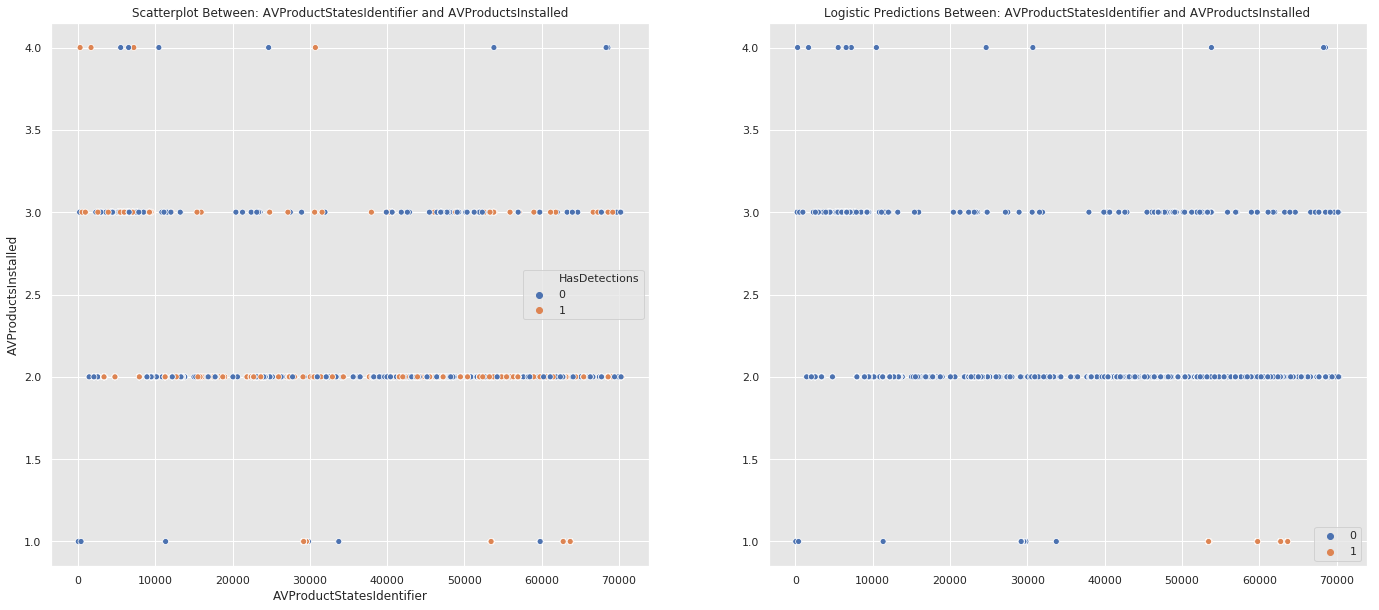

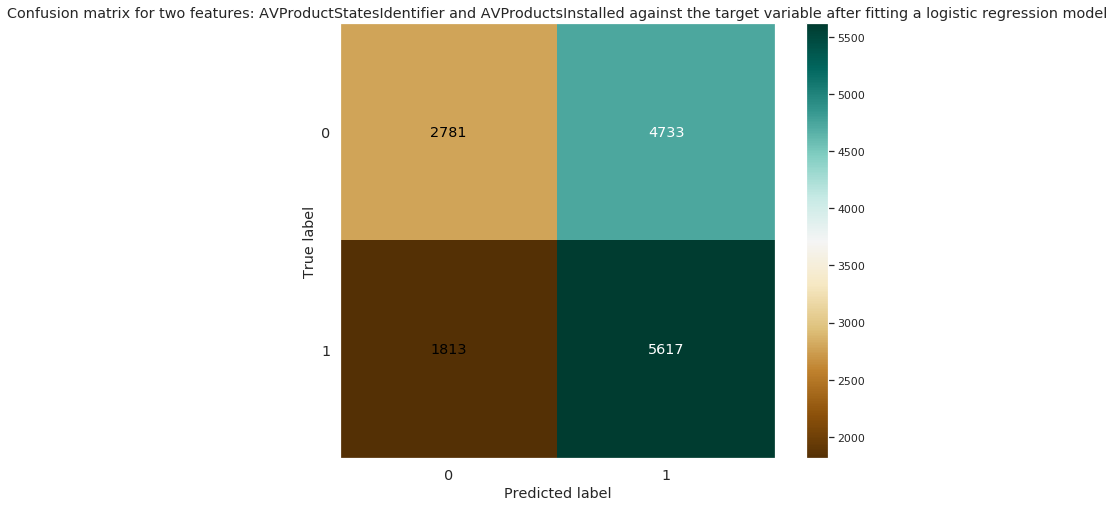

In [114]:
%%time
multivariate_plot("AVProductStatesIdentifier", "AVProductsInstalled")
gc.collect()


Fitting a logistic regression model for the features Census_OSBuildNumber and Census_OSBuildRevision against the target variable
              precision    recall  f1-score   support

           0       0.55      0.29      0.38      7547
           1       0.51      0.76      0.61      7453

   micro avg       0.52      0.52      0.52     15000
   macro avg       0.53      0.52      0.49     15000
weighted avg       0.53      0.52      0.49     15000


accuracy score: 0.5218
F1 score: 0.5218
CPU times: user 838 ms, sys: 590 ms, total: 1.43 s
Wall time: 523 ms


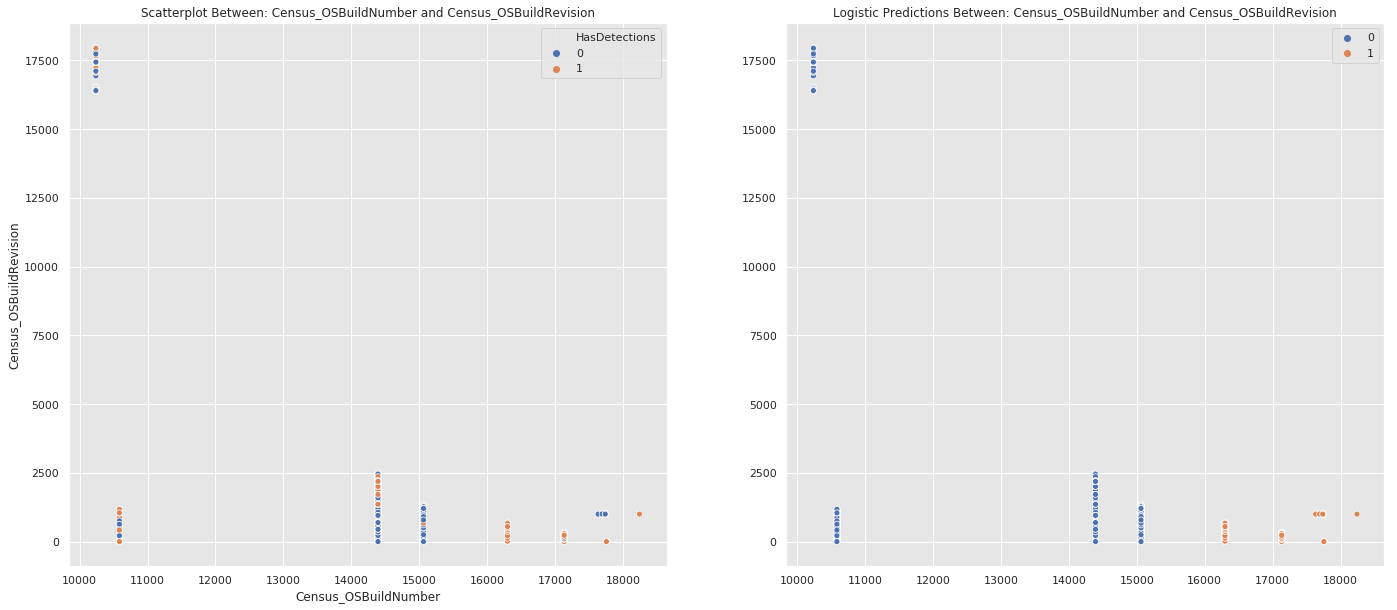

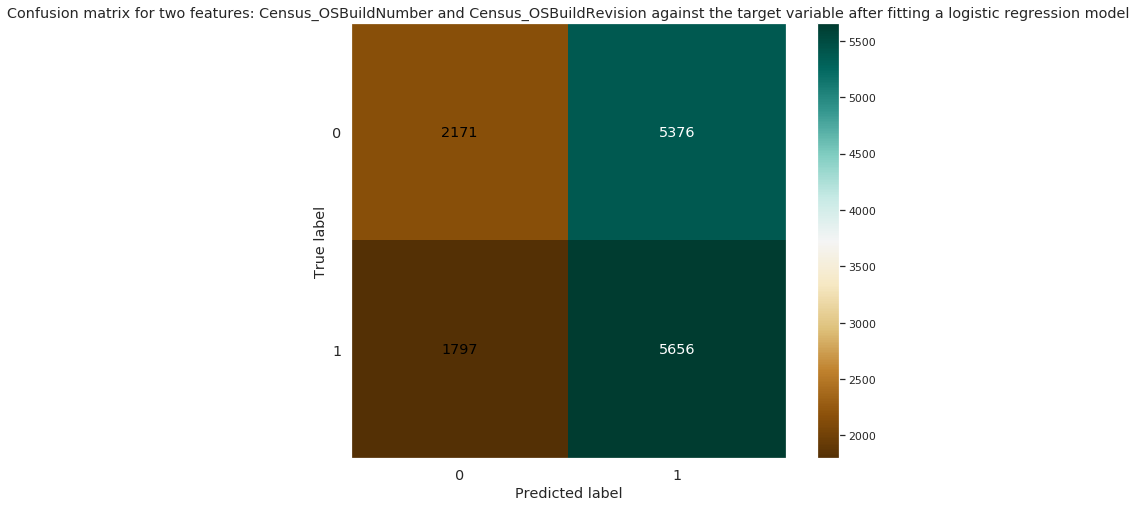

In [115]:
%%time
multivariate_plot("Census_OSBuildNumber", "Census_OSBuildRevision")
gc.collect()


Fitting a logistic regression model for the features OsBuild and Census_OSBuildRevision against the target variable
              precision    recall  f1-score   support

           0       0.54      0.29      0.38      7547
           1       0.51      0.75      0.61      7453

   micro avg       0.52      0.52      0.52     15000
   macro avg       0.53      0.52      0.49     15000
weighted avg       0.53      0.52      0.49     15000


accuracy score: 0.5202666666666667
F1 score: 0.5202666666666667
CPU times: user 830 ms, sys: 598 ms, total: 1.43 s
Wall time: 522 ms


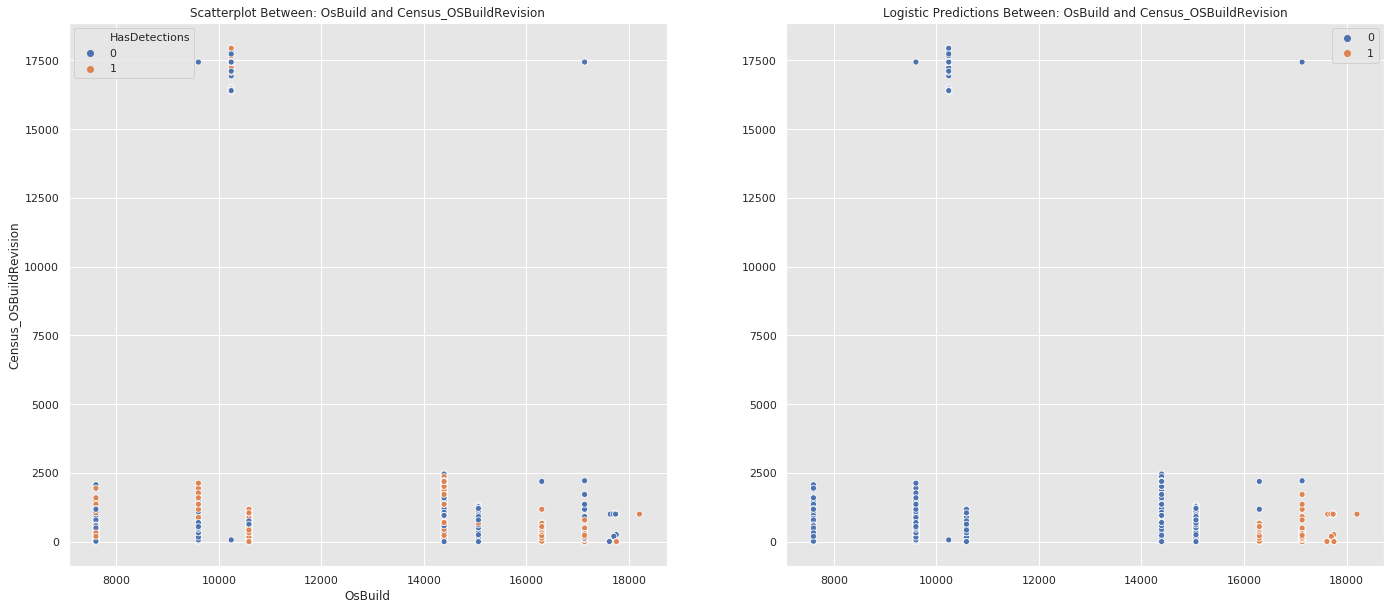

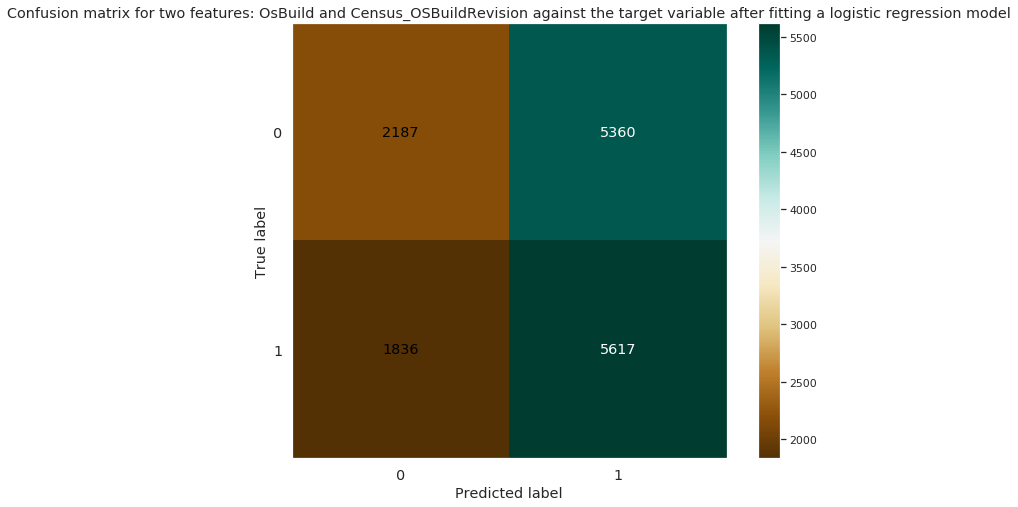

In [116]:
%%time
multivariate_plot("OsBuild", "Census_OSBuildRevision")
gc.collect()

In [117]:
%%time
multivariate_plot("HasTpm", "IeVerIdentifier")
gc.collect()

HasTpm has been removed due to high NA rate or highly unbalanced values

CPU times: user 107 ms, sys: 32.4 ms, total: 140 ms
Wall time: 80.3 ms



Fitting a logistic regression model for the features LocaleEnglishNameIdentifier and Census_OSUILocaleIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.66      0.57      7547
           1       0.51      0.36      0.42      7453

   micro avg       0.51      0.51      0.51     15000
   macro avg       0.51      0.51      0.50     15000
weighted avg       0.51      0.51      0.50     15000


accuracy score: 0.508
F1 score: 0.508
CPU times: user 769 ms, sys: 514 ms, total: 1.28 s
Wall time: 476 ms


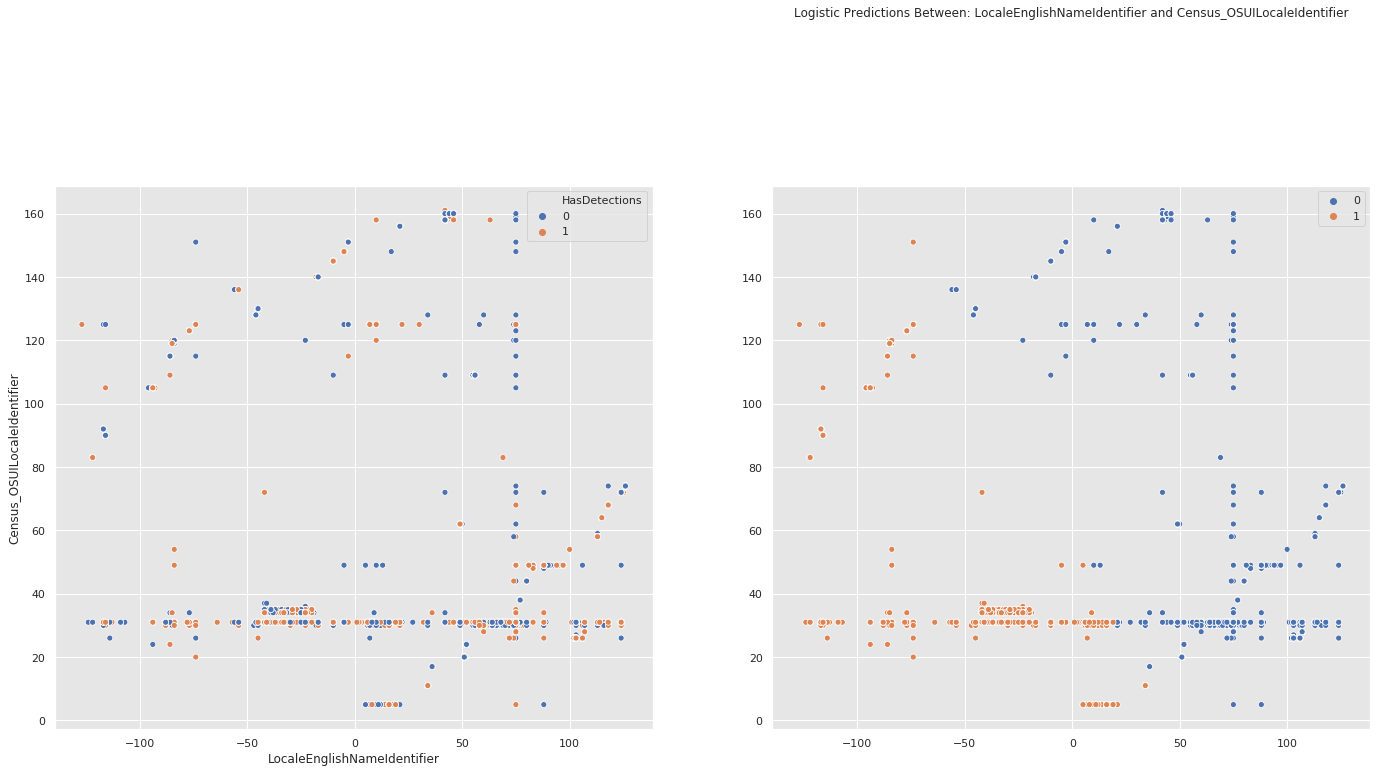

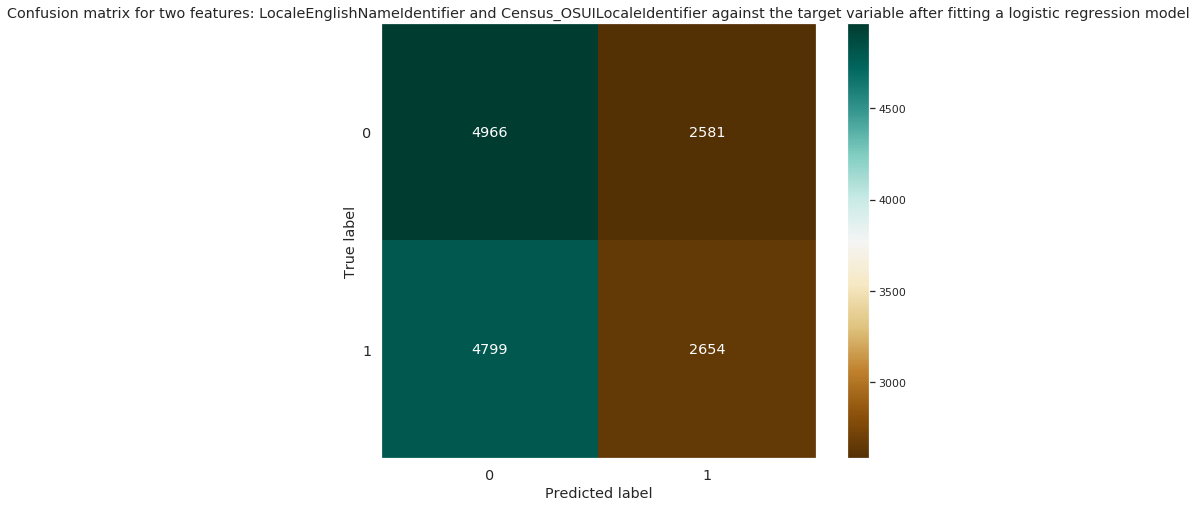

In [118]:
%%time
multivariate_plot("LocaleEnglishNameIdentifier", "Census_OSUILocaleIdentifier")
gc.collect()


Fitting a logistic regression model for the features Census_InternalBatteryNumberOfCharges and Census_FirmwareManufacturerIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.58      0.54      7220
           1       0.50      0.42      0.46      7110

   micro avg       0.50      0.50      0.50     14330
   macro avg       0.50      0.50      0.50     14330
weighted avg       0.50      0.50      0.50     14330


accuracy score: 0.5034193998604326
F1 score: 0.5034193998604326
CPU times: user 791 ms, sys: 539 ms, total: 1.33 s
Wall time: 474 ms


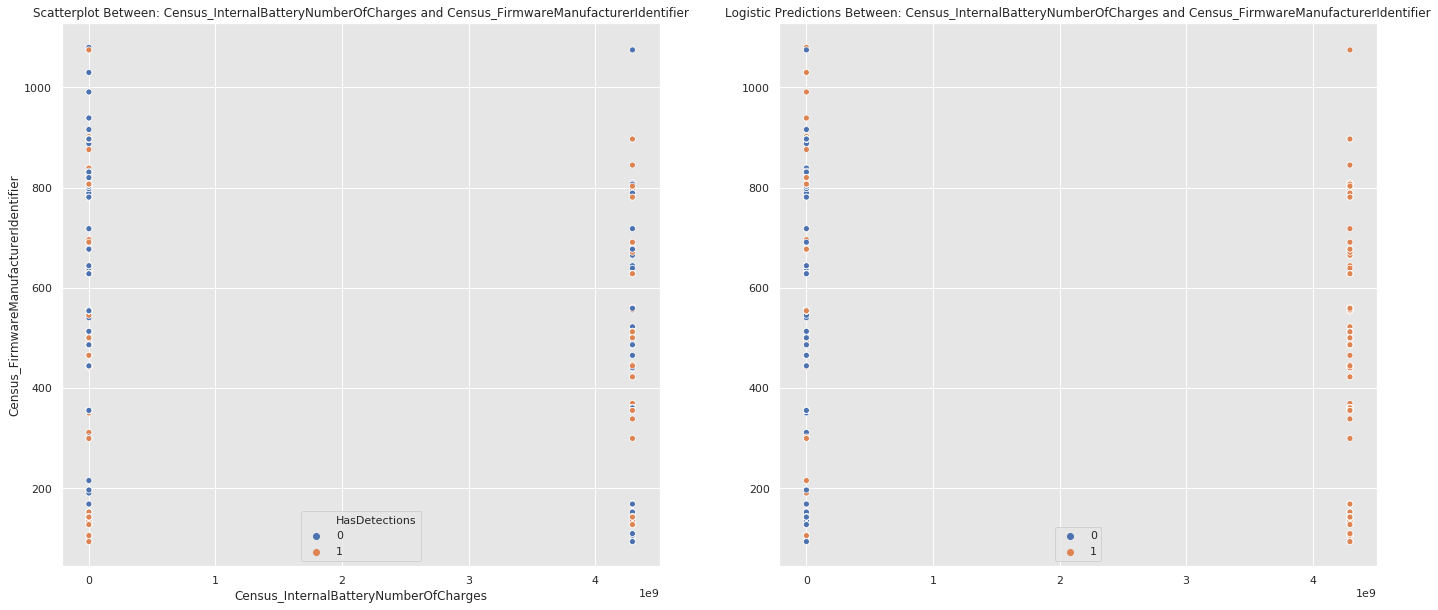

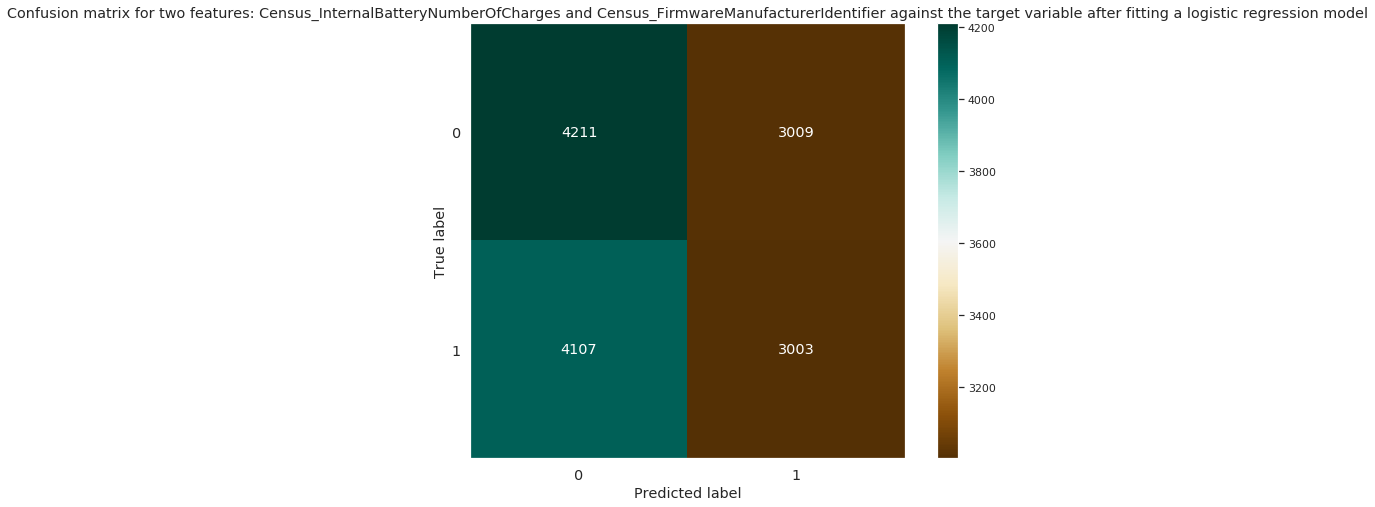

In [119]:
%%time
multivariate_plot("Census_InternalBatteryNumberOfCharges", "Census_FirmwareManufacturerIdentifier")
gc.collect()


Fitting a logistic regression model for the features LocaleEnglishNameIdentifier and Census_OSInstallLanguageIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.66      0.57      7492
           1       0.51      0.36      0.42      7407

   micro avg       0.51      0.51      0.51     14899
   macro avg       0.51      0.51      0.50     14899
weighted avg       0.51      0.51      0.50     14899


accuracy score: 0.5084905027183032
F1 score: 0.5084905027183032
CPU times: user 770 ms, sys: 519 ms, total: 1.29 s
Wall time: 475 ms


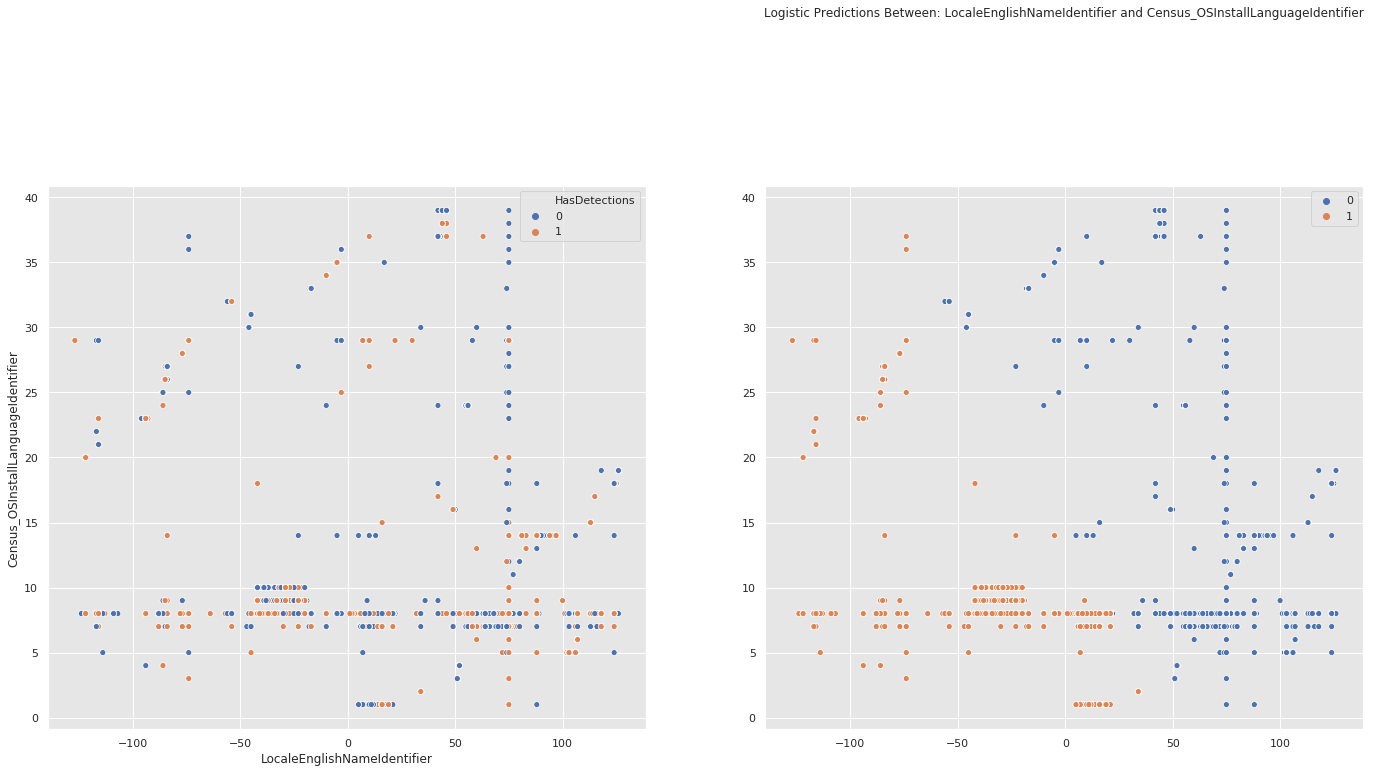

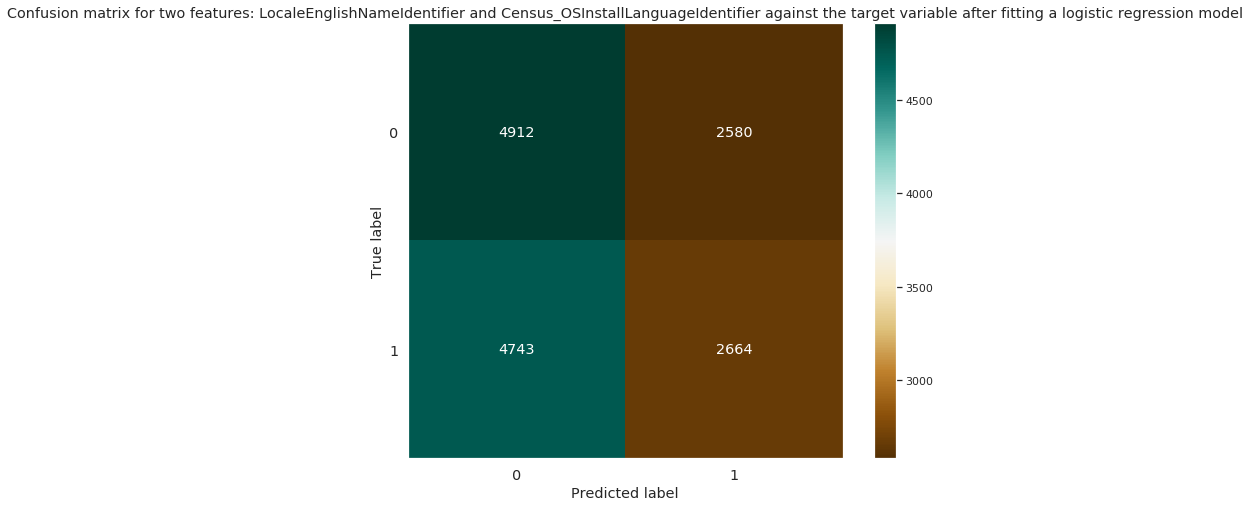

In [120]:
%%time
multivariate_plot("LocaleEnglishNameIdentifier", "Census_OSInstallLanguageIdentifier")
gc.collect()


Fitting a logistic regression model for the features Census_OEMModelIdentifier and Census_FirmwareManufacturerIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.62      0.56      7315
           1       0.51      0.41      0.45      7273

   micro avg       0.51      0.51      0.51     14588
   macro avg       0.51      0.51      0.51     14588
weighted avg       0.51      0.51      0.51     14588


accuracy score: 0.5108308198519331
F1 score: 0.5108308198519331
CPU times: user 819 ms, sys: 519 ms, total: 1.34 s
Wall time: 490 ms


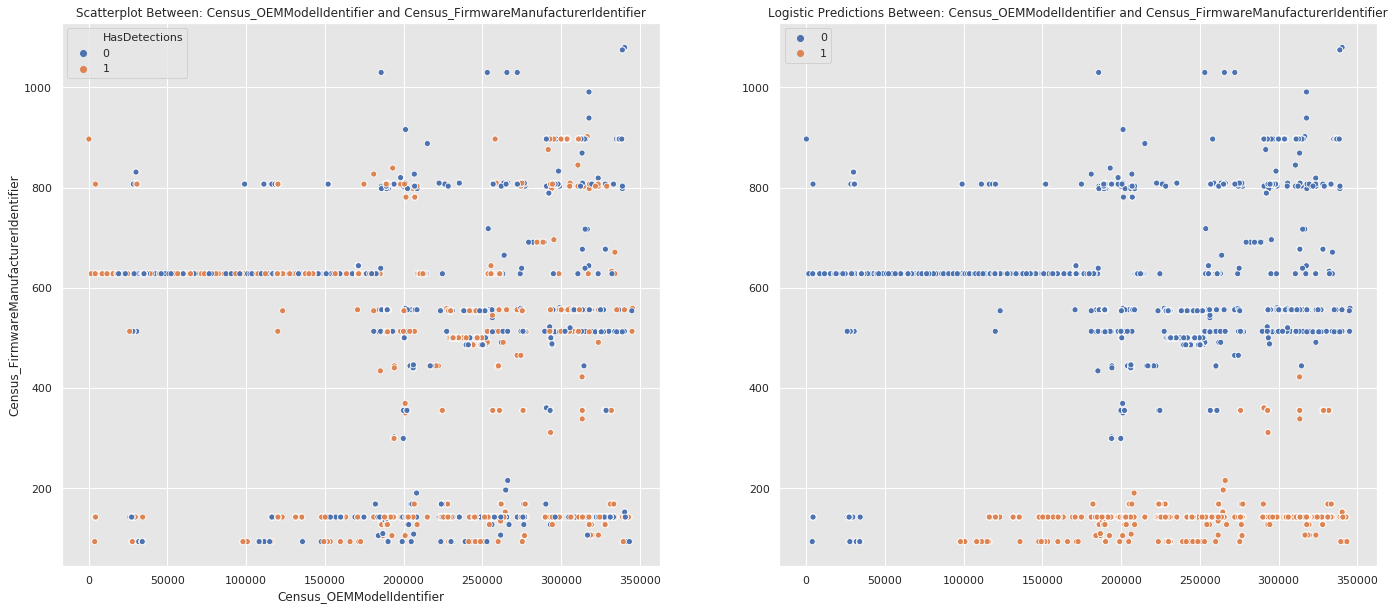

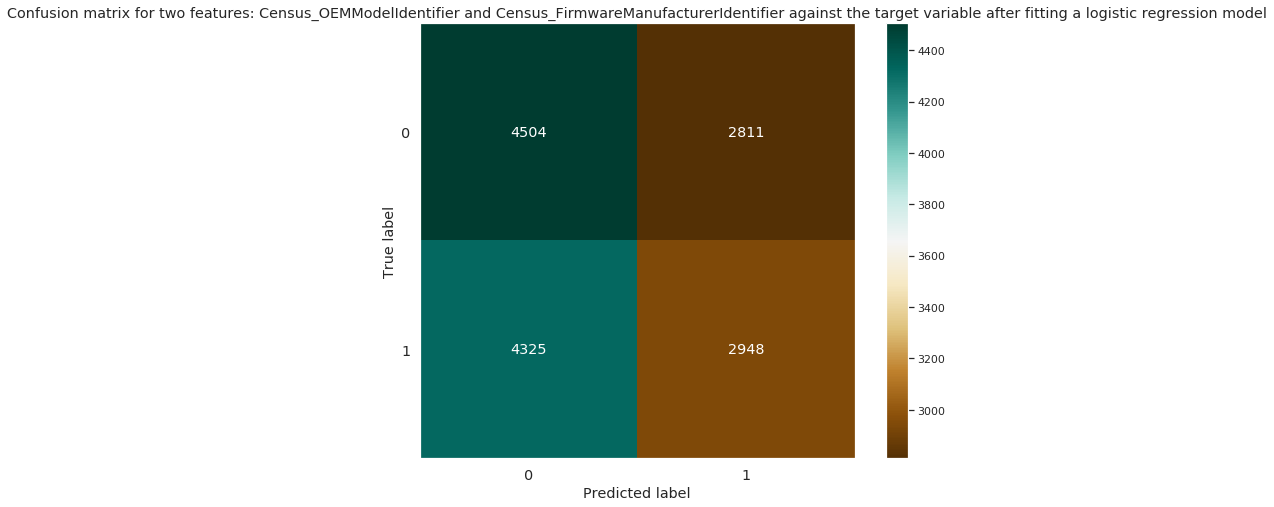

In [121]:
%%time
multivariate_plot("Census_OEMModelIdentifier", "Census_FirmwareManufacturerIdentifier")
gc.collect()


Fitting a logistic regression model for the features Census_OEMNameIdentifier and Census_FirmwareVersionIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      0.77      0.61      7349
           1       0.50      0.24      0.32      7297

   micro avg       0.50      0.50      0.50     14646
   macro avg       0.50      0.50      0.47     14646
weighted avg       0.50      0.50      0.47     14646


accuracy score: 0.5038235695753107
F1 score: 0.5038235695753107
CPU times: user 777 ms, sys: 505 ms, total: 1.28 s
Wall time: 474 ms


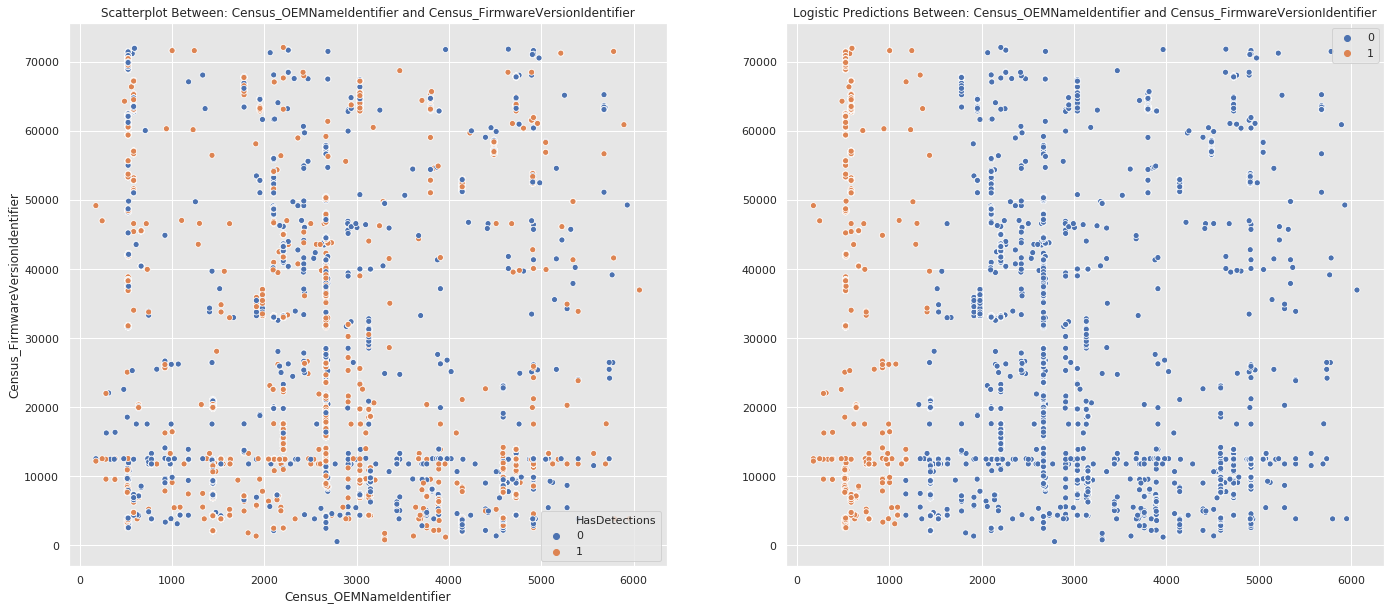

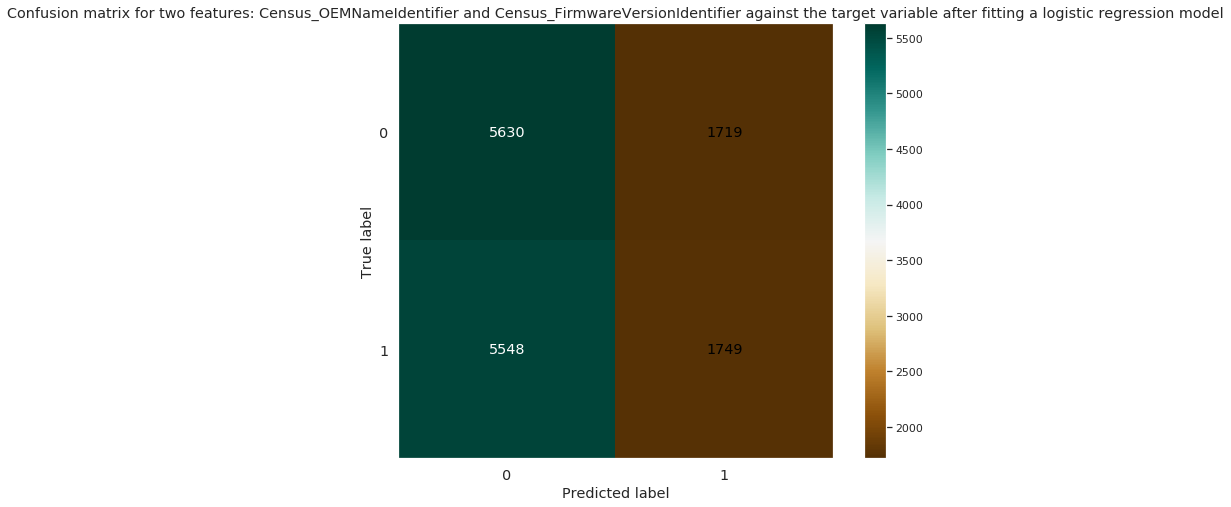

In [122]:
%%time
multivariate_plot("Census_OEMNameIdentifier", "Census_FirmwareVersionIdentifier")
gc.collect()

<a id="ML"></a>
## Machine Learning modeling

![](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)

As we saw, linear relationships are really weak, thus Classification Trees will find patterns of relations between the target variable with the features.

### Delete Train set, to free up memory space.

In [123]:
del train
gc.collect()

8253

### Reading the test data

In [124]:
test_dtypes = {k: v for k, v in dtypes.items() if k in good_cols}

# get all columns except
test = pd.read_csv('../input/test.csv', dtype=test_dtypes, usecols=good_cols[:-1])

#test = reduce_mem_usage(test)

In [125]:
test.head()

MachineIdentifier          ...          Wdft_RegionIdentifier
0  0000010489e3af074adeac69c53e555e          ...                            7.0
1  00000176ac758d54827acd545b6315a5          ...                           12.0
2  0000019dcefc128c2d4387c1273dae1d          ...                           11.0
3  0000055553dc51b1295785415f1a224d          ...                           10.0
4  00000574cefffeca83ec8adf9285b2bf          ...                            3.0

[5 rows x 56 columns]

In [126]:
test.shape

(7853253, 56)

### Feature Engineering

In [127]:
new = train_sample["OsBuildLab"].str.split(".", expand = True)
train_sample["OsBuildLab_1"] = new[2]

new = test["OsBuildLab"].str.split(".", expand = True)
test["OsBuildLab_1"] = new[2]


categorical_columns.append("OsBuildLab_1")
del new

#special thanks to https://www.kaggle.com/delayedkarma/let-s-add-some-new-features-lb-0-674

#train_sample['new_num_1'] = train_sample['Census_TotalPhysicalRAM'] * train_sample['Census_InternalPrimaryDiagonalDisplaySizeInInches']
#test['new_num_1'] = test['Census_TotalPhysicalRAM'] * test['Census_InternalPrimaryDiagonalDisplaySizeInInches']

#train_sample['new_num_2'] = train_sample['Census_ProcessorCoreCount'] * train_sample['Census_InternalPrimaryDiagonalDisplaySizeInInches']
#test['new_num_2'] = test['Census_ProcessorCoreCount'] * test['Census_InternalPrimaryDiagonalDisplaySizeInInches']

#train_sample['new_num_3'] = train_sample['Census_ProcessorCoreCount'] * train_sample['Census_TotalPhysicalRAM']
#test['new_num_3'] = test['Census_ProcessorCoreCount'] * test['Census_TotalPhysicalRAM']

#train_sample['new_num_4'] = train_sample['Census_PrimaryDiskTotalCapacity'] * train_sample['Census_TotalPhysicalRAM']
#test['new_num_4'] = test['Census_PrimaryDiskTotalCapacity'] * test['Census_TotalPhysicalRAM']

#train_sample['new_num_5'] = train_sample['Census_SystemVolumeTotalCapacity'] * train_sample['Census_InternalPrimaryDiagonalDisplaySizeInInches']
#test['new_num_5'] = test['Census_SystemVolumeTotalCapacity'] * test['Census_InternalPrimaryDiagonalDisplaySizeInInches']

### Drop the unique "MachineIdentifier" Identifiers

In [128]:
train_sample = train_sample.drop(['MachineIdentifier'], axis=1)
test = test.drop(['MachineIdentifier'], axis=1)

In [129]:
train_sample = train_sample.reset_index(drop=True)

### Filling NA values with the statistical Mode

In [130]:
modes = train_sample.mode()

for col in train_sample.columns:
    train_sample[col] = np.where(train_sample[col].isnull(), modes[col], train_sample[col])

del modes

In [131]:
modes_test = test.mode()

for col in test.columns:
    test[col] = np.where(test[col].isnull(), modes_test[col], test[col])

#train_sample.shape
del modes_test

### Concatenate both train_sample and test sets before label encoding

In [132]:
train_shape = train_sample.shape
test_shape = test.shape

train_and_test = pd.concat([train_sample,test], axis="rows", sort=False)

del train_sample
del test
gc.collect()

140898

In [133]:
train_and_test.head()

EngineVersion        AppVersion      ...      HasDetections  OsBuildLab_1
0   1.1.14901.4  4.16.17656.18052      ...                1.0      amd64fre
1   1.1.15100.1   4.18.1807.18075      ...                0.0      amd64fre
2   1.1.15200.1   4.18.1807.18075      ...                0.0      amd64fre
3   1.1.15100.1   4.18.1806.18062      ...                0.0        x86fre
4   1.1.15200.1   4.18.1807.18075      ...                1.0      amd64fre

[5 rows x 57 columns]

In [134]:
train_and_test.tail()

EngineVersion       AppVersion      ...      HasDetections  OsBuildLab_1
7853248   1.1.15400.5      4.18.1810.5      ...                NaN      amd64fre
7853249   1.1.15400.5      4.18.1810.5      ...                NaN      amd64fre
7853250   1.1.15400.5      4.18.1810.5      ...                NaN      amd64fre
7853251   1.1.15400.4  4.8.10240.17443      ...                NaN        x86fre
7853252   1.1.15400.5      4.18.1810.5      ...                NaN      amd64fre

[5 rows x 57 columns]

### Encode the Categorical features before machine learning modeling

In [135]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns, train_and_test)

In [136]:
gc.collect()

14

### Auto Feature Engineering ** (requires a lot of memory.... :( ) **

In [137]:
#import featuretools as ft

# creating and entity set 'es'
#es = ft.EntitySet(id = 'es_id')

# adding a dataframe 
#es.entity_from_dataframe(entity_id = 'train_and_test_id', dataframe = train_and_test[numerical_columns[0:5]], index = 'id')

#feature_matrix, feature_names = ft.dfs(entityset=es, target_entity = 'train_and_test_id', chunk_size=.001, max_depth=2, verbose = 1, n_jobs = 3)

In [138]:
#feature_matrix.columns

In [139]:
#feature_matrix.head()

### Back to train and test set after Label Encoding

In [140]:
train_sample = train_and_test[0:train_shape[0]]
test = train_and_test[(train_shape[0]):(train_and_test.shape[0]+1)]

In [141]:
del train_and_test

### Remove the HasDetections columns from test set, it has been added during dataframe concatenation.

In [142]:
test = test.drop(["HasDetections"], axis = 1)

In [143]:
y = train_sample['HasDetections']
X = train_sample.drop(['HasDetections'], axis=1)

In [144]:
del train_sample
gc.collect()

0

### XGBoost Tuned model with 70 / 30 train-valid split

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time

# create a 70/30 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

import xgboost as xgb

start_time = time.time()

# special thanks to https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# these parameters have been found via xgboost tuning, you can see my tries in the commented tuning python snippets below:
# unfortunately it takes so much time to tune and to produce the final optimal classifier due to 9h time limit in Kaggle kernels.
clf_xgb = xgb.XGBClassifier(learning_rate=0.03, 
                            n_estimators=3000, 
                            max_depth=11,
                            min_child_weight=9,
                            gamma=0.2,
                            subsample=1,
                            colsample_bytree=0.4,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.6,
                            reg_lambda = 3,
                            seed=42)

clf_xgb.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xvalid, yvalid)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)

predictions = clf_xgb.predict(xvalid)

print()
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
predictions_probas = clf_xgb.predict_proba(xvalid)
print("roc-auc score for the class 1, from target 'HasDetections' ", roc_auc_score(yvalid, predictions_probas[:,1]))

print()
print("elapsed time in seconds: ", time.time() - start_time)

print()
gc.collect()

[0]	validation_0-auc:0.699454	validation_1-auc:0.581084
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.900148	validation_1-auc:0.667128
[200]	validation_0-auc:0.937778	validation_1-auc:0.67105
[300]	validation_0-auc:0.960419	validation_1-auc:0.670834
Stopping. Best iteration:
[249]	validation_0-auc:0.951228	validation_1-auc:0.671925


              precision    recall  f1-score   support

         0.0       0.62      0.64      0.63      2257
         1.0       0.62      0.60      0.61      2243

   micro avg       0.62      0.62      0.62      4500
   macro avg       0.62      0.62      0.62      4500
weighted avg       0.62      0.62      0.62      4500


accuracy_score 0.6206666666666667

roc-auc score for the class 1, from target 'HasDetections'  0.6719250220891027

elapsed time in seconds:  7.492371082305908



79

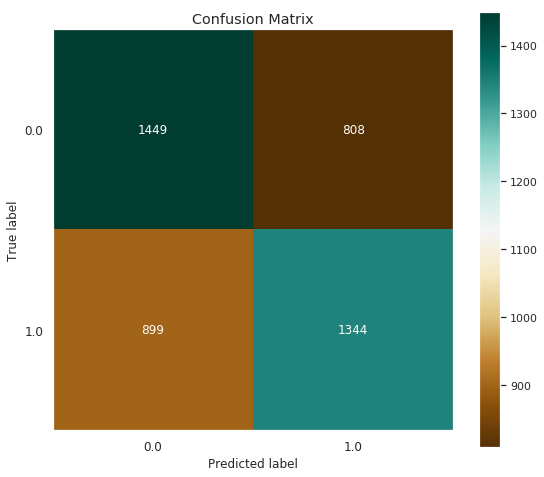

In [146]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, cmap="BrBG")

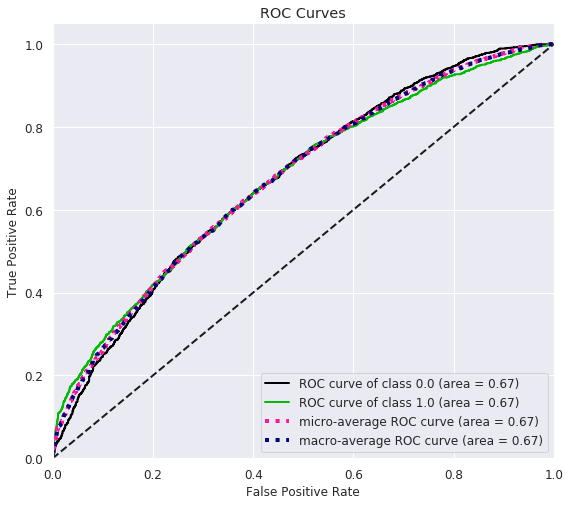

In [147]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, predictions_probas)

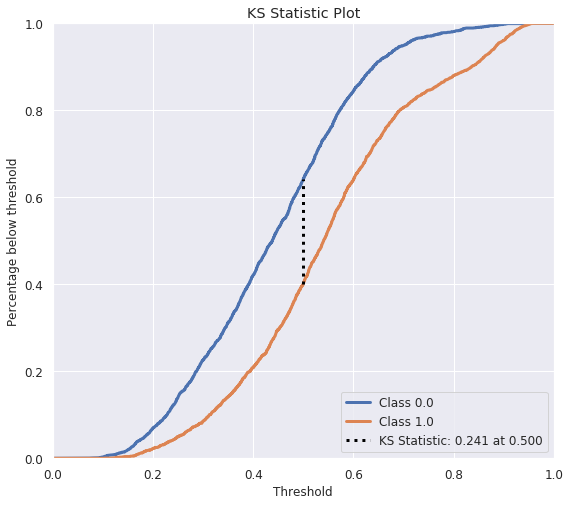

In [148]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

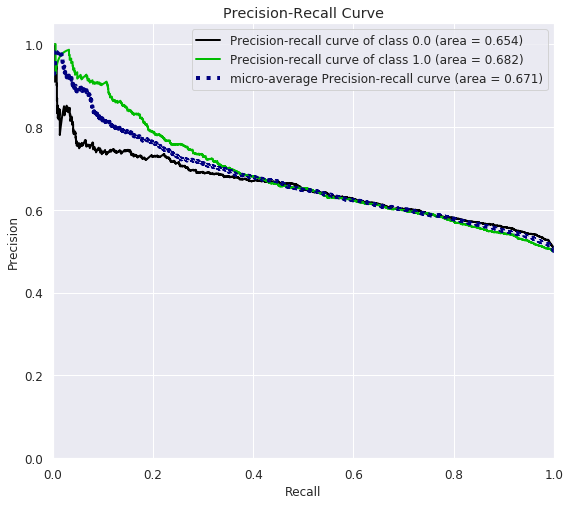

In [149]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


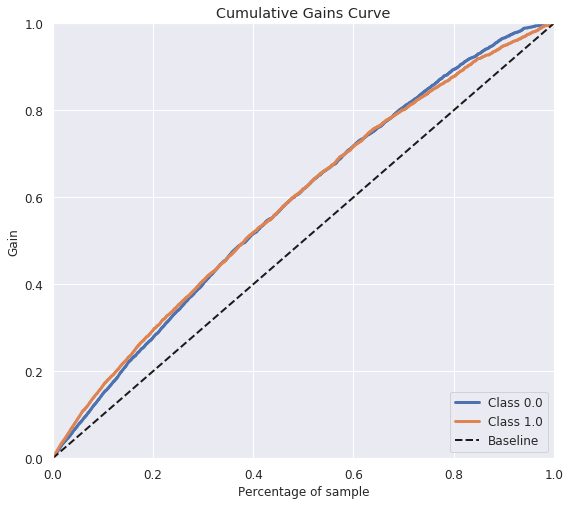

In [150]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


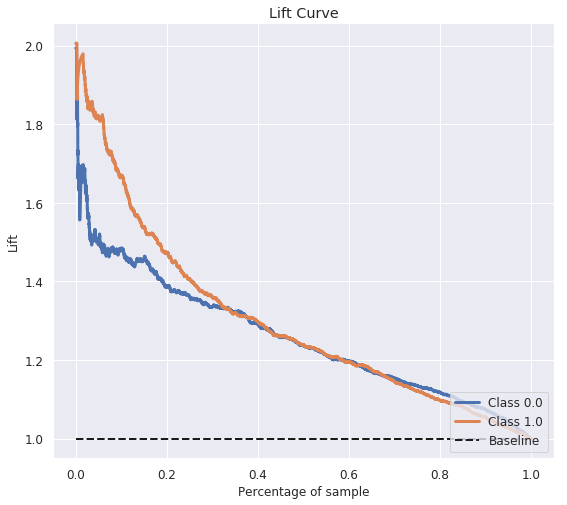

In [151]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_lift_curve(yvalid, predictions_probas)

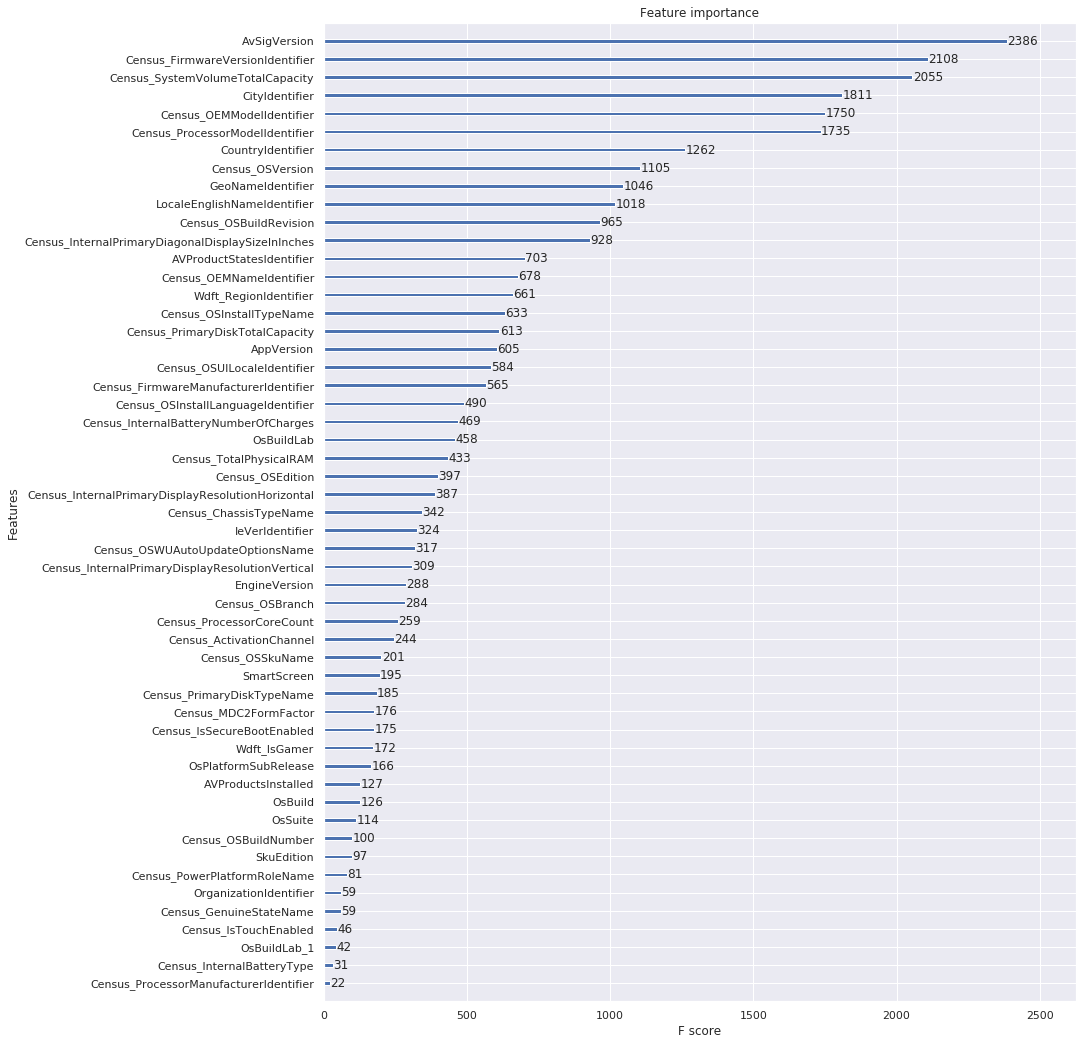

In [152]:
sns.set(rc={'figure.figsize':(12, 18)})
xgb.plot_importance(clf_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

In [153]:
gc.collect()

10

### Delete defined variables to free up memory space

In [154]:
del X
del y
del xvalid
del yvalid
del xtrain
del ytrain
del predictions
del predictions_probas

In [155]:
gc.collect()

7

### Make predictions for the test Set
- Due to memory limitations predictions will be performed in chunks

In [156]:
predictions_proba_test_list = []

chunck = 400000
test_times = test.shape[0] // chunck
test_rest = test.shape[0] % chunck

for i in  np.arange(0,(chunck * (test_times+1)), chunck):
    predictions_proba_test = list(clf_xgb.predict_proba(test[i:(i+chunck)])[:,1])
    predictions_proba_test_list.append(predictions_proba_test)
    #print("times:", i)


# flatten the list of lists
predictions_proba_test_list = [y for x in predictions_proba_test_list for y in x]

print(np.shape(predictions_proba_test_list))
print(test.shape)
gc.collect()

(7853253,)
(7853253, 56)


22

### Prepare Submission File

In [157]:
del test

In [158]:
del clf_xgb

In [159]:
submission = pd.read_csv('../input/sample_submission.csv')
submission['HasDetections'] = predictions_proba_test_list
submission.to_csv('xgboost.csv', index=False)

## Conclusion
This dataset is fun to work with due to Kaggle's memory restrictions. Both EDA and Machine Learning have a wide area for applications with the dataset due to the variety of different types of categorical and numerical features.

___________________________________